# Setup

In [4]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *
from sklearn.model_selection import train_test_split


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

path_prefix = "./../../data/experiment_output/fair_irl_covariate_shift"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Experiment Parameters

In [96]:
base_exp_info = {
    'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
    # Expert demo parameters
    'DATASET': None,
    'TARGET_DATASET': None,
    'N_EXPERT_DEMOS': 3,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 25_000,
    # IRL Loop parameters
    'N_TRIALS': 1,
    'IRL_METHOD': None,
    'MIN_FREQ_FILL_PCT': .1,
    'EPSILON': .01,
    'MAX_ITER': 5,
    'METHOD': 'highs',
    'IRL_ERROR_NORM_WEIGHTS': False,
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
    
    'IRL_METHOD': 'FairIRL',
    'N_INIT_POLICIES': 3,
    'NON_EXPERT_ALGOS': [
        'DummyNoisy',
        'DummyNoisy',
        'Dummy',
    ],

}

In [97]:
al_experiments = [
    # AL -> AL
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # AL -> CA
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # AL -> FL
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # AL -> IL
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # AL-> ME
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },

    # AL -> NY
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # AL -> TX
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
]

ca_experiments = [
    # CA-> AL
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # CA-> CA
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # CA-> FL
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # CA-> IL
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # CA-> ME
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # CA-> NY
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # CA-> TX
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
]

fl_experiments = [
    # FL-> AL
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # FL-> CA
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # FL-> FL
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # FL-> IL
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # FL-> ME
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # FL-> NY
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # FL-> TX
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
]

il_experiments = [
    # IL-> AL
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # IL-> CA
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # IL-> FL
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # IL-> ME
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # IL-> IL
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # IL-> NY
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # IL-> TX
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
]

me_experiments = [
    # ME-> AL
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # ME-> CA
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # ME-> FL
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # ME-> IL
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # ME-> ME
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # ME-> NY
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # ME-> TX
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
]

ny_experiments = [
    # NY-> AL
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # NY-> CA
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # NY-> FL
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # NY-> IL
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # NY-> ME
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # NY-> NY
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # NY-> TX
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
]

tx_experiments = [
    # TX-> AL
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # TX-> CA
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # TX-> FL
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # TX-> IL
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # TX-> ME
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # TX-> NY
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # TX-> TX
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
]

# Run experiments

In [98]:
experiment_sets = [
    al_experiments,
    ca_experiments,
    fl_experiments,
    il_experiments,
    me_experiments,
    ny_experiments,
    tx_experiments,
]

for exp_set_i, exp_set in enumerate(experiment_sets):
    print(f"Starting experiment SET {exp_set_i+1}/{len(experiment_sets)}")
    
    results = []
    for exp_i, experiment in enumerate(exp_set):
        print(f"Starting experiment {exp_i+1}/{len(exp_set)}")

        exp_info = dict(base_exp_info)

        for k in experiment:
            exp_info[k] = experiment[k]
            
        display(exp_info)

        objectives = []
        for obj_name in exp_info['OBJECTIVE_NAMES']:
            objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
        obj_set = ObjectiveSet(objectives)
        del objectives

        #############
        # LOAD DATA #
        #############

        from sklearn.model_selection import train_test_split

        # Load train data (source domain)
        X_source, y_source, feature_types = generate_dataset(
            exp_info['DATASET'],
            n_samples=exp_info['N_DATASET_SAMPLES'],
        )

        # Load test data (target domain)
        X_target, y_target, _ = generate_dataset(
            exp_info['TARGET_DATASET'],
            n_samples=exp_info['N_DATASET_SAMPLES'],
        )

        X_target_train, X_target_test, y_target_train, y_target_test = train_test_split(
            X_target, y_target, test_size=.25)
        del X_target, y_target


        ################
        # TRAIN MODELS #
        ################


        # Using FairIRL
        # Learn weights from source train. Build classifier on target train.
        # Predict on target test.
        ####################################################################


        # Learn weights using source domain train set
        _, _, _, weights, t_hold = run_trial_source_domain(
            exp_info,
            X=X_source,
            y=y_source,
            feature_types=feature_types,
        )

        # Compute optimal classifier on target domain train set
        _, _, clf_pol = run_trial_target_domain(
            exp_info,
            weights,
            t_hold,
            X=X_target_train,
            y=y_target_train,
            feature_types=feature_types,
        )

        # Predict on target domain test set
        df_test = pd.DataFrame(X_target_test)
        df_test['yhat'] = clf_pol.predict(df_test).astype(int)
        df_test['y'] = y_target_test
        # Show the learned policy prediction rates as a gut check
        display(df_test.groupby(['z'])[['yhat']].agg(['count', 'mean']))
        feature_exp = obj_set.compute_demo_feature_exp(df_test)

        # Persist results
        result = {}
        result['METHOD'] = 'FairIRL'
        result['EXPERT_ALGO'] = exp_info['EXPERT_ALGO']
        for i, obj_name in enumerate(exp_info['OBJECTIVE_NAMES']):
            result = dict(result)
            result['METRIC_NAME'] = obj_name
            result['METRIC_VALUE'] = feature_exp[i]
            result['DATASET'] = exp_info['DATASET']
            result['TARGET_DATASET'] = exp_info['TARGET_DATASET']
            results.append(result)
            print(f"Results of {result['METHOD']}")
            display(result)


        # Using model trained on source
        # Train model on source train. Predict on target test.
        ######################################################
        expert_algo_lookup = generate_expert_algo_lookup(feature_types)
        expert_algo = expert_algo_lookup[exp_info['EXPERT_ALGO']]
        # Fit classifier on source train set
        expert_algo.fit(X_source, y_source)
        # Predict on target domain test set
        df_test = pd.DataFrame(X_target_test)
        df_test['yhat'] = expert_algo.predict(df_test).astype(int)
        df_test['y'] = y_target_test
        # Show the learned policy prediction rates as a gut check
        display(df_test.groupby(['z'])[['yhat']].agg(['count', 'mean']))
        feature_exp = obj_set.compute_demo_feature_exp(df_test)
        del expert_algo


        # Persist results
        result = {}
        result['METHOD'] = 'SourceClassifier'
        result['EXPERT_ALGO'] = exp_info['EXPERT_ALGO']
        for i, obj_name in enumerate(exp_info['OBJECTIVE_NAMES']):
            result = dict(result)
            result['METRIC_NAME'] = obj_name
            result['METRIC_VALUE'] = feature_exp[i]
            result['DATASET'] = exp_info['DATASET']
            result['TARGET_DATASET'] = exp_info['TARGET_DATASET']
            results.append(result)
            print(f"Results of {result['METHOD']}")
            display(result)


        # Compare against threshold optimzer trained directly on test domain
        # Train model on target train. Predict on target test.
        ####################################################################
        expert_algo_lookup = generate_expert_algo_lookup(feature_types)
        expert_algo = expert_algo_lookup[exp_info['EXPERT_ALGO']]
        # Fit classifier on target domain train set
        expert_algo.fit(X_target_train, y_target_train)
        # Predict on target domain test set
        df_hold = pd.DataFrame(X_target_test)
        df_hold['yhat'] = expert_algo.predict(df_hold).astype(int)
        df_hold['y'] = y_target_test
        # Show the learned policy prediction rates as a gut check
        display(df_hold.groupby(['z'])[['yhat']].agg(['count', 'mean']))
        feature_exp = obj_set.compute_demo_feature_exp(df_hold)
        del expert_algo

        # Persist results
        #################
        result = {}
        result['METHOD'] = 'ClassifierTrainedOnTest'
        result['EXPERT_ALGO'] = exp_info['EXPERT_ALGO']
        for i, obj_name in enumerate(exp_info['OBJECTIVE_NAMES']):
            result = dict(result)
            result['METRIC_NAME'] = obj_name
            result['METRIC_VALUE'] = feature_exp[i]
            result['DATASET'] = exp_info['DATASET']
            result['TARGET_DATASET'] = exp_info['TARGET_DATASET']
            results.append(result)
            print(f"Results of {result['METHOD']}")
            display(result)

    # Store results in CSV
    results_df = pd.DataFrame(results)
    timestamp = datetime.datetime.today().strftime('%Y-%m-%d %H:%M:%S')
    results_df.to_csv(f"{path_prefix}/{timestamp}.csv")

Starting experiment SET 1/7
Starting experiment 1/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.75794841 0.81565431 0.79412907]
 [0.75847585 0.83280702 0.77088567]
 [0.74857486 0.78581702 0.74247439]]
INFO:root:muE_hold:
[[0.74085183 0.81734934 0.76187943]
 [0.74025195 0.84219113 0.97093131]
 [0.73829532 0.73289963 0.73471956]]
INFO:root:muL:
[[0.49242424 0.80064003 0.81166676]
 [0.50212121 0.81494473 0.86291486]
 [0.50151515 0.90294966 0.87043029]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.763 0.682 0.402]
INFO:root:		 mu_delta[0] 	= [-0.008  0.129  0.368]
INFO:root:		 t[0] 		= 0.05940
INFO:root:		 weights[0] 	= [ 0.821  0.018 -0.16 ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.77  0.827 0.839]
INFO:root:		 mu_delta[1] 	= [-0.015 -0.015 -0.07 ]
INFO:root:		 t[1] 		= 0.02717
INFO:root:		 weights[1] 	= [0.634 0.    0.366]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.744 0.996 0.99 ]
INFO:root:		 mu_delta[2] 	= [-0.015 -0.015 -0.07 ]
INFO:root:		 t[2] 		= 0.01465
INFO

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.758,0.816,0.794,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.758,0.833,0.771,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.749,0.786,0.742,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.492,0.801,0.812,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.502,0.815,0.863,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.502,0.903,0.870,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.763,0.682,0.402,0,0.763,0.756,0.756,0.682,0.694,0.694,0.402,0.440,0.440,0.0,3.0,0.821,0.018,-0.160,0.059,0.063,0.0,0.0
7,0.770,0.827,0.839,0,0.770,0.756,0.756,0.827,0.814,0.814,0.839,0.793,0.793,0.0,4.0,0.634,0.000,0.366,0.027,0.015,0.0,0.0
8,0.744,0.996,0.990,0,0.770,0.726,0.756,0.827,0.977,0.814,0.839,0.993,0.793,0.0,5.0,0.044,0.956,-0.000,0.015,0.016,0.0,0.0
9,0.746,0.996,0.986,0,0.770,0.728,0.756,0.827,0.997,0.814,0.839,0.993,0.793,0.0,6.0,0.575,0.425,0.000,0.011,0.012,0.0,0.0


INFO:root:muE_target:
[[0.7434421  0.75209207 0.65151368]
 [0.74984005 0.80235127 0.78514569]
 [0.74647887 0.79878067 0.75839723]]
INFO:root:target domain muL = [0.728 0.993 0.883]
INFO:root:target domain muE = [0.747 0.784 0.732]
INFO:root:target domain muL_hold = [0.709 0.984 0.959]


yhat          
  count      mean
z                
0  1454  0.299175
1  4796  0.285655

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72912,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9864800217512759,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9349873393797907,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1454  0.125172
1  4796  0.312344

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.8,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8128283197942348,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8265441339126363,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1454  0.137552
1  4796  0.330901

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.79184,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8066508312176699,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8138083446265922,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 2/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69436113 0.99702843 0.96900685]
 [0.70657066 0.96668474 0.87419635]
 [0.72727273 0.96590404 0.94489965]]
INFO:root:muE_hold:
[[0.70065987 0.95739212 0.84620787]
 [0.68086383 0.97617011 0.71229248]
 [0.69867947 0.98189817 0.7522137 ]]
INFO:root:muL:
[[0.47484848 0.80117534 0.7667188 ]
 [0.49393939 0.83144654 0.80879378]
 [0.51575758 0.89161165 0.98099407]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.73  0.994 0.86 ]
INFO:root:		 mu_delta[0] 	= [-0.021 -0.018  0.069]
INFO:root:		 t[0] 		= 0.01449
INFO:root:		 weights[0] 	= [ 0.622  0.378 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.768 0.793 0.735]
INFO:root:		 mu_delta[1] 	= [-0.021 -0.018  0.069]
INFO:root:		 t[1] 		= 0.02849
INFO:root:		 weights[1] 	= [ 0.635 -0.     0.365]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.768 0.795 0.743]
INFO:root:		 mu_delta[2] 	= [-0.021 -0.018  0.069]
INFO:root:		 t[2] 		= 0.03983
INFO:root:		 weights[2] 	= [ 0.44 -0.   

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.694,0.997,0.969,1,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.707,0.967,0.874,1,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.727,0.966,0.945,1,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.475,0.801,0.767,0,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.494,0.831,0.809,0,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.516,0.892,0.981,0,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.730,0.994,0.860,0,0.73,0.722,0.722,0.994,0.993,0.993,0.86,0.855,0.855,0.0,3.0,0.622,0.378,-0.000,0.014,0.020,0.0,0.0
7,0.768,0.793,0.735,0,0.73,0.764,0.722,0.994,0.792,0.993,0.86,0.732,0.855,0.0,4.0,0.635,-0.000,0.365,0.028,0.036,0.0,0.0
8,0.768,0.795,0.743,0,0.73,0.756,0.722,0.994,0.788,0.993,0.86,0.718,0.855,0.0,5.0,0.440,-0.000,0.560,0.040,0.038,0.0,0.0
9,0.768,0.786,0.732,0,0.73,0.758,0.722,0.994,0.784,0.993,0.86,0.715,0.855,0.0,6.0,0.440,0.000,0.560,0.040,0.038,0.0,0.0


INFO:root:muE_target:
[[0.70441459 0.98303134 0.74285714]
 [0.70697377 0.96837788 0.82566342]
 [0.7106274  0.95992758 0.86478076]]
INFO:root:target domain muL = [0.726 0.992 0.987]
INFO:root:target domain muE = [0.707 0.97  0.811]
INFO:root:target domain muL_hold = [0.72  0.994 0.958]


yhat          
  count      mean
z                
0  1485  0.304377
1  4765  0.296118

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72032,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9917404192325494,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9568253271916356,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1485  0.185185
1  4765  0.183001

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71872,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9978158641327581,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8853291700536323,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1485  0.321212
1  4765  0.332424

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71072,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9887881967630132,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9565070599417658,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 3/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68386323 0.99314688 0.99260367]
 [0.68916892 0.98828999 0.98580247]
 [0.7059706  0.97943518 0.99014144]]
INFO:root:muE_hold:
[[0.68506299 0.98157569 0.97663957]
 [0.73005399 0.90356058 0.87741935]
 [0.69447779 0.98300326 0.97288146]]
INFO:root:muL:
[[0.49090909 0.81005987 0.86580087]
 [0.48484848 0.81657578 0.81699074]
 [0.50787879 0.91521835 0.85057471]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.763 0.801 0.782]
INFO:root:		 mu_delta[0] 	= [-0.07   0.186  0.208]
INFO:root:		 t[0] 		= 0.08648
INFO:root:		 weights[0] 	= [0.465 0.188 0.347]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.719 0.977 0.914]
INFO:root:		 mu_delta[1] 	= [-0.026  0.01   0.075]
INFO:root:		 t[1] 		= 0.03373
INFO:root:		 weights[1] 	= [0.255 0.309 0.436]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.728 0.994 0.923]
INFO:root:		 mu_delta[2] 	= [-0.034 -0.007  0.067]
INFO:root:		 t[2] 		= 0.05770
INFO:root:		 weights[2] 	= [-0.     0.138  0.8

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.684,0.993,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.689,0.988,0.986,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.706,0.979,0.990,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.491,0.810,0.866,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.485,0.817,0.817,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.508,0.915,0.851,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.763,0.801,0.782,0,0.763,0.765,0.765,0.801,0.791,0.791,0.782,0.741,0.741,0.0,3.0,0.465,0.188,0.347,0.086,0.082,0.0,0.0
7,0.719,0.977,0.914,0,0.719,0.720,0.720,0.977,0.931,0.931,0.914,0.972,0.972,0.0,4.0,0.255,0.309,0.436,0.034,0.016,0.0,0.0
8,0.728,0.994,0.923,0,0.728,0.733,0.733,0.994,0.997,0.997,0.923,0.922,0.922,0.0,5.0,-0.000,0.138,0.862,0.058,0.019,0.0,0.0
9,0.536,0.983,0.891,0,0.728,0.546,0.733,0.994,0.971,0.997,0.923,0.884,0.922,0.0,6.0,-0.000,0.025,0.975,0.065,0.020,0.0,0.0


INFO:root:muE_target:
[[0.73576456 0.95438049 0.94388759]
 [0.7293666  0.94273344 0.97513776]
 [0.7099872  0.95100035 0.95251523]]
INFO:root:target domain muL = [0.749 0.998 0.935]
INFO:root:target domain muE = [0.725 0.949 0.957]
INFO:root:target domain muL_hold = [0.727 0.981 0.936]


yhat          
  count      mean
z                
0  1503  0.277445
1  4747  0.309669

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72576,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9677758449816188,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8788704499559883,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1503  0.206254
1  4747  0.248789

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71744,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9574654496918669,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9488837397953019,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1503  0.193613
1  4747  0.244154

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71696,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9494585717967898,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9794244809195878,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 4/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.75794841 0.78668746 0.75727069]
 [0.75817582 0.75125259 0.65451832]
 [0.74527453 0.77282376 0.70253424]]
INFO:root:muE_hold:
[[0.75884823 0.81036384 0.79338296]
 [0.74205159 0.82538588 0.74406196]
 [0.7304922  0.8222135  0.69923402]]
INFO:root:muL:
[[0.50848485 0.7758671  0.71880413]
 [0.49181818 0.80272495 0.84322835]
 [0.50606061 0.88204786 0.89972204]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.764 0.821 0.8  ]
INFO:root:		 mu_delta[0] 	= [-0.01  -0.051 -0.095]
INFO:root:		 t[0] 		= 0.01026
INFO:root:		 weights[0] 	= [0.996 0.004 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.763 0.805 0.778]
INFO:root:		 mu_delta[1] 	= [-0.009 -0.035 -0.073]
INFO:root:		 t[1] 		= 0.01072
INFO:root:		 weights[1] 	= [ 0.908 -0.     0.092]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.763 0.805 0.767]
INFO:root:		 mu_delta[2] 	= [-0.01  -0.035 -0.063]
INFO:root:		 t[2] 		= 0.01049
INFO:root:		 weights[2] 	= [0.904 0.    0.0

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.758,0.787,0.757,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.758,0.751,0.655,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.745,0.773,0.703,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.508,0.776,0.719,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.492,0.803,0.843,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.506,0.882,0.900,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.764,0.821,0.800,0,0.764,0.774,0.774,0.821,0.819,0.819,0.800,0.763,0.763,0.0,3.0,0.996,0.004,0.000,0.010,0.030,0.0,0.0
7,0.763,0.805,0.778,0,0.763,0.772,0.772,0.805,0.811,0.811,0.778,0.749,0.749,0.0,4.0,0.908,-0.000,0.092,0.011,0.026,0.0,0.0
8,0.763,0.805,0.767,0,0.763,0.774,0.774,0.805,0.810,0.810,0.767,0.755,0.755,0.0,5.0,0.904,0.000,0.096,0.010,0.026,0.0,0.0
9,0.762,0.805,0.761,0,0.762,0.772,0.772,0.805,0.815,0.815,0.761,0.755,0.755,0.0,6.0,0.904,-0.000,0.096,0.009,0.026,0.0,0.0


INFO:root:muE_target:
[[0.70825336 0.93573959 0.99745692]
 [0.71721049 0.89940055 0.86732534]
 [0.72535211 0.84950104 0.84586633]]
INFO:root:target domain muL = [0.725 0.855 0.843]
INFO:root:target domain muE = [0.717 0.895 0.904]
INFO:root:target domain muL_hold = [0.692 0.853 0.869]


yhat          
  count      mean
z                
0  2347  0.303366
1  3903  0.459903

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.692,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8434633601522039,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8392575039494471,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2347  0.204090
1  3903  0.297207

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64112,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9068830516243882,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.829544073619903,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2347  0.311035
1  3903  0.487317

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71776,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8237179161780113,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8336978976789403,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 5/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70605879 0.98349936 0.83244504]
 [0.72067207 0.99404524 0.95615385]
 [0.70207021 0.98435933 0.98566808]]
INFO:root:muE_hold:
[[0.70185963 0.98849248 0.86651061]
 [0.70545891 0.96807174 0.81610619]
 [0.71068427 0.98884912 0.88273075]]
INFO:root:muL:
[[0.48333333 0.8110065  0.85312095]
 [0.49151515 0.80080485 0.84804391]
 [0.50393939 0.95415432 0.97661978]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.759 0.791 0.712]
INFO:root:		 mu_delta[0] 	= [-0.049  0.197  0.212]
INFO:root:		 t[0] 		= 0.04898
INFO:root:		 weights[0] 	= [0.849 0.129 0.021]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.726 0.997 0.913]
INFO:root:		 mu_delta[1] 	= [-0.017 -0.01   0.012]
INFO:root:		 t[1] 		= 0.00890
INFO:root:		 weights[1] 	= [0.393 0.6   0.007]
INFO:root:Best Learned Policy yhat: 0.330
INFO:root:best weight:	 [0.393 0.6   0.007]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.706,0.983,0.832,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.721,0.994,0.956,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.702,0.984,0.986,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.483,0.811,0.853,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.492,0.801,0.848,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.504,0.954,0.977,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.759,0.791,0.712,0,0.759,0.759,0.759,0.791,0.778,0.778,0.712,0.674,0.674,0.0,3.0,0.849,0.129,0.021,0.049,0.053,0.0,0.0
7,0.726,0.997,0.913,0,0.726,0.723,0.723,0.997,0.996,0.996,0.913,0.848,0.848,0.0,4.0,0.393,0.600,0.007,0.009,0.011,0.0,0.0


INFO:root:muE_target:
[[0.65003199 0.95360795 0.99400922]
 [0.67882278 0.96458122 0.8969919 ]
 [0.67861716 0.98045979 0.96974846]]
INFO:root:target domain muL = [0.681 0.999 0.979]
INFO:root:target domain muE = [0.669 0.966 0.954]
INFO:root:target domain muL_hold = [0.675 0.984 0.979]


yhat          
  count      mean
z                
0  2362  0.415326
1  3888  0.397119

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.676,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9817933466442264,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.951113905454871,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2362  0.340390
1  3888  0.288066

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.61664,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9476763431980292,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9125478921356178,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2362  0.253175
1  3888  0.253344

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67728,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9998316537913396,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9981097485294088,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 6/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72615477 0.90392877 0.91363453]
 [0.69366937 0.99278728 0.99643694]
 [0.7269727  0.96835909 0.99793456]]
INFO:root:muE_hold:
[[0.69166167 0.99278849 0.97493614]
 [0.71985603 0.97331145 0.89508929]
 [0.73109244 0.93376637 0.93029228]]
INFO:root:muL:
[[0.47606061 0.78569313 0.73984119]
 [0.50030303 0.78103994 0.80475751]
 [0.49848485 0.92884183 0.9481196 ]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.771 0.789 0.775]
INFO:root:		 mu_delta[0] 	= [-0.055  0.166  0.194]
INFO:root:		 t[0] 		= 0.05291
INFO:root:		 weights[0] 	= [0.727 0.162 0.111]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.738 0.995 0.955]
INFO:root:		 mu_delta[1] 	= [-0.023 -0.04   0.014]
INFO:root:		 t[1] 		= 0.01520
INFO:root:		 weights[1] 	= [0.367 0.292 0.341]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.77  0.787 0.77 ]
INFO:root:		 mu_delta[2] 	= [-0.023 -0.04   0.014]
INFO:root:		 t[2] 		= 0.01257
INFO:root:		 weights[2] 	= [ 0.165 -0.     0.8

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.726,0.904,0.914,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.694,0.993,0.996,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.727,0.968,0.998,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.476,0.786,0.740,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.500,0.781,0.805,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.498,0.929,0.948,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.771,0.789,0.775,0,0.771,0.775,0.775,0.789,0.798,0.798,0.775,0.742,0.742,0.0,3.0,0.727,0.162,0.111,0.053,0.056,0.0,0.0
7,0.738,0.995,0.955,0,0.738,0.742,0.742,0.995,0.996,0.996,0.955,0.907,0.907,0.0,4.0,0.367,0.292,0.341,0.015,0.016,0.0,0.0
8,0.770,0.787,0.770,0,0.738,0.774,0.742,0.995,0.792,0.996,0.955,0.703,0.907,0.0,5.0,0.165,-0.000,0.835,0.013,0.023,0.0,0.0
9,0.772,0.789,0.776,0,0.738,0.777,0.742,0.995,0.789,0.996,0.955,0.728,0.907,0.0,6.0,0.167,-0.000,0.833,0.013,0.022,0.0,0.0


INFO:root:muE_target:
[[0.6628279  0.98512297 0.97897322]
 [0.6756238  0.98497781 0.91380851]
 [0.68181818 0.97613245 0.98420164]]
INFO:root:target domain muL = [0.688 0.992 0.985]
INFO:root:target domain muE = [0.673 0.982 0.959]
INFO:root:target domain muL_hold = [0.686 0.988 0.967]


yhat          
  count      mean
z                
0  2299  0.441496
1  3951  0.419641

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67776,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9781442945768131,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.975311364543297,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2299  0.272727
1  3951  0.229815

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65024,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9570879639216769,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.921643248692584,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2299  0.227055
1  3951  0.244242

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68096,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9828132773495767,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9925755570957512,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 7/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.74745051 0.80464272 0.72433959]
 [0.75277528 0.80296325 0.80068416]
 [0.76987699 0.77967997 0.79547906]]
INFO:root:muE_hold:
[[0.74205159 0.82192305 0.78413165]
 [0.75284943 0.82469057 0.77261797]
 [0.73529412 0.77185471 0.708321  ]]
INFO:root:muL:
[[0.50333333 0.79325327 0.87812848]
 [0.48666667 0.78772712 0.804886  ]
 [0.49575758 0.87278621 0.86855518]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.764 0.665 0.382]
INFO:root:		 mu_delta[0] 	= [-0.007  0.131  0.391]
INFO:root:		 t[0] 		= 0.07123
INFO:root:		 weights[0] 	= [ 0.784  0.034 -0.181]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.773 0.79  0.797]
INFO:root:		 mu_delta[1] 	= [-0.016  0.006 -0.023]
INFO:root:		 t[1] 		= 0.01195
INFO:root:		 weights[1] 	= [0.609 0.096 0.295]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.732 0.991 0.972]
INFO:root:		 mu_delta[2] 	= [-0.016  0.006 -0.023]
INFO:root:		 t[2] 		= 0.00588
INFO

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.747,0.805,0.724,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.753,0.803,0.801,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.770,0.780,0.795,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.793,0.878,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.487,0.788,0.805,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.496,0.873,0.869,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.764,0.665,0.382,0,0.764,0.754,0.754,0.665,0.669,0.669,0.382,0.396,0.396,0.0,3.0,0.784,0.034,-0.181,0.071,0.066,0.0,0.0
7,0.773,0.790,0.797,0,0.773,0.760,0.760,0.790,0.797,0.797,0.797,0.772,0.772,0.0,4.0,0.609,0.096,0.295,0.012,0.011,0.0,0.0
8,0.732,0.991,0.972,0,0.773,0.725,0.760,0.790,0.994,0.797,0.797,0.944,0.772,0.0,5.0,0.264,0.717,0.019,0.006,0.008,0.0,0.0


INFO:root:muE_target:
[[0.69161868 0.79774582 0.71868132]
 [0.67754319 0.77740357 0.72834015]
 [0.68565941 0.83418912 0.84949444]]
INFO:root:target domain muL = [0.685 1.    0.97 ]
INFO:root:target domain muE = [0.685 0.803 0.766]
INFO:root:target domain muL_hold = [0.691 0.953 0.918]


yhat          
  count      mean
z                
0  1280  0.233594
1  4970  0.289940

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69568,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9436541121730382,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.887791388492345,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1280  0.156250
1  4970  0.290946

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70624,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8653043259557345,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8518630912183822,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1280  0.157812
1  4970  0.316298

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71936,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8415147132796781,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8324628364805142,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 8/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69286143 0.97890637 0.95565863]
 [0.69846985 0.97848884 0.88969343]
 [0.68706871 0.98399038 0.92623534]]
INFO:root:muE_hold:
[[0.68926215 0.94128275 0.86454387]
 [0.66286743 0.99295819 0.82774123]
 [0.68487395 0.97370125 0.85949531]]
INFO:root:muL:
[[0.48969697 0.8138154  0.78272705]
 [0.47666667 0.79503052 0.74368788]
 [0.49606061 0.88683878 0.80023974]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.69  0.999 0.967]
INFO:root:		 mu_delta[0] 	= [ 0.003 -0.019 -0.044]
INFO:root:		 t[0] 		= 0.01125
INFO:root:		 weights[0] 	= [0.528 0.239 0.233]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.708 0.847 0.858]
INFO:root:		 mu_delta[1] 	= [ 0.003 -0.019 -0.044]
INFO:root:		 t[1] 		= 0.00310
INFO:root:		 weights[1] 	= [ 1. -0. -0.]
INFO:root:Best Learned Policy yhat: 0.295
INFO:root:best weight:	 [ 1. -0. -0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.693,0.979,0.956,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.978,0.890,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.687,0.984,0.926,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.490,0.814,0.783,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.477,0.795,0.744,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.496,0.887,0.800,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.690,0.999,0.967,0,0.69,0.678,0.678,0.999,0.985,0.985,0.967,0.979,0.979,0.0,3.0,0.528,0.239,0.233,0.011,0.030,0.0,0.0
7,0.708,0.847,0.858,0,0.69,0.708,0.678,0.999,0.857,0.985,0.967,0.845,0.979,0.0,4.0,1.000,-0.000,-0.000,0.003,0.001,0.0,0.0


INFO:root:muE_target:
[[0.70377479 0.99751703 0.97418417]
 [0.66986564 0.96751473 0.92081753]
 [0.69270166 0.96605684 0.95575163]]
INFO:root:target domain muL = [0.699 0.8   0.779]
INFO:root:target domain muE = [0.689 0.977 0.95 ]
INFO:root:target domain muL_hold = [0.703 0.809 0.749]


yhat          
  count      mean
z                
0  1227  0.100244
1  5023  0.309775

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69312,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.790469463937769,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.6906568624890073,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1227  0.295844
1  5023  0.289668

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6904,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9938240085825253,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9904940400003482,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1227  0.277099
1  5023  0.284093

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67776,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9930054430954204,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8690062603940827,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 9/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72435513 0.96245048 0.99243137]
 [0.71227123 0.92949589 0.94905341]
 [0.72127213 0.98496295 0.90609756]]
INFO:root:muE_hold:
[[0.72585483 0.93571169 0.83059955]
 [0.70125975 0.97126337 0.97453787]
 [0.68247299 0.99665597 0.98139111]]
INFO:root:muL:
[[0.50090909 0.78477444 0.75577069]
 [0.48818182 0.81347445 0.77790309]
 [0.49848485 0.89347422 0.89644875]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.761 0.828 0.833]
INFO:root:		 mu_delta[0] 	= [-0.042  0.131  0.116]
INFO:root:		 t[0] 		= 0.03909
INFO:root:		 weights[0] 	= [0.707 0.119 0.174]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.74  0.963 0.913]
INFO:root:		 mu_delta[1] 	= [-0.021 -0.004  0.036]
INFO:root:		 t[1] 		= 0.01635
INFO:root:		 weights[1] 	= [0.196 0.366 0.437]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.735 0.998 0.977]
INFO:root:		 mu_delta[2] 	= [-0.021 -0.004  0.036]
INFO:root:		 t[2] 		= 0.02115
INFO:root:		 weights[2] 	= [0.    0.415 0.585]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.724,0.962,0.992,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.712,0.929,0.949,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.721,0.985,0.906,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.501,0.785,0.756,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.488,0.813,0.778,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.498,0.893,0.896,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.761,0.828,0.833,0,0.761,0.758,0.758,0.828,0.800,0.800,0.833,0.754,0.754,0.0,3.0,0.707,0.119,0.174,0.039,0.053,0.0,0.0
7,0.740,0.963,0.913,0,0.740,0.733,0.733,0.963,0.940,0.940,0.913,0.851,0.851,0.0,4.0,0.196,0.366,0.437,0.016,0.036,0.0,0.0
8,0.735,0.998,0.977,0,0.740,0.728,0.733,0.963,0.987,0.940,0.913,0.937,0.851,0.0,5.0,0.000,0.415,0.585,0.021,0.009,0.0,0.0
9,0.761,0.826,0.828,0,0.735,0.760,0.728,0.998,0.797,0.987,0.977,0.734,0.937,0.0,6.0,0.047,-0.000,0.953,0.026,0.008,0.0,0.0


INFO:root:muE_target:
[[0.66986564 0.96497469 0.99419643]
 [0.71273193 0.96576125 0.97488901]
 [0.66453265 0.98257386 0.96837607]]
INFO:root:target domain muL = [0.698 0.83  0.746]
INFO:root:target domain muE = [0.682 0.971 0.979]
INFO:root:target domain muL_hold = [0.693 0.828 0.777]


yhat          
  count      mean
z                
0  1234  0.111831
1  5016  0.301834

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70544,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.809997311682034,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7562808929915873,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1234  0.255267
1  5016  0.219896

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69552,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9646289087238503,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8989164948116142,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1234  0.024311
1  5016  0.043860

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67952,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9804515340214394,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9798029395397558,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 10/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.77744451 0.77262414 0.71437748]
 [0.78787879 0.78576314 0.71581154]
 [0.76747675 0.76896553 0.70768515]]
INFO:root:muE_hold:
[[0.75164967 0.8100649  0.63669031]
 [0.74805039 0.80327667 0.69255814]
 [0.7364946  0.8163525  0.69418052]]
INFO:root:muL:
[[0.49030303 0.7921     0.80555864]
 [0.49030303 0.79545838 0.79645885]
 [0.49878788 0.88754689 0.82759036]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.769 0.658 0.365]
INFO:root:		 mu_delta[0] 	= [0.009 0.118 0.347]
INFO:root:		 t[0] 		= 0.07916
INFO:root:		 weights[0] 	= [ 0.706 -0.068 -0.226]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.772 0.782 0.764]
INFO:root:		 mu_delta[1] 	= [ 0.006 -0.006 -0.051]
INFO:root:		 t[1] 		= 0.02165
INFO:root:		 weights[1] 	= [0.584 0.    0.416]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.738 0.99  0.962]
INFO:root:		 mu_delta[2] 	= [ 0.006 -0.006 -0.051]
INFO:root:		 t[2] 		= 0.00470
INFO:ro

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.777,0.773,0.714,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.788,0.786,0.716,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.767,0.769,0.708,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.490,0.792,0.806,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.490,0.795,0.796,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.499,0.888,0.828,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.769,0.658,0.365,0,0.769,0.759,0.759,0.658,0.670,0.670,0.365,0.392,0.392,0.0,3.0,0.706,-0.068,-0.226,0.079,0.065,0.0,0.0
7,0.772,0.782,0.764,0,0.772,0.760,0.760,0.782,0.783,0.783,0.764,0.718,0.718,0.0,4.0,0.584,0.000,0.416,0.022,0.020,0.0,0.0
8,0.738,0.990,0.962,0,0.772,0.714,0.760,0.782,0.976,0.783,0.764,0.891,0.718,0.0,5.0,0.333,0.667,0.000,0.005,0.018,0.0,0.0


INFO:root:muE_target:
[[0.67882278 0.75723815 0.6846994 ]
 [0.67434421 0.79012976 0.81790541]
 [0.69014085 0.87351573 0.9142485 ]]
INFO:root:target domain muL = [0.679 1.    0.991]
INFO:root:target domain muE = [0.681 0.807 0.806]
INFO:root:target domain muL_hold = [0.683 0.998 0.988]


yhat          
  count      mean
z                
0  1174  0.386712
1  5076  0.371749

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69152,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9850373135831108,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9686846895435852,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1174  0.244463
1  5076  0.333727

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68416,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9107360287178331,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9243072878042203,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1174  0.235945
1  5076  0.387904

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71088,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8480416242114746,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8770983617609385,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 11/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71985603 0.99768351 0.87306858]
 [0.72967297 0.99386971 0.99976105]
 [0.69576958 0.99453582 0.93378319]]
INFO:root:muE_hold:
[[0.71025795 0.99042124 0.87008171]
 [0.70905819 0.94536445 0.70219535]
 [0.68907563 0.98687682 0.79074123]]
INFO:root:muL:
[[0.48606061 0.82443112 0.86897368]
 [0.48878788 0.80420741 0.79412536]
 [0.50666667 0.90188686 0.92112215]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.738 0.999 0.958]
INFO:root:		 mu_delta[0] 	= [-0.023 -0.004 -0.022]
INFO:root:		 t[0] 		= 0.01472
INFO:root:		 weights[0] 	= [0.642 0.315 0.043]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.736 1.    0.933]
INFO:root:		 mu_delta[1] 	= [-0.023 -0.004 -0.022]
INFO:root:		 t[1] 		= 0.00356
INFO:root:		 weights[1] 	= [0. 1. 0.]
INFO:root:Best Learned Policy yhat: 0.311
INFO:root:best weight:	 [0. 1. 0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.720,0.998,0.873,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.730,0.994,1.000,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.696,0.995,0.934,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.486,0.824,0.869,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.489,0.804,0.794,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.507,0.902,0.921,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.738,0.999,0.958,0,0.738,0.726,0.726,0.999,0.980,0.98,0.958,0.963,0.963,0.0,3.0,0.642,0.315,0.043,0.015,0.017,0.0,0.0
7,0.736,1.000,0.933,0,0.738,0.731,0.726,0.999,0.978,0.98,0.958,0.900,0.963,0.0,4.0,0.000,1.000,0.000,0.004,0.003,0.0,0.0


INFO:root:muE_target:
[[0.67370441 0.98371573 0.9797257 ]
 [0.66602687 0.97708377 0.93875686]
 [0.69654289 0.97122729 0.94628383]]
INFO:root:target domain muL = [0.682 0.999 0.984]
INFO:root:target domain muE = [0.679 0.977 0.955]
INFO:root:target domain muL_hold = [0.685 0.987 0.973]


yhat          
  count      mean
z                
0  1170  0.377778
1  5080  0.378543

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68128,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9992344706911636,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.99773087694436,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1170  0.222222
1  5080  0.168110

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64848,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9458880139982502,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8593017174477848,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1170  0.317094
1  5080  0.298031

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69408,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9809374789689751,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9745883523973411,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 12/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72015597 0.90422054 0.914124  ]
 [0.72277228 0.94128097 0.99716772]
 [0.72847285 0.97826349 0.94366009]]
INFO:root:muE_hold:
[[0.70245951 0.99276835 0.97952364]
 [0.69826035 0.94325116 0.95153697]
 [0.68967587 0.99082864 0.85569161]]
INFO:root:muL:
[[0.50363636 0.82178472 0.79170058]
 [0.49454545 0.79934316 0.76787908]
 [0.49454545 0.87529994 0.83154553]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.773 0.808 0.809]
INFO:root:		 mu_delta[0] 	= [-0.049  0.133  0.143]
INFO:root:		 t[0] 		= 0.04950
INFO:root:		 weights[0] 	= [0.669 0.086 0.245]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.748 0.979 0.954]
INFO:root:		 mu_delta[1] 	= [-0.024 -0.037 -0.002]
INFO:root:		 t[1] 		= 0.01455
INFO:root:		 weights[1] 	= [0.132 0.38  0.488]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.738 0.999 0.911]
INFO:root:		 mu_delta[2] 	= [-0.024 -0.037 -0.002]
INFO:root:		 t[2] 		= 0.00189
INFO:root:		 weights[2] 	= [0. 0. 1.]
INFO:roo

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.720,0.904,0.914,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.723,0.941,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.728,0.978,0.944,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.504,0.822,0.792,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.495,0.799,0.768,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.875,0.832,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.773,0.808,0.809,0,0.773,0.766,0.766,0.808,0.800,0.800,0.809,0.761,0.761,0.0,3.0,0.669,0.086,0.245,0.050,0.064,0.0,0.0
7,0.748,0.979,0.954,0,0.748,0.740,0.740,0.979,0.978,0.978,0.954,0.942,0.942,0.0,4.0,0.132,0.380,0.488,0.015,0.009,0.0,0.0
8,0.738,0.999,0.911,0,0.748,0.733,0.740,0.979,0.996,0.978,0.954,0.914,0.942,0.0,5.0,0.000,0.000,1.000,0.002,0.013,0.0,0.0


INFO:root:muE_target:
[[0.6481126  0.95643235 0.93832442]
 [0.66538708 0.97299317 0.92272727]
 [0.65108835 0.81823697 0.991254  ]]
INFO:root:target domain muL = [0.68  0.999 0.971]
INFO:root:target domain muE = [0.655 0.916 0.951]
INFO:root:target domain muL_hold = [0.685 0.982 0.943]


yhat          
  count      mean
z                
0  1222  0.304419
1  5028  0.337709

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67984,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9667101547211231,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9415563826333788,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1222  0.222586
1  5028  0.206046

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66032,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9834602168934166,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9489887589554662,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1222  0.343699
1  5028  0.290573

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67776,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9468739380256164,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.988297184328469,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 13/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.76094781 0.8284614  0.80524947]
 [0.7629763  0.79877225 0.75546292]
 [0.76477648 0.81481634 0.79217507]]
INFO:root:muE_hold:
[[0.74445111 0.81260008 0.72405538]
 [0.75224955 0.78595356 0.7449292 ]
 [0.7515006  0.74591271 0.63302752]]
INFO:root:muL:
[[0.49848485 0.81415445 0.82907706]
 [0.50090909 0.78676355 0.73534212]
 [0.49121212 0.92140415 0.95803979]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.776 0.801 0.733]
INFO:root:		 mu_delta[0] 	= [-0.013  0.013  0.051]
INFO:root:		 t[0] 		= 0.01243
INFO:root:		 weights[0] 	= [0.939 0.052 0.008]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.776 0.8   0.732]
INFO:root:		 mu_delta[1] 	= [-0.013  0.013  0.051]
INFO:root:		 t[1] 		= 0.04062
INFO:root:		 weights[1] 	= [ 0.21 -0.    0.79]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.773 0.823 0.782]
INFO:root:		 mu_delta[2] 	= [-0.01  -0.009  0.002]
INFO:root:		 t[2] 		= 0.00271
INFO:root:		 weights[2] 	= [ 0.21 -0.    0.79]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.761,0.828,0.805,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.763,0.799,0.755,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.765,0.815,0.792,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.498,0.814,0.829,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.501,0.787,0.735,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.491,0.921,0.958,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.776,0.801,0.733,0,0.776,0.774,0.774,0.801,0.769,0.769,0.733,0.675,0.675,0.0,3.0,0.939,0.052,0.008,0.012,0.023,0.0,0.0
7,0.776,0.800,0.732,0,0.776,0.771,0.774,0.801,0.765,0.769,0.733,0.682,0.675,0.0,4.0,0.210,-0.000,0.790,0.041,0.016,0.0,0.0
8,0.773,0.823,0.782,0,0.773,0.763,0.763,0.823,0.798,0.798,0.782,0.723,0.723,0.0,5.0,0.210,-0.000,0.790,0.003,0.016,0.0,0.0


INFO:root:muE_target:
[[0.76199616 0.82847487 0.96107416]
 [0.74984005 0.8921252  0.91809753]
 [0.74839949 0.83683853 0.85265191]]
INFO:root:target domain muL = [0.769 0.94  0.872]
INFO:root:target domain muE = [0.753 0.852 0.911]
INFO:root:target domain muL_hold = [0.761 0.878 0.899]


yhat          
  count      mean
z                
0   291  0.168385
1  5959  0.252559

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76736,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9158257255045792,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8653139634734726,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   291  0.216495
1  5959  0.270515

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71216,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9459796582488933,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9079134907355766,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   291  0.213058
1  5959  0.269844

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.80384,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9432144856980893,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.803415398507423,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 14/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71745651 0.99675933 0.93551346]
 [0.71047105 0.99172287 0.92931296]
 [0.69666967 0.99320568 0.92701613]]
INFO:root:muE_hold:
[[0.69526095 0.97432249 0.77794275]
 [0.70665867 0.99987776 0.70991659]
 [0.68847539 0.96671294 0.76726743]]
INFO:root:muL:
[[0.48818182 0.77358782 0.79872721]
 [0.49575758 0.78847059 0.81818251]
 [0.49545455 0.8689498  0.90043375]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.737 0.999 0.903]
INFO:root:		 mu_delta[0] 	= [-0.029 -0.005  0.027]
INFO:root:		 t[0] 		= 0.01689
INFO:root:		 weights[0] 	= [0.572 0.353 0.076]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.741 0.986 0.937]
INFO:root:		 mu_delta[1] 	= [-0.033  0.008 -0.006]
INFO:root:		 t[1] 		= 0.00479
INFO:root:		 weights[1] 	= [0.    0.309 0.691]
INFO:root:Best Learned Policy yhat: 0.302
INFO:root:best weight:	 [0.    0.309 0.691]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.717,0.997,0.936,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.710,0.992,0.929,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.697,0.993,0.927,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.488,0.774,0.799,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.496,0.788,0.818,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.869,0.900,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.737,0.999,0.903,0,0.737,0.735,0.735,0.999,0.985,0.985,0.903,0.934,0.934,0.0,3.0,0.572,0.353,0.076,0.017,0.026,0.0,0.0
7,0.741,0.986,0.937,0,0.741,0.739,0.739,0.986,0.939,0.939,0.937,0.882,0.882,0.0,4.0,0.000,0.309,0.691,0.005,0.091,0.0,0.0


INFO:root:muE_target:
[[0.71976967 0.86873168 0.95174731]
 [0.72808701 0.94970603 0.91861472]
 [0.74391805 0.93408738 0.85849745]]
INFO:root:target domain muL = [0.766 0.999 0.867]
INFO:root:target domain muE = [0.731 0.918 0.91 ]
INFO:root:target domain muL_hold = [0.757 0.922 0.878]


yhat          
  count      mean
z                
0   302  0.271523
1  5948  0.269166

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.74672,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9976429274462562,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9801243452293533,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   302  0.288079
1  5948  0.284129

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6936,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9960496488329318,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7469917266363146,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   302  0.248344
1  5948  0.254876

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.73072,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9934687824278403,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9592500122387037,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 15/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72885423 0.92825113 0.99119432]
 [0.70867087 0.95640711 0.99342731]
 [0.69336934 0.98054313 0.96762322]]
INFO:root:muE_hold:
[[0.73545291 0.9662964  0.99223434]
 [0.72885423 0.93946615 0.92948718]
 [0.7454982  0.96234393 0.99895833]]
INFO:root:muL:
[[0.5069697  0.79657133 0.8168781 ]
 [0.49606061 0.79669809 0.88152805]
 [0.49454545 0.88984437 0.9198064 ]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.768 0.771 0.725]
INFO:root:		 mu_delta[0] 	= [-0.058  0.184  0.259]
INFO:root:		 t[0] 		= 0.07048
INFO:root:		 weights[0] 	= [0.589 0.269 0.142]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.731 0.998 0.916]
INFO:root:		 mu_delta[1] 	= [-0.021 -0.043  0.069]
INFO:root:		 t[1] 		= 0.02601
INFO:root:		 weights[1] 	= [0.358 0.353 0.289]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.77  0.768 0.718]
INFO:root:		 mu_delta[2] 	= [-0.021 -0.043  0.069]
INFO:root:		 t[2] 		= 0.06726
INFO:root:		 weights[2] 	= [0.015 0.003 0.982]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.729,0.928,0.991,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.709,0.956,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.693,0.981,0.968,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.507,0.797,0.817,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.496,0.797,0.882,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.890,0.920,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.768,0.771,0.725,0,0.768,0.785,0.785,0.771,0.767,0.767,0.725,0.622,0.622,0.0,3.0,0.589,0.269,0.142,0.070,0.077,0.0,0.0
7,0.731,0.998,0.916,0,0.731,0.741,0.741,0.998,0.993,0.993,0.916,0.795,0.795,0.0,4.0,0.358,0.353,0.289,0.026,0.053,0.0,0.0
8,0.770,0.768,0.718,0,0.731,0.783,0.741,0.998,0.771,0.993,0.916,0.632,0.795,0.0,5.0,0.015,0.003,0.982,0.067,0.175,0.0,0.0
9,0.767,0.763,0.711,0,0.731,0.779,0.741,0.998,0.761,0.993,0.916,0.617,0.795,0.0,6.0,0.017,0.004,0.979,0.067,0.175,0.0,0.0


INFO:root:muE_target:
[[0.69481766 0.95534648 0.94350282]
 [0.71273193 0.91738477 0.93255701]
 [0.70486556 0.94563921 0.96102784]]
INFO:root:target domain muL = [0.759 0.998 0.9  ]
INFO:root:target domain muE = [0.704 0.939 0.946]
INFO:root:target domain muL_hold = [0.756 0.944 0.956]


yhat          
  count      mean
z                
0   333  0.177177
1  5917  0.276998

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76448,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9001786982182454,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8885563990298296,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   333  0.012012
1  5917  0.044448

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69904,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9675638119106093,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9537594103379847,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   333  0.291291
1  5917  0.255704

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71936,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9644126127141168,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9307966107033736,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 16/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.75164967 0.79729198 0.79861111]
 [0.76807681 0.8041134  0.77228645]
 [0.75967597 0.79097815 0.72704444]]
INFO:root:muE_hold:
[[0.72285543 0.76713667 0.67361111]
 [0.74985003 0.8159884  0.80319759]
 [0.7515006  0.75039746 0.73097758]]
INFO:root:muL:
[[0.47818182 0.81882654 0.85945688]
 [0.47212121 0.84235294 0.82908352]
 [0.4930303  0.90429224 0.86326247]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.765 0.661 0.375]
INFO:root:		 mu_delta[0] 	= [-0.005  0.137  0.391]
INFO:root:		 t[0] 		= 0.06644
INFO:root:		 weights[0] 	= [ 0.718 -0.117 -0.165]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.768 0.766 0.71 ]
INFO:root:		 mu_delta[1] 	= [-0.009  0.032  0.056]
INFO:root:		 t[1] 		= 0.02250
INFO:root:		 weights[1] 	= [0.606 0.    0.394]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.727 0.99  0.904]
INFO:root:		 mu_delta[2] 	= [-0.009  0.032  0.056]
INFO:root:		 t[2] 		= 0.01844
INFO

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.752,0.797,0.799,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.768,0.804,0.772,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.760,0.791,0.727,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.478,0.819,0.859,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.472,0.842,0.829,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.493,0.904,0.863,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.765,0.661,0.375,0,0.765,0.765,0.765,0.661,0.679,0.679,0.375,0.402,0.402,0.0,3.0,0.718,-0.117,-0.165,0.066,0.059,0.0,0.0
7,0.768,0.766,0.710,0,0.768,0.769,0.769,0.766,0.772,0.772,0.710,0.712,0.712,0.0,4.0,0.606,0.000,0.394,0.023,0.019,0.0,0.0
8,0.727,0.990,0.904,0,0.768,0.730,0.769,0.766,0.974,0.772,0.710,0.939,0.712,0.0,5.0,0.341,0.480,0.179,0.018,0.011,0.0,0.0
9,0.769,0.768,0.727,0,0.769,0.769,0.769,0.768,0.774,0.774,0.727,0.700,0.700,0.0,6.0,0.241,-0.000,0.759,0.030,0.020,0.0,0.0


INFO:root:muE_target:
[[0.65962892 0.78481547 0.79248954]
 [0.66794626 0.79663505 0.78356008]
 [0.67477593 0.72791393 0.6866382 ]]
INFO:root:target domain muL = [0.651 0.999 0.912]
INFO:root:target domain muE = [0.667 0.77  0.754]
INFO:root:target domain muL_hold = [0.651 0.99  0.903]


yhat          
  count      mean
z                
0  1719  0.403141
1  4531  0.409181

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6592,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.993960165052616,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8944321903277921,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1719  0.158813
1  4531  0.316486

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6496,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8423268366879627,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7551189042796097,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1719  0.251891
1  4531  0.414037

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69856,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8378539975855039,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8133762677108523,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 17/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68566287 0.98506521 0.99914109]
 [0.70267027 0.97430448 0.96928689]
 [0.69216922 0.98391089 0.8927118 ]]
INFO:root:muE_hold:
[[0.70605879 0.98509897 0.96031746]
 [0.71685663 0.99517476 0.83356719]
 [0.70648259 0.97514118 0.97531957]]
INFO:root:muL:
[[0.48272727 0.79409805 0.85662604]
 [0.50484848 0.80420616 0.7835268 ]
 [0.49878788 0.89603272 0.91926112]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.76  0.775 0.734]
INFO:root:		 mu_delta[0] 	= [-0.066  0.206  0.219]
INFO:root:		 t[0] 		= 0.07688
INFO:root:		 weights[0] 	= [0.659 0.304 0.037]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.724 0.994 0.956]
INFO:root:		 mu_delta[1] 	= [-0.031 -0.013 -0.002]
INFO:root:		 t[1] 		= 0.01233
INFO:root:		 weights[1] 	= [0.344 0.493 0.162]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.387 0.996 0.964]
INFO:root:		 mu_delta[2] 	= [-0.031 -0.013 -0.002]
INFO:root:		 t[2] 		= 0.01283
INFO:root:		 weights[2] 	= [-0.  1.  0.]
INFO:

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.686,0.985,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.703,0.974,0.969,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.692,0.984,0.893,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.483,0.794,0.857,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.505,0.804,0.784,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.499,0.896,0.919,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.760,0.775,0.734,0,0.760,0.766,0.766,0.775,0.771,0.771,0.734,0.700,0.700,0.0,3.0,0.659,0.304,0.037,0.077,0.075,0.0,0.0
7,0.724,0.994,0.956,0,0.724,0.728,0.728,0.994,0.991,0.991,0.956,0.906,0.906,0.0,4.0,0.344,0.493,0.162,0.012,0.007,0.0,0.0
8,0.387,0.996,0.964,0,0.724,0.399,0.728,0.994,0.987,0.991,0.956,0.913,0.906,0.0,5.0,-0.000,1.000,0.000,0.013,0.001,0.0,0.0
9,0.715,0.999,0.861,0,0.724,0.720,0.728,0.994,0.991,0.991,0.956,0.826,0.906,0.0,6.0,0.015,0.985,0.000,0.013,0.005,0.0,0.0


INFO:root:muE_target:
[[0.61420345 0.99211851 0.88076697]
 [0.6353167  0.99827204 0.98049275]
 [0.62612036 0.9925741  0.90968509]]
INFO:root:target domain muL = [0.461 1.    0.952]
INFO:root:target domain muE = [0.625 0.994 0.924]
INFO:root:target domain muL_hold = [0.464 0.986 0.922]


yhat          
  count      mean
z                
0  1762  0.849603
1  4488  0.853164

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.47744,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9964387313071963,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9271430403931974,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1762  0.278661
1  4488  0.234180

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64288,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9555194227107828,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9741592908404728,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1762  0.314983
1  4488  0.329991

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64544,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9849918865492745,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8365233359663514,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 18/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70155969 0.98010703 0.99705205]
 [0.69876988 0.9656034  0.95962054]
 [0.69426943 0.97695773 0.99830015]]
INFO:root:muE_hold:
[[0.69466107 0.97432216 0.96879858]
 [0.68986203 0.97185872 0.96897328]
 [0.69867947 0.94504294 0.95760466]]
INFO:root:muL:
[[0.47606061 0.86179819 0.80242244]
 [0.5030303  0.78453643 0.76244493]
 [0.50060606 0.88761724 0.91283113]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.762 0.766 0.723]
INFO:root:		 mu_delta[0] 	= [-0.064  0.209  0.262]
INFO:root:		 t[0] 		= 0.07445
INFO:root:		 weights[0] 	= [0.614 0.241 0.145]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.729 0.996 0.949]
INFO:root:		 mu_delta[1] 	= [-0.03  -0.021  0.036]
INFO:root:		 t[1] 		= 0.01701
INFO:root:		 weights[1] 	= [0.371 0.333 0.297]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.764 0.772 0.727]
INFO:root:		 mu_delta[2] 	= [-0.03  -0.021  0.036]
INFO:root:		 t[2] 		= 0.02848
INFO:root:		 weights[2] 	= [0.222 0.    0.778]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.702,0.980,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.699,0.966,0.960,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.694,0.977,0.998,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.476,0.862,0.802,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.503,0.785,0.762,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.501,0.888,0.913,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.762,0.766,0.723,0,0.762,0.762,0.762,0.766,0.750,0.750,0.723,0.690,0.690,0.0,3.0,0.614,0.241,0.145,0.074,0.077,0.0,0.0
7,0.729,0.996,0.949,0,0.729,0.729,0.729,0.996,0.962,0.962,0.949,0.861,0.861,0.0,4.0,0.371,0.333,0.297,0.017,0.033,0.0,0.0
8,0.764,0.772,0.727,0,0.729,0.762,0.729,0.996,0.759,0.962,0.949,0.701,0.861,0.0,5.0,0.222,0.000,0.778,0.028,0.081,0.0,0.0
9,0.764,0.773,0.727,0,0.729,0.758,0.729,0.996,0.754,0.962,0.949,0.671,0.861,0.0,6.0,0.222,-0.000,0.778,0.028,0.081,0.0,0.0


INFO:root:muE_target:
[[0.65195138 0.98473329 0.96697908]
 [0.64107486 0.97160355 0.97403243]
 [0.63956466 0.96872715 0.96268657]]
INFO:root:target domain muL = [0.661 0.999 0.985]
INFO:root:target domain muE = [0.644 0.975 0.968]
INFO:root:target domain muL_hold = [0.662 0.982 0.945]


yhat          
  count      mean
z                
0  1808  0.404867
1  4442  0.429086

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66144,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9757812593386539,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9498043670326897,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1808  0.025442
1  4442  0.048176

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.61248,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9772659808027159,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9884333134995763,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1808  0.462942
1  4442  0.305268

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.62704,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8423254194674328,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.955469609274986,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 19/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.75734853 0.76341914 0.67463278]
 [0.76327633 0.77746187 0.78992132]
 [0.74227423 0.76779753 0.71237512]]
INFO:root:muE_hold:
[[0.73905219 0.83438221 0.88786823]
 [0.75824835 0.88462887 0.95945275]
 [0.72629052 0.78225277 0.70792646]]
INFO:root:muL:
[[0.48878788 0.82328062 0.85541806]
 [0.47121212 0.80115628 0.81725295]
 [0.49545455 0.88519007 0.88480622]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.762 0.672 0.39 ]
INFO:root:		 mu_delta[0] 	= [-0.008  0.097  0.336]
INFO:root:		 t[0] 		= 0.06051
INFO:root:		 weights[0] 	= [ 0.705 -0.119 -0.176]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.771 0.796 0.782]
INFO:root:		 mu_delta[1] 	= [-0.016 -0.027 -0.056]
INFO:root:		 t[1] 		= 0.02458
INFO:root:		 weights[1] 	= [0.6 0.  0.4]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.767 0.803 0.801]
INFO:root:		 mu_delta[2] 	= [-0.016 -0.027 -0.056]
INFO:root:		 t[2] 		= 0.05478
INFO:root:

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.757,0.763,0.675,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.763,0.777,0.790,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.742,0.768,0.712,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.489,0.823,0.855,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.471,0.801,0.817,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.885,0.885,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.762,0.672,0.390,0,0.762,0.757,0.757,0.672,0.686,0.686,0.390,0.421,0.421,0.0,3.0,0.705,-0.119,-0.176,0.061,0.079,0.0,0.0
7,0.771,0.796,0.782,0,0.771,0.760,0.760,0.796,0.794,0.794,0.782,0.711,0.711,0.0,4.0,0.600,0.000,0.400,0.025,0.058,0.0,0.0
8,0.767,0.803,0.801,0,0.771,0.757,0.760,0.796,0.801,0.794,0.782,0.741,0.711,0.0,5.0,0.026,0.000,0.974,0.055,0.108,0.0,0.0
9,0.769,0.797,0.791,0,0.771,0.760,0.760,0.796,0.798,0.794,0.782,0.740,0.711,0.0,6.0,0.024,0.000,0.976,0.055,0.108,0.0,0.0


INFO:root:muE_target:
[[0.6890595  0.86383287 0.86327546]
 [0.72232885 0.84141357 0.8028638 ]
 [0.69270166 0.9076807  0.89929972]]
INFO:root:target domain muL = [0.702 0.887 0.884]
INFO:root:target domain muE = [0.701 0.871 0.855]
INFO:root:target domain muL_hold = [0.706 0.884 0.878]


yhat          
  count      mean
z                
0  1363  0.210565
1  4887  0.320237

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70384,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8903275658645475,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8869300838801164,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1363  0.166544
1  4887  0.309597

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67888,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8569474976733907,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8096233806811354,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1363  0.225238
1  4887  0.335380

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7128,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8898588661339824,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.866248467805898,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 20/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72435513 0.99323227 0.88082486]
 [0.71707171 0.99500585 0.97167007]
 [0.70777078 0.99672946 0.90130081]]
INFO:root:muE_hold:
[[0.69886023 0.96834757 0.94748609]
 [0.71205759 0.94796538 0.95954309]
 [0.71968788 0.95463672 0.77999905]]
INFO:root:muL:
[[0.49090909 0.81564184 0.86665827]
 [0.49818182 0.80801609 0.84734234]
 [0.4830303  0.90883371 0.91790026]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.771 0.813 0.801]
INFO:root:		 mu_delta[0] 	= [-0.055  0.182  0.117]
INFO:root:		 t[0] 		= 0.06432
INFO:root:		 weights[0] 	= [ 0.722  0.278 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.745 0.998 0.977]
INFO:root:		 mu_delta[1] 	= [-0.029 -0.003 -0.059]
INFO:root:		 t[1] 		= 0.01157
INFO:root:		 weights[1] 	= [0.257 0.596 0.147]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.741 0.999 0.931]
INFO:root:		 mu_delta[2] 	= [-0.029 -0.003 -0.059]
INFO:root:		 t[2] 		= 0.00279
INFO:root:		 weights[2] 	= [0.    0.994 0.0

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.724,0.993,0.881,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.717,0.995,0.972,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.708,0.997,0.901,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.491,0.816,0.867,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.498,0.808,0.847,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.483,0.909,0.918,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.771,0.813,0.801,0,0.771,0.766,0.766,0.813,0.819,0.819,0.801,0.817,0.817,0.0,3.0,0.722,0.278,-0.000,0.064,0.056,0.0,0.0
7,0.745,0.998,0.977,0,0.745,0.733,0.733,0.998,0.991,0.991,0.977,0.964,0.964,0.0,4.0,0.257,0.596,0.147,0.012,0.024,0.0,0.0
8,0.741,0.999,0.931,0,0.745,0.731,0.733,0.998,0.985,0.991,0.977,0.958,0.964,0.0,5.0,0.000,0.994,0.006,0.003,0.028,0.0,0.0


INFO:root:muE_target:
[[0.70185541 0.97028608 0.98926485]
 [0.71849008 0.99797929 0.98387446]
 [0.70550576 0.98245773 0.91942204]]
INFO:root:target domain muL = [0.703 1.    0.987]
INFO:root:target domain muE = [0.709 0.984 0.964]
INFO:root:target domain muL_hold = [0.695 0.976 0.979]


yhat          
  count      mean
z                
0  1394  0.323529
1  4856  0.347817

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6904,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9757122783215428,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9994447222970286,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1394  0.289813
1  4856  0.187809

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66736,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8979954098407154,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8033214070454866,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1394  0.271879
1  4856  0.277595

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70816,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.994284755329383,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9901947960348298,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 21/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68116377 0.96907804 0.96227106]
 [0.68976898 0.98963022 0.97722222]
 [0.69666967 0.98272167 0.97698257]]
INFO:root:muE_hold:
[[0.70365927 0.9286268  0.96253202]
 [0.70725855 0.95051322 0.96804814]
 [0.70948379 0.96540937 0.99777778]]
INFO:root:muL:
[[0.50666667 0.82096367 0.8083078 ]
 [0.5030303  0.81569083 0.78479335]
 [0.49575758 0.91124964 0.91604508]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.769 0.783 0.778]
INFO:root:		 mu_delta[0] 	= [-0.079  0.198  0.194]
INFO:root:		 t[0] 		= 0.07153
INFO:root:		 weights[0] 	= [0.641 0.2   0.16 ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.728 0.996 0.918]
INFO:root:		 mu_delta[1] 	= [-0.039 -0.016  0.054]
INFO:root:		 t[1] 		= 0.02236
INFO:root:		 weights[1] 	= [0.328 0.351 0.321]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.768 0.781 0.763]
INFO:root:		 mu_delta[2] 	= [-0.039 -0.016  0.054]
INFO:root:		 t[2] 		= 0.04528
INFO:root:		 weights[2] 	= [0.179 0.    0.821]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.681,0.969,0.962,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.690,0.990,0.977,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.697,0.983,0.977,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.507,0.821,0.808,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.503,0.816,0.785,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.496,0.911,0.916,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.769,0.783,0.778,0,0.769,0.768,0.768,0.783,0.785,0.785,0.778,0.779,0.779,0.0,3.0,0.641,0.200,0.160,0.072,0.060,0.0,0.0
7,0.728,0.996,0.918,0,0.728,0.727,0.727,0.996,0.993,0.993,0.918,0.903,0.903,0.0,4.0,0.328,0.351,0.321,0.022,0.029,0.0,0.0
8,0.768,0.781,0.763,0,0.728,0.767,0.727,0.996,0.777,0.993,0.918,0.740,0.903,0.0,5.0,0.179,0.000,0.821,0.045,0.060,0.0,0.0
9,0.768,0.776,0.759,0,0.728,0.768,0.727,0.996,0.767,0.993,0.918,0.738,0.903,0.0,6.0,0.180,-0.000,0.820,0.045,0.060,0.0,0.0


INFO:root:muE_target:
[[0.70825336 0.94080131 0.98283582]
 [0.6896993  0.95705917 0.99393594]
 [0.72983355 0.96531686 0.9430726 ]]
INFO:root:target domain muL = [0.689 0.995 0.953]
INFO:root:target domain muE = [0.709 0.954 0.973]
INFO:root:target domain muL_hold = [0.682 0.999 0.96 ]


yhat          
  count      mean
z                
0  1393  0.323762
1  4857  0.327774

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68416,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9959873191659051,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9194017839179129,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1393  0.264896
1  4857  0.243772

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68096,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9788759675314128,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.930672657769432,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1393  0.226849
1  4857  0.251596

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70384,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9752528931903258,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9984695862115217,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment SET 2/7
Starting experiment 1/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69676065 0.84141071 0.79354018]
 [0.68136814 0.85524664 0.82117185]
 [0.70207021 0.83073174 0.80685384]]
INFO:root:muE_hold:
[[0.68446311 0.88273353 0.82381132]
 [0.69946011 0.90501676 0.92300905]
 [0.70228091 0.88195422 0.90234316]]
INFO:root:muL:
[[0.49272727 0.83345152 0.82340803]
 [0.51606061 0.80778634 0.79092191]
 [0.50333333 0.89500942 0.90545626]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.706 0.846 0.834]
INFO:root:		 mu_delta[0] 	= [-0.012 -0.004 -0.027]
INFO:root:		 t[0] 		= 0.01066
INFO:root:		 weights[0] 	= [0.873 0.127 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.707 0.86  0.849]
INFO:root:		 mu_delta[1] 	= [-0.012 -0.004 -0.027]
INFO:root:		 t[1] 		= 0.00761
INFO:root:		 weights[1] 	= [0.614 0.386 0.   ]
INFO:root:Best Learned Policy yhat: 0.411
INFO:root:best weight:	 [0.614 0.386 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.697,0.841,0.794,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.681,0.855,0.821,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.702,0.831,0.807,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.493,0.833,0.823,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.516,0.808,0.791,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.503,0.895,0.905,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.706,0.846,0.834,0,0.706,0.72,0.72,0.846,0.884,0.884,0.834,0.896,0.896,0.0,3.0,0.873,0.127,0.0,0.011,0.021,0.0,0.0
7,0.707,0.860,0.849,0,0.706,0.72,0.72,0.846,0.891,0.884,0.834,0.908,0.896,0.0,4.0,0.614,0.386,0.0,0.008,0.015,0.0,0.0


INFO:root:muE_target:
[[0.74664107 0.92421645 0.92586432]
 [0.73960333 0.87284307 0.831872  ]
 [0.74327785 0.81379295 0.73596893]]
INFO:root:target domain muL = [0.714 0.998 0.896]
INFO:root:target domain muE = [0.743 0.87  0.831]
INFO:root:target domain muL_hold = [0.705 0.999 0.862]


yhat          
  count      mean
z                
0  1525  0.320656
1  4725  0.312381

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71344,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9917252146760344,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8566577941577942,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1525  0.337705
1  4725  0.558095

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65728,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7796096799375488,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7511005323505324,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat         
  count     mean
z               
0  1525  0.12918
1  4725  0.32381

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.78768,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8053708040593286,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8362851487851488,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 2/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67126575 0.99073661 0.9865733 ]
 [0.68436844 0.98198137 0.9390537 ]
 [0.67146715 0.98918482 0.98066575]]
INFO:root:muE_hold:
[[0.68806239 0.97479566 0.97327366]
 [0.68146371 0.94179319 0.88537322]
 [0.69207683 0.91265766 0.96811618]]
INFO:root:muL:
[[0.50727273 0.83019383 0.87550907]
 [0.5169697  0.79566735 0.76058161]
 [0.50060606 0.87772272 0.88703857]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.711 0.872 0.863]
INFO:root:		 mu_delta[0] 	= [-0.035  0.115  0.106]
INFO:root:		 t[0] 		= 0.04315
INFO:root:		 weights[0] 	= [0.54  0.307 0.153]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.689 0.998 0.963]
INFO:root:		 mu_delta[1] 	= [-0.013 -0.011  0.006]
INFO:root:		 t[1] 		= 0.00643
INFO:root:		 weights[1] 	= [0.058 0.568 0.375]
INFO:root:Best Learned Policy yhat: 0.437
INFO:root:best weight:	 [0.058 0.568 0.375]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.671,0.991,0.987,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.684,0.982,0.939,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.671,0.989,0.981,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.507,0.830,0.876,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.517,0.796,0.761,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.501,0.878,0.887,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.711,0.872,0.863,0,0.711,0.712,0.712,0.872,0.883,0.883,0.863,0.855,0.855,0.0,3.0,0.540,0.307,0.153,0.043,0.026,0.0,0.0
7,0.689,0.998,0.963,0,0.689,0.684,0.684,0.998,0.975,0.975,0.963,0.944,0.944,0.0,4.0,0.058,0.568,0.375,0.006,0.018,0.0,0.0


INFO:root:muE_target:
[[0.72168906 0.96971938 0.87190773]
 [0.73064619 0.96854154 0.94760419]
 [0.72215109 0.95113139 0.95010395]]
INFO:root:target domain muL = [0.745 0.986 0.942]
INFO:root:target domain muE = [0.725 0.963 0.923]
INFO:root:target domain muL_hold = [0.73  0.983 0.921]


yhat          
  count      mean
z                
0  1467  0.301977
1  4783  0.322810

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72896,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9791668715361908,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8598481801516505,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1467  0.191547
1  4783  0.335982

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.73008,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.855565774091124,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7691309520281455,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1467  0.334697
1  4783  0.332636

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70608,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9979397608064576,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9112556678422191,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 3/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67756449 0.9631478  0.96264291]
 [0.67026703 0.96080593 0.92472222]
 [0.66366637 0.97235639 0.95181836]]
INFO:root:muE_hold:
[[0.69226155 0.94495948 0.92886879]
 [0.66946611 0.99163584 0.99822147]
 [0.69447779 0.98824927 0.93141573]]
INFO:root:muL:
[[0.50060606 0.7892074  0.79777841]
 [0.51363636 0.81454248 0.77958051]
 [0.49030303 0.91463712 0.89842494]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.71  0.839 0.815]
INFO:root:		 mu_delta[0] 	= [-0.04   0.127  0.132]
INFO:root:		 t[0] 		= 0.03910
INFO:root:		 weights[0] 	= [0.713 0.183 0.104]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.687 0.995 0.953]
INFO:root:		 mu_delta[1] 	= [-0.017 -0.03  -0.006]
INFO:root:		 t[1] 		= 0.01290
INFO:root:		 weights[1] 	= [0.265 0.403 0.332]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.708 0.848 0.829]
INFO:root:		 mu_delta[2] 	= [-0.017 -0.03  -0.006]
INFO:root:		 t[2] 		= 0.00603
INFO:root:		 weights[2] 	= [0.138 0.    0.862]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.678,0.963,0.963,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.670,0.961,0.925,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.664,0.972,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.501,0.789,0.798,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.514,0.815,0.780,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.490,0.915,0.898,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.710,0.839,0.815,0,0.710,0.714,0.714,0.839,0.835,0.835,0.815,0.806,0.806,0.0,3.0,0.713,0.183,0.104,0.039,0.036,0.0,0.0
7,0.687,0.995,0.953,0,0.687,0.685,0.685,0.995,0.991,0.991,0.953,0.946,0.946,0.0,4.0,0.265,0.403,0.332,0.013,0.007,0.0,0.0
8,0.708,0.848,0.829,0,0.687,0.713,0.685,0.995,0.839,0.991,0.953,0.817,0.946,0.0,5.0,0.138,0.000,0.862,0.006,0.006,0.0,0.0


INFO:root:muE_target:
[[0.71529111 0.91478635 0.98360315]
 [0.71273193 0.9286708  0.97859364]
 [0.72087068 0.96895785 0.96155633]]
INFO:root:target domain muL = [0.747 0.795 0.723]
INFO:root:target domain muE = [0.716 0.937 0.975]
INFO:root:target domain muL_hold = [0.755 0.787 0.711]


yhat          
  count      mean
z                
0  1524  0.102362
1  4726  0.314642

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75184,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7877198010003299,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7169198011625836,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1524  0.190945
1  4726  0.314219

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.73216,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8767256690247617,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8511512492106414,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1524  0.029528
1  4726  0.045070

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69824,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9844577325633703,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.97978432293269,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 4/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69166167 0.90265349 0.89708467]
 [0.71377138 0.88022885 0.85049652]
 [0.7059706  0.87714972 0.85561614]]
INFO:root:muE_hold:
[[0.69646071 0.87159496 0.87616878]
 [0.69766047 0.88558464 0.94505567]
 [0.69687875 0.85725853 0.8688172 ]]
INFO:root:muL:
[[0.50030303 0.79763801 0.76293488]
 [0.5069697  0.78548999 0.78817958]
 [0.50969697 0.89775264 0.90895825]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.716 0.907 0.909]
INFO:root:		 mu_delta[0] 	= [-0.012 -0.021 -0.042]
INFO:root:		 t[0] 		= 0.01134
INFO:root:		 weights[0] 	= [ 0.92  0.08 -0.  ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.696 1.    0.955]
INFO:root:		 mu_delta[1] 	= [-0.012 -0.021 -0.042]
INFO:root:		 t[1] 		= 0.02012
INFO:root:		 weights[1] 	= [0.02 0.98 0.  ]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.702 0.997 0.987]
INFO:root:		 mu_delta[2] 	= [-0.012 -0.021 -0.042]
INFO:root:		 t[2] 		= 0.01345
INFO:root:		 weights[2] 	= [0.386 0.614 0.   ]
IN

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.903,0.897,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.714,0.880,0.850,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.706,0.877,0.856,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.500,0.798,0.763,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.507,0.785,0.788,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.510,0.898,0.909,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.716,0.907,0.909,0,0.716,0.713,0.713,0.907,0.913,0.913,0.909,0.909,0.909,0.0,3.0,0.920,0.080,-0.0,0.011,0.015,0.0,0.0
7,0.696,1.000,0.955,0,0.716,0.696,0.713,0.907,0.991,0.913,0.909,0.962,0.909,0.0,4.0,0.020,0.980,0.0,0.020,0.041,0.0,0.0
8,0.702,0.997,0.987,0,0.716,0.697,0.713,0.907,0.977,0.913,0.909,0.992,0.909,0.0,5.0,0.386,0.614,0.0,0.013,0.026,0.0,0.0
9,0.697,0.993,0.979,0,0.716,0.692,0.713,0.907,0.960,0.913,0.909,0.995,0.909,0.0,6.0,0.443,0.557,-0.0,0.013,0.024,0.0,0.0


INFO:root:muE_target:
[[0.6890595  0.80784258 0.81809363]
 [0.70825336 0.87633237 0.91678561]
 [0.68501921 0.81772686 0.75960243]]
INFO:root:target domain muL = [0.701 0.874 0.876]
INFO:root:target domain muE = [0.694 0.834 0.831]
INFO:root:target domain muL_hold = [0.696 0.887 0.922]


yhat          
  count      mean
z                
0  2404  0.292429
1  3846  0.415757

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69936,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8766726542605798,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8585534945531333,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2404  0.318636
1  3846  0.458398

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.73216,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8602372713876941,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8604630159255803,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2404  0.324875
1  3846  0.458398

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71696,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8664768720532515,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8571048674158528,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 5/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.65026995 0.97534786 0.97684818]
 [0.6759676  0.98871875 0.98882722]
 [0.66606661 0.97430885 0.95921661]]
INFO:root:muE_hold:
[[0.66826635 0.98221103 0.98151936]
 [0.66166767 0.98839819 0.99625877]
 [0.68427371 0.93126141 0.99425549]]
INFO:root:muL:
[[0.49939394 0.8119971  0.84297378]
 [0.51181818 0.83698287 0.86791945]
 [0.51121212 0.88246957 0.88573594]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.705 0.85  0.843]
INFO:root:		 mu_delta[0] 	= [-0.041  0.129  0.132]
INFO:root:		 t[0] 		= 0.05541
INFO:root:		 weights[0] 	= [0.43  0.288 0.282]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.677 0.999 0.949]
INFO:root:		 mu_delta[1] 	= [-0.012 -0.02   0.026]
INFO:root:		 t[1] 		= 0.01377
INFO:root:		 weights[1] 	= [0.161 0.443 0.396]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.703 0.858 0.854]
INFO:root:		 mu_delta[2] 	= [-0.012 -0.02   0.026]
INFO:root:		 t[2] 		= 0.02234
INFO:root:		 weights[2] 	= [ 0.15 -0.    0.85]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.650,0.975,0.977,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.676,0.989,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.666,0.974,0.959,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.499,0.812,0.843,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.512,0.837,0.868,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.511,0.882,0.886,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.705,0.850,0.843,0,0.705,0.710,0.710,0.850,0.844,0.844,0.843,0.823,0.823,0.0,3.0,0.430,0.288,0.282,0.055,0.061,0.0,0.0
7,0.677,0.999,0.949,0,0.677,0.679,0.679,0.999,0.991,0.991,0.949,0.929,0.929,0.0,4.0,0.161,0.443,0.396,0.014,0.026,0.0,0.0
8,0.703,0.858,0.854,0,0.677,0.712,0.679,0.999,0.853,0.991,0.949,0.841,0.929,0.0,5.0,0.150,-0.000,0.850,0.022,0.052,0.0,0.0
9,0.707,0.849,0.848,0,0.677,0.715,0.679,0.999,0.851,0.991,0.949,0.836,0.929,0.0,6.0,0.125,0.000,0.875,0.023,0.054,0.0,0.0


INFO:root:muE_target:
[[0.67690339 0.98985566 0.99622066]
 [0.66730646 0.95548374 0.99888889]
 [0.67669654 0.99847358 0.98245018]]
INFO:root:target domain muL = [0.69  0.999 0.952]
INFO:root:target domain muE = [0.674 0.981 0.993]
INFO:root:target domain muL_hold = [0.689 0.997 0.938]


yhat          
  count      mean
z                
0  2392  0.430184
1  3858  0.424832

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67344,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9946475724334267,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9741351512877178,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2392  0.266304
1  3858  0.261016

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67056,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9947117226767642,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9690502995177139,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2392  0.259615
1  3858  0.262830

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66912,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.996784902500299,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9888525205353792,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 6/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.66316737 0.99366795 0.96838713]
 [0.65706571 0.95646017 0.96024919]
 [0.66306631 0.99643935 0.95062441]]
INFO:root:muE_hold:
[[0.65926815 0.95000317 0.99910969]
 [0.67966407 0.96811991 0.99856982]
 [0.67286915 0.99676669 0.9633796 ]]
INFO:root:muL:
[[0.50333333 0.80504332 0.80937145]
 [0.49393939 0.82332399 0.81432987]
 [0.49666667 0.87957073 0.88887411]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.698 0.89  0.894]
INFO:root:		 mu_delta[0] 	= [-0.037  0.092  0.065]
INFO:root:		 t[0] 		= 0.03351
INFO:root:		 weights[0] 	= [0.52  0.249 0.231]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.683 0.99  0.977]
INFO:root:		 mu_delta[1] 	= [-0.022 -0.007 -0.017]
INFO:root:		 t[1] 		= 0.00939
INFO:root:		 weights[1] 	= [0.    0.505 0.495]
INFO:root:Best Learned Policy yhat: 0.418
INFO:root:best weight:	 [0.    0.505 0.495]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.663,0.994,0.968,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
1,0.657,0.956,0.960,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
2,0.663,0.996,0.951,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.805,0.809,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.000,0.000,inf,inf,0.0,0.0
4,0.494,0.823,0.814,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
5,0.497,0.880,0.889,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.00,0.000,0.000,inf,inf,0.0,0.0
6,0.698,0.890,0.894,0,0.698,0.710,0.710,0.89,0.903,0.903,0.894,0.876,0.876,0.0,3.0,0.52,0.249,0.231,0.034,0.037,0.0,0.0
7,0.683,0.990,0.977,0,0.683,0.691,0.691,0.99,0.984,0.984,0.977,0.943,0.943,0.0,4.0,0.00,0.505,0.495,0.009,0.023,0.0,0.0


INFO:root:muE_target:
[[0.66794626 0.99988424 0.90823529]
 [0.64683301 0.99350593 0.96408508]
 [0.6837388  0.96657491 0.97487923]]
INFO:root:target domain muL = [0.702 0.973 0.958]
INFO:root:target domain muE = [0.666 0.987 0.949]
INFO:root:target domain muL_hold = [0.688 0.949 0.922]


yhat          
  count      mean
z                
0  2433  0.384710
1  3817  0.434897

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68864,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.94981371869051,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9531446339956978,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2433  0.244143
1  3817  0.241289

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66832,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9971459371033669,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9880835058140023,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2433  0.243732
1  3817  0.251768

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67232,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9919636135785125,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.997997997997998,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 7/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70035993 0.9427444  0.93231226]
 [0.69786979 0.89197088 0.87514668]
 [0.69966997 0.89229085 0.88545055]]
INFO:root:muE_hold:
[[0.69766047 0.86478513 0.84304708]
 [0.68566287 0.89346612 0.85669273]
 [0.70348139 0.9300052  0.95407502]]
INFO:root:muL:
[[0.49545455 0.82495373 0.81268471]
 [0.50939394 0.80983552 0.80339992]
 [0.49424242 0.87067808 0.85744719]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.716 0.886 0.887]
INFO:root:		 mu_delta[0] 	= [-0.016  0.023  0.01 ]
INFO:root:		 t[0] 		= 0.01321
INFO:root:		 weights[0] 	= [0.792 0.113 0.095]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.431 0.996 1.   ]
INFO:root:		 mu_delta[1] 	= [-0.016  0.023  0.01 ]
INFO:root:		 t[1] 		= 0.02335
INFO:root:		 weights[1] 	= [-0.  1. -0.]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.694 0.999 0.971]
INFO:root:		 mu_delta[2] 	= [-0.016  0.023  0.01 ]
INFO:root:		 t[2] 		= 0.02335
INFO:root:		 weights[2] 	= [ 0.  1. -0.]
INFO:root:	

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.700,0.943,0.932,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.892,0.875,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.700,0.892,0.885,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.495,0.825,0.813,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.509,0.810,0.803,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.494,0.871,0.857,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.716,0.886,0.887,0,0.716,0.716,0.716,0.886,0.873,0.873,0.887,0.857,0.857,0.0,3.0,0.792,0.113,0.095,0.013,0.017,0.0,0.0
7,0.431,0.996,1.000,0,0.716,0.436,0.716,0.886,0.992,0.873,0.887,0.999,0.857,0.0,4.0,-0.000,1.000,-0.000,0.023,0.023,0.0,0.0
8,0.694,0.999,0.971,0,0.716,0.697,0.716,0.886,0.981,0.873,0.887,0.946,0.857,0.0,5.0,0.000,1.000,-0.000,0.023,0.023,0.0,0.0
9,0.690,0.998,0.946,0,0.716,0.695,0.716,0.886,0.993,0.873,0.887,0.959,0.857,0.0,6.0,0.122,0.878,0.000,0.021,0.020,0.0,0.0


INFO:root:muE_target:
[[0.68841971 0.81015523 0.78553704]
 [0.68458093 0.85114726 0.90756942]
 [0.67861716 0.8394842  0.81810499]]
INFO:root:target domain muL = [0.674 0.998 0.945]
INFO:root:target domain muE = [0.684 0.834 0.837]
INFO:root:target domain muL_hold = [0.678 0.987 0.965]


yhat          
  count      mean
z                
0  1241  0.302176
1  5009  0.300459

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67776,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9982835087012596,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9546017973349861,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1241  0.331185
1  5009  0.570773

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64992,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7604119193027088,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8313652895796977,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1241  0.159549
1  5009  0.325215

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7096,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8343341373119039,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8375833836217441,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 8/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.66106779 0.99452339 0.82863535]
 [0.67266727 0.9819861  0.8738155 ]
 [0.67806781 0.98943235 0.86166448]]
INFO:root:muE_hold:
[[0.69766047 0.99358476 0.98144737]
 [0.68626275 0.97345179 0.96836714]
 [0.70168067 0.99320343 0.8492569 ]]
INFO:root:muL:
[[0.49090909 0.82643738 0.85277848]
 [0.48909091 0.79872089 0.76726169]
 [0.48878788 0.92898887 0.97832723]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.681 0.999 0.942]
INFO:root:		 mu_delta[0] 	= [-0.01  -0.011 -0.088]
INFO:root:		 t[0] 		= 0.00741
INFO:root:		 weights[0] 	= [ 0.61  0.39 -0.  ]
INFO:root:Best Learned Policy yhat: 0.315
INFO:root:best weight:	 [ 0.61  0.39 -0.  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.661,0.995,0.829,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
1,0.673,0.982,0.874,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
2,0.678,0.989,0.862,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
3,0.491,0.826,0.853,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.00,0.0,inf,inf,0.0,0.0
4,0.489,0.799,0.767,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
5,0.489,0.929,0.978,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.00,0.00,0.0,inf,inf,0.0,0.0
6,0.681,0.999,0.942,0,0.681,0.681,0.681,0.999,0.964,0.964,0.942,0.986,0.986,0.0,3.0,0.61,0.39,-0.0,0.007,0.013,0.0,0.0


INFO:root:muE_target:
[[0.68522073 0.96955053 0.931104  ]
 [0.71081254 0.99873344 0.98198576]
 [0.68693982 0.9987547  0.98299524]]
INFO:root:target domain muL = [0.684 0.993 0.879]
INFO:root:target domain muE = [0.694 0.989 0.965]
INFO:root:target domain muL_hold = [0.686 0.976 0.909]


yhat          
  count      mean
z                
0  1208  0.246689
1  5042  0.312773

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67744,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9339160324794902,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8710875331564987,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1208  0.305464
1  5042  0.301864

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67328,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9964007633888581,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8168435013262599,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1208  0.313742
1  5042  0.307616

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67408,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9938743035324467,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8445623342175066,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 9/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68116377 0.98487186 0.96071845]
 [0.66786679 0.98450568 0.95930673]
 [0.68676868 0.98320518 0.99495536]]
INFO:root:muE_hold:
[[0.69286143 0.9759754  0.98328046]
 [0.67006599 0.95966948 0.97578436]
 [0.69447779 0.98825023 0.96772326]]
INFO:root:muL:
[[0.49424242 0.80749924 0.84165758]
 [0.49969697 0.833803   0.87548169]
 [0.50757576 0.87629371 0.82551133]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.71  0.853 0.852]
INFO:root:		 mu_delta[0] 	= [-0.032  0.131  0.119]
INFO:root:		 t[0] 		= 0.05438
INFO:root:		 weights[0] 	= [0.402 0.289 0.309]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.667 0.992 0.919]
INFO:root:		 mu_delta[1] 	= [ 0.012 -0.007  0.053]
INFO:root:		 t[1] 		= 0.02456
INFO:root:		 weights[1] 	= [0.001 0.54  0.459]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.709 0.84  0.828]
INFO:root:		 mu_delta[2] 	= [ 0.012 -0.007  0.053]
INFO:root:		 t[2] 		= 0.04588
INFO:root:		 weights[2] 	= [0.131 0.    0.869]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.681,0.985,0.961,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.668,0.985,0.959,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.687,0.983,0.995,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.494,0.807,0.842,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.500,0.834,0.875,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.508,0.876,0.826,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.710,0.853,0.852,0,0.710,0.708,0.708,0.853,0.870,0.870,0.852,0.889,0.889,0.0,3.0,0.402,0.289,0.309,0.054,0.041,0.0,0.0
7,0.667,0.992,0.919,0,0.667,0.664,0.664,0.992,0.973,0.973,0.919,0.968,0.968,0.0,4.0,0.001,0.540,0.459,0.025,0.004,0.0,0.0
8,0.709,0.840,0.828,0,0.667,0.706,0.664,0.992,0.861,0.973,0.919,0.879,0.968,0.0,5.0,0.131,0.000,0.869,0.046,0.007,0.0,0.0
9,0.711,0.835,0.827,0,0.667,0.709,0.664,0.992,0.850,0.973,0.919,0.869,0.968,0.0,6.0,0.131,-0.000,0.869,0.046,0.007,0.0,0.0


INFO:root:muE_target:
[[0.68586052 0.9512985  0.89630326]
 [0.69993602 0.9553571  0.97422298]
 [0.69462228 0.96978558 0.94412137]]
INFO:root:target domain muL = [0.675 0.999 0.891]
INFO:root:target domain muE = [0.693 0.959 0.938]
INFO:root:target domain muL_hold = [0.664 0.99  0.887]


yhat          
  count      mean
z                
0  1219  0.296144
1  5031  0.315643

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67216,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9805013673224368,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8599127325218989,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1219  0.231337
1  5031  0.270324

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69248,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9610131703536515,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9907352120993406,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1219  0.039377
1  5031  0.057841

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6792,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9815351547232426,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.994543048675131,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 10/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72555489 0.84011507 0.84064786]
 [0.69997    0.86844566 0.83902427]
 [0.70027003 0.84404282 0.85743641]]
INFO:root:muE_hold:
[[0.68146371 0.93931463 0.91484202]
 [0.67606479 0.89825964 0.9593937 ]
 [0.69687875 0.88177525 0.88851728]]
INFO:root:muL:
[[0.51121212 0.82499215 0.81571171]
 [0.50242424 0.78661854 0.76469912]
 [0.50333333 0.86482213 0.88802074]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.715 0.863 0.854]
INFO:root:		 mu_delta[0] 	= [-0.006 -0.012 -0.009]
INFO:root:		 t[0] 		= 0.00569
INFO:root:		 weights[0] 	= [0.878 0.059 0.063]
INFO:root:Best Learned Policy yhat: 0.414
INFO:root:best weight:	 [0.878 0.059 0.063]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.726,0.840,0.841,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.700,0.868,0.839,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.700,0.844,0.857,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.511,0.825,0.816,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.502,0.787,0.765,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.503,0.865,0.888,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.715,0.863,0.854,0,0.715,0.712,0.712,0.863,0.878,0.878,0.854,0.878,0.878,0.0,3.0,0.878,0.059,0.063,0.006,0.024,0.0,0.0


INFO:root:muE_target:
[[0.69289827 0.86403747 0.88901972]
 [0.68330134 0.87267156 0.87551805]
 [0.65044814 0.88143832 0.83753385]]
INFO:root:target domain muL = [0.693 0.881 0.916]
INFO:root:target domain muE = [0.676 0.873 0.867]
INFO:root:target domain muL_hold = [0.697 0.856 0.89 ]


yhat          
  count      mean
z                
0  1197  0.243943
1  5053  0.368098

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69408,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8758450318024099,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8980656557824689,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1197  0.347536
1  5053  0.568969

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6728,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7785665760813406,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.818764959310675,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1197  0.246449
1  5053  0.361567

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70176,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8848820712643142,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8871661756079801,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 11/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67006599 0.98047435 0.95695376]
 [0.67506751 0.9898687  0.98496237]
 [0.68976898 0.98339985 0.93842263]]
INFO:root:muE_hold:
[[0.68266347 0.98690342 0.99866855]
 [0.66046791 0.9965207  0.96954001]
 [0.66206483 0.98001597 0.96191593]]
INFO:root:muL:
[[0.50878788 0.81298552 0.79560442]
 [0.49878788 0.81192414 0.78254343]
 [0.50242424 0.94219371 0.94316782]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.704 0.874 0.885]
INFO:root:		 mu_delta[0] 	= [-0.026  0.111  0.075]
INFO:root:		 t[0] 		= 0.02809
INFO:root:		 weights[0] 	= [0.763 0.174 0.063]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.68  0.999 0.973]
INFO:root:		 mu_delta[1] 	= [-0.002 -0.014 -0.013]
INFO:root:		 t[1] 		= 0.00774
INFO:root:		 weights[1] 	= [0.243 0.467 0.29 ]
INFO:root:Best Learned Policy yhat: 0.436
INFO:root:best weight:	 [0.243 0.467 0.29 ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.670,0.980,0.957,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.675,0.990,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.690,0.983,0.938,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.509,0.813,0.796,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.499,0.812,0.783,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.502,0.942,0.943,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.704,0.874,0.885,0,0.704,0.709,0.709,0.874,0.870,0.870,0.885,0.854,0.854,0.0,3.0,0.763,0.174,0.063,0.028,0.038,0.0,0.0
7,0.680,0.999,0.973,0,0.680,0.686,0.686,0.999,0.998,0.998,0.973,0.951,0.951,0.0,4.0,0.243,0.467,0.290,0.008,0.010,0.0,0.0


INFO:root:muE_target:
[[0.6890595  0.96696587 0.99635611]
 [0.67946257 0.91553573 0.89475099]
 [0.69398207 0.95798167 0.96225955]]
INFO:root:target domain muL = [0.684 0.988 0.995]
INFO:root:target domain muE = [0.688 0.947 0.951]
INFO:root:target domain muL_hold = [0.678 0.977 0.971]


yhat          
  count      mean
z                
0  1208  0.366722
1  5042  0.367711

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68064,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9990106286005501,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.956558347924606,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1208  0.204470
1  5042  0.291551

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69568,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9129192268389239,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9263157894736842,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1208  0.252483
1  5042  0.291551

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69024,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9609324718720365,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9527732001235967,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 12/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67276545 0.97204056 0.94534596]
 [0.67806781 0.99634186 0.99940412]
 [0.669967   0.97802782 0.96748113]]
INFO:root:muE_hold:
[[0.65986803 0.98395    0.93837854]
 [0.67066587 0.97002424 0.92387733]
 [0.69207683 0.96280154 0.96604741]]
INFO:root:muL:
[[0.50969697 0.82419177 0.78886399]
 [0.50606061 0.80467292 0.7893963 ]
 [0.50606061 0.87542017 0.90842258]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.716 0.853 0.831]
INFO:root:		 mu_delta[0] 	= [-0.042  0.129  0.14 ]
INFO:root:		 t[0] 		= 0.05069
INFO:root:		 weights[0] 	= [0.555 0.322 0.123]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.694 0.997 0.95 ]
INFO:root:		 mu_delta[1] 	= [-0.021 -0.014  0.021]
INFO:root:		 t[1] 		= 0.01072
INFO:root:		 weights[1] 	= [0.18  0.468 0.352]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.713 0.848 0.819]
INFO:root:		 mu_delta[2] 	= [-0.021 -0.014  0.021]
INFO:root:		 t[2] 		= 0.01673
INFO:root:		 weights[2] 	= [0.244 0.    0.756]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.673,0.972,0.945,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.678,0.996,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.670,0.978,0.967,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.510,0.824,0.789,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.506,0.805,0.789,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.506,0.875,0.908,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.716,0.853,0.831,0,0.716,0.707,0.707,0.853,0.860,0.860,0.831,0.851,0.851,0.0,3.0,0.555,0.322,0.123,0.051,0.042,0.0,0.0
7,0.694,0.997,0.950,0,0.694,0.678,0.678,0.997,0.982,0.982,0.950,0.970,0.970,0.0,4.0,0.180,0.468,0.352,0.011,0.011,0.0,0.0
8,0.713,0.848,0.819,0,0.694,0.709,0.678,0.997,0.855,0.982,0.950,0.852,0.970,0.0,5.0,0.244,0.000,0.756,0.017,0.021,0.0,0.0
9,0.716,0.875,0.865,0,0.694,0.706,0.678,0.997,0.882,0.982,0.950,0.888,0.970,0.0,6.0,0.283,-0.000,0.717,0.016,0.020,0.0,0.0


INFO:root:muE_target:
[[0.67050544 0.96253283 0.96448749]
 [0.65642994 0.88365682 0.92828065]
 [0.66069142 0.98882203 0.97389341]]
INFO:root:target domain muL = [0.68  0.999 0.965]
INFO:root:target domain muE = [0.663 0.945 0.956]
INFO:root:target domain muL_hold = [0.685 0.964 0.956]


yhat          
  count      mean
z                
0  1154  0.336222
1  5096  0.363030

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.688,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9731920097728466,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9949844331989377,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1154  0.175043
1  5096  0.243917

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68944,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9311265300680998,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9218168463356083,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1154  0.308492
1  5096  0.288658

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69072,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9801655697607665,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9624325064360646,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 13/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70455909 0.88031491 0.90164437]
 [0.71107111 0.87517424 0.91108983]
 [0.70807081 0.8621407  0.88911194]]
INFO:root:muE_hold:
[[0.69166167 0.84479294 0.8221516 ]
 [0.71985603 0.79249802 0.79359777]
 [0.69267707 0.90379393 0.88677367]]
INFO:root:muL:
[[0.50060606 0.79596766 0.78007774]
 [0.50969697 0.81757651 0.81537363]
 [0.51484848 0.89245106 0.88177839]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.71  0.841 0.834]
INFO:root:		 mu_delta[0] 	= [-0.002  0.031  0.067]
INFO:root:		 t[0] 		= 0.00940
INFO:root:		 weights[0] 	= [0.862 0.    0.138]
INFO:root:Best Learned Policy yhat: 0.379
INFO:root:best weight:	 [0.862 0.    0.138]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.705,0.880,0.902,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.711,0.875,0.911,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.708,0.862,0.889,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.501,0.796,0.780,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.510,0.818,0.815,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.515,0.892,0.882,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.710,0.841,0.834,0,0.71,0.709,0.709,0.841,0.871,0.871,0.834,0.878,0.878,0.0,3.0,0.862,0.0,0.138,0.009,0.009,0.0,0.0


INFO:root:muE_target:
[[0.75943698 0.83679857 0.97574124]
 [0.74728087 0.84951955 0.99553571]
 [0.73879641 0.83167458 0.97451251]]
INFO:root:target domain muL = [0.77  0.866 0.899]
INFO:root:target domain muE = [0.749 0.839 0.982]
INFO:root:target domain muL_hold = [0.757 0.835 0.829]


yhat          
  count      mean
z                
0   297  0.063973
1  5953  0.244079

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.74592,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8198944481491097,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8890230825667362,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   297  0.286195
1  5953  0.559046

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63312,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7271494269646461,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8446639200857836,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   297  0.134680
1  5953  0.262557

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.79824,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8721234405763214,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8399345335515549,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 14/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67036593 0.96818025 0.93767024]
 [0.68256826 0.97112565 0.95808866]
 [0.68706871 0.99269639 0.98146332]]
INFO:root:muE_hold:
[[0.67726455 0.96937814 0.98165703]
 [0.66586683 0.98314436 0.94600236]
 [0.67947179 0.98663472 0.95941212]]
INFO:root:muL:
[[0.5230303  0.83631733 0.83871596]
 [0.5069697  0.80633787 0.76181804]
 [0.49363636 0.88928502 0.91200158]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.71  0.876 0.893]
INFO:root:		 mu_delta[0] 	= [-0.03   0.101  0.066]
INFO:root:		 t[0] 		= 0.03463
INFO:root:		 weights[0] 	= [0.628 0.28  0.091]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.692 0.998 0.998]
INFO:root:		 mu_delta[1] 	= [-0.012 -0.021 -0.039]
INFO:root:		 t[1] 		= 0.01764
INFO:root:		 weights[1] 	= [0.064 0.643 0.293]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.692 0.987 0.984]
INFO:root:		 mu_delta[2] 	= [-0.012 -0.01  -0.025]
INFO:root:		 t[2] 		= 0.00805
INFO:root:		 weights[2] 	= [ 0.263  0.737 -0. 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.670,0.968,0.938,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.683,0.971,0.958,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.687,0.993,0.981,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.523,0.836,0.839,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.507,0.806,0.762,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.494,0.889,0.912,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.710,0.876,0.893,0,0.710,0.719,0.719,0.876,0.878,0.878,0.893,0.895,0.895,0.0,3.0,0.628,0.280,0.091,0.035,0.041,0.0,0.0
7,0.692,0.998,0.998,0,0.692,0.702,0.702,0.998,0.988,0.988,0.998,0.975,0.975,0.0,4.0,0.064,0.643,0.293,0.018,0.007,0.0,0.0
8,0.692,0.987,0.984,0,0.692,0.703,0.703,0.987,0.985,0.985,0.984,0.986,0.986,0.0,5.0,0.263,0.737,-0.000,0.008,0.008,0.0,0.0


INFO:root:muE_target:
[[0.71337172 0.89914399 0.85720251]
 [0.70697377 0.94262729 0.86567164]
 [0.73239437 0.91221034 0.93822394]]
INFO:root:target domain muL = [0.778 0.999 0.821]
INFO:root:target domain muE = [0.718 0.918 0.887]
INFO:root:target domain muL_hold = [0.759 0.991 0.984]


yhat          
  count      mean
z                
0   308  0.211039
1  5942  0.247728

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7656,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9633109233412162,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.93187210484691,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   308  0.204545
1  5942  0.288455

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70992,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.916090388910988,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9999075605221803,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   308  0.152597
1  5942  0.143386

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7256,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9907886627004769,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9817277965509803,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 15/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69166167 0.96990683 0.9945935 ]
 [0.66936694 0.9658029  0.96384078]
 [0.67266727 0.97448001 0.98048437]]
INFO:root:muE_hold:
[[0.65566887 0.99004694 0.9962157 ]
 [0.66526695 0.99614031 0.9857264 ]
 [0.68127251 0.92705604 0.93049196]]
INFO:root:muL:
[[0.50939394 0.80460348 0.76278343]
 [0.49909091 0.81140932 0.78938686]
 [0.5        0.91389402 0.93545977]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.71  0.885 0.888]
INFO:root:		 mu_delta[0] 	= [-0.032  0.085  0.092]
INFO:root:		 t[0] 		= 0.03007
INFO:root:		 weights[0] 	= [0.678 0.208 0.114]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.69  0.999 0.973]
INFO:root:		 mu_delta[1] 	= [-0.012 -0.029  0.007]
INFO:root:		 t[1] 		= 0.01356
INFO:root:		 weights[1] 	= [0.151 0.459 0.39 ]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.709 0.88  0.885]
INFO:root:		 mu_delta[2] 	= [-0.012 -0.029  0.007]
INFO:root:		 t[2] 		= 0.00620
INFO:root:		 weights[2] 	= [ 0.117 -0.     0.8

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.970,0.995,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.669,0.966,0.964,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.673,0.974,0.980,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.509,0.805,0.763,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.499,0.811,0.789,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.500,0.914,0.935,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.710,0.885,0.888,0,0.71,0.705,0.705,0.885,0.890,0.890,0.888,0.897,0.897,0.0,3.0,0.678,0.208,0.114,0.030,0.032,0.0,0.0
7,0.690,0.999,0.973,0,0.69,0.684,0.684,0.999,0.983,0.983,0.973,0.985,0.985,0.0,4.0,0.151,0.459,0.390,0.014,0.008,0.0,0.0
8,0.709,0.880,0.885,0,0.69,0.707,0.684,0.999,0.885,0.983,0.973,0.887,0.985,0.0,5.0,0.117,-0.000,0.883,0.006,0.013,0.0,0.0


INFO:root:muE_target:
[[0.70505438 0.89800814 0.83613445]
 [0.71017274 0.91792234 0.84920635]
 [0.70422535 0.83355129 0.99176955]]
INFO:root:target domain muL = [0.754 1.    0.927]
INFO:root:target domain muE = [0.706 0.883 0.892]
INFO:root:target domain muL_hold = [0.742 0.981 0.877]


yhat          
  count      mean
z                
0   331  0.193353
1  5919  0.248353

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7568,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9450007120293142,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9610685630926331,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   331  0.166163
1  5919  0.272681

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8934819458459597,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9922045951859957,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   331  0.241692
1  5919  0.250887

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72944,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9908048687492631,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9013949671772429,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 16/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70335933 0.87230427 0.88393863]
 [0.70387039 0.90508633 0.88594864]
 [0.68976898 0.95835561 0.9512164 ]]
INFO:root:muE_hold:
[[0.68806239 0.85828131 0.84238386]
 [0.67126575 0.89372752 0.86758329]
 [0.67887155 0.87053408 0.8035716 ]]
INFO:root:muL:
[[0.51575758 0.83029221 0.8107386 ]
 [0.50393939 0.80025873 0.84017549]
 [0.51121212 0.92726326 0.94525453]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.706 0.863 0.851]
INFO:root:		 mu_delta[0] 	= [-0.007  0.049  0.056]
INFO:root:		 t[0] 		= 0.00869
INFO:root:		 weights[0] 	= [0.861 0.127 0.011]
INFO:root:Best Learned Policy yhat: 0.391
INFO:root:best weight:	 [0.861 0.127 0.011]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.703,0.872,0.884,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.704,0.905,0.886,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.690,0.958,0.951,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.516,0.830,0.811,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.504,0.800,0.840,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.511,0.927,0.945,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.706,0.863,0.851,0,0.706,0.699,0.699,0.863,0.855,0.855,0.851,0.835,0.835,0.0,3.0,0.861,0.127,0.011,0.009,0.017,0.0,0.0


INFO:root:muE_target:
[[0.69097889 0.77338287 0.66247485]
 [0.70505438 0.82506005 0.84496124]
 [0.66453265 0.76284572 0.70140766]]
INFO:root:target domain muL = [0.684 0.781 0.726]
INFO:root:target domain muE = [0.687 0.787 0.736]
INFO:root:target domain muL_hold = [0.679 0.777 0.76 ]


yhat          
  count      mean
z                
0  1837  0.230267
1  4413  0.438024

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67392,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.792242719307692,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7634834860903135,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1837  0.412629
1  4413  0.540449

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65904,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8721806125096079,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8658656269064482,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1837  0.244965
1  4413  0.417630

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.692,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8273348858799303,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8026071167632399,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 17/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.66736653 0.99902092 0.99734274]
 [0.68766877 0.97441692 0.98130929]
 [0.68616862 0.9972249  0.98350623]]
INFO:root:muE_hold:
[[0.67486503 0.99016212 0.97177419]
 [0.64847031 0.94118895 0.98889961]
 [0.67106843 0.93815116 0.94372294]]
INFO:root:muL:
[[0.50848485 0.82128016 0.84026322]
 [0.50212121 0.80962426 0.80544798]
 [0.50242424 0.9097199  0.92079489]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.712 0.91  0.924]
INFO:root:		 mu_delta[0] 	= [-0.032  0.08   0.064]
INFO:root:		 t[0] 		= 0.03037
INFO:root:		 weights[0] 	= [0.504 0.267 0.229]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.692 1.    0.978]
INFO:root:		 mu_delta[1] 	= [-0.011 -0.009  0.009]
INFO:root:		 t[1] 		= 0.00668
INFO:root:		 weights[1] 	= [0.    0.526 0.474]
INFO:root:Best Learned Policy yhat: 0.420
INFO:root:best weight:	 [0.    0.526 0.474]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.667,0.999,0.997,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.688,0.974,0.981,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.686,0.997,0.984,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.508,0.821,0.840,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.502,0.810,0.805,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.502,0.910,0.921,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.712,0.910,0.924,0,0.712,0.714,0.714,0.91,0.913,0.913,0.924,0.935,0.935,0.0,3.0,0.504,0.267,0.229,0.030,0.029,0.0,0.0
7,0.692,1.000,0.978,0,0.692,0.698,0.698,1.00,0.998,0.998,0.978,0.980,0.980,0.0,4.0,0.000,0.526,0.474,0.007,0.023,0.0,0.0


INFO:root:muE_target:
[[0.66474728 0.99856574 0.92498896]
 [0.63979527 0.96689671 0.88103386]
 [0.64724712 0.99632068 0.97247069]]
INFO:root:target domain muL = [0.647 1.    0.938]
INFO:root:target domain muE = [0.651 0.987 0.926]
INFO:root:target domain muL_hold = [0.649 0.993 0.9  ]


yhat          
  count      mean
z                
0  1813  0.413127
1  4437  0.452558

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66064,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.960569378419277,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8540917503966156,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1813  0.256481
1  4437  0.297273

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66048,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9592080386053148,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9293131940772078,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1813  0.318257
1  4437  0.321839

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64144,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9964179520829768,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.871308170280275,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 18/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.66796641 0.99732357 0.97761165]
 [0.67146715 0.98663922 0.98341298]
 [0.6549655  0.99044411 0.98931784]]
INFO:root:muE_hold:
[[0.67906419 0.98198664 0.99257039]
 [0.67306539 0.98887256 0.99728682]
 [0.68367347 0.99878726 0.99708252]]
INFO:root:muL:
[[0.51242424 0.83290684 0.84518513]
 [0.49090909 0.80157074 0.8443727 ]
 [0.51272727 0.89070081 0.88048003]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.714 0.882 0.886]
INFO:root:		 mu_delta[0] 	= [-0.05   0.109  0.097]
INFO:root:		 t[0] 		= 0.04770
INFO:root:		 weights[0] 	= [0.405 0.284 0.31 ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.685 0.998 0.938]
INFO:root:		 mu_delta[1] 	= [-0.02  -0.006  0.045]
INFO:root:		 t[1] 		= 0.02209
INFO:root:		 weights[1] 	= [0.007 0.507 0.486]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.455 0.999 0.987]
INFO:root:		 mu_delta[2] 	= [ 0.21  -0.007 -0.004]
INFO:root:		 t[2] 		= 0.00332
INFO:root:		 weights[2] 	= [-0.     0.183  0.8

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.668,0.997,0.978,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.671,0.987,0.983,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.655,0.990,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.512,0.833,0.845,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.491,0.802,0.844,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.513,0.891,0.880,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.714,0.882,0.886,0,0.714,0.711,0.711,0.882,0.872,0.872,0.886,0.877,0.877,0.0,3.0,0.405,0.284,0.310,0.048,0.052,0.0,0.0
7,0.685,0.998,0.938,0,0.685,0.688,0.688,0.998,0.998,0.998,0.938,0.959,0.959,0.0,4.0,0.007,0.507,0.486,0.022,0.018,0.0,0.0
8,0.455,0.999,0.987,0,0.455,0.453,0.453,0.999,0.997,0.997,0.987,0.989,0.989,0.0,5.0,-0.000,0.183,0.817,0.003,0.006,0.0,0.0


INFO:root:muE_target:
[[0.60524632 0.84114648 0.96871327]
 [0.62380038 0.90742161 0.98510827]
 [0.62612036 0.81670264 0.92165388]]
INFO:root:target domain muL = [0.557 0.979 0.996]
INFO:root:target domain muE = [0.618 0.855 0.958]
INFO:root:target domain muL_hold = [0.547 0.989 0.982]


yhat          
  count      mean
z                
0  1748  0.649314
1  4502  0.645935

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.56672,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9966216387936406,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9679551505799466,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1748  0.225973
1  4502  0.262106

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64896,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9638668092594493,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9640112558449696,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1748  0.409039
1  4502  0.332297

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63072,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9232578553950597,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9429282915051229,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 19/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70725855 0.92837248 0.91623126]
 [0.69486949 0.88701552 0.91521589]
 [0.70267027 0.87265878 0.86565136]]
INFO:root:muE_hold:
[[0.70965807 0.87337257 0.89077359]
 [0.69406119 0.92956185 0.94670881]
 [0.68847539 0.85175112 0.80774675]]
INFO:root:muL:
[[0.50606061 0.824      0.80398738]
 [0.4969697  0.79034462 0.83548007]
 [0.48848485 0.8931535  0.87936983]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.702 0.813 0.788]
INFO:root:		 mu_delta[0] 	= [0.    0.083 0.111]
INFO:root:		 t[0] 		= 0.01454
INFO:root:		 weights[0] 	= [0.806 0.077 0.118]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.672 0.998 0.938]
INFO:root:		 mu_delta[1] 	= [ 0.029 -0.102 -0.039]
INFO:root:		 t[1] 		= 0.03555
INFO:root:		 weights[1] 	= [0.289 0.3   0.411]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.702 0.805 0.773]
INFO:root:		 mu_delta[2] 	= [ 0.029 -0.102 -0.039]
INFO:root:		 t[2] 		= 0.02966
INFO:root:		 weights[2] 	= [ 0.262 -0.     0.738]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.707,0.928,0.916,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.695,0.887,0.915,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.703,0.873,0.866,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.506,0.824,0.804,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.497,0.790,0.835,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.488,0.893,0.879,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.702,0.813,0.788,0,0.702,0.705,0.705,0.813,0.805,0.805,0.788,0.764,0.764,0.0,3.0,0.806,0.077,0.118,0.015,0.016,0.0,0.0
7,0.672,0.998,0.938,0,0.672,0.673,0.673,0.998,0.993,0.993,0.938,0.910,0.910,0.0,4.0,0.289,0.300,0.411,0.036,0.035,0.0,0.0
8,0.702,0.805,0.773,0,0.672,0.707,0.673,0.998,0.796,0.993,0.938,0.749,0.910,0.0,5.0,0.262,-0.000,0.738,0.030,0.022,0.0,0.0
9,0.701,0.805,0.778,0,0.672,0.705,0.673,0.998,0.791,0.993,0.938,0.738,0.910,0.0,6.0,0.262,0.000,0.738,0.030,0.022,0.0,0.0


INFO:root:muE_target:
[[0.67754319 0.95981269 0.92760285]
 [0.70633397 0.87421394 0.86426477]
 [0.70422535 0.88599834 0.95777663]]
INFO:root:target domain muL = [0.702 0.919 0.933]
INFO:root:target domain muE = [0.696 0.907 0.917]
INFO:root:target domain muL_hold = [0.7   0.879 0.856]


yhat          
  count      mean
z                
0  1437  0.193459
1  4813  0.310202

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70784,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8832570567910702,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8782255924170617,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1437  0.336813
1  4813  0.459173

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69904,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.877639731526235,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8615810426540285,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1437  0.205289
1  4813  0.336381

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71472,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8689081603248914,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8518496050552923,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 20/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68266347 0.97936518 0.97882172]
 [0.68286829 0.97008087 0.95965088]
 [0.67506751 0.98989012 0.98924366]]
INFO:root:muE_hold:
[[0.66406719 0.97609972 0.93831237]
 [0.67846431 0.99951978 0.92944528]
 [0.67046819 0.98960903 0.98398607]]
INFO:root:muL:
[[0.50515152 0.82868959 0.86399371]
 [0.51060606 0.82391087 0.79341736]
 [0.51848485 0.9013467  0.87104072]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.709 0.9   0.942]
INFO:root:		 mu_delta[0] 	= [-0.029  0.08   0.034]
INFO:root:		 t[0] 		= 0.02448
INFO:root:		 weights[0] 	= [0.511 0.214 0.275]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.68  0.97  0.998]
INFO:root:		 mu_delta[1] 	= [-0.     0.009 -0.022]
INFO:root:		 t[1] 		= 0.00911
INFO:root:		 weights[1] 	= [0.    0.719 0.281]
INFO:root:Best Learned Policy yhat: 0.454
INFO:root:best weight:	 [0.    0.719 0.281]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.979,0.979,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.683,0.970,0.960,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.675,0.990,0.989,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.505,0.829,0.864,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.511,0.824,0.793,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.518,0.901,0.871,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.709,0.900,0.942,0,0.709,0.724,0.724,0.90,0.887,0.887,0.942,0.887,0.887,0.0,3.0,0.511,0.214,0.275,0.024,0.039,0.0,0.0
7,0.680,0.970,0.998,0,0.680,0.693,0.693,0.97,0.995,0.995,0.998,0.933,0.933,0.0,4.0,0.000,0.719,0.281,0.009,0.007,0.0,0.0


INFO:root:muE_target:
[[0.71401152 0.96313549 0.9915692 ]
 [0.70057582 0.99373095 0.98244711]
 [0.70294494 0.99172959 0.93171289]]
INFO:root:target domain muL = [0.696 1.    0.971]
INFO:root:target domain muE = [0.706 0.983 0.969]
INFO:root:target domain muL_hold = [0.684 0.998 0.911]


yhat          
  count      mean
z                
0  1395  0.323297
1  4855  0.337178

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67936,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9861193242011155,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8792476489028214,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1395  0.275986
1  4855  0.270443

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69984,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9944571793480468,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9778822709857192,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1395  0.281720
1  4855  0.268589

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69552,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9868686533116287,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9714733542319749,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 21/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68806239 0.97210702 0.96841072]
 [0.66756676 0.99996115 0.98017082]
 [0.6639664  0.96939668 0.94186438]]
INFO:root:muE_hold:
[[0.66166767 0.99772227 0.95923416]
 [0.67726455 0.95746032 0.99494698]
 [0.67527011 0.97719341 0.98556111]]
INFO:root:muL:
[[0.50787879 0.79836102 0.82569889]
 [0.49848485 0.82382441 0.80631866]
 [0.50575758 0.90330259 0.91077791]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.713 0.846 0.833]
INFO:root:		 mu_delta[0] 	= [-0.04   0.134  0.13 ]
INFO:root:		 t[0] 		= 0.04549
INFO:root:		 weights[0] 	= [0.619 0.259 0.122]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.685 0.999 0.949]
INFO:root:		 mu_delta[1] 	= [-0.011 -0.018  0.015]
INFO:root:		 t[1] 		= 0.00968
INFO:root:		 weights[1] 	= [0.241 0.435 0.324]
INFO:root:Best Learned Policy yhat: 0.456
INFO:root:best weight:	 [0.241 0.435 0.324]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.688,0.972,0.968,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.668,1.000,0.980,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.664,0.969,0.942,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.508,0.798,0.826,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.498,0.824,0.806,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.506,0.903,0.911,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.713,0.846,0.833,0,0.713,0.709,0.709,0.846,0.835,0.835,0.833,0.832,0.832,0.0,3.0,0.619,0.259,0.122,0.045,0.047,0.0,0.0
7,0.685,0.999,0.949,0,0.685,0.680,0.680,0.999,0.992,0.992,0.949,0.946,0.946,0.0,4.0,0.241,0.435,0.324,0.010,0.013,0.0,0.0


INFO:root:muE_target:
[[0.70377479 0.99060557 0.99448461]
 [0.72360845 0.99009414 0.93007371]
 [0.70038412 0.86720115 0.81586566]]
INFO:root:target domain muL = [0.701 1.    0.998]
INFO:root:target domain muE = [0.709 0.949 0.913]
INFO:root:target domain muL_hold = [0.692 0.947 0.883]


yhat          
  count      mean
z                
0  1297  0.319969
1  4953  0.349485

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68352,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9704839990902923,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9657595725926086,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1297  0.223593
1  4953  0.255199

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70304,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9683940373356894,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9745393760884054,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1297  0.224364
1  4953  0.227135

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69504,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9972288470761628,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9320028809150129,
 'DATASET': 'ACSIncome__CA',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment SET 3/7
Starting experiment 1/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70065987 0.86267088 0.79408317]
 [0.69246925 0.86407442 0.80598286]
 [0.69846985 0.82330602 0.74800282]]
INFO:root:muE_hold:
[[0.70365927 0.83509773 0.80544248]
 [0.70185963 0.85566581 0.86792453]
 [0.71848739 0.81990414 0.81603477]]
INFO:root:muL:
[[0.49787879 0.79782067 0.77984297]
 [0.48484848 0.78990043 0.78870911]
 [0.49969697 0.9375     0.92155213]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.698 0.822 0.786]
INFO:root:		 mu_delta[0] 	= [-0.     0.028 -0.003]
INFO:root:		 t[0] 		= 0.00488
INFO:root:		 weights[0] 	= [ 0.828  0.172 -0.   ]
INFO:root:Best Learned Policy yhat: 0.281
INFO:root:best weight:	 [ 0.828  0.172 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.701,0.863,0.794,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.692,0.864,0.806,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.698,0.823,0.748,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.498,0.798,0.780,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.485,0.790,0.789,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.500,0.938,0.922,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.698,0.822,0.786,0,0.698,0.713,0.713,0.822,0.81,0.81,0.786,0.779,0.779,0.0,3.0,0.828,0.172,-0.0,0.005,0.006,0.0,0.0


INFO:root:muE_target:
[[0.75751759 0.88380482 0.85692275]
 [0.72552783 0.80215865 0.74647614]
 [0.71959027 0.93271005 0.95663957]]
INFO:root:target domain muL = [0.746 0.813 0.723]
INFO:root:target domain muE = [0.734 0.873 0.853]
INFO:root:target domain muL_hold = [0.756 0.789 0.725]


yhat          
  count      mean
z                
0  1509  0.099404
1  4741  0.301413

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7504,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7979903745634189,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7322970523064527,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1509  0.168323
1  4741  0.357098

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71392,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8112257342536918,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7971507867230689,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1509  0.117959
1  4741  0.302257

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.78368,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8157020053621882,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.786642494236666,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 2/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68896221 0.99587    0.82472861]
 [0.68436844 0.94576888 0.78610686]
 [0.67476748 0.97375956 0.81827245]]
INFO:root:muE_hold:
[[0.68206359 0.99013077 0.93508584]
 [0.67726455 0.99209404 0.81003712]
 [0.67286915 0.98896722 0.98532864]]
INFO:root:muL:
[[0.49393939 0.8449687  0.82638889]
 [0.48969697 0.7784779  0.82688405]
 [0.48393939 0.90500992 0.88995189]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.669 0.995 0.752]
INFO:root:		 mu_delta[0] 	= [ 0.013 -0.024  0.058]
INFO:root:		 t[0] 		= 0.01365
INFO:root:		 weights[0] 	= [ 0.574  0.265 -0.16 ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.705 0.839 0.784]
INFO:root:		 mu_delta[1] 	= [-0.022  0.133  0.026]
INFO:root:		 t[1] 		= 0.01667
INFO:root:		 weights[1] 	= [0.561 0.    0.439]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.69  1.    0.966]
INFO:root:		 mu_delta[2] 	= [-0.022  0.133  0.026]
INFO:root:		 t[2] 		= 0.02780
INFO

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.689,0.996,0.825,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.684,0.946,0.786,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.675,0.974,0.818,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.494,0.845,0.826,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.490,0.778,0.827,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.484,0.905,0.890,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.669,0.995,0.752,0,0.669,0.670,0.670,0.995,0.984,0.984,0.752,0.742,0.742,0.0,3.0,0.574,0.265,-0.160,0.014,0.027,0.0,0.0
7,0.705,0.839,0.784,0,0.705,0.714,0.714,0.839,0.843,0.843,0.784,0.819,0.819,0.0,4.0,0.561,0.000,0.439,0.017,0.045,0.0,0.0
8,0.690,1.000,0.966,0,0.705,0.689,0.714,0.839,0.970,0.843,0.784,0.994,0.819,0.0,5.0,0.302,0.177,0.520,0.028,0.044,0.0,0.0
9,0.706,0.838,0.774,0,0.690,0.709,0.689,1.000,0.835,0.970,0.966,0.811,0.994,0.0,6.0,0.848,0.152,0.000,0.008,0.007,0.0,0.0


INFO:root:muE_target:
[[0.73576456 0.97874411 0.99953811]
 [0.73064619 0.97887225 0.89052387]
 [0.74007682 0.94626115 0.87584858]]
INFO:root:target domain muL = [0.76  0.81  0.754]
INFO:root:target domain muE = [0.735 0.968 0.922]
INFO:root:target domain muL_hold = [0.75  0.792 0.705]


yhat          
  count      mean
z                
0  1508  0.122679
1  4742  0.314635

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75408,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8080438700612059,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7903550069983458,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1508  0.289125
1  4742  0.324757

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69632,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9643671821423098,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.780977223565339,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1508  0.352122
1  4742  0.331506

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.708,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9793836778849649,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9717139585188955,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 3/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.66526695 0.98828301 0.98305672]
 [0.68406841 0.95993266 0.92969435]
 [0.69576958 0.93607547 0.91674675]]
INFO:root:muE_hold:
[[0.68326335 1.         1.        ]
 [0.70725855 0.94629524 0.9444666 ]
 [0.68967587 0.99739243 0.98122432]]
INFO:root:muL:
[[0.49181818 0.77816345 0.80568825]
 [0.47181818 0.81105739 0.82227848]
 [0.49424242 0.91410992 0.89654267]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.706 0.857 0.867]
INFO:root:		 mu_delta[0] 	= [-0.024  0.104  0.076]
INFO:root:		 t[0] 		= 0.02718
INFO:root:		 weights[0] 	= [0.678 0.178 0.144]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.688 1.    0.999]
INFO:root:		 mu_delta[1] 	= [-0.006 -0.038 -0.056]
INFO:root:		 t[1] 		= 0.02642
INFO:root:		 weights[1] 	= [0.179 0.498 0.323]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.689 0.992 0.97 ]
INFO:root:		 mu_delta[2] 	= [-0.007 -0.031 -0.027]
INFO:root:		 t[2] 		= 0.02937
INFO:root:		 weights[2] 	= [ 0.053  0.947 -0. 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.665,0.988,0.983,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.684,0.960,0.930,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.696,0.936,0.917,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.492,0.778,0.806,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.472,0.811,0.822,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.494,0.914,0.897,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.706,0.857,0.867,0,0.706,0.700,0.700,0.857,0.842,0.842,0.867,0.835,0.835,0.0,3.0,0.678,0.178,0.144,0.027,0.032,0.0,0.0
7,0.688,1.000,0.999,0,0.688,0.679,0.679,1.000,0.979,0.979,0.999,0.910,0.910,0.0,4.0,0.179,0.498,0.323,0.026,0.021,0.0,0.0
8,0.689,0.992,0.970,0,0.689,0.680,0.680,0.992,0.973,0.973,0.970,0.924,0.924,0.0,5.0,0.053,0.947,-0.000,0.029,0.002,0.0,0.0
9,0.690,1.000,0.990,0,0.689,0.678,0.680,0.992,0.984,0.973,0.970,0.898,0.924,0.0,6.0,0.304,0.696,0.000,0.022,0.005,0.0,0.0


INFO:root:muE_target:
[[0.69929623 0.98918883 0.9843125 ]
 [0.72360845 0.96870976 0.97305279]
 [0.71959027 0.97024087 0.96820944]]
INFO:root:target domain muL = [0.718 0.999 0.884]
INFO:root:target domain muE = [0.714 0.976 0.975]
INFO:root:target domain muL_hold = [0.709 0.997 0.914]


yhat          
  count      mean
z                
0  1502  0.286951
1  4748  0.287911

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72368,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9990400331150715,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9052031712245596,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1502  0.022636
1  4748  0.044019

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70624,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9786179505674546,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9630133197057569,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1502  0.209055
1  4748  0.259056

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72848,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9499981490559625,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9565785093744286,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 4/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70575885 0.85707461 0.88149038]
 [0.69156916 0.86037157 0.80976789]
 [0.70327033 0.87337811 0.81582177]]
INFO:root:muE_hold:
[[0.68686263 0.81586374 0.72178932]
 [0.69286143 0.81754502 0.75805085]
 [0.69087635 0.82490963 0.75971365]]
INFO:root:muL:
[[0.48424242 0.80704299 0.79006571]
 [0.48575758 0.84215327 0.8913962 ]
 [0.48606061 0.89478439 0.92255479]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.697 0.873 0.871]
INFO:root:		 mu_delta[0] 	= [ 0.003 -0.009 -0.036]
INFO:root:		 t[0] 		= 0.00322
INFO:root:		 weights[0] 	= [0.837 0.163 0.   ]
INFO:root:Best Learned Policy yhat: 0.284
INFO:root:best weight:	 [0.837 0.163 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.706,0.857,0.881,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.692,0.860,0.810,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.703,0.873,0.816,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.484,0.807,0.790,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.486,0.842,0.891,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.486,0.895,0.923,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.697,0.873,0.871,0,0.697,0.702,0.702,0.873,0.87,0.87,0.871,0.875,0.875,0.0,3.0,0.837,0.163,0.0,0.003,0.013,0.0,0.0


INFO:root:muE_target:
[[0.69801663 0.8762975  0.84042285]
 [0.69225848 0.91358969 0.91790382]
 [0.70166453 0.89551215 0.95231884]]
INFO:root:target domain muL = [0.704 0.904 0.938]
INFO:root:target domain muE = [0.697 0.895 0.904]
INFO:root:target domain muL_hold = [0.709 0.899 0.899]


yhat          
  count      mean
z                
0  2357  0.310140
1  3893  0.405857

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68688,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9042833426749338,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.911802385039334,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2357  0.190921
1  3893  0.354739

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66416,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8361813862353815,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7809779578641759,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2357  0.315655
1  3893  0.438222

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70144,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8774330437201068,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.878556675855466,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 5/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70425915 0.99766569 0.9902867 ]
 [0.6639664  0.99341747 0.7849323 ]
 [0.69126913 0.99081647 0.96027791]]
INFO:root:muE_hold:
[[0.67246551 0.95746031 0.92799198]
 [0.67906419 0.93285309 0.84662577]
 [0.66206483 0.96088454 0.81533437]]
INFO:root:muL:
[[0.50121212 0.79695733 0.77501436]
 [0.48363636 0.82526749 0.77227118]
 [0.4869697  0.9077594  0.90758048]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.69  0.999 0.948]
INFO:root:		 mu_delta[0] 	= [-0.004 -0.005 -0.036]
INFO:root:		 t[0] 		= 0.00317
INFO:root:		 weights[0] 	= [ 0.701  0.299 -0.   ]
INFO:root:Best Learned Policy yhat: 0.324
INFO:root:best weight:	 [ 0.701  0.299 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.704,0.998,0.990,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.664,0.993,0.785,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.691,0.991,0.960,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.501,0.797,0.775,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.484,0.825,0.772,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.487,0.908,0.908,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.690,0.999,0.948,0,0.69,0.688,0.688,0.999,0.991,0.991,0.948,0.943,0.943,0.0,3.0,0.701,0.299,-0.0,0.003,0.017,0.0,0.0


INFO:root:muE_target:
[[0.66730646 0.97057421 0.91632882]
 [0.69353807 0.98211935 0.90898161]
 [0.66773367 0.98819837 0.95060426]]
INFO:root:target domain muL = [0.696 0.901 0.906]
INFO:root:target domain muE = [0.676 0.98  0.925]
INFO:root:target domain muL_hold = [0.699 0.872 0.871]


yhat          
  count      mean
z                
0  2396  0.298414
1  3854  0.435911

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6944,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8625032812861428,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.827926220548691,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2396  0.303005
1  3854  0.303581

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.62352,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9994243129658236,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8583864277728597,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2396  0.254174
1  3854  0.259211

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6776,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9949624135711396,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9771995228773653,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 6/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67096581 0.99289662 0.96128141]
 [0.67326733 0.96529056 0.94629431]
 [0.68046805 0.98020484 0.98837473]]
INFO:root:muE_hold:
[[0.69406119 0.99255089 0.93148859]
 [0.69346131 0.9540508  0.90808153]
 [0.68547419 0.97091575 0.99309209]]
INFO:root:muL:
[[0.47969697 0.80802198 0.78215667]
 [0.48121212 0.84570694 0.81076114]
 [0.48454545 0.89880658 0.95529291]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.709 0.809 0.778]
INFO:root:		 mu_delta[0] 	= [-0.034  0.171  0.188]
INFO:root:		 t[0] 		= 0.05223
INFO:root:		 weights[0] 	= [ 0.73  0.27 -0.  ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.689 0.999 0.987]
INFO:root:		 mu_delta[1] 	= [-0.014 -0.02  -0.021]
INFO:root:		 t[1] 		= 0.01081
INFO:root:		 weights[1] 	= [0.356 0.395 0.249]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.683 0.997 0.953]
INFO:root:		 mu_delta[2] 	= [-0.008 -0.018  0.012]
INFO:root:		 t[2] 		= 0.01785
INFO:root:		 weights[2] 	= [ 0.004  0.996 -0. 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.671,0.993,0.961,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.673,0.965,0.946,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.680,0.980,0.988,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.480,0.808,0.782,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.481,0.846,0.811,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.485,0.899,0.955,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.709,0.809,0.778,0,0.709,0.705,0.705,0.809,0.800,0.800,0.778,0.743,0.743,0.0,3.0,0.730,0.270,-0.000,0.052,0.048,0.0,0.0
7,0.689,0.999,0.987,0,0.689,0.683,0.683,0.999,0.978,0.978,0.987,0.982,0.982,0.0,4.0,0.356,0.395,0.249,0.011,0.010,0.0,0.0
8,0.683,0.997,0.953,0,0.683,0.682,0.682,0.997,0.989,0.989,0.953,0.937,0.937,0.0,5.0,0.004,0.996,-0.000,0.018,0.005,0.0,0.0
9,0.710,0.815,0.786,0,0.683,0.706,0.682,0.997,0.814,0.989,0.953,0.771,0.937,0.0,6.0,0.149,0.000,0.851,0.011,0.007,0.0,0.0


INFO:root:muE_target:
[[0.65067179 0.99658059 0.98614275]
 [0.66730646 0.97102251 0.94716578]
 [0.67285531 0.98456687 0.98938427]]
INFO:root:target domain muL = [0.677 0.999 0.965]
INFO:root:target domain muE = [0.664 0.984 0.974]
INFO:root:target domain muL_hold = [0.673 0.998 0.941]


yhat          
  count      mean
z                
0  2409  0.377750
1  3841  0.399896

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68816,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.977854243324494,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9504848166729736,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2409  0.022001
1  3841  0.057537

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.60496,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9644637305063921,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9519394701399315,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2409  0.235782
1  3841  0.237438

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68688,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9983443152138519,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9772911300724683,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 7/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69076185 0.80545007 0.77060182]
 [0.69216922 0.82612767 0.74597889]
 [0.68526853 0.81909951 0.7934336 ]]
INFO:root:muE_hold:
[[0.69706059 0.82870467 0.79954144]
 [0.68146371 0.8230561  0.79147659]
 [0.71068427 0.7834048  0.76312591]]
INFO:root:muL:
[[0.4730303  0.80141578 0.78869572]
 [0.49363636 0.82307706 0.85594869]
 [0.49969697 0.87072635 0.86982187]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.695 0.826 0.805]
INFO:root:		 mu_delta[0] 	= [-0.005 -0.009 -0.035]
INFO:root:		 t[0] 		= 0.00510
INFO:root:		 weights[0] 	= [ 0.939  0.061 -0.   ]
INFO:root:Best Learned Policy yhat: 0.302
INFO:root:best weight:	 [ 0.939  0.061 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.691,0.805,0.771,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.692,0.826,0.746,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.685,0.819,0.793,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.473,0.801,0.789,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.494,0.823,0.856,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.500,0.871,0.870,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.695,0.826,0.805,0,0.695,0.695,0.695,0.826,0.821,0.821,0.805,0.833,0.833,0.0,3.0,0.939,0.061,-0.0,0.005,0.002,0.0,0.0


INFO:root:muE_target:
[[0.70569418 0.88794334 0.86189722]
 [0.69481766 0.88323118 0.86601085]
 [0.69206146 0.87333999 0.80805345]]
INFO:root:target domain muL = [0.696 0.836 0.74 ]
INFO:root:target domain muE = [0.698 0.882 0.845]
INFO:root:target domain muL_hold = [0.698 0.827 0.772]


yhat          
  count      mean
z                
0  1235  0.142510
1  5015  0.308674

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69296,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8338361433916872,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8076180174611759,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1235  0.135223
1  5015  0.317248

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.73296,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8179744168304802,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7867227560518386,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1235  0.172470
1  5015  0.310469

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69488,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8620010414101824,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8306359462745561,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 8/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67396521 0.98235478 0.83391195]
 [0.66426643 0.98778917 0.94204545]
 [0.67386739 0.99602344 0.97540984]]
INFO:root:muE_hold:
[[0.68566287 0.9888224  0.94248614]
 [0.68806239 0.93849585 0.96237374]
 [0.67887155 0.99491116 0.91403586]]
INFO:root:muL:
[[0.50181818 0.82108115 0.86612903]
 [0.47363636 0.82949664 0.78435594]
 [0.49545455 0.8911819  0.94526836]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.68  0.999 0.962]
INFO:root:		 mu_delta[0] 	= [-0.009 -0.01  -0.045]
INFO:root:		 t[0] 		= 0.00691
INFO:root:		 weights[0] 	= [0.634 0.366 0.   ]
INFO:root:Best Learned Policy yhat: 0.321
INFO:root:best weight:	 [0.634 0.366 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.674,0.982,0.834,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.664,0.988,0.942,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.674,0.996,0.975,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.502,0.821,0.866,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.474,0.829,0.784,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.495,0.891,0.945,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.680,0.999,0.962,0,0.68,0.688,0.688,0.999,0.996,0.996,0.962,0.956,0.956,0.0,3.0,0.634,0.366,0.0,0.007,0.008,0.0,0.0


INFO:root:muE_target:
[[0.68330134 0.99985801 0.99141726]
 [0.66730646 0.98913857 0.97110954]
 [0.67989757 0.98587016 0.96205357]]
INFO:root:target domain muL = [0.686 0.998 0.959]
INFO:root:target domain muE = [0.677 0.992 0.975]
INFO:root:target domain muL_hold = [0.69  0.998 0.999]


yhat          
  count      mean
z                
0  1281  0.252927
1  4969  0.278527

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67808,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.974400533895633,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9739004165233673,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat         
  count     mean
z               
0  1281  0.26854
1  4969  0.30006

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67088,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9684798286456435,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.826164545836677,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1281  0.236534
1  4969  0.244516

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68704,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9920179586504242,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.965229852115098,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 9/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69436113 0.97125739 0.97386727]
 [0.70027003 0.96120001 0.97343843]
 [0.71047105 0.8998975  0.85349879]]
INFO:root:muE_hold:
[[0.71385723 0.98741991 0.92743097]
 [0.69406119 0.91872688 0.91855381]
 [0.70228091 0.94319703 0.9820241 ]]
INFO:root:muL:
[[0.47666667 0.80646308 0.77909884]
 [0.48818182 0.79648957 0.83218413]
 [0.49636364 0.88103494 0.85616428]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.707 0.81  0.749]
INFO:root:		 mu_delta[0] 	= [-0.005  0.134  0.184]
INFO:root:		 t[0] 		= 0.01772
INFO:root:		 weights[0] 	= [0.843 0.11  0.048]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.689 0.981 0.94 ]
INFO:root:		 mu_delta[1] 	= [ 0.013 -0.037 -0.006]
INFO:root:		 t[1] 		= 0.01318
INFO:root:		 weights[1] 	= [0.297 0.34  0.362]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.703 0.819 0.757]
INFO:root:		 mu_delta[2] 	= [ 0.013 -0.037 -0.006]
INFO:root:		 t[2] 		= 0.00848
INFO:root:		 weights[2] 	= [0.654 0.    0.346]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.694,0.971,0.974,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
1,0.700,0.961,0.973,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
2,0.710,0.900,0.853,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
3,0.477,0.806,0.779,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.00,0.000,inf,inf,0.0,0.0
4,0.488,0.796,0.832,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
5,0.496,0.881,0.856,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.00,0.000,inf,inf,0.0,0.0
6,0.707,0.810,0.749,0,0.707,0.706,0.706,0.810,0.818,0.818,0.749,0.745,0.745,0.0,3.0,0.843,0.11,0.048,0.018,0.017,0.0,0.0
7,0.689,0.981,0.940,0,0.689,0.683,0.683,0.981,0.984,0.984,0.940,0.897,0.897,0.0,4.0,0.297,0.34,0.362,0.013,0.021,0.0,0.0
8,0.703,0.819,0.757,0,0.689,0.708,0.683,0.981,0.823,0.984,0.940,0.761,0.897,0.0,5.0,0.654,0.00,0.346,0.008,0.020,0.0,0.0


INFO:root:muE_target:
[[0.703135   0.97223192 0.89104155]
 [0.66858605 0.7830428  0.93258491]
 [0.66133163 0.87699555 0.97620326]]
INFO:root:target domain muL = [0.689 0.81  0.768]
INFO:root:target domain muE = [0.678 0.877 0.933]
INFO:root:target domain muL_hold = [0.694 0.812 0.812]


yhat          
  count      mean
z                
0  1260  0.111111
1  4990  0.306012

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68848,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8050990870630149,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.74591957421644,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1260  0.022222
1  4990  0.033667

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67744,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9885548875528836,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9900228098335727,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1260  0.026984
1  4990  0.029659

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6752,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9973248083468524,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9691940525470981,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 10/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70725855 0.85230508 0.8690321 ]
 [0.69816982 0.83996973 0.87100752]
 [0.70447045 0.84230253 0.8559984 ]]
INFO:root:muE_hold:
[[0.69406119 0.81710367 0.76673203]
 [0.70665867 0.82208048 0.82265832]
 [0.70408163 0.85138458 0.75279771]]
INFO:root:muL:
[[0.48787879 0.79976856 0.7713823 ]
 [0.47787879 0.85185807 0.87313307]
 [0.50060606 0.87890602 0.87434211]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.706 0.839 0.797]
INFO:root:		 mu_delta[0] 	= [-0.003  0.006  0.069]
INFO:root:		 t[0] 		= 0.01310
INFO:root:		 weights[0] 	= [ 0.812 -0.     0.188]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.706 0.834 0.794]
INFO:root:		 mu_delta[1] 	= [-0.003  0.006  0.069]
INFO:root:		 t[1] 		= 0.05211
INFO:root:		 weights[1] 	= [0.242 0.    0.758]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.707 0.834 0.798]
INFO:root:		 mu_delta[2] 	= [-0.004  0.011  0.068]
INFO:root:		 t[2] 		= 0.05124
INFO:root:		 weights[2] 	= [0.241 0.    0.7

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.707,0.852,0.869,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.840,0.871,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.704,0.842,0.856,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.488,0.800,0.771,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.478,0.852,0.873,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.501,0.879,0.874,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.706,0.839,0.797,0,0.706,0.698,0.698,0.839,0.835,0.835,0.797,0.752,0.752,0.0,3.0,0.812,-0.000,0.188,0.013,0.006,0.0,0.0
7,0.706,0.834,0.794,0,0.706,0.700,0.698,0.839,0.827,0.835,0.797,0.755,0.752,0.0,4.0,0.242,0.000,0.758,0.052,0.019,0.0,0.0
8,0.707,0.834,0.798,0,0.707,0.707,0.707,0.834,0.834,0.834,0.798,0.761,0.761,0.0,5.0,0.241,0.000,0.759,0.051,0.015,0.0,0.0
9,0.708,0.840,0.798,0,0.708,0.703,0.703,0.840,0.826,0.826,0.798,0.757,0.757,0.0,6.0,0.265,0.053,0.682,0.046,0.013,0.0,0.0


INFO:root:muE_target:
[[0.68714012 0.86977241 0.78578067]
 [0.6890595  0.88244977 0.82550074]
 [0.70422535 0.92395997 0.93533629]]
INFO:root:target domain muL = [0.695 0.79  0.744]
INFO:root:target domain muE = [0.693 0.892 0.849]
INFO:root:target domain muL_hold = [0.69  0.765 0.71 ]


yhat          
  count      mean
z                
0  1204  0.154485
1  5046  0.381292

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67888,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7731929372694797,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7275115102119322,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1204  0.186047
1  5046  0.373365

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67888,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8126814700107845,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7550446584201859,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1204  0.234219
1  5046  0.365042

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6984,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8691776519805168,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8876374914349597,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 11/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69256149 0.96090691 0.86923374]
 [0.67986799 0.96522436 0.89450262]
 [0.70057006 0.93481604 0.97988768]]
INFO:root:muE_hold:
[[0.68866227 0.99463362 0.81790554]
 [0.66226755 0.97575197 0.78116155]
 [0.69807923 0.96685114 0.97255949]]
INFO:root:muL:
[[0.48181818 0.81274822 0.7808409 ]
 [0.48666667 0.82124318 0.78718744]
 [0.49242424 0.89264151 0.90687361]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.702 0.83  0.805]
INFO:root:		 mu_delta[0] 	= [-0.011  0.124  0.11 ]
INFO:root:		 t[0] 		= 0.03370
INFO:root:		 weights[0] 	= [ 0.736  0.264 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.681 0.999 0.945]
INFO:root:		 mu_delta[1] 	= [ 0.01  -0.046 -0.03 ]
INFO:root:		 t[1] 		= 0.02659
INFO:root:		 weights[1] 	= [0.256 0.569 0.175]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.682 0.999 0.96 ]
INFO:root:		 mu_delta[2] 	= [ 0.009 -0.045 -0.046]
INFO:root:		 t[2] 		= 0.01634
INFO:root:		 weights[2] 	= [0.663 0.337 0. 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.693,0.961,0.869,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.680,0.965,0.895,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.701,0.935,0.980,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.482,0.813,0.781,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.487,0.821,0.787,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.492,0.893,0.907,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.702,0.830,0.805,0,0.702,0.723,0.723,0.830,0.796,0.796,0.805,0.755,0.755,0.0,3.0,0.736,0.264,-0.000,0.034,0.056,0.0,0.0
7,0.681,0.999,0.945,0,0.681,0.703,0.703,0.999,0.972,0.972,0.945,0.938,0.938,0.0,4.0,0.256,0.569,0.175,0.027,0.016,0.0,0.0
8,0.682,0.999,0.960,0,0.682,0.703,0.703,0.999,0.984,0.984,0.960,0.962,0.962,0.0,5.0,0.663,0.337,0.000,0.016,0.013,0.0,0.0
9,0.701,0.823,0.801,0,0.681,0.719,0.703,0.999,0.796,0.972,0.945,0.760,0.938,0.0,6.0,0.810,0.033,0.157,0.010,0.021,0.0,0.0


INFO:root:muE_target:
[[0.66026871 0.97651384 0.9373021 ]
 [0.69225848 0.98947712 0.95926499]
 [0.68693982 0.96599211 0.98253111]]
INFO:root:target domain muL = [0.688 0.999 0.936]
INFO:root:target domain muE = [0.68  0.977 0.96 ]
INFO:root:target domain muL_hold = [0.685 0.975 0.957]


yhat          
  count      mean
z                
0  1129  0.368468
1  5121  0.346026

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69008,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9775584962594324,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9819397632369788,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1129  0.232950
1  5121  0.231205

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68544,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9982553299609157,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9688840370364221,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1129  0.301151
1  5121  0.295450

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68864,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9942986459305705,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9961687891215196,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 12/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.66646671 0.97208244 0.96480215]
 [0.70477048 0.99076886 0.9216899 ]
 [0.68316832 0.93587372 0.93356876]]
INFO:root:muE_hold:
[[0.67846431 0.95630613 0.95680247]
 [0.69226155 0.97534804 0.95122601]
 [0.69627851 0.98871802 0.94824561]]
INFO:root:muL:
[[0.48       0.82507113 0.87457947]
 [0.49939394 0.80137188 0.75811966]
 [0.49454545 0.89591534 0.9032065 ]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.71  0.811 0.758]
INFO:root:		 mu_delta[0] 	= [-0.025  0.155  0.182]
INFO:root:		 t[0] 		= 0.04238
INFO:root:		 weights[0] 	= [0.671 0.185 0.144]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.691 0.998 0.954]
INFO:root:		 mu_delta[1] 	= [-0.006 -0.032 -0.014]
INFO:root:		 t[1] 		= 0.01067
INFO:root:		 weights[1] 	= [0.353 0.292 0.355]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.688 0.998 0.948]
INFO:root:		 mu_delta[2] 	= [-0.003 -0.032 -0.008]
INFO:root:		 t[2] 		= 0.00866
INFO:root:		 weights[2] 	= [0.224 0.229 0.546]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.666,0.972,0.965,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.705,0.991,0.922,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.683,0.936,0.934,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.480,0.825,0.875,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.499,0.801,0.758,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.896,0.903,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.710,0.811,0.758,0,0.710,0.697,0.697,0.811,0.822,0.822,0.758,0.746,0.746,0.0,3.0,0.671,0.185,0.144,0.042,0.041,0.0,0.0
7,0.691,0.998,0.954,0,0.691,0.685,0.685,0.998,0.978,0.978,0.954,0.945,0.945,0.0,4.0,0.353,0.292,0.355,0.011,0.003,0.0,0.0
8,0.688,0.998,0.948,0,0.688,0.684,0.684,0.998,0.971,0.971,0.948,0.934,0.934,0.0,5.0,0.224,0.229,0.546,0.009,0.004,0.0,0.0


INFO:root:muE_target:
[[0.66794626 0.9539183  0.98903134]
 [0.68330134 0.89058635 0.93543323]
 [0.70870679 0.95178378 0.93740115]]
INFO:root:target domain muL = [0.687 0.998 0.995]
INFO:root:target domain muE = [0.687 0.932 0.954]
INFO:root:target domain muL_hold = [0.681 0.974 0.954]


yhat          
  count      mean
z                
0  1204  0.338870
1  5046  0.376338

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68576,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9625327386713334,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9574585134922727,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1204  0.019103
1  5046  0.039041

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.61936,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9800621656178441,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9882860058130396,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1204  0.336379
1  5046  0.303210

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69312,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9668317261921222,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9861360869345139,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 13/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70365927 0.79372544 0.71891221]
 [0.69636964 0.84732907 0.80881855]
 [0.69936994 0.82343987 0.80484562]]
INFO:root:muE_hold:
[[0.69526095 0.83474097 0.75277778]
 [0.70365927 0.83592533 0.7898567 ]
 [0.70228091 0.85357479 0.89979339]]
INFO:root:muL:
[[0.48636364 0.85369082 0.86202215]
 [0.49606061 0.78954989 0.79650493]
 [0.49666667 0.91726364 0.85606776]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.694 0.851 0.824]
INFO:root:		 mu_delta[0] 	= [ 0.006 -0.03  -0.046]
INFO:root:		 t[0] 		= 0.00632
INFO:root:		 weights[0] 	= [ 0.864  0.136 -0.   ]
INFO:root:Best Learned Policy yhat: 0.281
INFO:root:best weight:	 [ 0.864  0.136 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.704,0.794,0.719,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.696,0.847,0.809,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.699,0.823,0.805,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.486,0.854,0.862,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.496,0.790,0.797,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.497,0.917,0.856,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.694,0.851,0.824,0,0.694,0.706,0.706,0.851,0.823,0.823,0.824,0.75,0.75,0.0,3.0,0.864,0.136,-0.0,0.006,0.005,0.0,0.0


INFO:root:muE_target:
[[0.75751759 0.88686854 0.87059497]
 [0.76007678 0.88178577 0.88460767]
 [0.74775928 0.84909457 0.86750524]]
INFO:root:target domain muL = [0.762 0.991 0.869]
INFO:root:target domain muE = [0.755 0.873 0.874]
INFO:root:target domain muL_hold = [0.757 0.94  0.898]


yhat          
  count      mean
z                
0   315  0.177778
1  5935  0.286436

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75168,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8913413835065057,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9318968393955285,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   315  0.196825
1  5935  0.305307

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7184,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8915178989315468,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8298136053773181,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   315  0.158730
1  5935  0.290986

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.80112,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8677444805498723,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9061829622920341,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 14/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69256149 0.9917554  0.97600888]
 [0.6759676  0.99157449 0.96206163]
 [0.71527153 0.9991268  0.9579966 ]]
INFO:root:muE_hold:
[[0.66406719 0.99666636 0.99923077]
 [0.70545891 0.98483202 0.97963801]
 [0.66746699 0.98565931 0.93395907]]
INFO:root:muL:
[[0.47727273 0.79512337 0.68562439]
 [0.47939394 0.81487768 0.79379641]
 [0.48909091 0.88357908 0.85640547]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.681 0.999 0.977]
INFO:root:		 mu_delta[0] 	= [ 0.013 -0.005 -0.012]
INFO:root:		 t[0] 		= 0.00709
INFO:root:		 weights[0] 	= [0.467 0.27  0.264]
INFO:root:Best Learned Policy yhat: 0.298
INFO:root:best weight:	 [0.467 0.27  0.264]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.693,0.992,0.976,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
1,0.676,0.992,0.962,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
2,0.715,0.999,0.958,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
3,0.477,0.795,0.686,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.00,0.000,inf,inf,0.0,0.0
4,0.479,0.815,0.794,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
5,0.489,0.884,0.856,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.00,0.000,inf,inf,0.0,0.0
6,0.681,0.999,0.977,0,0.681,0.686,0.686,0.999,0.974,0.974,0.977,0.987,0.987,0.0,3.0,0.467,0.27,0.264,0.007,0.007,0.0,0.0


INFO:root:muE_target:
[[0.7300064  0.96696699 0.96132898]
 [0.71785029 0.98999553 0.75      ]
 [0.72599232 0.98348607 0.97384146]]
INFO:root:target domain muL = [0.755 0.997 0.826]
INFO:root:target domain muE = [0.725 0.98  0.895]
INFO:root:target domain muL_hold = [0.762 0.95  0.987]


yhat          
  count      mean
z                
0   303  0.132013
1  5947  0.270557

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75584,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8614566181689634,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9179262589463348,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   303  0.306931
1  5947  0.297965

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69376,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9910346676167533,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7941244864739168,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   303  0.211221
1  5947  0.257273

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72464,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9539485477049471,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9613983412138594,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 15/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68836233 0.95761861 0.97153551]
 [0.67176718 0.98393934 0.99738885]
 [0.66486649 0.97191424 0.96741054]]
INFO:root:muE_hold:
[[0.68746251 0.92526131 0.9382716 ]
 [0.69406119 0.97169377 0.97886674]
 [0.68247299 0.94098085 0.91567362]]
INFO:root:muL:
[[0.50212121 0.79087354 0.83828633]
 [0.4930303  0.83368542 0.90043998]
 [0.49242424 0.8810725  0.84096532]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.685 1.    0.973]
INFO:root:		 mu_delta[0] 	= [-0.01  -0.029  0.006]
INFO:root:		 t[0] 		= 0.01000
INFO:root:		 weights[0] 	= [0.45  0.309 0.241]
INFO:root:Best Learned Policy yhat: 0.321
INFO:root:best weight:	 [0.45  0.309 0.241]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.688,0.958,0.972,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
1,0.672,0.984,0.997,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
2,0.665,0.972,0.967,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
3,0.502,0.791,0.838,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.000,0.000,inf,inf,0.0,0.0
4,0.493,0.834,0.900,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
5,0.492,0.881,0.841,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.00,0.000,0.000,inf,inf,0.0,0.0
6,0.685,1.000,0.973,0,0.685,0.679,0.679,1.0,0.992,0.992,0.973,0.978,0.978,0.0,3.0,0.45,0.309,0.241,0.01,0.017,0.0,0.0


INFO:root:muE_target:
[[0.73128599 0.87389586 0.88590604]
 [0.72424824 0.78718141 0.5708502 ]
 [0.72087068 0.94522605 0.94212454]]
INFO:root:target domain muL = [0.765 0.998 0.824]
INFO:root:target domain muE = [0.725 0.869 0.8  ]
INFO:root:target domain muL_hold = [0.761 0.967 0.937]


yhat          
  count      mean
z                
0   283  0.233216
1  5967  0.283057

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75568,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.950158735234603,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8767582224192099,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   283  0.014134
1  5967  0.037372

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69424,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9767620617755725,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9889194509262036,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   283  0.247350
1  5967  0.239819

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72112,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9924691812033322,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7982427552762967,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 16/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69646071 0.81412949 0.78796689]
 [0.70957096 0.82427353 0.78958149]
 [0.70627063 0.79204964 0.7427993 ]]
INFO:root:muE_hold:
[[0.68746251 0.78106593 0.71578393]
 [0.70665867 0.78859059 0.70323333]
 [0.67466987 0.80595459 0.82808694]]
INFO:root:muL:
[[0.48242424 0.78252843 0.76904122]
 [0.48757576 0.80778409 0.85195885]
 [0.49515152 0.91061567 0.96233974]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.707 0.819 0.789]
INFO:root:		 mu_delta[0] 	= [-0.003 -0.009 -0.016]
INFO:root:		 t[0] 		= 0.00268
INFO:root:		 weights[0] 	= [ 0.918  0.082 -0.   ]
INFO:root:Best Learned Policy yhat: 0.279
INFO:root:best weight:	 [ 0.918  0.082 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.696,0.814,0.788,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.710,0.824,0.790,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.706,0.792,0.743,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.482,0.783,0.769,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.488,0.808,0.852,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.495,0.911,0.962,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.707,0.819,0.789,0,0.707,0.702,0.702,0.819,0.815,0.815,0.789,0.81,0.81,0.0,3.0,0.918,0.082,-0.0,0.003,0.012,0.0,0.0


INFO:root:muE_target:
[[0.6762636  0.79213754 0.78371615]
 [0.66794626 0.80173062 0.76847365]
 [0.66453265 0.8470332  0.79420809]]
INFO:root:target domain muL = [0.668 0.801 0.746]
INFO:root:target domain muE = [0.67  0.814 0.782]
INFO:root:target domain muL_hold = [0.68  0.797 0.759]


yhat          
  count      mean
z                
0  1729  0.211105
1  4521  0.437071

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6592,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7740332404181809,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.730377400926634,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1729  0.164257
1  4521  0.371378

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66432,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.792878782121963,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7812837929018037,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1729  0.227877
1  4521  0.438399

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69168,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7894788013881368,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7709540731411093,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 17/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.66286743 0.95390614 0.96889645]
 [0.67206721 0.99996843 0.97721788]
 [0.68826883 0.99927535 0.97851162]]
INFO:root:muE_hold:
[[0.67726455 0.99013572 0.79417879]
 [0.69406119 0.97981424 0.91525635]
 [0.66326531 0.99944302 0.99100765]]
INFO:root:muL:
[[0.48848485 0.8273982  0.77750261]
 [0.48212121 0.81939284 0.86131311]
 [0.49333333 0.85698515 0.81880407]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.688 1.    0.981]
INFO:root:		 mu_delta[0] 	= [-0.014 -0.015 -0.007]
INFO:root:		 t[0] 		= 0.00726
INFO:root:		 weights[0] 	= [0.412 0.254 0.334]
INFO:root:Best Learned Policy yhat: 0.320
INFO:root:best weight:	 [0.412 0.254 0.334]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.663,0.954,0.969,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.672,1.000,0.977,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.688,0.999,0.979,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.488,0.827,0.778,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.482,0.819,0.861,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.493,0.857,0.819,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.688,1.000,0.981,0,0.688,0.683,0.683,1.0,0.985,0.985,0.981,0.917,0.917,0.0,3.0,0.412,0.254,0.334,0.007,0.006,0.0,0.0


INFO:root:muE_target:
[[0.62763916 0.96655436 0.92315097]
 [0.60396673 0.99481318 0.84956477]
 [0.60179257 0.99324187 0.84634116]]
INFO:root:target domain muL = [0.648 0.999 0.942]
INFO:root:target domain muE = [0.611 0.985 0.873]
INFO:root:target domain muL_hold = [0.652 0.958 0.928]


yhat          
  count      mean
z                
0  1839  0.426319
1  4411  0.444117

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65504,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9822016711644193,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9274467602128751,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1839  0.292007
1  4411  0.296531

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63104,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9954751265096935,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8697468535348865,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1839  0.291463
1  4411  0.310360

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63968,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9811022890152147,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8883078449341282,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 18/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67846431 0.97855999 0.98203545]
 [0.66786679 0.98458436 0.97671324]
 [0.67056706 0.99983771 0.998608  ]]
INFO:root:muE_hold:
[[0.70065987 0.94299229 0.9836705 ]
 [0.69646071 0.9603449  0.95624438]
 [0.70468187 0.92522217 0.92808461]]
INFO:root:muL:
[[0.48212121 0.76963211 0.7221373 ]
 [0.49060606 0.82016148 0.86562041]
 [0.49       0.90179873 0.93995678]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.694 1.    0.944]
INFO:root:		 mu_delta[0] 	= [-0.021 -0.012  0.042]
INFO:root:		 t[0] 		= 0.01411
INFO:root:		 weights[0] 	= [0.598 0.278 0.124]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.71  0.833 0.782]
INFO:root:		 mu_delta[1] 	= [-0.021 -0.012  0.042]
INFO:root:		 t[1] 		= 0.03540
INFO:root:		 weights[1] 	= [ 0.156 -0.     0.844]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.709 0.83  0.771]
INFO:root:		 mu_delta[2] 	= [-0.021 -0.012  0.042]
INFO:root:		 t[2] 		= 0.03540
INFO:root:		 weights[2] 	= [ 0.156 -0.     

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.678,0.979,0.982,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.668,0.985,0.977,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.671,1.000,0.999,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.482,0.770,0.722,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.491,0.820,0.866,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.490,0.902,0.940,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.694,1.000,0.944,0,0.694,0.679,0.679,1.0,0.983,0.983,0.944,0.985,0.985,0.0,3.0,0.598,0.278,0.124,0.014,0.017,0.0,0.0
7,0.710,0.833,0.782,0,0.694,0.700,0.679,1.0,0.854,0.983,0.944,0.840,0.985,0.0,4.0,0.156,-0.000,0.844,0.035,0.025,0.0,0.0
8,0.709,0.830,0.771,0,0.694,0.704,0.679,1.0,0.846,0.983,0.944,0.832,0.985,0.0,5.0,0.156,-0.000,0.844,0.035,0.025,0.0,0.0
9,0.710,0.838,0.793,0,0.694,0.700,0.679,1.0,0.853,0.983,0.944,0.855,0.985,0.0,6.0,0.156,-0.000,0.844,0.035,0.025,0.0,0.0


INFO:root:muE_target:
[[0.62827895 0.85093145 0.96886512]
 [0.6212412  0.88762509 0.97469735]
 [0.66389245 0.94823192 0.9657929 ]]
INFO:root:target domain muL = [0.676 0.814 0.772]
INFO:root:target domain muE = [0.638 0.896 0.97 ]
INFO:root:target domain muL_hold = [0.677 0.776 0.741]


yhat          
  count      mean
z                
0  1751  0.215306
1  4499  0.412092

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68816,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.803213963785848,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7629805275550969,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1751  0.026271
1  4499  0.043343

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.59472,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9829277373523833,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9943414821282113,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1751  0.464306
1  4499  0.332074

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63248,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8677676833826515,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9914675767918089,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 19/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68206359 0.826761   0.86467371]
 [0.68616862 0.78529024 0.76915541]
 [0.68556856 0.77493914 0.67481818]]
INFO:root:muE_hold:
[[0.67846431 0.79601442 0.84733894]
 [0.68746251 0.74709743 0.72188406]
 [0.69447779 0.80231369 0.741492  ]]
INFO:root:muL:
[[0.48       0.82948817 0.82141169]
 [0.48909091 0.83519308 0.85636126]
 [0.48030303 0.93254206 0.94991847]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.701 0.832 0.816]
INFO:root:		 mu_delta[0] 	= [-0.016 -0.037 -0.047]
INFO:root:		 t[0] 		= 0.01499
INFO:root:		 weights[0] 	= [ 0.928 -0.044  0.029]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[1] = [0.446 0.145 0.311]
INFO:root:		 mu_delta[1] 	= [-0.016 -0.037 -0.047]
INFO:root:		 t[1] 		= 0.02954
INFO:root:		 weights[1] 	= [ 0.029 -0.76   0.211]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.668 0.997 0.961]
INFO:root:		 mu_delta[2] 	= [-0.016 -0.037 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.682,0.827,0.865,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.686,0.785,0.769,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.686,0.775,0.675,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.480,0.829,0.821,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.489,0.835,0.856,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.480,0.933,0.950,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.701,0.832,0.816,0,0.701,0.713,0.713,0.832,0.827,0.827,0.816,0.816,0.816,0.0,3.0,0.928,-0.044,0.029,0.015,0.024,0.0,0.0
7,0.446,0.145,0.311,0,0.701,0.448,0.713,0.832,0.142,0.827,0.816,0.303,0.816,0.0,4.0,0.029,-0.760,0.211,0.030,0.036,0.0,0.0
8,0.668,0.997,0.961,0,0.701,0.677,0.713,0.832,0.990,0.827,0.816,0.947,0.816,0.0,5.0,0.000,1.000,0.000,0.037,0.045,0.0,0.0
9,0.702,0.839,0.817,0,0.701,0.710,0.713,0.832,0.824,0.827,0.816,0.780,0.816,0.0,6.0,0.072,0.000,0.928,0.043,0.010,0.0,0.0


INFO:root:muE_target:
[[0.703135   0.81686069 0.71355916]
 [0.68841971 0.92829256 0.93503356]
 [0.71638924 0.89590921 0.90535354]]
INFO:root:target domain muL = [0.692 0.861 0.815]
INFO:root:target domain muE = [0.703 0.88  0.851]
INFO:root:target domain muL_hold = [0.702 0.838 0.812]


yhat          
  count      mean
z                
0  1361  0.171932
1  4889  0.320720

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70736,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8512124190083783,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.819748893278305,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1361  0.199853
1  4889  0.325424

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70624,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8744286270562851,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8410629881218117,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1361  0.244673
1  4889  0.335856

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7248,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9088170312607784,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8960364107422931,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 20/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71175765 0.99712551 0.97850849]
 [0.6849685  0.97321429 0.83113089]
 [0.66126613 0.99219269 0.87624655]]
INFO:root:muE_hold:
[[0.67306539 0.9996961  0.77530614]
 [0.68266347 0.9977863  0.79297907]
 [0.68067227 0.99501695 0.90371058]]
INFO:root:muL:
[[0.49363636 0.81838963 0.778476  ]
 [0.48272727 0.8150243  0.78408602]
 [0.50272727 0.94786756 0.94753747]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.689 0.998 0.942]
INFO:root:		 mu_delta[0] 	= [-0.003 -0.01  -0.047]
INFO:root:		 t[0] 		= 0.00434
INFO:root:		 weights[0] 	= [0.621 0.379 0.   ]
INFO:root:Best Learned Policy yhat: 0.318
INFO:root:best weight:	 [0.621 0.379 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.712,0.997,0.979,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.685,0.973,0.831,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.661,0.992,0.876,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.494,0.818,0.778,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.483,0.815,0.784,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.503,0.948,0.948,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.689,0.998,0.942,0,0.689,0.69,0.69,0.998,0.979,0.979,0.942,0.997,0.997,0.0,3.0,0.621,0.379,0.0,0.004,0.01,0.0,0.0


INFO:root:muE_target:
[[0.70889315 0.95953474 0.9499352 ]
 [0.70569418 0.95392478 0.94811224]
 [0.68822023 0.98629336 0.9207565 ]]
INFO:root:target domain muL = [0.688 0.996 0.922]
INFO:root:target domain muE = [0.701 0.967 0.94 ]
INFO:root:target domain muL_hold = [0.681 0.976 0.939]


yhat          
  count      mean
z                
0  1352  0.342456
1  4898  0.347080

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69968,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9953751803054501,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9600403891641005,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1352  0.269231
1  4898  0.315843

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68144,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9533875679241135,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.756577185700897,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1352  0.267751
1  4898  0.274398

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71872,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9933537659375521,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9921676261882447,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 21/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69196161 0.98927525 0.99869989]
 [0.69726973 0.93468992 0.94862536]
 [0.65706571 0.97801861 0.98212736]]
INFO:root:muE_hold:
[[0.67426515 0.99158438 0.93867186]
 [0.68446311 0.96578727 0.96228168]
 [0.67046819 0.99823647 0.96567797]]
INFO:root:muL:
[[0.47939394 0.78318536 0.80821583]
 [0.48424242 0.76788565 0.77349896]
 [0.48333333 0.89436255 0.89819671]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.681 0.997 0.907]
INFO:root:		 mu_delta[0] 	= [ 0.001 -0.03   0.07 ]
INFO:root:		 t[0] 		= 0.01867
INFO:root:		 weights[0] 	= [0.509 0.245 0.246]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.704 0.808 0.766]
INFO:root:		 mu_delta[1] 	= [ 0.001 -0.03   0.07 ]
INFO:root:		 t[1] 		= 0.05624
INFO:root:		 weights[1] 	= [0.195 0.    0.805]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.705 0.833 0.791]
INFO:root:		 mu_delta[2] 	= [ 0.001 -0.03   0.07 ]
INFO:root:		 t[2] 		= 0.05624
INFO:root:		 weights[2] 	= [0.195 0.    0.805]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.989,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.697,0.935,0.949,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.657,0.978,0.982,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.479,0.783,0.808,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.484,0.768,0.773,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.483,0.894,0.898,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.681,0.997,0.907,0,0.681,0.673,0.673,0.997,0.999,0.999,0.907,0.915,0.915,0.0,3.0,0.509,0.245,0.246,0.019,0.011,0.0,0.0
7,0.704,0.808,0.766,0,0.681,0.692,0.673,0.997,0.817,0.999,0.907,0.738,0.915,0.0,4.0,0.195,0.000,0.805,0.056,0.033,0.0,0.0
8,0.705,0.833,0.791,0,0.681,0.694,0.673,0.997,0.844,0.999,0.907,0.786,0.915,0.0,5.0,0.195,0.000,0.805,0.056,0.033,0.0,0.0
9,0.705,0.832,0.794,0,0.681,0.692,0.673,0.997,0.833,0.999,0.907,0.750,0.915,0.0,6.0,0.195,0.000,0.805,0.056,0.033,0.0,0.0


INFO:root:muE_target:
[[0.70697377 0.99297872 0.94253087]
 [0.70121561 0.96812795 0.98368819]
 [0.7106274  0.93355964 0.96083515]]
INFO:root:target domain muL = [0.678 0.995 0.955]
INFO:root:target domain muE = [0.706 0.965 0.962]
INFO:root:target domain muL_hold = [0.681 0.994 0.97 ]


yhat          
  count      mean
z                
0  1377  0.374001
1  4873  0.351324

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68656,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9773221675138198,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9376910926834772,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1377  0.014524
1  4873  0.048225

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65296,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9662994154650862,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9553844418119253,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1377  0.226580
1  4873  0.261235

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71568,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9653441420802993,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9754273142663734,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment SET 4/7
Starting experiment 1/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69316137 0.83587837 0.80768603]
 [0.69936994 0.87917333 0.91723814]
 [0.6849685  0.91303023 0.90734939]]
INFO:root:muE_hold:
[[0.68926215 0.94411121 0.97271053]
 [0.71265747 0.91383175 0.98816327]
 [0.70588235 0.86347195 0.8202381 ]]
INFO:root:muL:
[[0.49242424 0.80923785 0.87399021]
 [0.48272727 0.82759259 0.82917951]
 [0.49818182 0.88193449 0.88862728]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.695 0.865 0.864]
INFO:root:		 mu_delta[0] 	= [-0.003  0.011  0.013]
INFO:root:		 t[0] 		= 0.00263
INFO:root:		 weights[0] 	= [0.906 0.086 0.008]
INFO:root:Best Learned Policy yhat: 0.364
INFO:root:best weight:	 [0.906 0.086 0.008]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.693,0.836,0.808,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.699,0.879,0.917,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.685,0.913,0.907,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.492,0.809,0.874,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.483,0.828,0.829,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.498,0.882,0.889,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.695,0.865,0.864,0,0.695,0.693,0.693,0.865,0.873,0.873,0.864,0.901,0.901,0.0,3.0,0.906,0.086,0.008,0.003,0.009,0.0,0.0


INFO:root:muE_target:
[[0.74664107 0.8070781  0.77566974]
 [0.75239923 0.78140433 0.7436138 ]
 [0.74391805 0.78849005 0.75732265]]
INFO:root:target domain muL = [0.738 0.802 0.788]
INFO:root:target domain muE = [0.748 0.792 0.759]
INFO:root:target domain muL_hold = [0.745 0.792 0.73 ]


yhat          
  count      mean
z                
0  1523  0.128693
1  4727  0.340597

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.74976,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7880967954727324,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7260191846522781,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1523  0.226527
1  4727  0.460969

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7088,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7655576902000925,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8225419664268585,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1523  0.120158
1  4727  0.325576

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.78976,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7945811081504512,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.764388489208633,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 2/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68986203 0.97682358 0.98456909]
 [0.67776778 0.99941979 0.96907363]
 [0.69126913 0.98286154 0.98023678]]
INFO:root:muE_hold:
[[0.69046191 0.96516898 0.96336584]
 [0.68686263 0.96517936 0.93806194]
 [0.68427371 0.96064846 0.98820092]]
INFO:root:muL:
[[0.49727273 0.83074558 0.8382314 ]
 [0.48       0.80068283 0.77100664]
 [0.49909091 0.9009831  0.88607157]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.691 0.998 0.982]
INFO:root:		 mu_delta[0] 	= [-0.004 -0.012 -0.004]
INFO:root:		 t[0] 		= 0.00394
INFO:root:		 weights[0] 	= [0.496 0.273 0.23 ]
INFO:root:Best Learned Policy yhat: 0.393
INFO:root:best weight:	 [0.496 0.273 0.23 ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.690,0.977,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.00,inf,inf,0.0,0.0
1,0.678,0.999,0.969,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.00,inf,inf,0.0,0.0
2,0.691,0.983,0.980,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.00,inf,inf,0.0,0.0
3,0.497,0.831,0.838,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.00,inf,inf,0.0,0.0
4,0.480,0.801,0.771,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.00,inf,inf,0.0,0.0
5,0.499,0.901,0.886,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.00,inf,inf,0.0,0.0
6,0.691,0.998,0.982,0,0.691,0.688,0.688,0.998,0.984,0.984,0.982,0.994,0.994,0.0,3.0,0.496,0.273,0.23,0.004,0.009,0.0,0.0


INFO:root:muE_target:
[[0.69097889 0.99353595 0.99187062]
 [0.69033909 0.999727   0.99949032]
 [0.69654289 0.9905321  0.91075533]]
INFO:root:target domain muL = [0.71  0.987 0.924]
INFO:root:target domain muE = [0.693 0.995 0.967]
INFO:root:target domain muL_hold = [0.714 0.986 0.895]


yhat          
  count      mean
z                
0  1501  0.303131
1  4749  0.299853

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7112,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9967213547113745,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8904149354606392,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1501  0.273817
1  4749  0.330175

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71408,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9436426813934249,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8756899894742673,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1501  0.028648
1  4749  0.020004

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6928,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.991356643125121,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9644052961054789,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 3/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67156569 0.95183173 0.97464292]
 [0.69426943 0.94835096 0.99174491]
 [0.69276928 0.96061825 0.99667169]]
INFO:root:muE_hold:
[[0.67486503 0.95920537 0.98388278]
 [0.67426515 0.95787125 0.99714439]
 [0.66626651 0.9164787  0.9852732 ]]
INFO:root:muL:
[[0.48727273 0.83105782 0.7648169 ]
 [0.50848485 0.80320874 0.81461431]
 [0.50424242 0.92525646 0.94671983]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.698 0.868 0.853]
INFO:root:		 mu_delta[0] 	= [-0.012  0.086  0.134]
INFO:root:		 t[0] 		= 0.02188
INFO:root:		 weights[0] 	= [0.754 0.12  0.126]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.689 1.    0.976]
INFO:root:		 mu_delta[1] 	= [-0.002 -0.046  0.012]
INFO:root:		 t[1] 		= 0.01477
INFO:root:		 weights[1] 	= [0.287 0.301 0.412]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.696 0.87  0.859]
INFO:root:		 mu_delta[2] 	= [-0.002 -0.046  0.012]
INFO:root:		 t[2] 		= 0.00997
INFO:root:		 weights[2] 	= [ 0.174 -0.     0.8

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.672,0.952,0.975,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.694,0.948,0.992,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.693,0.961,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.487,0.831,0.765,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.508,0.803,0.815,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.504,0.925,0.947,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.698,0.868,0.853,0,0.698,0.697,0.697,0.868,0.886,0.886,0.853,0.880,0.880,0.0,3.0,0.754,0.120,0.126,0.022,0.024,0.0,0.0
7,0.689,1.000,0.976,0,0.689,0.692,0.692,1.000,0.989,0.989,0.976,0.977,0.977,0.0,4.0,0.287,0.301,0.412,0.015,0.015,0.0,0.0
8,0.696,0.870,0.859,0,0.689,0.696,0.692,1.000,0.891,0.989,0.976,0.880,0.977,0.0,5.0,0.174,-0.000,0.826,0.010,0.010,0.0,0.0


INFO:root:muE_target:
[[0.70889315 0.97744331 0.94745012]
 [0.70953295 0.9538305  0.99033666]
 [0.69270166 0.97843473 0.96913391]]
INFO:root:target domain muL = [0.746 0.796 0.699]
INFO:root:target domain muE = [0.704 0.97  0.969]
INFO:root:target domain muL_hold = [0.743 0.806 0.706]


yhat          
  count      mean
z                
0  1489  0.095366
1  4761  0.294686

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.74512,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8006800271232193,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7138014527845037,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1489  0.336467
1  4761  0.328922

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7048,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9924550674702068,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9453389830508474,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1489  0.181330
1  4761  0.213191

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71088,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.968139245314904,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9923728813559323,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 4/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69676065 0.89122703 0.90633517]
 [0.68676868 0.87888964 0.84943777]
 [0.69966997 0.90216439 0.92424714]]
INFO:root:muE_hold:
[[0.70245951 0.8880619  0.84115377]
 [0.68926215 0.95464508 0.97183304]
 [0.70648259 0.86967012 0.81666667]]
INFO:root:muL:
[[0.49242424 0.78353725 0.81563437]
 [0.49030303 0.78061155 0.78625612]
 [0.50818182 0.92057065 0.94046924]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.695 0.858 0.864]
INFO:root:		 mu_delta[0] 	= [-0.001  0.033  0.03 ]
INFO:root:		 t[0] 		= 0.00272
INFO:root:		 weights[0] 	= [0.92 0.08 0.  ]
INFO:root:Best Learned Policy yhat: 0.355
INFO:root:best weight:	 [0.92 0.08 0.  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.697,0.891,0.906,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
1,0.687,0.879,0.849,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
2,0.700,0.902,0.924,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
3,0.492,0.784,0.816,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.00,0.0,inf,inf,0.0,0.0
4,0.490,0.781,0.786,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
5,0.508,0.921,0.940,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.00,0.00,0.0,inf,inf,0.0,0.0
6,0.695,0.858,0.864,0,0.695,0.703,0.703,0.858,0.857,0.857,0.864,0.875,0.875,0.0,3.0,0.92,0.08,0.0,0.003,0.005,0.0,0.0


INFO:root:muE_target:
[[0.69609725 0.86711059 0.85362319]
 [0.6890595  0.90027876 0.91510836]
 [0.70806658 0.86631324 0.8714129 ]]
INFO:root:target domain muL = [0.707 0.911 0.932]
INFO:root:target domain muE = [0.698 0.878 0.88 ]
INFO:root:target domain muL_hold = [0.701 0.923 0.942]


yhat          
  count      mean
z                
0  2377  0.298696
1  3873  0.373096

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71008,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.925600043710049,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9200372379064962,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2377  0.298696
1  3873  0.343403

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6888,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9552927883524451,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9458914881762595,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2377  0.320151
1  3873  0.439969

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72032,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8801824351428793,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8673145686256533,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 5/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69856029 0.98864947 0.96376956]
 [0.69366937 0.97749128 0.94118025]
 [0.69456946 0.98734825 0.95672275]]
INFO:root:muE_hold:
[[0.68866227 0.97078864 0.99776218]
 [0.67846431 0.9827988  0.88409154]
 [0.66386555 0.96890481 0.90398672]]
INFO:root:muL:
[[0.50939394 0.81466025 0.82348364]
 [0.4930303  0.81823308 0.79850075]
 [0.48454545 0.91696065 0.91931222]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.709 0.858 0.852]
INFO:root:		 mu_delta[0] 	= [-0.013  0.127  0.102]
INFO:root:		 t[0] 		= 0.02901
INFO:root:		 weights[0] 	= [0.717 0.208 0.075]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.693 0.999 0.942]
INFO:root:		 mu_delta[1] 	= [ 0.003 -0.014  0.012]
INFO:root:		 t[1] 		= 0.00763
INFO:root:		 weights[1] 	= [0.218 0.464 0.318]
INFO:root:Best Learned Policy yhat: 0.383
INFO:root:best weight:	 [0.218 0.464 0.318]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.699,0.989,0.964,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.694,0.977,0.941,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.695,0.987,0.957,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.509,0.815,0.823,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.493,0.818,0.799,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.485,0.917,0.919,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.709,0.858,0.852,0,0.709,0.692,0.692,0.858,0.845,0.845,0.852,0.819,0.819,0.0,3.0,0.717,0.208,0.075,0.029,0.03,0.0,0.0
7,0.693,0.999,0.942,0,0.693,0.680,0.680,0.999,0.994,0.994,0.942,0.942,0.942,0.0,4.0,0.218,0.464,0.318,0.008,0.01,0.0,0.0


INFO:root:muE_target:
[[0.68777991 0.99367598 0.98693611]
 [0.66538708 0.95987539 0.97063766]
 [0.66837388 0.97302401 0.97342126]]
INFO:root:target domain muL = [0.672 0.995 0.941]
INFO:root:target domain muE = [0.674 0.976 0.977]
INFO:root:target domain muL_hold = [0.657 0.986 0.921]


yhat          
  count      mean
z                
0  2347  0.453345
1  3903  0.446836

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66848,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9934910720026688,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9647102023462111,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2347  0.314870
1  3903  0.264924

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66192,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9500543702466971,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9778714028950776,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat         
  count     mean
z               
0  2347  0.24755
1  3903  0.25032

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.672,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9972297974496801,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9986499209002736,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 6/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68266347 0.98594228 0.97829647]
 [0.69306931 0.95853022 0.92351731]
 [0.68406841 0.93629242 0.95178185]]
INFO:root:muE_hold:
[[0.66406719 0.92240919 0.99768248]
 [0.66466707 0.95756507 0.96620047]
 [0.65186074 0.97122688 0.92112159]]
INFO:root:muL:
[[0.49969697 0.84250979 0.87386485]
 [0.48848485 0.83693382 0.87247758]
 [0.49090909 0.95264646 0.90339893]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.703 0.885 0.906]
INFO:root:		 mu_delta[0] 	= [-0.016  0.076  0.046]
INFO:root:		 t[0] 		= 0.01608
INFO:root:		 weights[0] 	= [0.78  0.004 0.216]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.69  1.    0.993]
INFO:root:		 mu_delta[1] 	= [-0.003 -0.04  -0.042]
INFO:root:		 t[1] 		= 0.02478
INFO:root:		 weights[1] 	= [0.142 0.455 0.403]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.689 0.994 0.992]
INFO:root:		 mu_delta[2] 	= [-0.002 -0.034 -0.041]
INFO:root:		 t[2] 		= 0.02167
INFO:root:		 weights[2] 	= [ 0.367  0.633 -0. 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.986,0.978,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.693,0.959,0.924,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.684,0.936,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.500,0.843,0.874,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.488,0.837,0.872,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.491,0.953,0.903,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.703,0.885,0.906,0,0.703,0.704,0.704,0.885,0.876,0.876,0.906,0.870,0.870,0.0,3.0,0.780,0.004,0.216,0.016,0.039,0.0,0.0
7,0.690,1.000,0.993,0,0.690,0.692,0.692,1.000,0.992,0.992,0.993,0.994,0.994,0.0,4.0,0.142,0.455,0.403,0.025,0.023,0.0,0.0
8,0.689,0.994,0.992,0,0.689,0.694,0.694,0.994,0.996,0.996,0.992,0.985,0.985,0.0,5.0,0.367,0.633,-0.000,0.022,0.029,0.0,0.0
9,0.700,0.884,0.905,0,0.689,0.701,0.694,0.994,0.868,0.996,0.992,0.854,0.985,0.0,6.0,0.183,0.000,0.817,0.033,0.020,0.0,0.0


INFO:root:muE_target:
[[0.69801663 0.97310192 0.97835915]
 [0.67754319 0.97419999 0.95419569]
 [0.6581306  0.99273343 0.98122318]]
INFO:root:target domain muL = [0.699 0.836 0.822]
INFO:root:target domain muE = [0.678 0.98  0.971]
INFO:root:target domain muL_hold = [0.705 0.841 0.807]


yhat          
  count      mean
z                
0  2376  0.288300
1  3874  0.427723

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69536,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8605763798716819,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.861582372386531,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2376  0.361532
1  3874  0.247548

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65728,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8860157677271772,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9429345437400609,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2376  0.229377
1  3874  0.226639

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67664,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9972620283022968,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9940958043317857,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 7/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68746251 0.89175612 0.85840845]
 [0.68886889 0.90463048 0.90138569]
 [0.70117012 0.89590518 0.83933518]]
INFO:root:muE_hold:
[[0.68446311 0.83234187 0.75511433]
 [0.69586083 0.83772888 0.82840292]
 [0.69987995 0.89113665 0.91129723]]
INFO:root:muL:
[[0.49363636 0.79682915 0.77944923]
 [0.49575758 0.80653879 0.82658364]
 [0.49606061 0.90597767 0.89055605]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.705 0.875 0.869]
INFO:root:		 mu_delta[0] 	= [-0.012  0.022 -0.003]
INFO:root:		 t[0] 		= 0.01185
INFO:root:		 weights[0] 	= [0.978 0.022 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.692 0.997 0.982]
INFO:root:		 mu_delta[1] 	= [-0.012  0.022 -0.003]
INFO:root:		 t[1] 		= 0.01991
INFO:root:		 weights[1] 	= [ 0.114  0.886 -0.   ]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.545 0.998 0.707]
INFO:root:		 mu_delta[2] 	= [-0.012  0.022 -0.003]
INFO:root:		 t[2] 		= 0.02241
INFO:root:		 weights[2] 	= [-0.  1. -0.]
IN

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.687,0.892,0.858,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.689,0.905,0.901,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.701,0.896,0.839,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.494,0.797,0.779,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.496,0.807,0.827,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.496,0.906,0.891,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.705,0.875,0.869,0,0.705,0.705,0.705,0.875,0.841,0.841,0.869,0.846,0.846,0.0,3.0,0.978,0.022,0.0,0.012,0.012,0.0,0.0
7,0.692,0.997,0.982,0,0.705,0.694,0.705,0.875,0.956,0.841,0.869,0.935,0.846,0.0,4.0,0.114,0.886,-0.0,0.020,0.012,0.0,0.0
8,0.545,0.998,0.707,0,0.705,0.540,0.705,0.875,0.989,0.841,0.869,0.708,0.846,0.0,5.0,-0.000,1.000,-0.0,0.022,0.013,0.0,0.0
9,0.703,0.865,0.850,0,0.705,0.703,0.705,0.875,0.833,0.841,0.869,0.838,0.846,0.0,6.0,0.730,0.270,0.0,0.011,0.009,0.0,0.0


INFO:root:muE_target:
[[0.68458093 0.85639378 0.82859589]
 [0.69673704 0.88059877 0.90104895]
 [0.70806658 0.83639364 0.80233656]]
INFO:root:target domain muL = [0.686 0.849 0.872]
INFO:root:target domain muE = [0.696 0.858 0.844]
INFO:root:target domain muL_hold = [0.692 0.808 0.778]


yhat          
  count      mean
z                
0  1235  0.136032
1  5015  0.305882

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6904,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8301500357227911,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8188314070812694,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1235  0.243725
1  5015  0.471785

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67296,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7719400502944607,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.748374151531829,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1235  0.138462
1  5015  0.304287

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70464,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8341743998772913,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8381696019079068,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 8/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68686263 0.98297268 0.94212508]
 [0.68076808 0.93847878 0.95121386]
 [0.69156916 0.95774771 0.93286931]]
INFO:root:muE_hold:
[[0.68086383 0.94610963 0.98620958]
 [0.70005999 0.9927373  0.97070662]
 [0.71608643 0.97275255 0.9658667 ]]
INFO:root:muL:
[[0.5030303  0.81300161 0.76220336]
 [0.49575758 0.85697627 0.78719068]
 [0.48121212 0.83450575 0.84068768]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.693 0.989 0.977]
INFO:root:		 mu_delta[0] 	= [-0.006 -0.029 -0.035]
INFO:root:		 t[0] 		= 0.01230
INFO:root:		 weights[0] 	= [0.482 0.251 0.267]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.703 0.851 0.855]
INFO:root:		 mu_delta[1] 	= [-0.006 -0.029 -0.035]
INFO:root:		 t[1] 		= 0.00630
INFO:root:		 weights[1] 	= [1. 0. 0.]
INFO:root:Best Learned Policy yhat: 0.354
INFO:root:best weight:	 [1. 0. 0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.687,0.983,0.942,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.681,0.938,0.951,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.692,0.958,0.933,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.813,0.762,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.496,0.857,0.787,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.481,0.835,0.841,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.693,0.989,0.977,0,0.693,0.691,0.691,0.989,0.980,0.98,0.977,0.960,0.96,0.0,3.0,0.482,0.251,0.267,0.012,0.006,0.0,0.0
7,0.703,0.851,0.855,0,0.693,0.701,0.691,0.989,0.832,0.98,0.977,0.803,0.96,0.0,4.0,1.000,0.000,0.000,0.006,0.002,0.0,0.0


INFO:root:muE_target:
[[0.68074216 0.96028504 0.95164153]
 [0.66602687 0.96341029 0.89939006]
 [0.69590269 0.98809896 0.93534514]]
INFO:root:target domain muL = [0.71  0.86  0.885]
INFO:root:target domain muE = [0.681 0.971 0.929]
INFO:root:target domain muL_hold = [0.703 0.822 0.772]


yhat          
  count      mean
z                
0  1277  0.159749
1  4973  0.318721

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.708,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8410283187788844,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7720952380952382,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1277  0.327330
1  4973  0.292379

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6976,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9650491668321386,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9948571428571429,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1277  0.303054
1  4973  0.292580

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68896,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9895258987412214,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8612380952380952,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 9/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69196161 0.95176484 0.95563249]
 [0.6939694  0.9530107  0.90656168]
 [0.68466847 0.99929999 0.95182   ]]
INFO:root:muE_hold:
[[0.69706059 0.95342713 0.95543991]
 [0.67246551 0.9551045  0.93241623]
 [0.69387755 0.97619313 0.99400073]]
INFO:root:muL:
[[0.49181818 0.82596909 0.77663128]
 [0.49030303 0.83814219 0.86901433]
 [0.49030303 0.90957893 0.9385802 ]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.7   0.851 0.858]
INFO:root:		 mu_delta[0] 	= [-0.009  0.117  0.08 ]
INFO:root:		 t[0] 		= 0.02110
INFO:root:		 weights[0] 	= [0.796 0.167 0.037]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.69  0.999 0.981]
INFO:root:		 mu_delta[1] 	= [-0.    -0.031 -0.043]
INFO:root:		 t[1] 		= 0.01957
INFO:root:		 weights[1] 	= [0.234 0.566 0.2  ]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.702 0.88  0.9  ]
INFO:root:		 mu_delta[2] 	= [-0.012  0.088  0.038]
INFO:root:		 t[2] 		= 0.03279
INFO:root:		 weights[2] 	= [0.137 0.    0.863]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.952,0.956,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.694,0.953,0.907,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.685,0.999,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.492,0.826,0.777,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.490,0.838,0.869,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.490,0.910,0.939,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.700,0.851,0.858,0,0.700,0.704,0.704,0.851,0.886,0.886,0.858,0.909,0.909,0.0,3.0,0.796,0.167,0.037,0.021,0.018,0.0,0.0
7,0.690,0.999,0.981,0,0.690,0.691,0.691,0.999,0.987,0.987,0.981,0.981,0.981,0.0,4.0,0.234,0.566,0.200,0.020,0.015,0.0,0.0
8,0.702,0.880,0.900,0,0.702,0.702,0.702,0.880,0.904,0.904,0.900,0.933,0.933,0.0,5.0,0.137,0.000,0.863,0.033,0.017,0.0,0.0
9,0.694,0.968,0.974,0,0.694,0.699,0.699,0.968,0.957,0.957,0.974,0.981,0.981,0.0,6.0,0.030,0.970,0.000,0.000,0.004,0.0,0.0


INFO:root:muE_target:
[[0.66922585 0.95475084 0.98779917]
 [0.68777991 0.97706862 0.89959016]
 [0.69974392 0.93795897 0.92753286]]
INFO:root:target domain muL = [0.672 0.998 0.901]
INFO:root:target domain muE = [0.686 0.957 0.938]
INFO:root:target domain muL_hold = [0.68  0.996 0.859]


yhat          
  count      mean
z                
0  1233  0.309002
1  5017  0.300179

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6848,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.991176956983725,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9024880259102461,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1233  0.335766
1  5017  0.277855

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6872,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9420888686495115,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9392816721037976,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1233  0.220600
1  5017  0.251146

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69904,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9694540589570481,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9997376078451339,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 10/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69376125 0.89252654 0.90454675]
 [0.70147015 0.87653929 0.92065413]
 [0.69456946 0.85701019 0.86475038]]
INFO:root:muE_hold:
[[0.66286743 0.86302431 0.86120723]
 [0.69406119 0.84605571 0.7970094 ]
 [0.67647059 0.80205044 0.83059709]]
INFO:root:muL:
[[0.49363636 0.79473045 0.78720367]
 [0.49545455 0.79806702 0.79929965]
 [0.49363636 0.91997986 0.91851037]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.697 0.864 0.876]
INFO:root:		 mu_delta[0] 	= [-0.     0.011  0.021]
INFO:root:		 t[0] 		= 0.00100
INFO:root:		 weights[0] 	= [0.952 0.    0.048]
INFO:root:Best Learned Policy yhat: 0.342
INFO:root:best weight:	 [0.952 0.    0.048]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.694,0.893,0.905,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.701,0.877,0.921,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.695,0.857,0.865,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.494,0.795,0.787,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.495,0.798,0.799,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.494,0.920,0.919,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.697,0.864,0.876,0,0.697,0.692,0.692,0.864,0.826,0.826,0.876,0.807,0.807,0.0,3.0,0.952,0.0,0.048,0.001,0.013,0.0,0.0


INFO:root:muE_target:
[[0.75559821 0.93927874 0.98356331]
 [0.74792067 0.95681361 0.76501972]
 [0.75416133 0.87866078 0.95095694]]
INFO:root:target domain muL = [0.77  0.903 0.934]
INFO:root:target domain muE = [0.753 0.925 0.9  ]
INFO:root:target domain muL_hold = [0.762 0.87  0.997]


yhat          
  count      mean
z                
0   284  0.098592
1  5966  0.247234

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76256,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8513572214379135,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9554441319147202,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   284  0.232394
1  5966  0.463292

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65616,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7691023782655706,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8590762708409767,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   284  0.176056
1  5966  0.277741

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.8048,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8983158083600497,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8326301414536709,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 11/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68326335 0.99452078 0.98273026]
 [0.70567057 0.99936184 0.99303081]
 [0.669967   0.98077399 0.96266385]]
INFO:root:muE_hold:
[[0.68686263 0.91532965 0.92015392]
 [0.67306539 0.96015238 0.93521466]
 [0.68967587 0.97816115 0.95563289]]
INFO:root:muL:
[[0.49848485 0.82980899 0.8263645 ]
 [0.48909091 0.83111761 0.78681818]
 [0.50545455 0.90050093 0.90389717]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.687 1.    0.987]
INFO:root:		 mu_delta[0] 	= [-0.001 -0.008 -0.007]
INFO:root:		 t[0] 		= 0.00267
INFO:root:		 weights[0] 	= [0.542 0.264 0.194]
INFO:root:Best Learned Policy yhat: 0.354
INFO:root:best weight:	 [0.542 0.264 0.194]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.995,0.983,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.706,0.999,0.993,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.670,0.981,0.963,1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.00,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.498,0.830,0.826,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.00,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.489,0.831,0.787,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.00,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.505,0.901,0.904,0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.00,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.687,1.000,0.987,0,0.687,0.689,0.689,1.0,0.982,0.982,0.987,0.96,0.96,0.0,3.0,0.542,0.264,0.194,0.003,0.01,0.0,0.0


INFO:root:muE_target:
[[0.72872681 0.98922043 0.91221629]
 [0.71465131 0.89878158 0.9826087 ]
 [0.72727273 0.9080314  0.90326797]]
INFO:root:target domain muL = [0.769 0.996 0.805]
INFO:root:target domain muE = [0.724 0.932 0.933]
INFO:root:target domain muL_hold = [0.757 0.941 0.867]


yhat          
  count      mean
z                
0   303  0.204620
1  5947  0.235413

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75744,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9692076488630871,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9274637733774518,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   303  0.267327
1  5947  0.296452

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71488,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9708747400719557,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9926665076187414,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   303  0.283828
1  5947  0.257273

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72576,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9734441915689803,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.920140653686973,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 12/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68956209 0.98182775 0.94541696]
 [0.69786979 0.92702509 0.85361851]
 [0.67986799 0.91157796 0.9181437 ]]
INFO:root:muE_hold:
[[0.68206359 0.94521181 0.95444672]
 [0.67846431 0.92301296 0.93175287]
 [0.70108043 0.92559435 0.90144658]]
INFO:root:muL:
[[0.50272727 0.79436132 0.77365826]
 [0.51272727 0.79729484 0.83233708]
 [0.50030303 0.88815007 0.9110421 ]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.694 0.864 0.877]
INFO:root:		 mu_delta[0] 	= [-0.005  0.076  0.029]
INFO:root:		 t[0] 		= 0.00938
INFO:root:		 weights[0] 	= [0.855 0.112 0.034]
INFO:root:Best Learned Policy yhat: 0.348
INFO:root:best weight:	 [0.855 0.112 0.034]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.690,0.982,0.945,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.927,0.854,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.680,0.912,0.918,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.794,0.774,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.513,0.797,0.832,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.500,0.888,0.911,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.694,0.864,0.877,0,0.694,0.695,0.695,0.864,0.835,0.835,0.877,0.815,0.815,0.0,3.0,0.855,0.112,0.034,0.009,0.013,0.0,0.0


INFO:root:muE_target:
[[0.70889315 0.78002206 0.64598109]
 [0.70569418 0.88575995 0.97732969]
 [0.72215109 0.96104024 0.94377574]]
INFO:root:target domain muL = [0.764 0.996 0.887]
INFO:root:target domain muE = [0.712 0.876 0.856]
INFO:root:target domain muL_hold = [0.763 0.943 0.967]


yhat          
  count      mean
z                
0   314  0.251592
1  5936  0.272237

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76672,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9793551599223994,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9688675731048613,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   314  0.302548
1  5936  0.285209

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69552,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9826611241780693,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.889662879493388,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   314  0.168790
1  5936  0.208389

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72304,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9604003210465775,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.972415719873347,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 13/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69466107 0.87628557 0.83142857]
 [0.6819682  0.8594594  0.87516056]
 [0.68856886 0.85604841 0.8322523 ]]
INFO:root:muE_hold:
[[0.68626275 0.84628506 0.93308081]
 [0.68866227 0.88290175 0.92467493]
 [0.68967587 0.85389926 0.85147484]]
INFO:root:muL:
[[0.49939394 0.86170745 0.90491862]
 [0.49393939 0.80826916 0.87075134]
 [0.49848485 0.89992239 0.87052059]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.697 0.8   0.737]
INFO:root:		 mu_delta[0] 	= [-0.009  0.064  0.109]
INFO:root:		 t[0] 		= 0.00900
INFO:root:		 weights[0] 	= [ 1. -0.  0.]
INFO:root:Best Learned Policy yhat: 0.345
INFO:root:best weight:	 [ 1. -0.  0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.695,0.876,0.831,1,0.000,0.000,0.000,0.0,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.682,0.859,0.875,1,0.000,0.000,0.000,0.0,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.689,0.856,0.832,1,0.000,0.000,0.000,0.0,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.499,0.862,0.905,0,0.000,0.000,0.000,0.0,0.00,0.00,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
4,0.494,0.808,0.871,0,0.000,0.000,0.000,0.0,0.00,0.00,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
5,0.498,0.900,0.871,0,0.000,0.000,0.000,0.0,0.00,0.00,0.000,0.000,0.000,1.0,2.0,0.0,0.0,0.0,inf,inf,0.0,0.0
6,0.697,0.800,0.737,0,0.697,0.697,0.697,0.8,0.78,0.78,0.737,0.758,0.758,0.0,3.0,1.0,-0.0,0.0,0.009,0.008,0.0,0.0


INFO:root:muE_target:
[[0.69993602 0.84311875 0.81759008]
 [0.68586052 0.90879805 0.96836158]
 [0.67925736 0.84578986 0.9216658 ]]
INFO:root:target domain muL = [0.696 0.905 0.913]
INFO:root:target domain muE = [0.688 0.866 0.903]
INFO:root:target domain muL_hold = [0.696 0.901 0.9  ]


yhat          
  count      mean
z                
0  1175  0.260426
1  5075  0.357833

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6936,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9025930195996227,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9037162391768272,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1175  0.212766
1  5075  0.387783

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72912,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8249827062152815,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8361837186858596,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1175  0.253617
1  5075  0.377931

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69968,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8756859867938371,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8683195367614076,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 14/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68746251 0.98002841 0.9985233 ]
 [0.69006901 0.99355623 0.96612277]
 [0.68406841 0.9814668  0.99735496]]
INFO:root:muE_hold:
[[0.68026395 0.97408425 0.99333953]
 [0.69526095 0.99843319 0.96929293]
 [0.69207683 0.95931283 0.95197179]]
INFO:root:muL:
[[0.49787879 0.77300201 0.78872619]
 [0.4830303  0.81552993 0.76995001]
 [0.49939394 0.88825772 0.90543642]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.679 0.998 0.995]
INFO:root:		 mu_delta[0] 	= [ 0.008 -0.013 -0.008]
INFO:root:		 t[0] 		= 0.00570
INFO:root:		 weights[0] 	= [0.518 0.275 0.206]
INFO:root:Best Learned Policy yhat: 0.396
INFO:root:best weight:	 [0.518 0.275 0.206]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.687,0.980,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.690,0.994,0.966,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.684,0.981,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.498,0.773,0.789,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.483,0.816,0.770,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.499,0.888,0.905,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.679,0.998,0.995,0,0.679,0.687,0.687,0.998,0.986,0.986,0.995,0.972,0.972,0.0,3.0,0.518,0.275,0.206,0.006,0.003,0.0,0.0


INFO:root:muE_target:
[[0.68074216 0.99955885 0.91401978]
 [0.68138196 0.98055618 0.92793188]
 [0.68565941 0.99900266 0.94473684]]
INFO:root:target domain muL = [0.683 1.    0.93 ]
INFO:root:target domain muE = [0.683 0.993 0.929]
INFO:root:target domain muL_hold = [0.687 0.975 0.92 ]


yhat          
  count      mean
z                
0  1172  0.343003
1  5078  0.393462

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69168,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9495414200586885,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9370147944003401,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1172  0.280717
1  5078  0.301103

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69008,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9796139271729618,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9495674111856087,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1172  0.281570
1  5078  0.303072

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69184,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9784978902499842,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9511071805629825,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 15/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68236353 0.98582549 0.96980618]
 [0.69666967 0.97347501 0.97168431]
 [0.67476748 0.89552278 0.93080464]]
INFO:root:muE_hold:
[[0.67906419 0.94405952 0.9470787 ]
 [0.66466707 0.91515075 0.94941692]
 [0.67707083 0.93069096 0.99399804]]
INFO:root:muL:
[[0.48060606 0.77629818 0.79984657]
 [0.48606061 0.82410959 0.83074683]
 [0.49878788 0.8917706  0.90261799]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.691 0.893 0.901]
INFO:root:		 mu_delta[0] 	= [-0.006  0.058  0.057]
INFO:root:		 t[0] 		= 0.00930
INFO:root:		 weights[0] 	= [0.846 0.018 0.136]
INFO:root:Best Learned Policy yhat: 0.346
INFO:root:best weight:	 [0.846 0.018 0.136]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.682,0.986,0.970,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.697,0.973,0.972,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.675,0.896,0.931,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.481,0.776,0.800,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.486,0.824,0.831,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.499,0.892,0.903,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.691,0.893,0.901,0,0.691,0.694,0.694,0.893,0.896,0.896,0.901,0.921,0.921,0.0,3.0,0.846,0.018,0.136,0.009,0.018,0.0,0.0


INFO:root:muE_target:
[[0.67754319 0.9545284  0.91428397]
 [0.6896993  0.99993914 0.96688433]
 [0.68309859 0.99254203 0.94790143]]
INFO:root:target domain muL = [0.687 0.902 0.914]
INFO:root:target domain muE = [0.683 0.982 0.943]
INFO:root:target domain muL_hold = [0.691 0.86  0.841]


yhat          
  count      mean
z                
0  1181  0.190517
1  5069  0.360623

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69696,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8298931143112431,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7876427024263003,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1181  0.325148
1  5069  0.298284

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68368,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9731355056361083,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9809351856639721,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1181  0.306520
1  5069  0.298086

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68416,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9915665091842647,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9543036236505391,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 16/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69976005 0.84718138 0.82414279]
 [0.69997    0.83950857 0.7998876 ]
 [0.70057006 0.88172894 0.88627457]]
INFO:root:muE_hold:
[[0.67906419 0.88687754 0.92748073]
 [0.69046191 0.77083895 0.70216023]
 [0.6542617  0.85505638 0.88202173]]
INFO:root:muL:
[[0.50030303 0.83600206 0.8376759 ]
 [0.51030303 0.8306687  0.83662635]
 [0.50212121 0.93893498 0.91046099]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.705 0.864 0.871]
INFO:root:		 mu_delta[0] 	= [-0.005 -0.008 -0.034]
INFO:root:		 t[0] 		= 0.00428
INFO:root:		 weights[0] 	= [ 0.89  0.11 -0.  ]
INFO:root:Best Learned Policy yhat: 0.358
INFO:root:best weight:	 [ 0.89  0.11 -0.  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.700,0.847,0.824,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
1,0.700,0.840,0.800,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
2,0.701,0.882,0.886,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
3,0.500,0.836,0.838,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.00,0.0,inf,inf,0.0,0.0
4,0.510,0.831,0.837,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
5,0.502,0.939,0.910,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.00,0.00,0.0,inf,inf,0.0,0.0
6,0.705,0.864,0.871,0,0.705,0.69,0.69,0.864,0.854,0.854,0.871,0.839,0.839,0.0,3.0,0.89,0.11,-0.0,0.004,0.014,0.0,0.0


INFO:root:muE_target:
[[0.66538708 0.71268591 0.69021777]
 [0.67050544 0.84034156 0.85622554]
 [0.68886044 0.86849204 0.87812928]]
INFO:root:target domain muL = [0.679 0.898 0.895]
INFO:root:target domain muE = [0.675 0.807 0.808]
INFO:root:target domain muL_hold = [0.677 0.888 0.88 ]


yhat          
  count      mean
z                
0  1814  0.273980
1  4436  0.385482

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6736,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8884977377634926,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8695789555502236,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1814  0.330209
1  4436  0.464833

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65216,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8653762987603679,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8003553481330283,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1814  0.248071
1  4436  0.425158

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69776,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8229127624736172,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8038133602787363,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 17/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69106179 0.99618453 0.9972073 ]
 [0.68826883 0.96647305 0.93109046]
 [0.67776778 0.97048399 0.925306  ]]
INFO:root:muE_hold:
[[0.70425915 0.92474392 0.90454261]
 [0.68986203 0.98736521 0.98532352]
 [0.68847539 0.92978407 0.83904876]]
INFO:root:muL:
[[0.50212121 0.80794977 0.8180952 ]
 [0.49848485 0.7989009  0.75076152]
 [0.51151515 0.91138692 0.90172109]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.699 0.859 0.897]
INFO:root:		 mu_delta[0] 	= [-0.014  0.119  0.055]
INFO:root:		 t[0] 		= 0.03013
INFO:root:		 weights[0] 	= [0.668 0.237 0.095]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.683 1.    0.976]
INFO:root:		 mu_delta[1] 	= [ 0.002 -0.022 -0.025]
INFO:root:		 t[1] 		= 0.01468
INFO:root:		 weights[1] 	= [0.184 0.638 0.179]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.696 0.874 0.921]
INFO:root:		 mu_delta[2] 	= [ 0.002 -0.022 -0.025]
INFO:root:		 t[2] 		= 0.00809
INFO:root:		 weights[2] 	= [0.684 0.    0.316]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.691,0.996,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.688,0.966,0.931,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.678,0.970,0.925,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.502,0.808,0.818,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.498,0.799,0.751,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.512,0.911,0.902,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.699,0.859,0.897,0,0.699,0.701,0.701,0.859,0.833,0.833,0.897,0.815,0.815,0.0,3.0,0.668,0.237,0.095,0.030,0.029,0.0,0.0
7,0.683,1.000,0.976,0,0.683,0.689,0.689,1.000,0.984,0.984,0.976,0.949,0.949,0.0,4.0,0.184,0.638,0.179,0.015,0.024,0.0,0.0
8,0.696,0.874,0.921,0,0.683,0.700,0.689,1.000,0.846,0.984,0.976,0.842,0.949,0.0,5.0,0.684,0.000,0.316,0.008,0.013,0.0,0.0


INFO:root:muE_target:
[[0.66666667 0.9856699  0.99910621]
 [0.63595649 0.98607411 0.9222772 ]
 [0.65044814 0.96089631 0.92251799]]
INFO:root:target domain muL = [0.683 0.815 0.815]
INFO:root:target domain muE = [0.651 0.978 0.948]
INFO:root:target domain muL_hold = [0.686 0.809 0.771]


yhat          
  count      mean
z                
0  1802  0.194784
1  4448  0.409847

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68048,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.784936451504723,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7313776913354817,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1802  0.316315
1  4448  0.290692

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64064,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9743772407157515,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9961876878352585,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1802  0.302997
1  4448  0.289568

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64848,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9865716749574813,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9867301879602665,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 18/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68206359 0.95674441 0.98541238]
 [0.6879688  0.9720219  0.99687386]
 [0.69276928 0.9928253  0.94488497]]
INFO:root:muE_hold:
[[0.69766047 0.97339135 0.98451527]
 [0.67486503 0.94510998 0.96619428]
 [0.67947179 0.98448664 0.99338854]]
INFO:root:muL:
[[0.4969697  0.83138592 0.78837584]
 [0.50181818 0.82333127 0.80593035]
 [0.48575758 0.89927522 0.91758568]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.702 0.852 0.815]
INFO:root:		 mu_delta[0] 	= [-0.014  0.122  0.161]
INFO:root:		 t[0] 		= 0.04130
INFO:root:		 weights[0] 	= [0.61  0.179 0.211]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.693 0.998 0.989]
INFO:root:		 mu_delta[1] 	= [-0.005 -0.024 -0.014]
INFO:root:		 t[1] 		= 0.00998
INFO:root:		 weights[1] 	= [0.261 0.355 0.385]
INFO:root:Best Learned Policy yhat: 0.366
INFO:root:best weight:	 [0.261 0.355 0.385]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.682,0.957,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.688,0.972,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.693,0.993,0.945,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.497,0.831,0.788,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.502,0.823,0.806,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.486,0.899,0.918,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.702,0.852,0.815,0,0.702,0.697,0.697,0.852,0.849,0.849,0.815,0.839,0.839,0.0,3.0,0.610,0.179,0.211,0.041,0.038,0.0,0.0
7,0.693,0.998,0.989,0,0.693,0.680,0.680,0.998,0.998,0.998,0.989,0.948,0.948,0.0,4.0,0.261,0.355,0.385,0.010,0.017,0.0,0.0


INFO:root:muE_target:
[[0.62635956 0.90759334 0.95492244]
 [0.62699936 0.856009   0.99555721]
 [0.63316261 0.85079746 0.9433882 ]]
INFO:root:target domain muL = [0.658 0.997 0.98 ]
INFO:root:target domain muE = [0.629 0.871 0.965]
INFO:root:target domain muL_hold = [0.653 0.981 0.956]


yhat          
  count      mean
z                
0  1812  0.387417
1  4438  0.414151

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65392,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9732667002915817,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.984536426577828,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1812  0.382450
1  4438  0.305092

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6416,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9226420528309094,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9536164321726249,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1812  0.437086
1  4438  0.318837

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.62336,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8817512213902211,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9931408108640782,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 19/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70665867 0.80362273 0.78346457]
 [0.71347135 0.85527686 0.84049824]
 [0.69336934 0.85430474 0.81089433]]
INFO:root:muE_hold:
[[0.68926215 0.89387138 0.9202244 ]
 [0.68326335 0.85078551 0.83357511]
 [0.68667467 0.82408475 0.91611296]]
INFO:root:muL:
[[0.48454545 0.81034942 0.80549099]
 [0.4869697  0.76817772 0.79551883]
 [0.48727273 0.88496273 0.87111442]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.706 0.853 0.868]
INFO:root:		 mu_delta[0] 	= [-0.002 -0.016 -0.057]
INFO:root:		 t[0] 		= 0.00275
INFO:root:		 weights[0] 	= [ 0.847  0.153 -0.   ]
INFO:root:Best Learned Policy yhat: 0.343
INFO:root:best weight:	 [ 0.847  0.153 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.707,0.804,0.783,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.713,0.855,0.840,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.693,0.854,0.811,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.485,0.810,0.805,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.487,0.768,0.796,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.487,0.885,0.871,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.706,0.853,0.868,0,0.706,0.694,0.694,0.853,0.887,0.887,0.868,0.871,0.871,0.0,3.0,0.847,0.153,-0.0,0.003,0.008,0.0,0.0


INFO:root:muE_target:
[[0.69097889 0.94328033 0.88536117]
 [0.71465131 0.94528497 0.98186113]
 [0.70614597 0.94928453 0.97033858]]
INFO:root:target domain muL = [0.697 0.931 0.949]
INFO:root:target domain muE = [0.704 0.946 0.946]
INFO:root:target domain muL_hold = [0.698 0.92  0.947]


yhat          
  count      mean
z                
0  1409  0.244145
1  4841  0.338566

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7016,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9055783716360535,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.876620834377349,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1409  0.238467
1  4841  0.400124

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69456,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8383430565363954,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.815739058715443,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1409  0.249113
1  4841  0.330304

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71008,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.918809189720698,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9242331704668838,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 20/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67726455 0.9827882  0.91605759]
 [0.69216922 0.97223896 0.96199195]
 [0.69066907 0.99956606 0.95218213]]
INFO:root:muE_hold:
[[0.68566287 0.97484064 0.98618244]
 [0.67906419 0.95762931 0.9023199 ]
 [0.69747899 0.98030005 0.9827381 ]]
INFO:root:muL:
[[0.49242424 0.78150835 0.77295377]
 [0.49424242 0.8303011  0.81117516]
 [0.49212121 0.90934768 0.92071752]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.696 0.999 0.976]
INFO:root:		 mu_delta[0] 	= [-0.01  -0.014 -0.033]
INFO:root:		 t[0] 		= 0.00807
INFO:root:		 weights[0] 	= [ 0.721  0.279 -0.   ]
INFO:root:Best Learned Policy yhat: 0.388
INFO:root:best weight:	 [ 0.721  0.279 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.677,0.983,0.916,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.692,0.972,0.962,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.691,1.000,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.492,0.782,0.773,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.494,0.830,0.811,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.492,0.909,0.921,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.696,0.999,0.976,0,0.696,0.677,0.677,0.999,0.963,0.963,0.976,0.921,0.921,0.0,3.0,0.721,0.279,-0.0,0.008,0.008,0.0,0.0


INFO:root:muE_target:
[[0.69225848 0.97386364 0.96677264]
 [0.70761356 0.99917093 0.99279835]
 [0.73303457 0.99421015 0.9840031 ]]
INFO:root:target domain muL = [0.692 0.82  0.778]
INFO:root:target domain muE = [0.711 0.989 0.981]
INFO:root:target domain muL_hold = [0.703 0.806 0.73 ]


yhat          
  count      mean
z                
0  1350  0.201481
1  4900  0.381429

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69136,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.82005291005291,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7715328735728854,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1350  0.328889
1  4900  0.292041

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69424,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9631519274376417,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9511232942957466,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1350  0.285185
1  4900  0.284082

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69616,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9988964474678761,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9772029604087382,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 21/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.67876425 0.98965127 0.98913665]
 [0.69366937 0.97196603 0.93083101]
 [0.69546955 0.9911244  0.9992707 ]]
INFO:root:muE_hold:
[[0.66946611 0.99597727 0.92502338]
 [0.66826635 0.88200023 0.92832507]
 [0.67166867 0.90372841 0.96571972]]
INFO:root:muL:
[[0.49242424 0.78819474 0.77724042]
 [0.48060606 0.7839557  0.7046164 ]
 [0.49666667 0.8769885  0.91495424]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.682 0.996 0.973]
INFO:root:		 mu_delta[0] 	= [ 0.008 -0.012  0.   ]
INFO:root:		 t[0] 		= 0.00603
INFO:root:		 weights[0] 	= [0.625 0.308 0.066]
INFO:root:Best Learned Policy yhat: 0.388
INFO:root:best weight:	 [0.625 0.308 0.066]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.679,0.990,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.694,0.972,0.931,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.695,0.991,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.492,0.788,0.777,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.481,0.784,0.705,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.497,0.877,0.915,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.682,0.996,0.973,0,0.682,0.683,0.683,0.996,0.979,0.979,0.973,0.968,0.968,0.0,3.0,0.625,0.308,0.066,0.006,0.018,0.0,0.0


INFO:root:muE_target:
[[0.65834933 0.922977   0.97277526]
 [0.69737684 0.96551437 0.92748414]
 [0.70934699 0.98008441 0.97784716]]
INFO:root:target domain muL = [0.695 0.987 0.952]
INFO:root:target domain muE = [0.688 0.956 0.959]
INFO:root:target domain muL_hold = [0.702 0.976 0.94 ]


yhat          
  count      mean
z                
0  1343  0.333582
1  4907  0.347055

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68432,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9865263066529633,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9486282862319992,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1343  0.350707
1  4907  0.271857

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69168,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9211491599294153,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.910531837110977,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1343  0.239017
1  4907  0.233951

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69712,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9949343720225229,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9483421813904696,
 'DATASET': 'ACSIncome__IL',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment SET 5/7
Starting experiment 1/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.77624475 0.91447079 0.78931089]
 [0.77917792 0.90453622 0.92755068]
 [0.7779778  0.90925159 0.98949644]]
INFO:root:muE_hold:
[[0.76544691 0.84997066 0.82254098]
 [0.75344931 0.84980805 0.92657143]
 [0.7605042  0.78804871 0.70748441]]
INFO:root:muL:
[[0.48363636 0.79493234 0.7569795 ]
 [0.46909091 0.82406062 0.87915504]
 [0.48242424 0.9174347  0.7849961 ]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.798 0.898 0.875]
INFO:root:		 mu_delta[0] 	= [-0.02   0.011  0.027]
INFO:root:		 t[0] 		= 0.01944
INFO:root:		 weights[0] 	= [0.977 0.006 0.018]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.793 0.991 0.885]
INFO:root:		 mu_delta[1] 	= [-0.02   0.011  0.027]
INFO:root:		 t[1] 		= 0.01010
INFO:root:		 weights[1] 	= [0.026 0.906 0.067]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.792 0.996 0.877]
INFO:root:		 mu_delta[2] 	= [-0.02   0.011  0.027]
INFO:root:		 t[2] 		= 0.01023
INFO:root:		 weights[2] 	= [0.418 0.527 0.055]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.776,0.914,0.789,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.779,0.905,0.928,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.778,0.909,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.484,0.795,0.757,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.469,0.824,0.879,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.482,0.917,0.785,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.798,0.898,0.875,0,0.798,0.801,0.801,0.898,0.851,0.851,0.875,0.926,0.926,0.0,3.0,0.977,0.006,0.018,0.019,0.040,0.0,0.0
7,0.793,0.991,0.885,0,0.798,0.796,0.801,0.898,0.942,0.851,0.875,0.913,0.926,0.0,4.0,0.026,0.906,0.067,0.010,0.021,0.0,0.0
8,0.792,0.996,0.877,0,0.798,0.795,0.801,0.898,0.926,0.851,0.875,0.918,0.926,0.0,5.0,0.418,0.527,0.055,0.010,0.022,0.0,0.0
9,0.795,0.998,0.834,0,0.798,0.795,0.801,0.898,0.969,0.851,0.875,0.997,0.926,0.0,6.0,0.633,0.224,0.143,0.013,0.031,0.0,0.0


INFO:root:muE_target:
[[0.70505438 0.83987214 0.86528144]
 [0.74088292 0.7616731  0.65567704]
 [0.73175416 0.72523719 0.57187994]]
INFO:root:target domain muL = [0.718 0.999 0.918]
INFO:root:target domain muE = [0.726 0.776 0.698]
INFO:root:target domain muL_hold = [0.725 0.971 0.908]


yhat          
  count      mean
z                
0  1479  0.283300
1  4771  0.329071

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72512,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9542280532215922,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9010983859085124,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1479  0.171738
1  4771  0.402222

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69152,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7695159041362842,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7495948027593597,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1479  0.116971
1  4771  0.330539

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7816,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7864322551634289,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.741852521599357,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 2/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70815837 0.99603857 0.79225761]
 [0.73627363 0.98871022 0.99407431]
 [0.70507051 0.99602798 0.95515192]]
INFO:root:muE_hold:
[[0.70965807 0.95515068 0.69949281]
 [0.72945411 0.94291955 0.92971888]
 [0.69087635 0.94153423 0.89219858]]
INFO:root:muL:
[[0.46757576 0.812957   0.90922768]
 [0.47545455 0.83878018 0.96909548]
 [0.49454545 0.91905177 0.87927565]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.791 0.999 0.749]
INFO:root:		 mu_delta[0] 	= [-0.074 -0.005  0.165]
INFO:root:		 t[0] 		= 0.05396
INFO:root:		 weights[0] 	= [0.723 0.263 0.014]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.792 0.992 0.713]
INFO:root:		 mu_delta[1] 	= [-0.074 -0.005  0.165]
INFO:root:		 t[1] 		= 0.04430
INFO:root:		 weights[1] 	= [0.    0.733 0.267]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.79  0.937 0.726]
INFO:root:		 mu_delta[2] 	= [-0.074 -0.005  0.165]
INFO:root:		 t[2] 		= 0.04430
INFO:root:		 weights[2] 	= [0.    0.733 0.267]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.708,0.996,0.792,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.736,0.989,0.994,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.705,0.996,0.955,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.468,0.813,0.909,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.475,0.839,0.969,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.919,0.879,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.791,0.999,0.749,0,0.791,0.784,0.784,0.999,0.942,0.942,0.749,0.779,0.779,0.0,3.0,0.723,0.263,0.014,0.054,0.054,0.0,0.0
7,0.792,0.992,0.713,0,0.791,0.785,0.784,0.999,0.996,0.942,0.749,0.741,0.779,0.0,4.0,0.000,0.733,0.267,0.044,0.017,0.0,0.0
8,0.790,0.937,0.726,0,0.791,0.784,0.784,0.999,0.885,0.942,0.749,0.757,0.779,0.0,5.0,0.000,0.733,0.267,0.044,0.017,0.0,0.0
9,0.590,0.998,0.938,0,0.590,0.595,0.595,0.998,0.960,0.960,0.938,0.983,0.983,0.0,6.0,-0.000,0.733,0.267,0.007,0.017,0.0,0.0


INFO:root:muE_target:
[[0.68586052 0.98852201 0.84215367]
 [0.73320537 0.99897304 0.96497512]
 [0.72983355 0.98422928 0.96354853]]
INFO:root:target domain muL = [0.35  0.996 0.944]
INFO:root:target domain muE = [0.716 0.991 0.924]
INFO:root:target domain muL_hold = [0.373 0.983 0.918]


yhat          
  count      mean
z                
0  1509  0.882041
1  4741  0.892428

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.37776,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9896133289554664,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9196626565286004,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1509  0.296223
1  4741  0.324404

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71488,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9718185298669908,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9286475519029369,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1509  0.194168
1  4741  0.189622

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71344,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.995454119129699,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9008095423523866,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 3/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71175765 0.97425092 0.92481598]
 [0.72487249 0.92812175 0.86174793]
 [0.7239724  0.94131781 0.92535605]]
INFO:root:muE_hold:
[[0.72405519 0.89952114 0.98695652]
 [0.69526095 0.99684688 0.94326488]
 [0.727491   0.91696277 0.96529611]]
INFO:root:muL:
[[0.4630303  0.78015281 0.94723145]
 [0.47181818 0.74066362 0.63558073]
 [0.49       0.88644571 0.92945618]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.786 0.999 0.856]
INFO:root:		 mu_delta[0] 	= [-0.066 -0.051  0.048]
INFO:root:		 t[0] 		= 0.05021
INFO:root:		 weights[0] 	= [0.732 0.268 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.792 0.896 0.92 ]
INFO:root:		 mu_delta[1] 	= [-0.072  0.052 -0.016]
INFO:root:		 t[1] 		= 0.03708
INFO:root:		 weights[1] 	= [0.503 0.    0.497]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.788 0.975 0.927]
INFO:root:		 mu_delta[2] 	= [-0.068 -0.027 -0.023]
INFO:root:		 t[2] 		= 0.01742
INFO:root:		 weights[2] 	= [0.    0.455 0.544]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.712,0.974,0.925,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.725,0.928,0.862,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.724,0.941,0.925,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.463,0.780,0.947,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.472,0.741,0.636,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.490,0.886,0.929,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.786,0.999,0.856,0,0.786,0.791,0.791,0.999,0.983,0.983,0.856,0.861,0.861,0.0,3.0,0.732,0.268,0.000,0.050,0.056,0.0,0.0
7,0.792,0.896,0.920,0,0.792,0.792,0.792,0.896,0.879,0.879,0.920,0.985,0.985,0.0,4.0,0.503,0.000,0.497,0.037,0.040,0.0,0.0
8,0.788,0.975,0.927,0,0.788,0.786,0.786,0.975,0.947,0.947,0.927,0.885,0.885,0.0,5.0,0.000,0.455,0.544,0.017,0.029,0.0,0.0
9,0.787,0.998,0.759,0,0.788,0.790,0.786,0.975,0.973,0.947,0.927,0.862,0.885,0.0,6.0,0.069,0.552,0.380,0.018,0.031,0.0,0.0


INFO:root:muE_target:
[[0.71401152 0.97029    0.94887218]
 [0.72808701 0.95362313 0.9380525 ]
 [0.71510883 0.92485556 0.96807061]]
INFO:root:target domain muL = [0.713 0.996 0.921]
INFO:root:target domain muE = [0.719 0.95  0.952]
INFO:root:target domain muL_hold = [0.714 0.992 0.883]


yhat          
  count      mean
z                
0  1503  0.307385
1  4747  0.301032

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7216,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9936470013417446,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8921009318234423,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1503  0.208250
1  4747  0.324205

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72528,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8840454054323765,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8804509956880663,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1503  0.182302
1  4747  0.230883

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72176,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9514193998072249,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9992091930769033,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 4/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.77864427 0.88080302 0.82639353]
 [0.77917792 0.86617144 0.87101449]
 [0.78337834 0.91480491 0.84976744]]
INFO:root:muE_hold:
[[0.77144571 0.90623116 0.99776848]
 [0.74325135 0.87860502 0.97420635]
 [0.76110444 0.905059   0.98745366]]
INFO:root:muL:
[[0.45727273 0.83151571 0.94937458]
 [0.4630303  0.84053749 0.81505361]
 [0.49575758 0.90095238 0.93633175]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.792 0.86  0.839]
INFO:root:		 mu_delta[0] 	= [-0.011  0.027  0.01 ]
INFO:root:		 t[0] 		= 0.01150
INFO:root:		 weights[0] 	= [ 1.  0. -0.]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.787 0.995 0.793]
INFO:root:		 mu_delta[1] 	= [-0.011  0.027  0.01 ]
INFO:root:		 t[1] 		= 0.01506
INFO:root:		 weights[1] 	= [0.186 0.541 0.273]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.785 0.999 0.767]
INFO:root:		 mu_delta[2] 	= [-0.011  0.027  0.01 ]
INFO:root:		 t[2] 		= 0.00873
INFO:root:		 weights[2] 	= [0.166 0.218 0.616]
INFO:

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.779,0.881,0.826,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.779,0.866,0.871,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.783,0.915,0.850,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.457,0.832,0.949,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.463,0.841,0.815,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.496,0.901,0.936,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.792,0.860,0.839,0,0.792,0.793,0.793,0.86,0.876,0.876,0.839,0.927,0.927,0.0,3.0,1.000,0.000,-0.000,0.011,0.035,0.0,0.0
7,0.787,0.995,0.793,0,0.792,0.791,0.793,0.86,0.973,0.876,0.839,0.896,0.927,0.0,4.0,0.186,0.541,0.273,0.015,0.021,0.0,0.0
8,0.785,0.999,0.767,0,0.792,0.788,0.793,0.86,0.957,0.876,0.839,0.879,0.927,0.0,5.0,0.166,0.218,0.616,0.009,0.037,0.0,0.0


INFO:root:muE_target:
[[0.69801663 0.93146894 0.95168393]
 [0.71401152 0.86517469 0.87103604]
 [0.70678617 0.88369315 0.91113977]]
INFO:root:target domain muL = [0.686 0.999 0.987]
INFO:root:target domain muE = [0.706 0.893 0.911]
INFO:root:target domain muL_hold = [0.669 0.983 0.976]


yhat          
  count      mean
z                
0  2407  0.430827
1  3843  0.446006

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.676,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.984821030602801,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9514301513095058,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2407  0.215206
1  3843  0.313297

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65632,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9019087467261169,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8998743276529433,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2407  0.308683
1  3843  0.436118

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71344,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8725653914481583,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8958628663348918,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 5/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71055789 0.97903046 0.81442528]
 [0.71527153 0.95780614 0.76010848]
 [0.71077108 0.97689727 0.97853442]]
INFO:root:muE_hold:
[[0.71805639 0.99016887 0.98876263]
 [0.71745651 0.97799803 0.93527778]
 [0.72809124 0.97342688 0.83041283]]
INFO:root:muL:
[[0.47666667 0.8984475  0.99056854]
 [0.46272727 0.83183612 0.75068027]
 [0.48848485 0.90369456 0.95689238]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.784 0.999 0.804]
INFO:root:		 mu_delta[0] 	= [-0.072 -0.028  0.047]
INFO:root:		 t[0] 		= 0.05489
INFO:root:		 weights[0] 	= [0.757 0.243 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.782 0.995 0.822]
INFO:root:		 mu_delta[1] 	= [-0.07  -0.024  0.029]
INFO:root:		 t[1] 		= 0.02372
INFO:root:		 weights[1] 	= [0. 1. 0.]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.79  0.869 0.871]
INFO:root:		 mu_delta[2] 	= [-0.07  -0.024  0.029]
INFO:root:		 t[2] 		= 0.05009
INFO:root:		 weights[2] 	= [0.707 0.    0.293]
INFO:roo

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.711,0.979,0.814,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.715,0.958,0.760,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.711,0.977,0.979,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.477,0.898,0.991,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.463,0.832,0.751,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.488,0.904,0.957,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.784,0.999,0.804,0,0.784,0.789,0.789,0.999,0.948,0.948,0.804,0.989,0.989,0.0,3.0,0.757,0.243,0.000,0.055,0.052,0.0,0.0
7,0.782,0.995,0.822,0,0.782,0.787,0.787,0.995,0.952,0.952,0.822,0.984,0.984,0.0,4.0,0.000,1.000,0.000,0.024,0.029,0.0,0.0
8,0.790,0.869,0.871,0,0.782,0.793,0.787,0.995,0.853,0.952,0.822,0.940,0.984,0.0,5.0,0.707,0.000,0.293,0.050,0.050,0.0,0.0
9,0.784,0.999,0.807,0,0.782,0.789,0.787,0.995,0.976,0.952,0.822,0.992,0.984,0.0,6.0,0.348,0.212,0.440,0.028,0.037,0.0,0.0


INFO:root:muE_target:
[[0.68202175 0.99289111 0.97755969]
 [0.67882278 0.98539205 0.99255995]
 [0.67541613 0.96862171 0.905855  ]]
INFO:root:target domain muL = [0.677 0.981 0.987]
INFO:root:target domain muE = [0.679 0.982 0.959]
INFO:root:target domain muL_hold = [0.676 0.959 0.99 ]


yhat          
  count      mean
z                
0  2368  0.443412
1  3882  0.427615

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66784,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9842024694710165,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9298073690617179,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2368  0.293497
1  3882  0.255023

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66608,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9615265623041898,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9966353122296951,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2368  0.238598
1  3882  0.251417

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68176,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9871811775067185,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9468747001699922,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 6/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71265747 0.96095002 0.85170104]
 [0.73627363 0.87639295 0.87489906]
 [0.71947195 0.92451954 0.88698916]]
INFO:root:muE_hold:
[[0.74025195 0.93002761 0.79643629]
 [0.71385723 0.8546991  0.77493734]
 [0.71488595 0.93496216 0.70467836]]
INFO:root:muL:
[[0.47       0.80623995 0.7261189 ]
 [0.46121212 0.80765697 0.69229545]
 [0.48787879 0.93525255 0.92216991]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.797 0.86  0.886]
INFO:root:		 mu_delta[0] 	= [-0.074  0.06  -0.015]
INFO:root:		 t[0] 		= 0.07016
INFO:root:		 weights[0] 	= [0.943 0.057 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.79  0.999 0.805]
INFO:root:		 mu_delta[1] 	= [-0.074  0.06  -0.015]
INFO:root:		 t[1] 		= 0.05308
INFO:root:		 weights[1] 	= [ 0.134  0.866 -0.   ]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.789 0.994 0.868]
INFO:root:		 mu_delta[2] 	= [-0.074  0.06  -0.015]
INFO:root:		 t[2] 		= 0.02362
INFO:root:		 weights[2] 	= [0.174 0.301 0.5

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.713,0.961,0.852,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.736,0.876,0.875,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.719,0.925,0.887,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.470,0.806,0.726,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.461,0.808,0.692,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.488,0.935,0.922,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.797,0.860,0.886,0,0.797,0.799,0.799,0.860,0.875,0.875,0.886,0.889,0.889,0.0,3.0,0.943,0.057,0.000,0.070,0.071,0.0,0.0
7,0.790,0.999,0.805,0,0.797,0.793,0.799,0.860,0.988,0.875,0.886,0.957,0.889,0.0,4.0,0.134,0.866,-0.000,0.053,0.029,0.0,0.0
8,0.789,0.994,0.868,0,0.797,0.788,0.799,0.860,0.981,0.875,0.886,0.853,0.889,0.0,5.0,0.174,0.301,0.525,0.024,0.055,0.0,0.0
9,0.792,0.997,0.800,0,0.789,0.791,0.788,0.994,0.987,0.981,0.868,0.950,0.853,0.0,6.0,0.353,0.107,0.541,0.025,0.056,0.0,0.0


INFO:root:muE_target:
[[0.69673704 0.96946857 0.97215686]
 [0.68330134 0.98790615 0.90596055]
 [0.66453265 0.94297339 0.92121055]]
INFO:root:target domain muL = [0.688 0.999 0.983]
INFO:root:target domain muE = [0.682 0.967 0.933]
INFO:root:target domain muL_hold = [0.697 0.954 0.943]


yhat          
  count      mean
z                
0  2396  0.388147
1  3854  0.415153

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68128,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9729938238181088,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.973218034851984,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2396  0.282137
1  3854  0.225221

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64096,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9430836552531334,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.929878752886836,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2396  0.218698
1  3854  0.242865

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66816,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9758332734110562,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9887413394919169,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 7/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.77414517 0.8805335  0.91455505]
 [0.79237924 0.8773698  0.9395491 ]
 [0.78607861 0.88622848 0.95354178]]
INFO:root:muE_hold:
[[0.74805039 0.94939268 0.6988129 ]
 [0.77444511 0.93916234 0.80044004]
 [0.75630252 0.89645014 0.86297992]]
INFO:root:muL:
[[0.47939394 0.82641647 0.93026012]
 [0.47060606 0.79893806 0.84465213]
 [0.47242424 0.94246702 0.9330562 ]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.795 0.885 0.888]
INFO:root:		 mu_delta[0] 	= [-0.011 -0.004  0.048]
INFO:root:		 t[0] 		= 0.01044
INFO:root:		 weights[0] 	= [ 0.941  0.059 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.795 0.855 0.991]
INFO:root:		 mu_delta[1] 	= [-0.011 -0.004  0.048]
INFO:root:		 t[1] 		= 0.04229
INFO:root:		 weights[1] 	= [0.121 0.    0.879]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.789 0.999 0.814]
INFO:root:		 mu_delta[2] 	= [-0.011 -0.004  0.048]
INFO:root:		 t[2] 		= 0.00978
INFO:root:		 weights[2] 	= [0.121 0.684 0.1

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.774,0.881,0.915,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.792,0.877,0.940,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.786,0.886,0.954,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.479,0.826,0.930,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.471,0.799,0.845,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.472,0.942,0.933,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.795,0.885,0.888,0,0.795,0.790,0.79,0.885,0.878,0.878,0.888,0.991,0.991,0.0,3.0,0.941,0.059,-0.000,0.010,0.029,0.0,0.0
7,0.795,0.855,0.991,0,0.795,0.787,0.79,0.885,0.863,0.878,0.888,0.978,0.991,0.0,4.0,0.121,0.000,0.879,0.042,0.168,0.0,0.0
8,0.789,0.999,0.814,0,0.795,0.784,0.79,0.885,0.967,0.878,0.888,0.975,0.991,0.0,5.0,0.121,0.684,0.195,0.010,0.045,0.0,0.0


INFO:root:muE_target:
[[0.69417786 0.87031718 0.75266225]
 [0.6896993  0.79980162 0.78019857]
 [0.6709347  0.79746223 0.72248428]]
INFO:root:target domain muL = [0.685 0.859 0.853]
INFO:root:target domain muE = [0.685 0.823 0.752]
INFO:root:target domain muL_hold = [0.691 0.843 0.803]


yhat          
  count      mean
z                
0  1235  0.143320
1  5015  0.308873

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69584,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8344464581962614,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7964891099050853,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1235  0.178138
1  5015  0.343968

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68384,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8341695561090009,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8857755357384782,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1235  0.131174
1  5015  0.289332

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71296,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8418420850807901,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8023067237270981,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 8/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.73335333 0.94099628 0.88410931]
 [0.71437144 0.98350989 0.91738963]
 [0.73327333 0.97406545 0.88556776]]
INFO:root:muE_hold:
[[0.69586083 0.92786346 0.87687465]
 [0.70125975 0.91908029 0.92277585]
 [0.69147659 0.93473553 0.74111335]]
INFO:root:muL:
[[0.47090909 0.76771284 0.87106227]
 [0.47242424 0.81166952 0.82053478]
 [0.47969697 0.83751588 0.79583042]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.781 0.999 0.843]
INFO:root:		 mu_delta[0] 	= [-0.054 -0.033  0.053]
INFO:root:		 t[0] 		= 0.03358
INFO:root:		 weights[0] 	= [0.569 0.232 0.198]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.785 0.883 0.909]
INFO:root:		 mu_delta[1] 	= [-0.058  0.083 -0.014]
INFO:root:		 t[1] 		= 0.01382
INFO:root:		 weights[1] 	= [ 0.111 -0.     0.889]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.779 0.957 0.899]
INFO:root:		 mu_delta[2] 	= [-0.052  0.009 -0.003]
INFO:root:		 t[2] 		= 0.00367
INFO:root:		 weights[2] 	= [0.    0.354 0.6

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.733,0.941,0.884,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.714,0.984,0.917,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.733,0.974,0.886,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.471,0.768,0.871,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.472,0.812,0.821,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.480,0.838,0.796,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.781,0.999,0.843,0,0.781,0.781,0.781,0.999,0.990,0.990,0.843,0.796,0.796,0.0,3.0,0.569,0.232,0.198,0.034,0.051,0.0,0.0
7,0.785,0.883,0.909,0,0.785,0.786,0.786,0.883,0.873,0.873,0.909,0.866,0.866,0.0,4.0,0.111,-0.000,0.889,0.014,0.020,0.0,0.0
8,0.779,0.957,0.899,0,0.779,0.781,0.781,0.957,0.947,0.947,0.899,0.858,0.858,0.0,5.0,0.000,0.354,0.646,0.004,0.010,0.0,0.0


INFO:root:muE_target:
[[0.7024952  0.98302679 0.99082269]
 [0.67370441 0.98490419 0.90416141]
 [0.68053777 0.9893496  0.81546634]]
INFO:root:target domain muL = [0.677 0.999 0.928]
INFO:root:target domain muE = [0.686 0.986 0.903]
INFO:root:target domain muL_hold = [0.688 0.956 0.904]


yhat          
  count      mean
z                
0  1193  0.279966
1  5057  0.327269

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67952,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9526973391849264,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9123123443906687,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1193  0.285834
1  5057  0.285149

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68816,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9993152661502958,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9858133591894757,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1193  0.274937
1  5057  0.300573

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66816,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9743636707502618,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8256477045826178,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 9/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71865627 0.90284828 0.82766798]
 [0.70987099 0.99835859 0.8259069 ]
 [0.71437144 0.93370375 0.83314703]]
INFO:root:muE_hold:
[[0.72165567 0.89818113 0.94550045]
 [0.68446311 0.90988188 0.84422701]
 [0.69927971 0.84796278 0.82788462]]
INFO:root:muL:
[[0.48181818 0.80721669 0.83606557]
 [0.48575758 0.83516492 0.97398496]
 [0.49454545 0.9042092  0.77870274]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.784 0.998 0.8  ]
INFO:root:		 mu_delta[0] 	= [-0.07  -0.053  0.029]
INFO:root:		 t[0] 		= 0.05814
INFO:root:		 weights[0] 	= [0.825 0.102 0.073]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.781 0.99  0.814]
INFO:root:		 mu_delta[1] 	= [-0.066 -0.045  0.015]
INFO:root:		 t[1] 		= 0.02012
INFO:root:		 weights[1] 	= [0.253 0.025 0.722]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.788 0.877 0.851]
INFO:root:		 mu_delta[2] 	= [-0.066 -0.045  0.015]
INFO:root:		 t[2] 		= 0.05740
INFO:root:		 weights[2] 	= [0.865 0.    0.135]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.719,0.903,0.828,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.710,0.998,0.826,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.714,0.934,0.833,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.482,0.807,0.836,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.486,0.835,0.974,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.904,0.779,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.784,0.998,0.800,0,0.784,0.782,0.782,0.998,0.952,0.952,0.800,0.923,0.923,0.0,3.0,0.825,0.102,0.073,0.058,0.066,0.0,0.0
7,0.781,0.990,0.814,0,0.781,0.774,0.774,0.990,0.996,0.996,0.814,0.901,0.901,0.0,4.0,0.253,0.025,0.722,0.020,0.027,0.0,0.0
8,0.788,0.877,0.851,0,0.781,0.784,0.774,0.990,0.858,0.996,0.814,0.942,0.901,0.0,5.0,0.865,0.000,0.135,0.057,0.063,0.0,0.0
9,0.784,0.999,0.777,0,0.781,0.780,0.774,0.990,0.965,0.996,0.814,0.874,0.901,0.0,6.0,0.183,0.315,0.502,0.020,0.029,0.0,0.0


INFO:root:muE_target:
[[0.69737684 0.93971404 0.93563437]
 [0.69161868 0.94825032 0.83235353]
 [0.67413572 0.96016174 0.95812123]]
INFO:root:target domain muL = [0.674 0.999 0.874]
INFO:root:target domain muE = [0.688 0.949 0.909]
INFO:root:target domain muL_hold = [0.679 0.988 0.924]


yhat          
  count      mean
z                
0  1228  0.319218
1  5022  0.294504

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67408,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9752859405586105,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9325258020088398,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1228  0.377850
1  5022  0.289924

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69984,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9120741700686361,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9104147337970299,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1228  0.022801
1  5022  0.042214

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67488,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9805870456635754,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9965885451182196,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 10/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.77024595 0.85178609 0.91243413]
 [0.78157816 0.9111174  0.84567901]
 [0.77737774 0.9381434  0.80420627]]
INFO:root:muE_hold:
[[0.76124775 0.79411355 0.69365079]
 [0.75884823 0.84124982 0.87820513]
 [0.73889556 0.8905444  0.68083586]]
INFO:root:muL:
[[0.47878788 0.82374306 0.80342642]
 [0.46181818 0.75259121 0.58335811]
 [0.47909091 0.88182813 0.98737458]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.799 0.924 0.862]
INFO:root:		 mu_delta[0] 	= [-0.023 -0.024 -0.008]
INFO:root:		 t[0] 		= 0.02241
INFO:root:		 weights[0] 	= [0.983 0.    0.017]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.795 0.929 0.851]
INFO:root:		 mu_delta[1] 	= [-0.018 -0.029  0.003]
INFO:root:		 t[1] 		= 0.01788
INFO:root:		 weights[1] 	= [ 0.982  0.018 -0.   ]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.799 0.913 0.883]
INFO:root:		 mu_delta[2] 	= [-0.018 -0.029  0.003]
INFO:root:		 t[2] 		= 0.01820
INFO:root:		 weights[2] 	= [1. 0. 0.]
INFO:

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.770,0.852,0.912,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.782,0.911,0.846,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.777,0.938,0.804,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.479,0.824,0.803,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.462,0.753,0.583,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.479,0.882,0.987,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.799,0.924,0.862,0,0.799,0.792,0.792,0.924,0.882,0.882,0.862,0.832,0.832,0.0,3.0,0.983,0.000,0.017,0.022,0.038,0.0,0.0
7,0.795,0.929,0.851,0,0.795,0.787,0.787,0.929,0.889,0.889,0.851,0.811,0.811,0.0,4.0,0.982,0.018,-0.000,0.018,0.033,0.0,0.0
8,0.799,0.913,0.883,0,0.795,0.788,0.787,0.929,0.871,0.889,0.851,0.842,0.811,0.0,5.0,1.000,0.000,0.000,0.018,0.034,0.0,0.0
9,0.794,0.930,0.848,0,0.794,0.787,0.787,0.930,0.895,0.895,0.848,0.810,0.810,0.0,6.0,1.000,0.000,0.000,0.018,0.034,0.0,0.0


INFO:root:muE_target:
[[0.69737684 0.75422925 0.6701741 ]
 [0.69097889 0.78671238 0.72765192]
 [0.69014085 0.88332837 0.86421331]]
INFO:root:target domain muL = [0.702 0.867 0.895]
INFO:root:target domain muE = [0.693 0.808 0.754]
INFO:root:target domain muL_hold = [0.691 0.842 0.838]


yhat          
  count      mean
z                
0  1181  0.193903
1  5069  0.362793

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70528,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.831110021249517,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8452190086644027,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1181  0.242168
1  5069  0.386072

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67152,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8560954509396075,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8777557555788402,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1181  0.209145
1  5069  0.370882

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7192,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8382629618128422,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8755886028808402,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 11/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72045591 0.97925391 0.99054339]
 [0.72187219 0.99978506 0.8984349 ]
 [0.72337234 0.95449156 0.88129301]]
INFO:root:muE_hold:
[[0.69946011 0.98603406 0.90295031]
 [0.71085783 0.98087829 0.80172414]
 [0.68127251 0.96322972 0.97519084]]
INFO:root:muL:
[[0.46181818 0.77489793 0.69583825]
 [0.46090909 0.78634906 0.92795233]
 [0.47848485 0.94215764 0.96777547]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.787 1.    0.857]
INFO:root:		 mu_delta[0] 	= [-0.065 -0.022  0.067]
INFO:root:		 t[0] 		= 0.05785
INFO:root:		 weights[0] 	= [0.884 0.116 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.794 0.832 0.955]
INFO:root:		 mu_delta[1] 	= [-0.072  0.146 -0.031]
INFO:root:		 t[1] 		= 0.03076
INFO:root:		 weights[1] 	= [ 0.302 -0.     0.698]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.787 0.999 0.864]
INFO:root:		 mu_delta[2] 	= [-0.065 -0.021  0.059]
INFO:root:		 t[2] 		= 0.03323
INFO:root:		 weights[2] 	= [0.149 0.328 0.5

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.720,0.979,0.991,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.722,1.000,0.898,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.723,0.954,0.881,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.462,0.775,0.696,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.461,0.786,0.928,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.478,0.942,0.968,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.787,1.000,0.857,0,0.787,0.779,0.779,1.000,0.943,0.943,0.857,0.879,0.879,0.0,3.0,0.884,0.116,0.000,0.058,0.072,0.0,0.0
7,0.794,0.832,0.955,0,0.794,0.785,0.785,0.832,0.784,0.784,0.955,0.734,0.734,0.0,4.0,0.302,-0.000,0.698,0.031,0.027,0.0,0.0
8,0.787,0.999,0.864,0,0.787,0.774,0.774,0.999,0.960,0.960,0.864,0.909,0.909,0.0,5.0,0.149,0.328,0.524,0.033,0.015,0.0,0.0
9,0.794,0.851,0.925,0,0.787,0.787,0.774,0.999,0.802,0.960,0.864,0.820,0.909,0.0,6.0,1.000,0.000,0.000,0.065,0.077,0.0,0.0


INFO:root:muE_target:
[[0.67114523 0.99171775 0.89843466]
 [0.68010237 0.98730159 0.96179467]
 [0.70614597 0.91985788 0.87652196]]
INFO:root:target domain muL = [0.658 0.998 0.871]
INFO:root:target domain muE = [0.686 0.966 0.912]
INFO:root:target domain muL_hold = [0.671 0.989 0.9  ]


yhat          
  count      mean
z                
0  1205  0.390041
1  5045  0.379584

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66576,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9895422525075154,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9327903888219276,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1205  0.296266
1  5045  0.277701

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69024,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9814351335902192,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9575381679389313,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1205  0.297095
1  5045  0.287215

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6824,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9901196287355707,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9779446230079014,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 12/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71715657 0.92141862 0.990906  ]
 [0.71677168 0.8951818  0.92039587]
 [0.72457246 0.92279959 0.90827657]]
INFO:root:muE_hold:
[[0.71865627 0.86316679 0.80084926]
 [0.72345531 0.94688305 0.92710472]
 [0.71668667 0.90237132 0.93415638]]
INFO:root:muL:
[[0.46575758 0.7854711  0.80643084]
 [0.47787879 0.81373842 0.85401684]
 [0.48454545 0.9002836  0.99034663]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.8   0.905 0.814]
INFO:root:		 mu_delta[0] 	= [-0.081  0.009  0.126]
INFO:root:		 t[0] 		= 0.07423
INFO:root:		 weights[0] 	= [ 0.917  0.083 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.799 1.    0.757]
INFO:root:		 mu_delta[1] 	= [-0.081  0.009  0.126]
INFO:root:		 t[1] 		= 0.07288
INFO:root:		 weights[1] 	= [0.302 0.154 0.544]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.8   0.997 0.749]
INFO:root:		 mu_delta[2] 	= [-0.081  0.009  0.126]
INFO:root:		 t[2] 		= 0.07291
INFO:root:		 weights[2] 	= [0.302 0.153 0.5

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.717,0.921,0.991,1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.717,0.895,0.920,1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.725,0.923,0.908,1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.466,0.785,0.806,0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.478,0.814,0.854,0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.485,0.900,0.990,0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.800,0.905,0.814,0,0.8,0.793,0.793,0.905,0.865,0.865,0.814,0.979,0.979,0.0,3.0,0.917,0.083,-0.000,0.074,0.067,0.0,0.0
7,0.799,1.000,0.757,0,0.8,0.790,0.793,0.905,0.951,0.865,0.814,0.993,0.979,0.0,4.0,0.302,0.154,0.544,0.073,0.055,0.0,0.0
8,0.800,0.997,0.749,0,0.8,0.791,0.793,0.905,0.962,0.865,0.814,0.999,0.979,0.0,5.0,0.302,0.153,0.544,0.073,0.055,0.0,0.0
9,0.797,0.996,0.733,0,0.8,0.788,0.793,0.905,0.972,0.865,0.814,0.842,0.979,0.0,6.0,0.302,0.154,0.544,0.073,0.034,0.0,0.0


INFO:root:muE_target:
[[0.68714012 0.94598828 0.97913497]
 [0.68841971 0.99286461 0.94958021]
 [0.66837388 0.92705143 0.97686117]]
INFO:root:target domain muL = [0.672 0.997 0.973]
INFO:root:target domain muE = [0.681 0.955 0.969]
INFO:root:target domain muL_hold = [0.678 0.973 0.893]


yhat          
  count      mean
z                
0  1139  0.372256
1  5111  0.373312

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66288,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9989439019182403,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8913424974204563,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1139  0.214223
1  5111  0.264332

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69216,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9498911693331655,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9568747806398323,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1139  0.359087
1  5111  0.293680

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67664,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9345933790483402,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9770493187629803,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 13/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.77444511 0.9708467  0.67431601]
 [0.77077708 0.85313699 0.91158537]
 [0.77407741 0.85500941 0.87741877]]
INFO:root:muE_hold:
[[0.75884823 0.9638961  0.81919585]
 [0.77744451 0.87167385 0.93117409]
 [0.76710684 0.8688501  0.82170259]]
INFO:root:muL:
[[0.47060606 0.80245356 0.68985849]
 [0.45090909 0.74880354 0.72187953]
 [0.47090909 0.88622439 0.86153846]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.788 0.899 0.844]
INFO:root:		 mu_delta[0] 	= [-0.015 -0.006 -0.022]
INFO:root:		 t[0] 		= 0.01450
INFO:root:		 weights[0] 	= [ 0.993 -0.     0.007]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.788 0.882 0.894]
INFO:root:		 mu_delta[1] 	= [-0.015  0.011 -0.073]
INFO:root:		 t[1] 		= 0.01450
INFO:root:		 weights[1] 	= [ 1. -0. -0.]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.787 0.864 0.98 ]
INFO:root:		 mu_delta[2] 	= [-0.014  0.029 -0.159]
INFO:root:		 t[2] 		= 0.01410
INFO:root:		 weights[2] 	= [ 1. -0. -0.]
INFO:roo

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.774,0.971,0.674,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.771,0.853,0.912,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.774,0.855,0.877,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.471,0.802,0.690,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.451,0.749,0.722,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.471,0.886,0.862,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.788,0.899,0.844,0,0.788,0.780,0.780,0.899,0.882,0.882,0.844,0.883,0.883,0.0,3.0,0.993,-0.0,0.007,0.015,0.012,0.0,0.0
7,0.788,0.882,0.894,0,0.788,0.780,0.780,0.882,0.872,0.872,0.894,0.907,0.907,0.0,4.0,1.000,-0.0,-0.000,0.015,0.012,0.0,0.0
8,0.787,0.864,0.980,0,0.787,0.781,0.781,0.864,0.857,0.857,0.980,0.933,0.933,0.0,5.0,1.000,-0.0,-0.000,0.014,0.012,0.0,0.0
9,0.787,0.899,0.844,0,0.787,0.781,0.781,0.864,0.879,0.857,0.980,0.889,0.933,0.0,6.0,1.000,0.0,0.000,0.014,0.012,0.0,0.0


INFO:root:muE_target:
[[0.73192578 0.88336994 0.98670757]
 [0.74216251 0.94044167 0.67252747]
 [0.75736236 0.95171026 0.82884903]]
INFO:root:target domain muL = [0.772 0.813 0.827]
INFO:root:target domain muE = [0.744 0.925 0.829]
INFO:root:target domain muL_hold = [0.763 0.796 0.785]


yhat          
  count      mean
z                
0   302  0.052980
1  5948  0.271352

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76192,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7816284175881926,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.6406590413943355,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   302  0.175497
1  5948  0.270343

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.80944,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9051537163140151,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7431917211328976,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   302  0.135762
1  5948  0.289005

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.80512,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8467568819392794,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9552015250544662,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 14/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71595681 0.93533784 0.80695781]
 [0.72727273 0.9792298  0.99326626]
 [0.71227123 0.98611111 0.95085688]]
INFO:root:muE_hold:
[[0.70665867 0.96401288 0.86992532]
 [0.72525495 0.98910228 0.81333333]
 [0.72328932 0.98601509 0.93644068]]
INFO:root:muL:
[[0.47727273 0.8102536  0.80779154]
 [0.46393939 0.78336776 0.65038444]
 [0.48212121 0.91285211 0.86116803]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.78  1.    0.778]
INFO:root:		 mu_delta[0] 	= [-0.062 -0.033  0.139]
INFO:root:		 t[0] 		= 0.05249
INFO:root:		 weights[0] 	= [ 0.848  0.152 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.786 0.871 0.807]
INFO:root:		 mu_delta[1] 	= [-0.068  0.096  0.11 ]
INFO:root:		 t[1] 		= 0.05858
INFO:root:		 weights[1] 	= [0.643 0.    0.357]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.786 0.863 0.844]
INFO:root:		 mu_delta[2] 	= [-0.067  0.104  0.073]
INFO:root:		 t[2] 		= 0.07138
INFO:root:		 weights[2] 	= [0.024 0.001 0.9

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.716,0.935,0.807,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.727,0.979,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.712,0.986,0.951,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.477,0.810,0.808,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.464,0.783,0.650,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.482,0.913,0.861,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.780,1.000,0.778,0,0.780,0.784,0.784,1.000,0.990,0.990,0.778,0.829,0.829,0.0,3.0,0.848,0.152,-0.000,0.052,0.055,0.0,0.0
7,0.786,0.871,0.807,0,0.786,0.789,0.789,0.871,0.848,0.848,0.807,0.918,0.918,0.0,4.0,0.643,0.000,0.357,0.059,0.045,0.0,0.0
8,0.786,0.863,0.844,0,0.786,0.790,0.790,0.863,0.840,0.840,0.844,0.969,0.969,0.0,5.0,0.024,0.001,0.975,0.071,0.043,0.0,0.0
9,0.772,1.000,0.851,0,0.772,0.774,0.774,1.000,0.987,0.987,0.851,0.974,0.974,0.0,6.0,-0.000,0.064,0.936,0.061,0.042,0.0,0.0


INFO:root:muE_target:
[[0.72168906 0.96114653 0.88484848]
 [0.70633397 0.89460575 0.83863532]
 [0.71702945 0.97373683 0.83534676]]
INFO:root:target domain muL = [0.756 0.999 0.887]
INFO:root:target domain muE = [0.715 0.943 0.853]
INFO:root:target domain muL_hold = [0.764 0.926 0.878]


yhat          
  count      mean
z                
0   313  0.169329
1  5937  0.260401

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75808,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9089281976191975,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7681909692263444,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   313  0.249201
1  5937  0.270170

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72688,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9790311583662535,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.889243600805292,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   313  0.175719
1  5937  0.214586

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72704,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.961132358346235,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9311475409836065,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 15/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70485903 0.87494486 0.91348039]
 [0.71347135 0.99805987 0.91157069]
 [0.72127213 0.96770248 0.95096057]]
INFO:root:muE_hold:
[[0.69406119 0.90831965 0.9037037 ]
 [0.71745651 0.92784225 0.93857585]
 [0.73409364 0.87969063 0.92605042]]
INFO:root:muL:
[[0.46818182 0.82493258 0.85170412]
 [0.48272727 0.83709183 0.72211089]
 [0.48606061 0.90398352 0.86793865]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.8   0.855 0.977]
INFO:root:		 mu_delta[0] 	= [-0.087  0.092 -0.052]
INFO:root:		 t[0] 		= 0.07245
INFO:root:		 weights[0] 	= [0.83 0.   0.17]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.792 0.99  0.97 ]
INFO:root:		 mu_delta[1] 	= [-0.079 -0.043 -0.044]
INFO:root:		 t[1] 		= 0.03797
INFO:root:		 weights[1] 	= [0.242 0.758 0.   ]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.8   0.864 0.993]
INFO:root:		 mu_delta[2] 	= [-0.079 -0.043 -0.044]
INFO:root:		 t[2] 		= 0.07328
INFO:root:		 weights[2] 	= [0.929 0.062 0.009]
IN

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.705,0.875,0.913,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.713,0.998,0.912,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.721,0.968,0.951,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.468,0.825,0.852,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.483,0.837,0.722,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.486,0.904,0.868,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.800,0.855,0.977,0,0.800,0.799,0.799,0.855,0.842,0.842,0.977,0.989,0.989,0.0,3.0,0.830,0.000,0.170,0.072,0.071,0.0,0.0
7,0.792,0.990,0.970,0,0.792,0.791,0.791,0.990,0.984,0.984,0.970,0.968,0.968,0.0,4.0,0.242,0.758,0.000,0.038,0.052,0.0,0.0
8,0.800,0.864,0.993,0,0.792,0.798,0.791,0.990,0.853,0.984,0.970,0.993,0.968,0.0,5.0,0.929,0.062,0.009,0.073,0.071,0.0,0.0
9,0.797,0.968,0.877,0,0.792,0.794,0.791,0.990,0.957,0.984,0.970,0.993,0.968,0.0,6.0,0.000,0.088,0.912,0.041,0.042,0.0,0.0


INFO:root:muE_target:
[[0.71976967 0.96252313 0.87814408]
 [0.73512476 0.96319859 0.97139939]
 [0.7234315  0.9921065  0.89023109]]
INFO:root:target domain muL = [0.761 0.981 0.838]
INFO:root:target domain muE = [0.726 0.973 0.913]
INFO:root:target domain muL_hold = [0.749 0.966 0.799]


yhat          
  count      mean
z                
0   309  0.223301
1  5941  0.261909

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75552,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9613922013063736,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8097050938337802,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   309  0.174757
1  5941  0.246760

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72208,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9279974768067224,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8322788203753351,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   309  0.181230
1  5941  0.260562

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71408,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9206675785461025,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8642359249329759,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 16/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.77894421 0.86464877 0.98148148]
 [0.76117612 0.86940683 0.91650485]
 [0.77767777 0.87814492 0.94315905]]
INFO:root:muE_hold:
[[0.74265147 0.95196569 0.87700803]
 [0.76244751 0.85739421 0.91361168]
 [0.75930372 0.84059002 0.82252783]]
INFO:root:muL:
[[0.46666667 0.80659221 0.79628045]
 [0.47121212 0.81527566 0.92256053]
 [0.49030303 0.86634769 0.95201119]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.791 0.884 0.785]
INFO:root:		 mu_delta[0] 	= [-0.018 -0.013  0.162]
INFO:root:		 t[0] 		= 0.01699
INFO:root:		 weights[0] 	= [0.943 0.057 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.792 0.862 0.85 ]
INFO:root:		 mu_delta[1] 	= [-0.019  0.009  0.097]
INFO:root:		 t[1] 		= 0.06077
INFO:root:		 weights[1] 	= [ 0.376 -0.     0.624]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.783 0.999 0.842]
INFO:root:		 mu_delta[2] 	= [-0.019  0.009  0.097]
INFO:root:		 t[2] 		= 0.06558
INFO:root:		 weights[2] 	= [0.229 0.094 0.6

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.779,0.865,0.981,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.761,0.869,0.917,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.778,0.878,0.943,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.467,0.807,0.796,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.471,0.815,0.923,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.490,0.866,0.952,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.791,0.884,0.785,0,0.791,0.792,0.792,0.884,0.890,0.890,0.785,0.871,0.871,0.0,3.0,0.943,0.057,0.000,0.017,0.035,0.0,0.0
7,0.792,0.862,0.850,0,0.792,0.793,0.793,0.862,0.856,0.856,0.850,0.955,0.955,0.0,4.0,0.376,-0.000,0.624,0.061,0.014,0.0,0.0
8,0.783,0.999,0.842,0,0.792,0.781,0.793,0.862,0.955,0.856,0.850,0.927,0.955,0.0,5.0,0.229,0.094,0.677,0.066,0.009,0.0,0.0
9,0.785,0.996,0.835,0,0.792,0.786,0.793,0.862,0.972,0.856,0.850,0.938,0.955,0.0,6.0,0.238,0.059,0.703,0.068,0.009,0.0,0.0


INFO:root:muE_target:
[[0.67946257 0.86539981 0.85354975]
 [0.67242482 0.81888273 0.76672515]
 [0.67989757 0.84821747 0.84259429]]
INFO:root:target domain muL = [0.685 0.84  0.811]
INFO:root:target domain muE = [0.677 0.844 0.821]
INFO:root:target domain muL_hold = [0.674 0.835 0.823]


yhat          
  count      mean
z                
0  1802  0.204218
1  4448  0.387590

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68192,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8166276080134782,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7992154192115886,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1802  0.200888
1  4448  0.272032

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.62912,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9288555282300242,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9337504522335014,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1802  0.260821
1  4448  0.459532

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68832,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8012889355552184,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7911355139855427,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 17/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72465507 0.91414077 0.95345114]
 [0.71887189 0.9460397  0.98846154]
 [0.73327333 0.99867424 0.91839395]]
INFO:root:muE_hold:
[[0.69706059 0.99956382 0.95069034]
 [0.71505699 0.99392356 0.97935514]
 [0.71968788 0.99926935 0.95499521]]
INFO:root:muL:
[[0.47151515 0.84639467 0.68585166]
 [0.47787879 0.80049253 0.8122894 ]
 [0.47939394 0.8869695  0.99058606]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.788 0.999 0.85 ]
INFO:root:		 mu_delta[0] 	= [-0.062 -0.046  0.103]
INFO:root:		 t[0] 		= 0.05068
INFO:root:		 weights[0] 	= [ 0.803  0.197 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.787 0.997 0.852]
INFO:root:		 mu_delta[1] 	= [-0.061 -0.044  0.101]
INFO:root:		 t[1] 		= 0.06129
INFO:root:		 weights[1] 	= [0.186 0.226 0.588]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.788 0.995 0.743]
INFO:root:		 mu_delta[2] 	= [-0.061 -0.044  0.101]
INFO:root:		 t[2] 		= 0.06139
INFO:root:		 weights[2] 	= [0.185 0.225 0.5

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.725,0.914,0.953,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.719,0.946,0.988,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.733,0.999,0.918,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.472,0.846,0.686,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.478,0.800,0.812,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.479,0.887,0.991,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.788,0.999,0.850,0,0.788,0.785,0.785,0.999,0.967,0.967,0.850,0.994,0.994,0.0,3.0,0.803,0.197,-0.000,0.051,0.060,0.0,0.0
7,0.787,0.997,0.852,0,0.787,0.787,0.787,0.997,0.961,0.961,0.852,0.989,0.989,0.0,4.0,0.186,0.226,0.588,0.061,0.023,0.0,0.0
8,0.788,0.995,0.743,0,0.787,0.786,0.787,0.997,0.968,0.961,0.852,0.980,0.989,0.0,5.0,0.185,0.225,0.590,0.061,0.019,0.0,0.0
9,0.788,0.999,0.878,0,0.788,0.787,0.787,0.999,0.936,0.936,0.878,0.999,0.999,0.0,6.0,0.185,0.226,0.589,0.047,0.019,0.0,0.0


INFO:root:muE_target:
[[0.60204734 0.97712782 0.98380619]
 [0.63851567 0.96025858 0.93372919]
 [0.62291933 0.98073806 0.86091313]]
INFO:root:target domain muL = [0.643 0.997 0.936]
INFO:root:target domain muE = [0.621 0.973 0.926]
INFO:root:target domain muL_hold = [0.648 0.997 0.91 ]


yhat          
  count      mean
z                
0  1788  0.412752
1  4462  0.425594

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6472,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9871577737734607,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9013436161554165,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1788  0.324385
1  4462  0.274316

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65184,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9499316625503756,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9706259089756761,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1788  0.318792
1  4462  0.317795

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63872,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9990027645832519,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8865831854510521,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 18/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70455909 0.86174533 0.78042381]
 [0.72367237 0.91395202 0.93972332]
 [0.72247225 0.90576478 0.9844072 ]]
INFO:root:muE_hold:
[[0.71505699 0.97792961 0.90427699]
 [0.70485903 0.87870379 0.96022727]
 [0.71128451 0.94389975 0.78375527]]
INFO:root:muL:
[[0.47181818 0.75361174 0.71880811]
 [0.47787879 0.79600007 0.80971585]
 [0.48151515 0.88523075 0.67998218]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.781 0.996 0.809]
INFO:root:		 mu_delta[0] 	= [-0.064 -0.102  0.093]
INFO:root:		 t[0] 		= 0.05362
INFO:root:		 weights[0] 	= [0.808 0.1   0.092]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.789 0.883 0.891]
INFO:root:		 mu_delta[1] 	= [-0.064 -0.102  0.093]
INFO:root:		 t[1] 		= 0.05346
INFO:root:		 weights[1] 	= [ 0.746 -0.     0.254]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.783 0.994 0.793]
INFO:root:		 mu_delta[2] 	= [-0.072  0.011  0.011]
INFO:root:		 t[2] 		= 0.04553
INFO:root:		 weights[2] 	= [0.634 0.267 0.1

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.705,0.862,0.780,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.724,0.914,0.940,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.722,0.906,0.984,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.472,0.754,0.719,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.478,0.796,0.810,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.482,0.885,0.680,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.781,0.996,0.809,0,0.781,0.782,0.782,0.996,0.987,0.987,0.809,0.733,0.733,0.0,3.0,0.808,0.100,0.092,0.054,0.060,0.0,0.0
7,0.789,0.883,0.891,0,0.781,0.788,0.782,0.996,0.851,0.987,0.809,0.917,0.733,0.0,4.0,0.746,-0.000,0.254,0.053,0.059,0.0,0.0
8,0.783,0.994,0.793,0,0.789,0.782,0.788,0.883,0.959,0.851,0.891,0.877,0.917,0.0,5.0,0.634,0.267,0.100,0.046,0.046,0.0,0.0
9,0.782,0.993,0.898,0,0.789,0.780,0.788,0.883,0.936,0.851,0.891,0.906,0.917,0.0,6.0,0.000,0.499,0.500,0.008,0.012,0.0,0.0


INFO:root:muE_target:
[[0.60972489 0.91520684 0.98890614]
 [0.6487524  0.96427686 0.99804574]
 [0.61139565 0.88401679 0.96525016]]
INFO:root:target domain muL = [0.643 0.999 0.909]
INFO:root:target domain muE = [0.623 0.921 0.984]
INFO:root:target domain muL_hold = [0.639 0.979 0.869]


yhat          
  count      mean
z                
0  1800  0.421667
1  4450  0.445393

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64448,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9762734082397004,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9108057356080549,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1800  0.291667
1  4450  0.233708

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64384,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9420411985018726,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9779525243171876,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1800  0.438333
1  4450  0.317079

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.62384,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8787453183520599,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9814011289574516,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 19/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.79034193 0.85444889 0.80328283]
 [0.78187819 0.94206407 0.86346749]
 [0.77977798 0.86468122 0.78529981]]
INFO:root:muE_hold:
[[0.74625075 0.89118297 0.75248436]
 [0.76424715 0.92664924 0.84733607]
 [0.75270108 0.87046912 0.99667406]]
INFO:root:muL:
[[0.48454545 0.76872992 0.74279713]
 [0.45575758 0.8783883  0.86519128]
 [0.46909091 0.92739249 0.86206147]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.786 0.995 0.805]
INFO:root:		 mu_delta[0] 	= [-0.003 -0.108  0.012]
INFO:root:		 t[0] 		= 0.01265
INFO:root:		 weights[0] 	= [ 0.884  0.116 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.79  0.922 0.796]
INFO:root:		 mu_delta[1] 	= [-0.003 -0.108  0.012]
INFO:root:		 t[1] 		= 0.00654
INFO:root:		 weights[1] 	= [0.474 0.    0.526]
INFO:root:Best Learned Policy yhat: 0.274
INFO:root:best weight:	 [0.474 0.    0.526]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.790,0.854,0.803,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.782,0.942,0.863,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.780,0.865,0.785,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.485,0.769,0.743,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.456,0.878,0.865,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.469,0.927,0.862,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.786,0.995,0.805,0,0.786,0.780,0.78,0.995,0.988,0.988,0.805,0.747,0.747,0.0,3.0,0.884,0.116,-0.000,0.013,0.025,0.0,0.0
7,0.790,0.922,0.796,0,0.786,0.783,0.78,0.995,0.920,0.988,0.805,0.764,0.747,0.0,4.0,0.474,0.000,0.526,0.007,0.055,0.0,0.0


INFO:root:muE_target:
[[0.70185541 0.86625768 0.83827869]
 [0.70441459 0.92817794 0.93658944]
 [0.70038412 0.91265708 0.91341991]]
INFO:root:target domain muL = [0.702 0.901 0.881]
INFO:root:target domain muE = [0.702 0.902 0.896]
INFO:root:target domain muL_hold = [0.703 0.864 0.807]


yhat          
  count      mean
z                
0  1398  0.180973
1  4852  0.312861

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69568,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8681121423019813,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8582501366247683,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1398  0.290415
1  4852  0.363974

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66576,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9264412592715774,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9384242165735841,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1398  0.234621
1  4852  0.332440

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71776,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9021806561487556,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9134905295709316,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 20/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72345531 0.98934738 0.99845832]
 [0.71467147 0.96476001 0.97469161]
 [0.70627063 0.9686355  0.87898933]]
INFO:root:muE_hold:
[[0.71325735 0.94309718 0.63945119]
 [0.72585483 0.92473006 0.96625727]
 [0.7214886  0.97119406 0.96576577]]
INFO:root:muL:
[[0.47909091 0.85396468 0.89852217]
 [0.45606061 0.80065151 0.73029557]
 [0.47030303 0.90430622 0.76860409]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.787 0.999 0.853]
INFO:root:		 mu_delta[0] 	= [-0.073 -0.025  0.097]
INFO:root:		 t[0] 		= 0.04849
INFO:root:		 weights[0] 	= [0.655 0.28  0.064]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.784 0.996 0.849]
INFO:root:		 mu_delta[1] 	= [-0.073 -0.025  0.097]
INFO:root:		 t[1] 		= 0.06258
INFO:root:		 weights[1] 	= [0.    0.365 0.635]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.782 0.948 0.909]
INFO:root:		 mu_delta[2] 	= [-0.067  0.027  0.042]
INFO:root:		 t[2] 		= 0.02826
INFO:root:		 weights[2] 	= [0.    0.365 0.635]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.723,0.989,0.998,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.715,0.965,0.975,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.706,0.969,0.879,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.479,0.854,0.899,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.456,0.801,0.730,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.470,0.904,0.769,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.787,0.999,0.853,0,0.787,0.785,0.785,0.999,0.918,0.918,0.853,0.964,0.964,0.0,3.0,0.655,0.280,0.064,0.048,0.044,0.0,0.0
7,0.784,0.996,0.849,0,0.787,0.782,0.785,0.999,0.917,0.918,0.853,0.967,0.964,0.0,4.0,0.000,0.365,0.635,0.063,0.068,0.0,0.0
8,0.782,0.948,0.909,0,0.782,0.781,0.781,0.948,0.987,0.987,0.909,0.960,0.960,0.0,5.0,0.000,0.365,0.635,0.028,0.067,0.0,0.0
9,0.787,0.993,0.786,0,0.782,0.784,0.781,0.948,0.989,0.987,0.909,0.714,0.960,0.0,6.0,0.000,0.562,0.438,0.024,0.049,0.0,0.0


INFO:root:muE_target:
[[0.72424824 0.97196364 0.94203936]
 [0.70057582 0.93329647 0.9295475 ]
 [0.68181818 0.97505626 0.98648256]]
INFO:root:target domain muL = [0.671 0.997 0.993]
INFO:root:target domain muE = [0.702 0.96  0.953]
INFO:root:target domain muL_hold = [0.684 0.995 0.975]


yhat          
  count      mean
z                
0  1401  0.351178
1  4849  0.359868

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67472,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9913097161692095,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9449505015345461,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1401  0.316916
1  4849  0.294906

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68512,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9779896779971411,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9926945317763305,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1401  0.283369
1  4849  0.283976

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69472,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9993929445852909,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9992210307657758,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 21/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71115777 0.87407025 0.9477677 ]
 [0.7269727  0.96653359 0.98638927]
 [0.72157216 0.87987013 0.9122807 ]]
INFO:root:muE_hold:
[[0.72885423 0.94902048 0.76829268]
 [0.72465507 0.99950494 0.79934924]
 [0.72629052 0.9242185  0.89724576]]
INFO:root:muL:
[[0.47787879 0.74227944 0.74730094]
 [0.4569697  0.83558917 0.8429972 ]
 [0.47424242 0.8838946  0.81248334]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.788 0.899 0.867]
INFO:root:		 mu_delta[0] 	= [-0.068  0.008  0.082]
INFO:root:		 t[0] 		= 0.05407
INFO:root:		 weights[0] 	= [ 0.719 -0.     0.281]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.79  0.902 0.865]
INFO:root:		 mu_delta[1] 	= [-0.068  0.008  0.082]
INFO:root:		 t[1] 		= 0.07510
INFO:root:		 weights[1] 	= [0.083 0.    0.917]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.789 0.886 0.917]
INFO:root:		 mu_delta[2] 	= [-0.069  0.02   0.032]
INFO:root:		 t[2] 		= 0.02947
INFO:root:		 weights[2] 	= [0.083 0.    0.9

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.711,0.874,0.948,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.727,0.967,0.986,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.722,0.880,0.912,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.478,0.742,0.747,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.457,0.836,0.843,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.474,0.884,0.812,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.788,0.899,0.867,0,0.788,0.787,0.787,0.899,0.906,0.906,0.867,0.817,0.817,0.0,3.0,0.719,-0.000,0.281,0.054,0.043,0.0,0.0
7,0.790,0.902,0.865,0,0.788,0.786,0.787,0.899,0.912,0.906,0.867,0.813,0.817,0.0,4.0,0.083,0.000,0.917,0.075,0.007,0.0,0.0
8,0.789,0.886,0.917,0,0.789,0.786,0.786,0.886,0.905,0.905,0.917,0.816,0.816,0.0,5.0,0.083,0.000,0.917,0.029,0.007,0.0,0.0
9,0.760,0.998,0.819,0,0.789,0.753,0.786,0.886,0.981,0.905,0.917,0.826,0.816,0.0,6.0,0.000,0.274,0.726,0.024,0.007,0.0,0.0


INFO:root:muE_target:
[[0.72040947 0.96477386 0.98439716]
 [0.69225848 0.97897476 0.97509356]
 [0.72151088 0.93839334 1.        ]]
INFO:root:target domain muL = [0.702 0.867 0.923]
INFO:root:target domain muE = [0.711 0.961 0.986]
INFO:root:target domain muL_hold = [0.688 0.864 0.85 ]


yhat          
  count      mean
z                
0  1463  0.238551
1  4787  0.349906

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69584,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8886449273572293,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8941475220706261,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1463  0.332194
1  4787  0.269689

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69376,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9374946186706107,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9463458065810595,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat         
  count     mean
z               
0  1463  0.24607
1  4787  0.25235

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70768,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9937196048594243,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9852415228731942,
 'DATASET': 'ACSIncome__ME',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment SET 6/7
Starting experiment 1/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69496101 0.79154559 0.78221381]
 [0.69906991 0.83734865 0.83258461]
 [0.67146715 0.791189   0.76791005]]
INFO:root:muE_hold:
[[0.67006599 0.82441456 0.82848227]
 [0.67906419 0.81085619 0.7775789 ]
 [0.67166867 0.74868056 0.68597352]]
INFO:root:muL:
[[0.49151515 0.80083918 0.76199226]
 [0.50424242 0.79206712 0.78481027]
 [0.50636364 0.91615959 0.92261691]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.692 0.843 0.838]
INFO:root:		 mu_delta[0] 	= [-0.004 -0.036 -0.044]
INFO:root:		 t[0] 		= 0.00434
INFO:root:		 weights[0] 	= [0.94 0.06 0.  ]
INFO:root:Best Learned Policy yhat: 0.371
INFO:root:best weight:	 [0.94 0.06 0.  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.695,0.792,0.782,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
1,0.699,0.837,0.833,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
2,0.671,0.791,0.768,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
3,0.492,0.801,0.762,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,0.0,0.00,0.00,0.0,inf,inf,0.0,0.0
4,0.504,0.792,0.785,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
5,0.506,0.916,0.923,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,2.0,0.00,0.00,0.0,inf,inf,0.0,0.0
6,0.692,0.843,0.838,0,0.692,0.687,0.687,0.843,0.82,0.82,0.838,0.816,0.816,0.0,3.0,0.94,0.06,0.0,0.004,0.013,0.0,0.0


INFO:root:muE_target:
[[0.75111964 0.82499184 0.8026999 ]
 [0.73832374 0.79048146 0.75335834]
 [0.73175416 0.80447728 0.7719697 ]]
INFO:root:target domain muL = [0.757 0.81  0.794]
INFO:root:target domain muE = [0.74  0.807 0.776]
INFO:root:target domain muL_hold = [0.75  0.789 0.699]


yhat          
  count      mean
z                
0  1481  0.117488
1  4769  0.315580

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75392,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8019083975410062,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7854581755404644,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1481  0.203916
1  4769  0.470958

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6792,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7329580006141962,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7532157690599284,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1481  0.123565
1  4769  0.329209

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.78272,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7943556807986081,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7887735430013234,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 2/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.63317337 0.9936157  0.84457806]
 [0.65406541 0.98949615 0.88926174]
 [0.64176418 0.98641027 0.94345324]]
INFO:root:muE_hold:
[[0.64127175 0.96756735 0.77822064]
 [0.63707259 0.98337392 0.84827924]
 [0.63265306 0.99077143 0.82257652]]
INFO:root:muL:
[[0.51333333 0.80225438 0.80219126]
 [0.49848485 0.82778722 0.85766912]
 [0.50242424 0.92160884 0.91948468]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.681 0.815 0.798]
INFO:root:		 mu_delta[0] 	= [-0.038  0.174  0.095]
INFO:root:		 t[0] 		= 0.06252
INFO:root:		 weights[0] 	= [0.673 0.327 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.663 0.999 0.982]
INFO:root:		 mu_delta[1] 	= [-0.02  -0.009 -0.089]
INFO:root:		 t[1] 		= 0.00921
INFO:root:		 weights[1] 	= [0.373 0.614 0.012]
INFO:root:Best Learned Policy yhat: 0.446
INFO:root:best weight:	 [0.373 0.614 0.012]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.633,0.994,0.845,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.654,0.989,0.889,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.642,0.986,0.943,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.513,0.802,0.802,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.498,0.828,0.858,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.502,0.922,0.919,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.681,0.815,0.798,0,0.681,0.675,0.675,0.815,0.824,0.824,0.798,0.823,0.823,0.0,3.0,0.673,0.327,0.000,0.063,0.057,0.0,0.0
7,0.663,0.999,0.982,0,0.663,0.650,0.650,0.999,0.992,0.992,0.982,0.983,0.983,0.0,4.0,0.373,0.614,0.012,0.009,0.009,0.0,0.0


INFO:root:muE_target:
[[0.71465131 0.98933125 0.89311389]
 [0.70377479 0.99183553 0.92376576]
 [0.71830986 0.99966443 0.89029424]]
INFO:root:target domain muL = [0.712 1.    0.909]
INFO:root:target domain muE = [0.712 0.994 0.902]
INFO:root:target domain muL_hold = [0.71  0.982 0.884]


yhat          
  count      mean
z                
0  1520  0.286184
1  4730  0.293869

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72112,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9923152887504172,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8924697336561744,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1520  0.321053
1  4730  0.347992

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68768,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9730610882385669,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8031234866828088,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1520  0.212500
1  4730  0.193023

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70592,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9805232558139535,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8847538337368845,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 3/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.62087582 0.89447149 0.97925096]
 [0.60576058 0.85646113 0.99294551]
 [0.64776478 0.95935584 0.91542936]]
INFO:root:muE_hold:
[[0.61127774 0.8579518  0.99722757]
 [0.59868026 0.81897495 0.95638087]
 [0.5972389  0.88338349 0.94165187]]
INFO:root:muL:
[[0.50575758 0.75925618 0.73604322]
 [0.50030303 0.82076271 0.84265419]
 [0.50484848 0.89433459 0.90569423]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.691 0.806 0.787]
INFO:root:		 mu_delta[0] 	= [-0.066  0.098  0.175]
INFO:root:		 t[0] 		= 0.07346
INFO:root:		 weights[0] 	= [ 0.665 -0.     0.335]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.69  0.82  0.805]
INFO:root:		 mu_delta[1] 	= [-0.065  0.083  0.158]
INFO:root:		 t[1] 		= 0.07590
INFO:root:		 weights[1] 	= [0.371 0.184 0.445]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.667 0.997 0.965]
INFO:root:		 mu_delta[2] 	= [-0.042 -0.094 -0.002]
INFO:root:		 t[2] 		= 0.02416
INFO:root:		 weights[2] 	= [0.333 0.209 0.4

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.621,0.894,0.979,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.606,0.856,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.648,0.959,0.915,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.506,0.759,0.736,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.500,0.821,0.843,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.505,0.894,0.906,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.691,0.806,0.787,0,0.691,0.686,0.686,0.806,0.816,0.816,0.787,0.791,0.791,0.0,3.0,0.665,-0.000,0.335,0.073,0.080,0.0,0.0
7,0.690,0.820,0.805,0,0.690,0.685,0.685,0.820,0.828,0.828,0.805,0.797,0.797,0.0,4.0,0.371,0.184,0.445,0.076,0.081,0.0,0.0
8,0.667,0.997,0.965,0,0.667,0.664,0.664,0.997,0.996,0.996,0.965,0.951,0.951,0.0,5.0,0.333,0.209,0.458,0.024,0.037,0.0,0.0
9,0.690,0.825,0.817,0,0.667,0.683,0.664,0.997,0.843,0.996,0.965,0.824,0.951,0.0,6.0,0.344,0.000,0.656,0.015,0.023,0.0,0.0


INFO:root:muE_target:
[[0.68394114 0.99842223 0.99281274]
 [0.69033909 0.97136392 0.98325359]
 [0.71510883 0.96791488 0.97237593]]
INFO:root:target domain muL = [0.756 0.793 0.708]
INFO:root:target domain muE = [0.696 0.979 0.983]
INFO:root:target domain muL_hold = [0.749 0.78  0.699]


yhat          
  count      mean
z                
0  1483  0.095078
1  4767  0.310468

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.73936,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7846097460612627,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7136807458028519,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1483  0.420769
1  4767  0.349696

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66832,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9289271133966225,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8737453713459975,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1483  0.016183
1  4767  0.035452

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69232,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9807313457136265,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9805541339274066,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 4/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68416317 0.80585341 0.81533229]
 [0.6849685  0.78728209 0.75833518]
 [0.69966997 0.81122812 0.77976542]]
INFO:root:muE_hold:
[[0.66586683 0.82370075 0.82399972]
 [0.68026395 0.80420177 0.77316494]
 [0.68007203 0.84387459 0.78517908]]
INFO:root:muL:
[[0.50909091 0.80501914 0.82223809]
 [0.50878788 0.75565096 0.7844175 ]
 [0.49484848 0.90687896 0.89391262]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.692 0.813 0.829]
INFO:root:		 mu_delta[0] 	= [-0.003 -0.012 -0.044]
INFO:root:		 t[0] 		= 0.00254
INFO:root:		 weights[0] 	= [ 0.947  0.053 -0.   ]
INFO:root:Best Learned Policy yhat: 0.394
INFO:root:best weight:	 [ 0.947  0.053 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.684,0.806,0.815,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.685,0.787,0.758,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.700,0.811,0.780,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.509,0.805,0.822,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.509,0.756,0.784,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.495,0.907,0.894,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.692,0.813,0.829,0,0.692,0.694,0.694,0.813,0.82,0.82,0.829,0.797,0.797,0.0,3.0,0.947,0.053,-0.0,0.003,0.017,0.0,0.0


INFO:root:muE_target:
[[0.70057582 0.89803146 0.9144033 ]
 [0.71465131 0.85352795 0.9122807 ]
 [0.68117798 0.94062609 0.93352273]]
INFO:root:target domain muL = [0.687 0.926 0.931]
INFO:root:target domain muE = [0.699 0.897 0.92 ]
INFO:root:target domain muL_hold = [0.7   0.922 0.935]


yhat          
  count      mean
z                
0  2381  0.315834
1  3869  0.387956

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68912,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9278781392580988,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9133401305263675,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2381  0.254935
1  3869  0.391057

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69984,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8638777805989499,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.84282853923787,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2381  0.332213
1  3869  0.426467

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71344,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9057465684493495,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9197296849435903,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 5/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.64337133 0.99452791 0.99439409]
 [0.62376238 0.98325623 0.89542581]
 [0.62586259 0.95348176 0.92239153]]
INFO:root:muE_hold:
[[0.65326935 0.98108188 0.97768931]
 [0.66946611 0.99263076 0.96977349]
 [0.67527011 0.95806622 0.89134936]]
INFO:root:muL:
[[0.51333333 0.83010418 0.87413004]
 [0.51363636 0.80169533 0.74440945]
 [0.49606061 0.87700262 0.90347191]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.669 0.995 0.981]
INFO:root:		 mu_delta[0] 	= [-0.038 -0.018 -0.044]
INFO:root:		 t[0] 		= 0.02315
INFO:root:		 weights[0] 	= [0.576 0.34  0.084]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.476 0.998 0.787]
INFO:root:		 mu_delta[1] 	= [-0.038 -0.018 -0.044]
INFO:root:		 t[1] 		= 0.01800
INFO:root:		 weights[1] 	= [-0.  1. -0.]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.663 0.999 0.947]
INFO:root:		 mu_delta[2] 	= [-0.032 -0.022 -0.01 ]
INFO:root:		 t[2] 		= 0.01921
INFO:root:		 weights[2] 	= [0.489 0.511 0.   ]
INFO:

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.643,0.995,0.994,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.624,0.983,0.895,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.626,0.953,0.922,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.513,0.830,0.874,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.514,0.802,0.744,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.496,0.877,0.903,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.669,0.995,0.981,0,0.669,0.672,0.672,0.995,0.978,0.978,0.981,0.976,0.976,0.0,3.0,0.576,0.340,0.084,0.023,0.004,0.0,0.0
7,0.476,0.998,0.787,0,0.669,0.471,0.672,0.995,0.995,0.978,0.981,0.770,0.976,0.0,4.0,-0.000,1.000,-0.000,0.018,0.000,0.0,0.0
8,0.663,0.999,0.947,0,0.663,0.666,0.666,0.999,0.986,0.986,0.947,0.990,0.990,0.0,5.0,0.489,0.511,0.000,0.019,0.003,0.0,0.0
9,0.670,0.999,0.973,0,0.663,0.666,0.666,0.999,0.999,0.986,0.947,0.994,0.990,0.0,6.0,0.576,0.348,0.075,0.020,0.004,0.0,0.0


INFO:root:muE_target:
[[0.63979527 0.99532775 0.99615389]
 [0.66794626 0.95020864 0.91794872]
 [0.66709347 0.99190653 0.94650884]]
INFO:root:target domain muL = [0.481 0.995 0.68 ]
INFO:root:target domain muE = [0.658 0.979 0.954]
INFO:root:target domain muL_hold = [0.476 0.988 0.682]


yhat          
  count      mean
z                
0  2378  0.725399
1  3872  0.714360

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.48544,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9889600087579673,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.6828572584833502,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2378  0.314130
1  3872  0.298812

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63152,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9846824628655235,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8737341580051396,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2378  0.248528
1  3872  0.248450

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68032,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9999222382862187,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9810860576955505,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 6/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.63167367 0.8476485  0.98781593]
 [0.61776178 0.87011576 0.99060465]
 [0.61776178 0.86165923 0.99295766]]
INFO:root:muE_hold:
[[0.6064787  0.85552922 0.95702381]
 [0.66766647 0.95752961 0.97958708]
 [0.61884754 0.84574972 0.97240964]]
INFO:root:muL:
[[0.50393939 0.79046205 0.78479123]
 [0.51030303 0.79924105 0.7874089 ]
 [0.48484848 0.898727   0.94453042]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.692 0.818 0.776]
INFO:root:		 mu_delta[0] 	= [-0.07   0.042  0.214]
INFO:root:		 t[0] 		= 0.09870
INFO:root:		 weights[0] 	= [0.579 0.    0.421]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.692 0.818 0.765]
INFO:root:		 mu_delta[1] 	= [-0.07   0.042  0.214]
INFO:root:		 t[1] 		= 0.13912
INFO:root:		 weights[1] 	= [0.361 0.    0.639]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.692 0.807 0.766]
INFO:root:		 mu_delta[2] 	= [-0.07   0.042  0.214]
INFO:root:		 t[2] 		= 0.13912
INFO:root:		 weights[2] 	= [ 0.361 -0.     0.6

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.632,0.848,0.988,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.618,0.870,0.991,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.618,0.862,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.504,0.790,0.785,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.510,0.799,0.787,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.485,0.899,0.945,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.692,0.818,0.776,0,0.692,0.690,0.690,0.818,0.844,0.844,0.776,0.832,0.832,0.0,3.0,0.579,0.0,0.421,0.099,0.067,0.0,0.0
7,0.692,0.818,0.765,0,0.692,0.691,0.690,0.818,0.843,0.844,0.776,0.842,0.832,0.0,4.0,0.361,0.0,0.639,0.139,0.084,0.0,0.0
8,0.692,0.807,0.766,0,0.692,0.689,0.690,0.818,0.834,0.844,0.776,0.832,0.832,0.0,5.0,0.361,-0.0,0.639,0.139,0.084,0.0,0.0
9,0.687,0.829,0.778,0,0.687,0.691,0.691,0.829,0.852,0.852,0.778,0.843,0.843,0.0,6.0,0.361,-0.0,0.639,0.138,0.084,0.0,0.0


INFO:root:muE_target:
[[0.6621881  0.9776353  0.97758824]
 [0.67434421 0.9474061  0.90199336]
 [0.66645327 0.98071594 0.91363368]]
INFO:root:target domain muL = [0.699 0.863 0.851]
INFO:root:target domain muE = [0.668 0.969 0.931]
INFO:root:target domain muL_hold = [0.698 0.896 0.905]


yhat          
  count      mean
z                
0  2377  0.323517
1  3873  0.437387

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69376,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8861299998120815,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8996578038883168,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2377  0.420278
1  3873  0.320165

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.61952,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.899887585661757,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9794833747198837,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2377  0.214556
1  3873  0.256390

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67744,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9581657681883607,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9531675852461996,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 7/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68056389 0.77400072 0.73769451]
 [0.68256826 0.82734522 0.80068984]
 [0.69186919 0.80331459 0.79968698]]
INFO:root:muE_hold:
[[0.68146371 0.7946895  0.77659098]
 [0.67006599 0.88166533 0.88995279]
 [0.66806723 0.82164609 0.84584795]]
INFO:root:muL:
[[0.50151515 0.8180006  0.76289406]
 [0.51       0.81641233 0.76519213]
 [0.50030303 0.92586555 0.95313378]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.688 0.865 0.832]
INFO:root:		 mu_delta[0] 	= [-0.003 -0.064 -0.052]
INFO:root:		 t[0] 		= 0.00650
INFO:root:		 weights[0] 	= [0.884 0.    0.116]
INFO:root:Best Learned Policy yhat: 0.380
INFO:root:best weight:	 [0.884 0.    0.116]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.681,0.774,0.738,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.683,0.827,0.801,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.692,0.803,0.800,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.502,0.818,0.763,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.510,0.816,0.765,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.500,0.926,0.953,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.688,0.865,0.832,0,0.688,0.691,0.691,0.865,0.843,0.843,0.832,0.821,0.821,0.0,3.0,0.884,0.0,0.116,0.006,0.016,0.0,0.0


INFO:root:muE_target:
[[0.69289827 0.81897969 0.81742152]
 [0.69225848 0.765324   0.72445151]
 [0.67925736 0.83456239 0.74484826]]
INFO:root:target domain muL = [0.693 0.846 0.863]
INFO:root:target domain muE = [0.688 0.806 0.762]
INFO:root:target domain muL_hold = [0.702 0.825 0.801]


yhat          
  count      mean
z                
0  1233  0.137064
1  5017  0.304564

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70416,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.832499590605243,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8429881007339294,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1233  0.232766
1  5017  0.481363

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6768,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7514022477671618,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.6979979461282633,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1233  0.142741
1  5017  0.316324

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.708,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8264167847162309,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8100828143695651,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 8/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.66556689 0.99471756 0.93335131]
 [0.63666367 0.99923994 0.8326296 ]
 [0.65346535 0.990493   0.96643402]]
INFO:root:muE_hold:
[[0.60827834 0.97854855 0.94764595]
 [0.6004799  0.9883832  0.90413793]
 [0.6272509  0.98769288 0.88158853]]
INFO:root:muL:
[[0.51030303 0.82573461 0.79411959]
 [0.49727273 0.83766947 0.82862524]
 [0.4930303  0.91475224 0.90651419]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.694 0.77  0.72 ]
INFO:root:		 mu_delta[0] 	= [-0.043  0.225  0.191]
INFO:root:		 t[0] 		= 0.08207
INFO:root:		 weights[0] 	= [0.657 0.343 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.665 0.996 0.922]
INFO:root:		 mu_delta[1] 	= [-0.013 -0.001 -0.011]
INFO:root:		 t[1] 		= 0.00550
INFO:root:		 weights[1] 	= [ 0.412  0.588 -0.   ]
INFO:root:Best Learned Policy yhat: 0.436
INFO:root:best weight:	 [ 0.412  0.588 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.666,0.995,0.933,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.637,0.999,0.833,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.653,0.990,0.966,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.510,0.826,0.794,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.497,0.838,0.829,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.493,0.915,0.907,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.694,0.770,0.720,0,0.694,0.679,0.679,0.770,0.777,0.777,0.720,0.756,0.756,0.0,3.0,0.657,0.343,0.0,0.082,0.084,0.0,0.0
7,0.665,0.996,0.922,0,0.665,0.657,0.657,0.996,0.997,0.997,0.922,0.949,0.949,0.0,4.0,0.412,0.588,-0.0,0.006,0.020,0.0,0.0


INFO:root:muE_target:
[[0.66090851 0.95433145 0.90348816]
 [0.68777991 0.99700939 0.99000338]
 [0.68181818 0.99479487 0.84329522]]
INFO:root:target domain muL = [0.684 0.998 0.987]
INFO:root:target domain muE = [0.677 0.982 0.912]
INFO:root:target domain muL_hold = [0.68  0.982 0.962]


yhat          
  count      mean
z                
0  1207  0.287490
1  5043  0.321039

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6824,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9664505796956449,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9510274060896693,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1207  0.295775
1  5043  0.309935

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66864,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9858400851270621,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8649998710908293,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1207  0.287490
1  5043  0.296054

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69296,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9914357075957043,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9380269162348209,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 9/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.6244751  0.87961081 0.99722992]
 [0.60156016 0.84146325 0.97518218]
 [0.65526553 0.99416066 0.95136875]]
INFO:root:muE_hold:
[[0.5944811  0.85028392 0.97074547]
 [0.61307738 0.83211544 0.9484058 ]
 [0.6182473  0.8913683  0.99850303]]
INFO:root:muL:
[[0.49030303 0.82481717 0.82070087]
 [0.49272727 0.80648802 0.81117471]
 [0.5130303  0.90407229 0.8919759 ]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.687 0.831 0.797]
INFO:root:		 mu_delta[0] 	= [-0.06   0.074  0.178]
INFO:root:		 t[0] 		= 0.07952
INFO:root:		 weights[0] 	= [0.601 0.    0.399]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.688 0.84  0.81 ]
INFO:root:		 mu_delta[1] 	= [-0.06   0.065  0.164]
INFO:root:		 t[1] 		= 0.10933
INFO:root:		 weights[1] 	= [0.347 0.    0.653]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.686 0.835 0.804]
INFO:root:		 mu_delta[2] 	= [-0.06   0.065  0.164]
INFO:root:		 t[2] 		= 0.11379
INFO:root:		 weights[2] 	= [ 0.318 -0.     0.6

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.624,0.880,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.602,0.841,0.975,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.655,0.994,0.951,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.490,0.825,0.821,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.493,0.806,0.811,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.513,0.904,0.892,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.687,0.831,0.797,0,0.687,0.686,0.686,0.831,0.824,0.824,0.797,0.805,0.805,0.0,3.0,0.601,0.0,0.399,0.080,0.081,0.0,0.0
7,0.688,0.840,0.810,0,0.688,0.685,0.685,0.840,0.833,0.833,0.810,0.815,0.815,0.0,4.0,0.347,0.0,0.653,0.109,0.106,0.0,0.0
8,0.686,0.835,0.804,0,0.688,0.684,0.685,0.840,0.824,0.833,0.810,0.808,0.815,0.0,5.0,0.318,-0.0,0.682,0.114,0.110,0.0,0.0
9,0.686,0.834,0.799,0,0.688,0.686,0.685,0.840,0.828,0.833,0.810,0.807,0.815,0.0,6.0,0.318,-0.0,0.682,0.114,0.110,0.0,0.0


INFO:root:muE_target:
[[0.68330134 0.98920164 0.95861581]
 [0.70889315 0.90887243 0.96902628]
 [0.6837388  0.91007318 0.96071351]]
INFO:root:target domain muL = [0.699 0.843 0.83 ]
INFO:root:target domain muE = [0.692 0.936 0.963]
INFO:root:target domain muL_hold = [0.692 0.839 0.8  ]


yhat          
  count      mean
z                
0  1205  0.135270
1  5045  0.290387

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69264,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8448831882353425,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7786161120275266,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1205  0.440664
1  5045  0.317146

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6544,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8764817883858551,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.947653429602888,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1205  0.022407
1  5045  0.047175

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67104,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9752312177950314,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9792448299076018,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 10/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68746251 0.81083269 0.79392962]
 [0.68676868 0.80320954 0.7993766 ]
 [0.67476748 0.8045076  0.80098732]]
INFO:root:muE_hold:
[[0.67246551 0.7408563  0.6579296 ]
 [0.68746251 0.80795756 0.83014431]
 [0.67166867 0.78127447 0.75234665]]
INFO:root:muL:
[[0.50727273 0.83007029 0.83025751]
 [0.50151515 0.83022924 0.79692649]
 [0.50393939 0.91844852 0.93963244]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.68  0.567 0.373]
INFO:root:		 mu_delta[0] 	= [0.003 0.239 0.425]
INFO:root:		 t[0] 		= 0.06213
INFO:root:		 weights[0] 	= [ 0.754 -0.115 -0.131]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.693 0.812 0.819]
INFO:root:		 mu_delta[1] 	= [-0.01  -0.006 -0.021]
INFO:root:		 t[1] 		= 0.00941
INFO:root:		 weights[1] 	= [ 0.717 -0.     0.283]
INFO:root:Best Learned Policy yhat: 0.392
INFO:root:best weight:	 [ 0.717 -0.     0.283]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.687,0.811,0.794,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.687,0.803,0.799,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.675,0.805,0.801,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.507,0.830,0.830,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.502,0.830,0.797,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.504,0.918,0.940,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.680,0.567,0.373,0,0.680,0.687,0.687,0.567,0.566,0.566,0.373,0.360,0.360,0.0,3.0,0.754,-0.115,-0.131,0.062,0.057,0.0,0.0
7,0.693,0.812,0.819,0,0.693,0.703,0.703,0.812,0.807,0.807,0.819,0.813,0.813,0.0,4.0,0.717,-0.000,0.283,0.009,0.026,0.0,0.0


INFO:root:muE_target:
[[0.70569418 0.85791492 0.83161702]
 [0.69417786 0.80914149 0.81036448]
 [0.6837388  0.80870921 0.77928912]]
INFO:root:target domain muL = [0.696 0.845 0.835]
INFO:root:target domain muE = [0.695 0.825 0.807]
INFO:root:target domain muL_hold = [0.691 0.845 0.834]


yhat          
  count      mean
z                
0  1251  0.199840
1  4999  0.378676

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69312,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8211643927506524,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8179789633678014,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1251  0.284572
1  4999  0.463293

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69936,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8212796835945926,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8120069960411462,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1251  0.205436
1  4999  0.376675

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70352,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8287603164118036,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8063004794282433,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 11/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.63827235 0.96536759 0.9183055 ]
 [0.63486349 0.97611865 0.93131745]
 [0.6339634  0.96090782 0.85272302]]
INFO:root:muE_hold:
[[0.63167367 0.97643957 0.88167985]
 [0.63407319 0.99757917 0.78719343]
 [0.62484994 0.98578207 0.89354148]]
INFO:root:muL:
[[0.49393939 0.84357445 0.84848146]
 [0.50575758 0.81422616 0.80982416]
 [0.49909091 0.88952161 0.90858794]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.68  0.771 0.731]
INFO:root:		 mu_delta[0] 	= [-0.045  0.196  0.17 ]
INFO:root:		 t[0] 		= 0.07490
INFO:root:		 weights[0] 	= [0.648 0.352 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.657 0.996 0.938]
INFO:root:		 mu_delta[1] 	= [-0.021 -0.028 -0.038]
INFO:root:		 t[1] 		= 0.01870
INFO:root:		 weights[1] 	= [0.398 0.587 0.015]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.654 0.995 0.949]
INFO:root:		 mu_delta[2] 	= [-0.018 -0.028 -0.048]
INFO:root:		 t[2] 		= 0.02256
INFO:root:		 weights[2] 	= [0.205 0.794 0.   ]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.638,0.965,0.918,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.635,0.976,0.931,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.634,0.961,0.853,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.494,0.844,0.848,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.506,0.814,0.810,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.499,0.890,0.909,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.680,0.771,0.731,0,0.680,0.689,0.689,0.771,0.729,0.729,0.731,0.690,0.690,0.0,3.0,0.648,0.352,0.000,0.075,0.098,0.0,0.0
7,0.657,0.996,0.938,0,0.657,0.663,0.663,0.996,0.984,0.984,0.938,0.941,0.941,0.0,4.0,0.398,0.587,0.015,0.019,0.013,0.0,0.0
8,0.654,0.995,0.949,0,0.654,0.662,0.662,0.995,0.977,0.977,0.949,0.910,0.910,0.0,5.0,0.205,0.794,0.000,0.023,0.007,0.0,0.0
9,0.657,0.998,0.944,0,0.654,0.664,0.662,0.995,0.965,0.977,0.949,0.884,0.910,0.0,6.0,0.000,1.000,-0.000,0.028,0.003,0.0,0.0


INFO:root:muE_target:
[[0.69801663 0.99836321 0.98686326]
 [0.69289827 0.97307117 0.96646963]
 [0.684379   0.95453168 0.93121536]]
INFO:root:target domain muL = [0.679 0.997 0.958]
INFO:root:target domain muE = [0.692 0.975 0.962]
INFO:root:target domain muL_hold = [0.666 0.966 0.893]


yhat          
  count      mean
z                
0  1176  0.330782
1  5074  0.363224

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66864,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9675580322787373,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8808904956456295,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1176  0.313776
1  5074  0.321443

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68368,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.992332861406289,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8545183313622191,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1176  0.295068
1  5074  0.287741

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68992,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9926733996712599,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9637229867756155,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 12/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.62237552 0.85640008 0.98138332]
 [0.60906091 0.87282037 0.98200666]
 [0.62376238 0.87319386 0.98455939]]
INFO:root:muE_hold:
[[0.61607678 0.86072448 0.97228698]
 [0.61007798 0.9027813  0.98180838]
 [0.64885954 0.89661686 0.93130551]]
INFO:root:muL:
[[0.5169697  0.81398017 0.80810709]
 [0.49848485 0.8387556  0.83734014]
 [0.4869697  0.91242684 0.87649001]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.685 0.754 0.721]
INFO:root:		 mu_delta[0] 	= [-0.067  0.114  0.261]
INFO:root:		 t[0] 		= 0.14011
INFO:root:		 weights[0] 	= [ 0.478 -0.     0.522]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.685 0.759 0.725]
INFO:root:		 mu_delta[1] 	= [-0.066  0.108  0.258]
INFO:root:		 t[1] 		= 0.17302
INFO:root:		 weights[1] 	= [0.335 0.    0.665]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.685 0.758 0.722]
INFO:root:		 mu_delta[2] 	= [-0.066  0.108  0.258]
INFO:root:		 t[2] 		= 0.17450
INFO:root:		 weights[2] 	= [0.329 0.    0.6

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.622,0.856,0.981,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.609,0.873,0.982,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.624,0.873,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.517,0.814,0.808,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.498,0.839,0.837,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.487,0.912,0.876,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.685,0.754,0.721,0,0.685,0.686,0.686,0.754,0.749,0.749,0.721,0.690,0.690,0.0,3.0,0.478,-0.0,0.522,0.140,0.145,0.0,0.0
7,0.685,0.759,0.725,0,0.685,0.685,0.685,0.759,0.759,0.759,0.725,0.684,0.684,0.0,4.0,0.335,0.0,0.665,0.173,0.182,0.0,0.0
8,0.685,0.758,0.722,0,0.685,0.688,0.685,0.759,0.759,0.759,0.725,0.695,0.684,0.0,5.0,0.329,0.0,0.671,0.174,0.180,0.0,0.0
9,0.685,0.762,0.729,0,0.685,0.685,0.685,0.762,0.760,0.760,0.729,0.694,0.694,0.0,6.0,0.329,0.0,0.671,0.172,0.180,0.0,0.0


INFO:root:muE_target:
[[0.66730646 0.9419678  0.8997669 ]
 [0.703135   0.95880358 0.96861675]
 [0.68886044 0.96961921 0.96494197]]
INFO:root:target domain muL = [0.696 0.845 0.853]
INFO:root:target domain muE = [0.686 0.957 0.944]
INFO:root:target domain muL_hold = [0.697 0.812 0.82 ]


yhat          
  count      mean
z                
0  1145  0.227074
1  5105  0.394907

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69568,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.832167281841161,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8270808974084504,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1145  0.405240
1  5105  0.323017

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66704,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9177764756703122,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8813574208564575,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1145  0.284716
1  5105  0.292458

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69072,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9922577830622431,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9429403466012329,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 13/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68086383 0.77716944 0.75387884]
 [0.69816982 0.76231586 0.72542173]
 [0.69156916 0.85407989 0.80758966]]
INFO:root:muE_hold:
[[0.68926215 0.82189666 0.83876673]
 [0.67726455 0.84625947 0.8508749 ]
 [0.66146459 0.8187032  0.77195625]]
INFO:root:muL:
[[0.48484848 0.79341501 0.81886094]
 [0.50515152 0.82022605 0.83254368]
 [0.50666667 0.87884609 0.86938661]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.681 0.565 0.365]
INFO:root:		 mu_delta[0] 	= [0.009 0.233 0.397]
INFO:root:		 t[0] 		= 0.07665
INFO:root:		 weights[0] 	= [ 0.784  0.025 -0.192]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.694 0.82  0.812]
INFO:root:		 mu_delta[1] 	= [-0.004 -0.022 -0.049]
INFO:root:		 t[1] 		= 0.01445
INFO:root:		 weights[1] 	= [ 0.712 -0.     0.288]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.672 0.995 0.956]
INFO:root:		 mu_delta[2] 	= [-0.004 -0.022 -0.049]
INFO:root:		 t[2] 		= 0.02226
INFO

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.681,0.777,0.754,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.762,0.725,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.692,0.854,0.808,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.485,0.793,0.819,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.505,0.820,0.833,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.507,0.879,0.869,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.681,0.565,0.365,0,0.681,0.677,0.677,0.565,0.585,0.585,0.365,0.393,0.393,0.0,3.0,0.784,0.025,-0.192,0.077,0.082,0.0,0.0
7,0.694,0.820,0.812,0,0.694,0.683,0.683,0.820,0.824,0.824,0.812,0.814,0.814,0.0,4.0,0.712,-0.000,0.288,0.014,0.005,0.0,0.0
8,0.672,0.995,0.956,0,0.694,0.662,0.683,0.820,0.992,0.824,0.812,0.965,0.814,0.0,5.0,0.000,1.000,-0.000,0.022,0.005,0.0,0.0
9,0.692,0.823,0.809,0,0.692,0.682,0.682,0.823,0.832,0.832,0.809,0.815,0.815,0.0,6.0,1.000,0.000,0.000,0.002,0.001,0.0,0.0


INFO:root:muE_target:
[[0.76455534 0.98105666 0.89553571]
 [0.75111964 0.90331115 0.96901566]
 [0.78233035 0.90176209 0.90577759]]
INFO:root:target domain muL = [0.765 0.872 0.961]
INFO:root:target domain muE = [0.766 0.929 0.923]
INFO:root:target domain muL_hold = [0.76  0.858 0.884]


yhat          
  count      mean
z                
0   282  0.141844
1  5968  0.297420

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76688,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8444244005856293,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9049893842887473,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   282  0.219858
1  5968  0.423592

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6736,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7962656627307817,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8540339702760085,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   282  0.159574
1  5968  0.292560

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.80624,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8670141463692886,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.858615487763996,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 14/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.61787642 0.99958124 0.89017028]
 [0.64446445 0.99127818 0.90493954]
 [0.64986499 0.98293991 0.86646438]]
INFO:root:muE_hold:
[[0.63587283 0.99216497 0.91665851]
 [0.63887223 0.99910489 0.83645302]
 [0.6122449  0.99793951 0.86094116]]
INFO:root:muL:
[[0.50121212 0.81996733 0.79413814]
 [0.48636364 0.82080362 0.81697407]
 [0.50212121 0.92211754 0.93133199]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.659 0.996 0.95 ]
INFO:root:		 mu_delta[0] 	= [-0.021 -0.004 -0.063]
INFO:root:		 t[0] 		= 0.01123
INFO:root:		 weights[0] 	= [0.518 0.482 0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.655 0.997 0.929]
INFO:root:		 mu_delta[1] 	= [-0.017 -0.006 -0.042]
INFO:root:		 t[1] 		= 0.00785
INFO:root:		 weights[1] 	= [0.402 0.598 0.   ]
INFO:root:Best Learned Policy yhat: 0.443
INFO:root:best weight:	 [0.402 0.598 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.618,1.000,0.890,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.644,0.991,0.905,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.650,0.983,0.866,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.501,0.820,0.794,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.486,0.821,0.817,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.502,0.922,0.931,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.659,0.996,0.950,0,0.659,0.663,0.663,0.996,0.964,0.964,0.950,0.915,0.915,0.0,3.0,0.518,0.482,0.0,0.011,0.024,0.0,0.0
7,0.655,0.997,0.929,0,0.655,0.660,0.660,0.997,0.947,0.947,0.929,0.884,0.884,0.0,4.0,0.402,0.598,0.0,0.008,0.024,0.0,0.0


INFO:root:muE_target:
[[0.71721049 0.90572316 0.80537557]
 [0.69161868 0.98067629 0.94050633]
 [0.73367478 0.99222595 0.88389262]]
INFO:root:target domain muL = [0.751 0.999 0.739]
INFO:root:target domain muE = [0.714 0.96  0.877]
INFO:root:target domain muL_hold = [0.752 0.976 0.936]


yhat          
  count      mean
z                
0   282  0.212766
1  5968  0.257373

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7512,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9553933032913126,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9906382978723404,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   282  0.375887
1  5968  0.323391

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68688,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9475048960888331,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9784506273867976,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   282  0.258865
1  5968  0.263405

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72576,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9954604224896849,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9400872885979268,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 15/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.61727654 0.92128874 0.95494047]
 [0.61116112 0.88392249 0.95288873]
 [0.62406241 0.84548833 0.98625331]]
INFO:root:muE_hold:
[[0.6244751  0.82467452 0.96641467]
 [0.62867427 0.85546937 0.9710452 ]
 [0.62484994 0.8309745  0.95490609]]
INFO:root:muL:
[[0.49666667 0.77908992 0.82118493]
 [0.50666667 0.78614451 0.79121103]
 [0.49636364 0.88874438 0.90152157]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.688 0.841 0.824]
INFO:root:		 mu_delta[0] 	= [-0.071  0.043  0.141]
INFO:root:		 t[0] 		= 0.06547
INFO:root:		 weights[0] 	= [ 0.691 -0.     0.309]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.688 0.844 0.824]
INFO:root:		 mu_delta[1] 	= [-0.071  0.043  0.141]
INFO:root:		 t[1] 		= 0.08892
INFO:root:		 weights[1] 	= [0.276 0.109 0.615]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.689 0.831 0.81 ]
INFO:root:		 mu_delta[2] 	= [-0.071  0.043  0.141]
INFO:root:		 t[2] 		= 0.09007
INFO:root:		 weights[2] 	= [0.277 0.1   0.6

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.617,0.921,0.955,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.611,0.884,0.953,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.624,0.845,0.986,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.497,0.779,0.821,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.507,0.786,0.791,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.496,0.889,0.902,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.688,0.841,0.824,0,0.688,0.690,0.69,0.841,0.868,0.868,0.824,0.859,0.859,0.0,3.0,0.691,-0.000,0.309,0.065,0.055,0.0,0.0
7,0.688,0.844,0.824,0,0.688,0.691,0.69,0.841,0.867,0.868,0.824,0.865,0.859,0.0,4.0,0.276,0.109,0.615,0.089,0.064,0.0,0.0
8,0.689,0.831,0.810,0,0.688,0.690,0.69,0.841,0.861,0.868,0.824,0.845,0.859,0.0,5.0,0.277,0.100,0.623,0.090,0.064,0.0,0.0
9,0.687,0.835,0.809,0,0.688,0.689,0.69,0.841,0.862,0.868,0.824,0.859,0.859,0.0,6.0,0.277,0.100,0.623,0.090,0.064,0.0,0.0


INFO:root:muE_target:
[[0.74024312 0.96507104 0.7736014 ]
 [0.73704415 0.89739168 0.8387605 ]
 [0.71318822 0.89000672 0.98461538]]
INFO:root:target domain muL = [0.769 0.844 0.961]
INFO:root:target domain muE = [0.73  0.917 0.866]
INFO:root:target domain muL_hold = [0.774 0.826 0.826]


yhat          
  count      mean
z                
0   287  0.114983
1  5963  0.272682

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.77472,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8423010422576855,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.919873609821287,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   287  0.428571
1  5963  0.311253

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69344,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8826812965669246,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9510747695304538,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   287  0.285714
1  5963  0.262116

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72608,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9764020986559977,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9452195972728714,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 16/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68686263 0.81217824 0.76710152]
 [0.69066907 0.80962471 0.7402227 ]
 [0.66846685 0.83561747 0.81475161]]
INFO:root:muE_hold:
[[0.66826635 0.82728917 0.83828229]
 [0.68146371 0.80882587 0.80024408]
 [0.67286915 0.82423246 0.7949775 ]]
INFO:root:muL:
[[0.49363636 0.80395028 0.76337554]
 [0.50939394 0.78920231 0.74056519]
 [0.48909091 0.9206541  0.88172399]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.68  0.809 0.771]
INFO:root:		 mu_delta[0] 	= [0.002 0.01  0.003]
INFO:root:		 t[0] 		= 0.00197
INFO:root:		 weights[0] 	= [ 0.872 -0.     0.128]
INFO:root:Best Learned Policy yhat: 0.395
INFO:root:best weight:	 [ 0.872 -0.     0.128]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.687,0.812,0.767,1,0.00,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.691,0.810,0.740,1,0.00,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.668,0.836,0.815,1,0.00,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.494,0.804,0.763,0,0.00,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.509,0.789,0.741,0,0.00,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.489,0.921,0.882,0,0.00,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.680,0.809,0.771,0,0.68,0.687,0.687,0.809,0.8,0.8,0.771,0.773,0.773,0.0,3.0,0.872,-0.0,0.128,0.002,0.013,0.0,0.0


INFO:root:muE_target:
[[0.69545745 0.88347163 0.88500213]
 [0.68458093 0.89230219 0.9029728 ]
 [0.68950064 0.80730955 0.77561813]]
INFO:root:target domain muL = [0.696 0.868 0.87 ]
INFO:root:target domain muE = [0.69  0.861 0.855]
INFO:root:target domain muL_hold = [0.677 0.836 0.803]


yhat          
  count      mean
z                
0  1780  0.251124
1  4470  0.395749

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68624,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8553741547897342,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8272767212703195,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1780  0.202809
1  4470  0.406040

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.716,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7967687203076691,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.776636988819252,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1780  0.257303
1  4470  0.414765

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7016,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8425382701153759,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8401099245949557,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 17/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.65056989 0.99312604 0.95643956]
 [0.63216322 0.97933319 0.91220814]
 [0.63336334 0.96978772 0.83699712]]
INFO:root:muE_hold:
[[0.63227355 0.96090197 0.93635231]
 [0.64007199 0.97353668 0.89619609]
 [0.62665066 0.98239522 0.83050193]]
INFO:root:muL:
[[0.50393939 0.79465114 0.81607671]
 [0.49181818 0.81678493 0.77581351]
 [0.48969697 0.9115066  0.90777972]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.692 0.855 0.839]
INFO:root:		 mu_delta[0] 	= [-0.053  0.126  0.063]
INFO:root:		 t[0] 		= 0.05412
INFO:root:		 weights[0] 	= [ 0.679  0.321 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.675 0.999 0.953]
INFO:root:		 mu_delta[1] 	= [-0.036 -0.018 -0.051]
INFO:root:		 t[1] 		= 0.01606
INFO:root:		 weights[1] 	= [ 0.194  0.806 -0.   ]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.553 1.    0.882]
INFO:root:		 mu_delta[2] 	= [-0.036 -0.018 -0.051]
INFO:root:		 t[2] 		= 0.01790
INFO:root:		 weights[2] 	= [-0.  1. -0.]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.651,0.993,0.956,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.632,0.979,0.912,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.633,0.970,0.837,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.504,0.795,0.816,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.492,0.817,0.776,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.490,0.912,0.908,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.692,0.855,0.839,0,0.692,0.691,0.691,0.855,0.836,0.836,0.839,0.816,0.816,0.0,3.0,0.679,0.321,-0.0,0.054,0.059,0.0,0.0
7,0.675,0.999,0.953,0,0.675,0.672,0.672,0.999,0.991,0.991,0.953,0.968,0.968,0.0,4.0,0.194,0.806,-0.0,0.016,0.017,0.0,0.0
8,0.553,1.000,0.882,0,0.675,0.562,0.672,0.999,0.984,0.991,0.953,0.875,0.968,0.0,5.0,-0.000,1.000,-0.0,0.018,0.012,0.0,0.0
9,0.678,0.999,0.964,0,0.675,0.672,0.672,0.999,0.971,0.991,0.953,0.958,0.968,0.0,6.0,0.531,0.469,-0.0,0.021,0.021,0.0,0.0


INFO:root:muE_target:
[[0.64683301 0.99929641 0.95477049]
 [0.63019834 0.98577438 0.90292847]
 [0.62804097 0.99235363 0.84493423]]
INFO:root:target domain muL = [0.613 0.994 0.944]
INFO:root:target domain muE = [0.635 0.992 0.901]
INFO:root:target domain muL_hold = [0.621 0.973 0.955]


yhat          
  count      mean
z                
0  1793  0.125488
1  4457  0.157729

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6112,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9677585945192839,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9236875696812035,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1793  0.303402
1  4457  0.313215

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64608,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9901869522002462,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9058540289873807,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1793  0.322922
1  4457  0.312542

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63616,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9896195923593372,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8859587325696003,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 18/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.61757648 0.86746672 0.98406611]
 [0.63366337 0.90047827 0.96086607]
 [0.64026403 0.9600184  0.99061792]]
INFO:root:muE_hold:
[[0.60467906 0.86398534 0.98309741]
 [0.65566887 0.92665402 0.90371599]
 [0.63445378 0.99352341 0.97183289]]
INFO:root:muL:
[[0.49727273 0.80238543 0.7719604 ]
 [0.49606061 0.82231447 0.82245516]
 [0.49484848 0.89791375 0.90463893]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.69  0.793 0.769]
INFO:root:		 mu_delta[0] 	= [-0.06   0.116  0.209]
INFO:root:		 t[0] 		= 0.07499
INFO:root:		 weights[0] 	= [ 0.703 -0.     0.297]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.692 0.825 0.815]
INFO:root:		 mu_delta[1] 	= [-0.062  0.085  0.163]
INFO:root:		 t[1] 		= 0.08100
INFO:root:		 weights[1] 	= [0.396 0.136 0.468]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.666 0.998 0.94 ]
INFO:root:		 mu_delta[2] 	= [-0.035 -0.088  0.038]
INFO:root:		 t[2] 		= 0.02776
INFO:root:		 weights[2] 	= [0.301 0.184 0.5

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.618,0.867,0.984,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.634,0.900,0.961,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.640,0.960,0.991,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.497,0.802,0.772,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.496,0.822,0.822,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.898,0.905,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.690,0.793,0.769,0,0.690,0.687,0.687,0.793,0.803,0.803,0.769,0.799,0.799,0.0,3.0,0.703,-0.000,0.297,0.075,0.060,0.0,0.0
7,0.692,0.825,0.815,0,0.692,0.686,0.686,0.825,0.824,0.824,0.815,0.822,0.822,0.0,4.0,0.396,0.136,0.468,0.081,0.067,0.0,0.0
8,0.666,0.998,0.940,0,0.666,0.659,0.659,0.998,0.966,0.966,0.940,0.996,0.996,0.0,5.0,0.301,0.184,0.515,0.028,0.025,0.0,0.0
9,0.690,0.809,0.776,0,0.666,0.683,0.659,0.998,0.813,0.966,0.940,0.802,0.996,0.0,6.0,0.164,0.000,0.836,0.033,0.036,0.0,0.0


INFO:root:muE_target:
[[0.63339731 0.97952488 0.93492485]
 [0.61676264 0.96366972 0.98131165]
 [0.63380282 0.99809524 0.95598142]]
INFO:root:target domain muL = [0.649 1.    0.967]
INFO:root:target domain muE = [0.628 0.98  0.957]
INFO:root:target domain muL_hold = [0.641 0.995 0.938]


yhat          
  count      mean
z                
0  1766  0.443375
1  4484  0.426405

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64784,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9830301371025506,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9914704213363598,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1766  0.445074
1  4484  0.315120

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.63216,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8700468155050851,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9660448290537665,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1766  0.464326
1  4484  0.315789

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.62752,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8514633128688085,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9657486877571286,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 19/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.68296341 0.88572101 0.88219756]
 [0.69066907 0.81485403 0.77381858]
 [0.68886889 0.7968168  0.73938804]]
INFO:root:muE_hold:
[[0.69106179 0.83985091 0.84578363]
 [0.66166767 0.77941156 0.74780264]
 [0.67046819 0.76015004 0.77058856]]
INFO:root:muL:
[[0.49848485 0.80005458 0.7782468 ]
 [0.5        0.80626732 0.82310217]
 [0.49151515 0.91082362 0.91573035]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.692 0.817 0.804]
INFO:root:		 mu_delta[0] 	= [-0.004  0.016 -0.005]
INFO:root:		 t[0] 		= 0.00390
INFO:root:		 weights[0] 	= [0.911 0.089 0.   ]
INFO:root:Best Learned Policy yhat: 0.412
INFO:root:best weight:	 [0.911 0.089 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.886,0.882,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.691,0.815,0.774,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.689,0.797,0.739,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.498,0.800,0.778,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.500,0.806,0.823,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.492,0.911,0.916,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.692,0.817,0.804,0,0.692,0.69,0.69,0.817,0.839,0.839,0.804,0.834,0.834,0.0,3.0,0.911,0.089,0.0,0.004,0.015,0.0,0.0


INFO:root:muE_target:
[[0.71273193 0.89142714 0.93107221]
 [0.70825336 0.83405163 0.84845209]
 [0.71126761 0.86872976 0.76954513]]
INFO:root:target domain muL = [0.706 0.869 0.849]
INFO:root:target domain muE = [0.711 0.865 0.85 ]
INFO:root:target domain muL_hold = [0.705 0.894 0.857]


yhat          
  count      mean
z                
0  1396  0.199140
1  4854  0.322002

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70336,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8771379289582455,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8194123765618379,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1396  0.222063
1  4854  0.474042

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67456,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7480210100552169,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.6881743351354128,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1396  0.234957
1  4854  0.348991

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72656,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8859664967775374,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8445173551808713,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 20/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.60737852 0.98074178 0.85742206]
 [0.6189619  0.97485476 0.84011216]
 [0.63936394 0.95522331 0.9418026 ]]
INFO:root:muE_hold:
[[0.65386923 0.95553184 0.99689779]
 [0.64067187 0.9581076  0.90308642]
 [0.64765906 0.98458304 0.94872761]]
INFO:root:muL:
[[0.50242424 0.79832972 0.79295167]
 [0.49848485 0.80938184 0.83632632]
 [0.49454545 0.90771517 0.92901872]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.69  0.862 0.876]
INFO:root:		 mu_delta[0] 	= [-0.069  0.108  0.004]
INFO:root:		 t[0] 		= 0.05791
INFO:root:		 weights[0] 	= [ 0.717  0.283 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.674 0.997 0.997]
INFO:root:		 mu_delta[1] 	= [-0.052 -0.027 -0.117]
INFO:root:		 t[1] 		= 0.02430
INFO:root:		 weights[1] 	= [0.192 0.71  0.099]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.672 0.999 0.988]
INFO:root:		 mu_delta[2] 	= [-0.052 -0.027 -0.117]
INFO:root:		 t[2] 		= 0.02513
INFO:root:		 weights[2] 	= [0.063 0.937 0. 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.607,0.981,0.857,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.619,0.975,0.840,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.639,0.955,0.942,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.502,0.798,0.793,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.498,0.809,0.836,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.495,0.908,0.929,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.690,0.862,0.876,0,0.690,0.674,0.674,0.862,0.849,0.849,0.876,0.845,0.845,0.0,3.0,0.717,0.283,-0.000,0.058,0.038,0.0,0.0
7,0.674,0.997,0.997,0,0.674,0.664,0.664,0.997,0.996,0.996,0.997,0.998,0.998,0.0,4.0,0.192,0.710,0.099,0.024,0.022,0.0,0.0
8,0.672,0.999,0.988,0,0.674,0.663,0.664,0.997,0.985,0.996,0.997,0.969,0.998,0.0,5.0,0.063,0.937,0.000,0.025,0.018,0.0,0.0
9,0.668,0.999,0.960,0,0.674,0.654,0.664,0.997,0.997,0.996,0.997,0.952,0.998,0.0,6.0,0.000,1.000,0.000,0.027,0.019,0.0,0.0


INFO:root:muE_target:
[[0.67690339 0.99471307 0.93177778]
 [0.70121561 0.97594607 0.95595154]
 [0.6978233  0.99345238 0.94640267]]
INFO:root:target domain muL = [0.679 0.992 0.951]
INFO:root:target domain muE = [0.692 0.988 0.945]
INFO:root:target domain muL_hold = [0.676 0.982 0.964]


yhat          
  count      mean
z                
0  1379  0.345903
1  4871  0.344488

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68848,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9985849567127763,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9505965374265156,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1379  0.316171
1  4871  0.340177

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6648,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9759945833840125,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8263746924915977,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1379  0.273387
1  4871  0.276535

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7072,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9968519194790497,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9844368986983587,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 21/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.61877624 0.865659   0.99307839]
 [0.62526253 0.846772   0.98758109]
 [0.60606061 0.81732174 0.99771298]]
INFO:root:muE_hold:
[[0.64967007 0.96595008 0.91252635]
 [0.61067786 0.86355368 0.96578154]
 [0.63505402 0.95845219 0.95840909]]
INFO:root:muL:
[[0.51181818 0.80853405 0.80759403]
 [0.50818182 0.82158865 0.82957984]
 [0.50606061 0.89002897 0.98097528]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.691 0.826 0.778]
INFO:root:		 mu_delta[0] 	= [-0.074  0.017  0.215]
INFO:root:		 t[0] 		= 0.09150
INFO:root:		 weights[0] 	= [ 0.634 -0.     0.366]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.689 0.816 0.762]
INFO:root:		 mu_delta[1] 	= [-0.074  0.017  0.215]
INFO:root:		 t[1] 		= 0.14837
INFO:root:		 weights[1] 	= [ 0.317 -0.     0.683]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.69  0.819 0.769]
INFO:root:		 mu_delta[2] 	= [-0.074  0.017  0.215]
INFO:root:		 t[2] 		= 0.14209
INFO:root:		 weights[2] 	= [0.349 0.    

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.619,0.866,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.625,0.847,0.988,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.606,0.817,0.998,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.512,0.809,0.808,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.508,0.822,0.830,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.506,0.890,0.981,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.691,0.826,0.778,0,0.691,0.686,0.686,0.826,0.796,0.796,0.778,0.776,0.776,0.0,3.0,0.634,-0.0,0.366,0.091,0.071,0.0,0.0
7,0.689,0.816,0.762,0,0.691,0.686,0.686,0.826,0.777,0.796,0.778,0.747,0.776,0.0,4.0,0.317,-0.0,0.683,0.148,0.117,0.0,0.0
8,0.690,0.819,0.769,0,0.691,0.688,0.686,0.826,0.798,0.796,0.778,0.778,0.776,0.0,5.0,0.349,0.0,0.651,0.142,0.111,0.0,0.0
9,0.692,0.822,0.772,0,0.691,0.687,0.686,0.826,0.786,0.796,0.778,0.767,0.776,0.0,6.0,0.372,0.0,0.628,0.138,0.107,0.0,0.0


INFO:root:muE_target:
[[0.69801663 0.96311798 0.92455033]
 [0.71273193 0.95881969 0.95238095]
 [0.71382843 0.98803701 0.98453862]]
INFO:root:target domain muL = [0.695 0.943 0.906]
INFO:root:target domain muE = [0.708 0.97  0.954]
INFO:root:target domain muL_hold = [0.704 0.918 0.89 ]


yhat          
  count      mean
z                
0  1360  0.239706
1  4890  0.340695

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70368,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8990105858294238,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8759095634095635,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1360  0.591912
1  4890  0.448875

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.61888,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8569634909178395,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9709589397089397,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1360  0.238971
1  4890  0.261554

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7088,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9774163960062553,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.996491683991684,
 'DATASET': 'ACSIncome__NY',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment SET 7/7
Starting experiment 1/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70515897 0.86428038 0.84420149]
 [0.71347135 0.88490883 0.83779254]
 [0.71827183 0.89308438 0.89015162]]
INFO:root:muE_hold:
[[0.68866227 0.86921168 0.7914787 ]
 [0.67546491 0.82026574 0.72169059]
 [0.68667467 0.88444252 0.87828521]]
INFO:root:muL:
[[0.47606061 0.80014603 0.79094319]
 [0.47757576 0.83038238 0.81795106]
 [0.48333333 0.9159111  0.89823344]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.713 0.858 0.824]
INFO:root:		 mu_delta[0] 	= [-0.     0.023  0.033]
INFO:root:		 t[0] 		= 0.00081
INFO:root:		 weights[0] 	= [ 0.971  0.029 -0.   ]
INFO:root:Best Learned Policy yhat: 0.317
INFO:root:best weight:	 [ 0.971  0.029 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.705,0.864,0.844,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.713,0.885,0.838,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.718,0.893,0.890,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.476,0.800,0.791,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.478,0.830,0.818,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.483,0.916,0.898,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.713,0.858,0.824,0,0.713,0.711,0.711,0.858,0.848,0.848,0.824,0.775,0.775,0.0,3.0,0.971,0.029,-0.0,0.001,0.026,0.0,0.0


INFO:root:muE_target:
[[0.74920026 0.8199801  0.75009423]
 [0.75175944 0.86230028 0.80677805]
 [0.74647887 0.84896694 0.8721617 ]]
INFO:root:target domain muL = [0.752 0.791 0.724]
INFO:root:target domain muE = [0.749 0.844 0.81 ]
INFO:root:target domain muL_hold = [0.758 0.764 0.664]


yhat          
  count      mean
z                
0  1490  0.106711
1  4760  0.311765

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.74224,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7949467035136202,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7109568946061837,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1490  0.256376
1  4760  0.377311

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7184,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8790649145564267,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9161226101815134,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1490  0.112081
1  4760  0.307143

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7736,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8049376797698945,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7608851597511042,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 2/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69106179 0.97466475 0.99759744]
 [0.6939694  0.98364622 0.93295115]
 [0.70087009 0.99059079 0.98775844]]
INFO:root:muE_hold:
[[0.71505699 0.96955813 0.95259146]
 [0.71565687 0.97751529 0.93340853]
 [0.67767107 0.99176723 0.98463149]]
INFO:root:muL:
[[0.48151515 0.79787163 0.79170178]
 [0.47848485 0.82940039 0.82273001]
 [0.5        0.88164984 0.86377963]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.69  0.999 0.959]
INFO:root:		 mu_delta[0] 	= [ 0.005 -0.016  0.014]
INFO:root:		 t[0] 		= 0.00586
INFO:root:		 weights[0] 	= [0.531 0.279 0.189]
INFO:root:Best Learned Policy yhat: 0.352
INFO:root:best weight:	 [0.531 0.279 0.189]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.691,0.975,0.998,1,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.694,0.984,0.933,1,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.701,0.991,0.988,1,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.482,0.798,0.792,0,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.478,0.829,0.823,0,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.500,0.882,0.864,0,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.690,0.999,0.959,0,0.69,0.697,0.697,0.999,0.99,0.99,0.959,0.996,0.996,0.0,3.0,0.531,0.279,0.189,0.006,0.009,0.0,0.0


INFO:root:muE_target:
[[0.71209213 0.97511004 0.89546716]
 [0.72424824 0.97102252 0.90782933]
 [0.7240717  0.98991028 0.83915077]]
INFO:root:target domain muL = [0.741 0.999 0.896]
INFO:root:target domain muE = [0.72  0.979 0.881]
INFO:root:target domain muL_hold = [0.723 0.996 0.891]


yhat          
  count      mean
z                
0  1513  0.284204
1  4737  0.292379

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72912,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9918244261506184,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8821621272333688,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1513  0.223397
1  4737  0.334178

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72624,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8892194744275947,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8304158185519046,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1513  0.326504
1  4737  0.326367

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71232,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9998632637192184,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9277826241478466,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 3/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72435513 0.9726469  0.96068242]
 [0.70477048 0.9914225  0.93030793]
 [0.70807081 0.96431535 0.97249265]]
INFO:root:muE_hold:
[[0.69466107 0.99833658 0.98863511]
 [0.70365927 0.94896542 0.90697248]
 [0.69807923 0.98703787 0.92527739]]
INFO:root:muL:
[[0.4869697  0.75834    0.75108175]
 [0.49       0.75719932 0.76610007]
 [0.51121212 0.89705388 0.89426916]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.699 0.999 0.962]
INFO:root:		 mu_delta[0] 	= [ 0.013 -0.023 -0.008]
INFO:root:		 t[0] 		= 0.01031
INFO:root:		 weights[0] 	= [0.594 0.276 0.131]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.71  0.897 0.866]
INFO:root:		 mu_delta[1] 	= [0.002 0.079 0.088]
INFO:root:		 t[1] 		= 0.00220
INFO:root:		 weights[1] 	= [1. 0. 0.]
INFO:root:Best Learned Policy yhat: 0.299
INFO:root:best weight:	 [1. 0. 0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.724,0.973,0.961,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.705,0.991,0.930,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.708,0.964,0.972,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.487,0.758,0.751,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.490,0.757,0.766,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.511,0.897,0.894,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.699,0.999,0.962,0,0.699,0.698,0.698,0.999,0.984,0.984,0.962,0.952,0.952,0.0,3.0,0.594,0.276,0.131,0.010,0.002,0.0,0.0
7,0.710,0.897,0.866,0,0.710,0.713,0.713,0.897,0.875,0.875,0.866,0.858,0.858,0.0,4.0,1.000,0.000,0.000,0.002,0.001,0.0,0.0


INFO:root:muE_target:
[[0.74216251 0.95314753 0.98441729]
 [0.71785029 0.9818275  0.98309179]
 [0.71382843 0.94774899 0.99037985]]
INFO:root:target domain muL = [0.749 0.766 0.701]
INFO:root:target domain muE = [0.725 0.961 0.986]
INFO:root:target domain muL_hold = [0.742 0.76  0.625]


yhat         
  count     mean
z               
0  1493  0.06430
1  4757  0.31049

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.75568,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7538102624806028,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.6213204809286899,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1493  0.162760
1  4757  0.300399

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7424,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8623601331474566,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8824626865671641,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

yhat          
  count      mean
z                
0  1493  0.023443
1  4757  0.037629

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70688,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9858139751324977,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9759017412935324,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__AL'}

Starting experiment 4/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70755849 0.89618328 0.94506501]
 [0.7029703  0.87331676 0.86810807]
 [0.70807081 0.8924723  0.89968348]]
INFO:root:muE_hold:
[[0.69106179 0.88260997 0.8694997 ]
 [0.69946011 0.87458005 0.81946293]
 [0.72569028 0.84156657 0.76358874]]
INFO:root:muL:
[[0.49424242 0.83017066 0.81203611]
 [0.50515152 0.79278441 0.72911178]
 [0.49909091 0.87976287 0.81825576]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.706 0.912 0.92 ]
INFO:root:		 mu_delta[0] 	= [ 0.    -0.025 -0.015]
INFO:root:		 t[0] 		= 0.00307
INFO:root:		 weights[0] 	= [0.801 0.    0.199]
INFO:root:Best Learned Policy yhat: 0.343
INFO:root:best weight:	 [0.801 0.    0.199]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.708,0.896,0.945,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.703,0.873,0.868,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.708,0.892,0.900,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.494,0.830,0.812,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.505,0.793,0.729,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.499,0.880,0.818,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.706,0.912,0.920,0,0.706,0.708,0.708,0.912,0.895,0.895,0.92,0.867,0.867,0.0,3.0,0.801,0.0,0.199,0.003,0.01,0.0,0.0


INFO:root:muE_target:
[[0.69225848 0.80951684 0.74737276]
 [0.69673704 0.81076951 0.78571429]
 [0.70678617 0.80904442 0.81805166]]
INFO:root:target domain muL = [0.702 0.838 0.826]
INFO:root:target domain muE = [0.699 0.81  0.784]
INFO:root:target domain muL_hold = [0.697 0.87  0.833]


yhat          
  count      mean
z                
0  2322  0.301895
1  3928  0.442974

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69552,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8589213947523994,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8509378233099761,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2322  0.273040
1  3928  0.336303

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6904,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9367370200210157,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9335713656287022,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2322  0.334195
1  3928  0.438391

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71872,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8958036210795175,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9089278429247946,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 5/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69946011 0.96430131 0.91296009]
 [0.71287129 0.98226491 0.9794725 ]
 [0.70237024 0.98046991 0.97797451]]
INFO:root:muE_hold:
[[0.63947211 0.99868579 0.81780761]
 [0.71085783 0.94389031 0.84676581]
 [0.70588235 0.99979146 0.97293585]]
INFO:root:muL:
[[0.50757576 0.79115719 0.83130313]
 [0.49       0.82222666 0.83237904]
 [0.49636364 0.90647863 0.91903661]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.704 0.917 0.901]
INFO:root:		 mu_delta[0] 	= [0.001 0.058 0.056]
INFO:root:		 t[0] 		= 0.01319
INFO:root:		 weights[0] 	= [ 0.774  0.226 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.694 0.999 0.972]
INFO:root:		 mu_delta[1] 	= [ 0.01  -0.023 -0.015]
INFO:root:		 t[1] 		= 0.01866
INFO:root:		 weights[1] 	= [-0.     0.797  0.203]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.703 0.922 0.905]
INFO:root:		 mu_delta[2] 	= [ 0.01  -0.023 -0.015]
INFO:root:		 t[2] 		= 0.00964
INFO:root:		 weights[2] 	= [0.764 0.236 0. 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.699,0.964,0.913,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.713,0.982,0.979,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.702,0.980,0.978,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.508,0.791,0.831,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.490,0.822,0.832,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.496,0.906,0.919,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.704,0.917,0.901,0,0.704,0.719,0.719,0.917,0.906,0.906,0.901,0.907,0.907,0.0,3.0,0.774,0.226,-0.000,0.013,0.031,0.0,0.0
7,0.694,0.999,0.972,0,0.694,0.711,0.711,0.999,0.986,0.986,0.972,0.957,0.957,0.0,4.0,-0.000,0.797,0.203,0.019,0.016,0.0,0.0
8,0.703,0.922,0.905,0,0.694,0.718,0.711,0.999,0.912,0.986,0.972,0.912,0.957,0.0,5.0,0.764,0.236,0.000,0.010,0.019,0.0,0.0


INFO:root:muE_target:
[[0.67114523 0.96970038 0.94593043]
 [0.67370441 0.98229906 0.9779774 ]
 [0.6709347  0.95312978 0.9472479 ]]
INFO:root:target domain muL = [0.68  0.997 0.993]
INFO:root:target domain muE = [0.672 0.968 0.957]
INFO:root:target domain muL_hold = [0.686 0.983 0.982]


yhat          
  count      mean
z                
0  2344  0.380973
1  3906  0.395801

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69344,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9851713649605316,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9892901440061855,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat         
  count     mean
z               
0  2344  0.24872
1  3906  0.25448

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6704,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9942398497804201,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9661072690370593,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2344  0.237201
1  3906  0.257552

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66928,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9796488818287783,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9601291599102244,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 6/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70515897 0.99393535 0.99835611]
 [0.70927093 0.97591555 0.96864551]
 [0.69726973 0.99162972 0.97036286]]
INFO:root:muE_hold:
[[0.72465507 0.91903069 0.94320269]
 [0.70185963 0.93301664 0.8971006 ]
 [0.71368547 0.992121   0.87342371]]
INFO:root:muL:
[[0.49727273 0.80968639 0.84803922]
 [0.48484848 0.81015857 0.75500194]
 [0.48060606 0.91064491 0.87643304]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.715 0.855 0.8  ]
INFO:root:		 mu_delta[0] 	= [-0.011  0.132  0.179]
INFO:root:		 t[0] 		= 0.05140
INFO:root:		 weights[0] 	= [0.553 0.207 0.24 ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.701 1.    0.92 ]
INFO:root:		 mu_delta[1] 	= [ 0.003 -0.012  0.059]
INFO:root:		 t[1] 		= 0.02713
INFO:root:		 weights[1] 	= [0.225 0.323 0.452]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.715 0.866 0.836]
INFO:root:		 mu_delta[2] 	= [ 0.003 -0.012  0.059]
INFO:root:		 t[2] 		= 0.05455
INFO:root:		 weights[2] 	= [0.081 0.    0.919]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.705,0.994,0.998,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.709,0.976,0.969,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.697,0.992,0.970,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.497,0.810,0.848,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.485,0.810,0.755,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.481,0.911,0.876,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.715,0.855,0.800,0,0.715,0.710,0.710,0.855,0.821,0.821,0.80,0.794,0.794,0.0,3.0,0.553,0.207,0.240,0.051,0.037,0.0,0.0
7,0.701,1.000,0.920,0,0.701,0.691,0.691,1.000,0.977,0.977,0.92,0.945,0.945,0.0,4.0,0.225,0.323,0.452,0.027,0.021,0.0,0.0
8,0.715,0.866,0.836,0,0.701,0.710,0.691,1.000,0.823,0.977,0.92,0.798,0.945,0.0,5.0,0.081,0.000,0.919,0.055,0.037,0.0,0.0
9,0.713,0.862,0.812,0,0.701,0.709,0.691,1.000,0.819,0.977,0.92,0.782,0.945,0.0,6.0,0.081,0.000,0.919,0.055,0.037,0.0,0.0


INFO:root:muE_target:
[[0.66986564 0.97375781 0.9151929 ]
 [0.68714012 0.94949637 0.93433462]
 [0.69910371 0.99325305 0.97441313]]
INFO:root:target domain muL = [0.686 0.997 0.949]
INFO:root:target domain muE = [0.685 0.972 0.941]
INFO:root:target domain muL_hold = [0.677 0.986 0.996]


yhat          
  count      mean
z                
0  2337  0.413350
1  3913  0.394838

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68192,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9814872711251491,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.969039836641629,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2337  0.220368
1  3913  0.234091

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68448,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9862765032481724,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9871066663780477,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

yhat          
  count      mean
z                
0  2337  0.226359
1  3913  0.244569

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68752,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9817891952709996,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9836720999199082,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__CA'}

Starting experiment 7/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71145771 0.82576642 0.75664982]
 [0.70507051 0.88753113 0.8763268 ]
 [0.71947195 0.89912123 0.82358835]]
INFO:root:muE_hold:
[[0.69586083 0.86336438 0.82191304]
 [0.68686263 0.83049824 0.85642581]
 [0.69567827 0.85674996 0.77685658]]
INFO:root:muL:
[[0.48909091 0.79970139 0.76711619]
 [0.48060606 0.78452911 0.76443442]
 [0.49909091 0.90656148 0.90124185]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.708 0.857 0.808]
INFO:root:		 mu_delta[0] 	= [0.004 0.014 0.01 ]
INFO:root:		 t[0] 		= 0.00359
INFO:root:		 weights[0] 	= [ 0.996  0.004 -0.   ]
INFO:root:Best Learned Policy yhat: 0.321
INFO:root:best weight:	 [ 0.996  0.004 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.711,0.826,0.757,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.705,0.888,0.876,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.719,0.899,0.824,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.489,0.800,0.767,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.481,0.785,0.764,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.499,0.907,0.901,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.708,0.857,0.808,0,0.708,0.702,0.702,0.857,0.888,0.888,0.808,0.883,0.883,0.0,3.0,0.996,0.004,-0.0,0.004,0.009,0.0,0.0


INFO:root:muE_target:
[[0.70377479 0.80851255 0.72573855]
 [0.70121561 0.80227494 0.89443207]
 [0.70870679 0.76012468 0.59523728]]
INFO:root:target domain muL = [0.696 0.873 0.892]
INFO:root:target domain muE = [0.705 0.79  0.738]
INFO:root:target domain muL_hold = [0.702 0.861 0.842]


yhat          
  count      mean
z                
0  1287  0.147630
1  4963  0.292968

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69232,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8546621847044978,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7934961986605313,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1287  0.219891
1  4963  0.438243

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6792,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7816482217046392,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7384560823213656,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1287  0.120435
1  4963  0.316744

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7104,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8036912155388883,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7311670628994258,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 8/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69346131 0.98187225 0.99717713]
 [0.70657066 0.99461441 0.93226794]
 [0.70027003 0.99992315 0.99549884]]
INFO:root:muE_hold:
[[0.70365927 0.98936427 0.95321539]
 [0.69406119 0.9416463  0.8890719 ]
 [0.68967587 0.95776267 0.98372352]]
INFO:root:muL:
[[0.49515152 0.81421082 0.84879443]
 [0.48484848 0.83754612 0.81477173]
 [0.49757576 0.94509815 0.88489381]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.712 0.885 0.837]
INFO:root:		 mu_delta[0] 	= [-0.011  0.107  0.138]
INFO:root:		 t[0] 		= 0.02963
INFO:root:		 weights[0] 	= [0.675 0.158 0.167]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.698 1.    0.939]
INFO:root:		 mu_delta[1] 	= [ 0.003 -0.007  0.036]
INFO:root:		 t[1] 		= 0.01370
INFO:root:		 weights[1] 	= [0.202 0.424 0.374]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.71  0.887 0.835]
INFO:root:		 mu_delta[2] 	= [ 0.003 -0.007  0.036]
INFO:root:		 t[2] 		= 0.00591
INFO:root:		 weights[2] 	= [ 0.846 -0.     0.1

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.693,0.982,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.707,0.995,0.932,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.700,1.000,0.995,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.495,0.814,0.849,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.485,0.838,0.815,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.498,0.945,0.885,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.712,0.885,0.837,0,0.712,0.711,0.711,0.885,0.863,0.863,0.837,0.827,0.827,0.0,3.0,0.675,0.158,0.167,0.030,0.027,0.0,0.0
7,0.698,1.000,0.939,0,0.698,0.692,0.692,1.000,0.991,0.991,0.939,0.931,0.931,0.0,4.0,0.202,0.424,0.374,0.014,0.013,0.0,0.0
8,0.710,0.887,0.835,0,0.698,0.709,0.692,1.000,0.860,0.991,0.939,0.829,0.931,0.0,5.0,0.846,-0.000,0.154,0.006,0.003,0.0,0.0


INFO:root:muE_target:
[[0.6628279  0.97258809 0.93839177]
 [0.70697377 0.98263702 0.93385976]
 [0.68886044 0.95642003 0.97255435]]
INFO:root:target domain muL = [0.69  0.818 0.757]
INFO:root:target domain muE = [0.686 0.971 0.948]
INFO:root:target domain muL_hold = [0.696 0.829 0.786]


yhat          
  count      mean
z                
0  1306  0.119449
1  4944  0.284790

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71104,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8346590543025221,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7880641466208477,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1306  0.275651
1  4944  0.292071

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70528,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9835796448554592,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9718213058419244,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1306  0.307044
1  4944  0.297128

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68896,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9900834213017341,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8727605956471935,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 9/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.72165567 0.95695784 0.97917342]
 [0.69246925 0.95044503 0.94191926]
 [0.69756976 0.9853519  0.94931686]]
INFO:root:muE_hold:
[[0.71745651 0.96656709 0.97567804]
 [0.72285543 0.97322962 0.98625611]
 [0.69327731 0.99162679 0.97703635]]
INFO:root:muL:
[[0.50606061 0.83184314 0.84835454]
 [0.48090909 0.81039754 0.8602957 ]
 [0.50333333 0.89044289 0.89432879]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.714 0.874 0.839]
INFO:root:		 mu_delta[0] 	= [-0.01   0.09   0.118]
INFO:root:		 t[0] 		= 0.02698
INFO:root:		 weights[0] 	= [0.637 0.202 0.16 ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.695 0.999 0.927]
INFO:root:		 mu_delta[1] 	= [ 0.009 -0.035  0.03 ]
INFO:root:		 t[1] 		= 0.01947
INFO:root:		 weights[1] 	= [0.153 0.379 0.469]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.71  0.875 0.841]
INFO:root:		 mu_delta[2] 	= [ 0.009 -0.035  0.03 ]
INFO:root:		 t[2] 		= 0.02385
INFO:root:		 weights[2] 	= [ 0.214 -0.     0.7

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.722,0.957,0.979,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.692,0.950,0.942,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.698,0.985,0.949,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.506,0.832,0.848,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.481,0.810,0.860,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.503,0.890,0.894,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.714,0.874,0.839,0,0.714,0.715,0.715,0.874,0.890,0.89,0.839,0.898,0.898,0.0,3.0,0.637,0.202,0.160,0.027,0.022,0.0,0.0
7,0.695,0.999,0.927,0,0.695,0.695,0.695,0.999,0.990,0.99,0.927,0.975,0.975,0.0,4.0,0.153,0.379,0.469,0.019,0.006,0.0,0.0
8,0.710,0.875,0.841,0,0.695,0.716,0.695,0.999,0.889,0.99,0.927,0.912,0.975,0.0,5.0,0.214,-0.000,0.786,0.024,0.005,0.0,0.0
9,0.713,0.878,0.836,0,0.695,0.714,0.695,0.999,0.887,0.99,0.927,0.896,0.975,0.0,6.0,0.210,-0.000,0.790,0.024,0.005,0.0,0.0


INFO:root:muE_target:
[[0.65898912 0.97870461 0.96969027]
 [0.6890595  0.92058036 0.86822204]
 [0.67861716 0.99229215 0.98097318]]
INFO:root:target domain muL = [0.704 0.852 0.814]
INFO:root:target domain muE = [0.676 0.964 0.94 ]
INFO:root:target domain muL_hold = [0.698 0.818 0.795]


yhat          
  count      mean
z                
0  1288  0.112578
1  4962  0.286780

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7088,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8257981153662243,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7856309996387818,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1288  0.215062
1  4962  0.262596

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69728,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9524663842720201,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9749131110998815,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

yhat          
  count      mean
z                
0  1288  0.016304
1  4962  0.031842

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67184,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9844623486322135,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9994909255609645,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__FL'}

Starting experiment 10/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70305939 0.92193464 0.92830812]
 [0.70987099 0.86700648 0.84581654]
 [0.70387039 0.90214944 0.8930639 ]]
INFO:root:muE_hold:
[[0.71445711 0.9453184  0.98353163]
 [0.70185963 0.87817018 0.8574782 ]
 [0.70828331 0.89264991 0.84894346]]
INFO:root:muL:
[[0.49030303 0.75128801 0.7447324 ]
 [0.49090909 0.79620555 0.79155071]
 [0.48848485 0.91281672 0.95209581]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.706 0.906 0.907]
INFO:root:		 mu_delta[0] 	= [-0.001 -0.009 -0.018]
INFO:root:		 t[0] 		= 0.00114
INFO:root:		 weights[0] 	= [0.89 0.11 0.  ]
INFO:root:Best Learned Policy yhat: 0.313
INFO:root:best weight:	 [0.89 0.11 0.  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.703,0.922,0.928,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
1,0.710,0.867,0.846,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
2,0.704,0.902,0.893,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
3,0.490,0.751,0.745,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.00,0.0,inf,inf,0.0,0.0
4,0.491,0.796,0.792,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
5,0.488,0.913,0.952,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.00,0.00,0.0,inf,inf,0.0,0.0
6,0.706,0.906,0.907,0,0.706,0.71,0.71,0.906,0.936,0.936,0.907,0.921,0.921,0.0,3.0,0.89,0.11,0.0,0.001,0.004,0.0,0.0


INFO:root:muE_target:
[[0.66794626 0.86949327 0.80928536]
 [0.67050544 0.78714955 0.74558081]
 [0.68181818 0.78863708 0.75070497]]
INFO:root:target domain muL = [0.683 0.857 0.867]
INFO:root:target domain muE = [0.673 0.815 0.769]
INFO:root:target domain muL_hold = [0.696 0.871 0.86 ]


yhat          
  count      mean
z                
0  1183  0.243449
1  5067  0.371620

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69424,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.871828570694536,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8756899828069858,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1183  0.268808
1  5067  0.408328

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67856,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8604797155145563,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8605669170210841,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1183  0.249366
1  5067  0.371226

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71616,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8781404413321342,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9327775766898924,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 11/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70725855 0.9783084  0.9679689 ]
 [0.71167117 0.99658222 0.99736548]
 [0.71347135 0.98969151 0.99421492]]
INFO:root:muE_hold:
[[0.70425915 0.99508188 0.99407263]
 [0.72105579 0.97164618 0.95361395]
 [0.70408163 0.98945363 0.97231847]]
INFO:root:muL:
[[0.48969697 0.83070174 0.82459095]
 [0.50515152 0.79384757 0.77562762]
 [0.48575758 0.9146101  0.91682336]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.713 0.842 0.781]
INFO:root:		 mu_delta[0] 	= [-0.002  0.147  0.205]
INFO:root:		 t[0] 		= 0.04182
INFO:root:		 weights[0] 	= [0.659 0.189 0.152]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.697 0.998 0.925]
INFO:root:		 mu_delta[1] 	= [ 0.014 -0.009  0.061]
INFO:root:		 t[1] 		= 0.02321
INFO:root:		 weights[1] 	= [0.32 0.31 0.37]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.713 0.86  0.805]
INFO:root:		 mu_delta[2] 	= [ 0.014 -0.009  0.061]
INFO:root:		 t[2] 		= 0.04673
INFO:root:		 weights[2] 	= [ 0.237 -0.     0.763]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.707,0.978,0.968,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.712,0.997,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.713,0.990,0.994,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.490,0.831,0.825,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.505,0.794,0.776,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.486,0.915,0.917,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.713,0.842,0.781,0,0.713,0.715,0.715,0.842,0.822,0.822,0.781,0.777,0.777,0.0,3.0,0.659,0.189,0.152,0.042,0.043,0.0,0.0
7,0.697,0.998,0.925,0,0.697,0.695,0.695,0.998,0.998,0.998,0.925,0.952,0.952,0.0,4.0,0.320,0.310,0.370,0.023,0.010,0.0,0.0
8,0.713,0.860,0.805,0,0.697,0.710,0.695,0.998,0.845,0.998,0.925,0.813,0.952,0.0,5.0,0.237,-0.000,0.763,0.047,0.017,0.0,0.0
9,0.712,0.854,0.793,0,0.697,0.714,0.695,0.998,0.830,0.998,0.925,0.799,0.952,0.0,6.0,0.225,0.000,0.775,0.047,0.017,0.0,0.0


INFO:root:muE_target:
[[0.69033909 0.97310458 0.95912575]
 [0.68330134 0.96585897 0.94632932]
 [0.68950064 0.9829267  0.99881712]]
INFO:root:target domain muL = [0.678 0.997 0.979]
INFO:root:target domain muE = [0.688 0.974 0.968]
INFO:root:target domain muL_hold = [0.669 0.996 0.963]


yhat          
  count      mean
z                
0  1162  0.351119
1  5088  0.367925

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6776,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9831942324554281,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9704070674818517,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1162  0.228916
1  5088  0.293829

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69504,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9350870462984011,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9067897080511447,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1162  0.277969
1  5088  0.303263

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6968,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9747064403165222,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9631835168454059,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 12/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71475705 0.98449666 0.98465939]
 [0.71347135 0.9715552  0.98966309]
 [0.71107111 0.94546746 0.97105677]]
INFO:root:muE_hold:
[[0.66766647 0.97807824 0.97995586]
 [0.62987403 0.84292811 0.89271503]
 [0.69267707 0.96580796 0.95713461]]
INFO:root:muL:
[[0.48545455 0.83052912 0.78062308]
 [0.48090909 0.81611263 0.75992881]
 [0.48151515 0.87434831 0.84337194]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.714 0.92  0.938]
INFO:root:		 mu_delta[0] 	= [-0.001  0.047  0.044]
INFO:root:		 t[0] 		= 0.01528
INFO:root:		 weights[0] 	= [0.536 0.166 0.298]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.442 0.995 0.938]
INFO:root:		 mu_delta[1] 	= [ 0.272 -0.028  0.043]
INFO:root:		 t[1] 		= 0.02752
INFO:root:		 weights[1] 	= [-0.     0.426  0.574]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.703 0.998 0.989]
INFO:root:		 mu_delta[2] 	= [ 0.01  -0.031 -0.007]
INFO:root:		 t[2] 		= 0.01190
INFO:root:		 weights[2] 	= [0.1   0.362 0.5

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.715,0.984,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.713,0.972,0.990,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.711,0.945,0.971,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.485,0.831,0.781,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.481,0.816,0.760,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.482,0.874,0.843,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.714,0.920,0.938,0,0.714,0.693,0.693,0.920,0.913,0.913,0.938,0.866,0.866,0.0,3.0,0.536,0.166,0.298,0.015,0.028,0.0,0.0
7,0.442,0.995,0.938,0,0.442,0.437,0.437,0.995,0.969,0.969,0.938,0.901,0.901,0.0,4.0,-0.000,0.426,0.574,0.028,0.029,0.0,0.0
8,0.703,0.998,0.989,0,0.703,0.682,0.682,0.998,0.993,0.993,0.989,0.968,0.968,0.0,5.0,0.100,0.362,0.538,0.012,0.027,0.0,0.0
9,0.717,0.895,0.894,0,0.703,0.688,0.682,0.998,0.893,0.993,0.989,0.837,0.968,0.0,6.0,0.405,-0.000,0.595,0.006,0.017,0.0,0.0


INFO:root:muE_target:
[[0.68650032 0.9719035  0.94404348]
 [0.67754319 0.97016941 0.99570084]
 [0.6837388  0.89140247 0.90796509]]
INFO:root:target domain muL = [0.698 0.848 0.795]
INFO:root:target domain muE = [0.683 0.944 0.949]
INFO:root:target domain muL_hold = [0.696 0.835 0.802]


yhat          
  count      mean
z                
0  1223  0.189697
1  5027  0.347722

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69296,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8419751656671309,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8132017218105032,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1223  0.197874
1  5027  0.259996

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68448,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9378780586468394,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9390711656375199,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

yhat          
  count      mean
z                
0  1223  0.338512
1  5027  0.292222

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.67744,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9537101451019767,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.990679399534851,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__IL'}

Starting experiment 13/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69436113 0.84493689 0.86164454]
 [0.70567057 0.87248465 0.81081223]
 [0.71377138 0.90703581 0.92133368]]
INFO:root:muE_hold:
[[0.71805639 0.93289875 0.87056277]
 [0.69766047 0.91836705 0.83554789]
 [0.69927971 0.8990854  0.89232897]]
INFO:root:muL:
[[0.48272727 0.79389975 0.81903605]
 [0.48212121 0.83288742 0.87021301]
 [0.51090909 0.87895247 0.89484503]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.706 0.879 0.847]
INFO:root:		 mu_delta[0] 	= [-0.001 -0.004  0.018]
INFO:root:		 t[0] 		= 0.00120
INFO:root:		 weights[0] 	= [0.997 0.003 0.   ]
INFO:root:Best Learned Policy yhat: 0.317
INFO:root:best weight:	 [0.997 0.003 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.694,0.845,0.862,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
1,0.706,0.872,0.811,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
2,0.714,0.907,0.921,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
3,0.483,0.794,0.819,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.0,inf,inf,0.0,0.0
4,0.482,0.833,0.870,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.0,inf,inf,0.0,0.0
5,0.511,0.879,0.895,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.0,inf,inf,0.0,0.0
6,0.706,0.879,0.847,0,0.706,0.709,0.709,0.879,0.869,0.869,0.847,0.809,0.809,0.0,3.0,0.997,0.003,0.0,0.001,0.004,0.0,0.0


INFO:root:muE_target:
[[0.74472169 0.86580061 0.92442205]
 [0.74600128 0.89850728 0.78      ]
 [0.7234315  0.96719321 0.78889844]]
INFO:root:target domain muL = [0.758 0.9   0.999]
INFO:root:target domain muE = [0.738 0.911 0.831]
INFO:root:target domain muL_hold = [0.765 0.852 0.824]


yhat          
  count      mean
z                
0   325  0.092308
1  5925  0.229536

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76304,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8627718273287893,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8867142552738121,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   325  0.227692
1  5925  0.381266

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6864,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8464264849074976,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8966759002770083,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   325  0.200000
1  5925  0.281519

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.80544,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9184810126582279,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7277327935222672,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 14/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70185963 0.99054403 0.99186298]
 [0.69846985 0.99884841 0.99754933]
 [0.70867087 0.97306084 0.96850394]]
INFO:root:muE_hold:
[[0.70365927 0.94320539 0.90679637]
 [0.69826035 0.8925802  0.81502976]
 [0.70528211 0.95903799 0.92601371]]
INFO:root:muL:
[[0.49151515 0.78603873 0.76979828]
 [0.48454545 0.82883442 0.8179393 ]
 [0.50212121 0.87738811 0.95640903]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.69  0.998 0.966]
INFO:root:		 mu_delta[0] 	= [ 0.013 -0.011  0.02 ]
INFO:root:		 t[0] 		= 0.00887
INFO:root:		 weights[0] 	= [0.657 0.304 0.038]
INFO:root:Best Learned Policy yhat: 0.342
INFO:root:best weight:	 [0.657 0.304 0.038]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.702,0.991,0.992,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.999,0.998,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.709,0.973,0.969,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.492,0.786,0.770,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.485,0.829,0.818,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.502,0.877,0.956,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.690,0.998,0.966,0,0.69,0.701,0.701,0.998,0.978,0.978,0.966,0.956,0.956,0.0,3.0,0.657,0.304,0.038,0.009,0.014,0.0,0.0


INFO:root:muE_target:
[[0.70889315 0.93029445 0.83263158]
 [0.72680742 0.90354012 0.85209713]
 [0.7106274  0.93572841 0.91102204]]
INFO:root:target domain muL = [0.758 1.    0.643]
INFO:root:target domain muE = [0.715 0.923 0.865]
INFO:root:target domain muL_hold = [0.756 0.936 0.851]


yhat          
  count      mean
z                
0   331  0.145015
1  5919  0.262544

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76096,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8824707570326293,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9528946422150306,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   331  0.205438
1  5919  0.292448

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6968,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9129900178083892,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9877741819489392,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   331  0.217523
1  5919  0.262882

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72512,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9546404149880384,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9670981661272924,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 15/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.69766047 0.99877077 0.98447169]
 [0.68616862 0.98351755 0.99906758]
 [0.71617162 0.96016954 0.98668171]]
INFO:root:muE_hold:
[[0.72645471 0.96720949 0.96743188]
 [0.67426515 0.96879613 0.95998413]
 [0.70228091 0.94041395 0.9994084 ]]
INFO:root:muL:
[[0.50060606 0.8394882  0.84940771]
 [0.49818182 0.8143133  0.77986245]
 [0.50454545 0.85960726 0.84521583]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.696 0.998 0.984]
INFO:root:		 mu_delta[0] 	= [ 0.004 -0.018  0.006]
INFO:root:		 t[0] 		= 0.00546
INFO:root:		 weights[0] 	= [0.395 0.27  0.335]
INFO:root:Best Learned Policy yhat: 0.366
INFO:root:best weight:	 [0.395 0.27  0.335]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.698,0.999,0.984,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
1,0.686,0.984,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
2,0.716,0.960,0.987,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
3,0.501,0.839,0.849,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.00,0.000,inf,inf,0.0,0.0
4,0.498,0.814,0.780,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
5,0.505,0.860,0.845,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.00,0.000,inf,inf,0.0,0.0
6,0.696,0.998,0.984,0,0.696,0.691,0.691,0.998,0.943,0.943,0.984,0.945,0.945,0.0,3.0,0.395,0.27,0.335,0.005,0.012,0.0,0.0


INFO:root:muE_target:
[[0.71209213 0.96021798 0.9091954 ]
 [0.6890595  0.98789319 0.94868421]
 [0.71254802 0.99898508 0.96388262]]
INFO:root:target domain muL = [0.758 0.999 0.728]
INFO:root:target domain muE = [0.705 0.982 0.941]
INFO:root:target domain muL_hold = [0.758 0.997 0.921]


yhat          
  count      mean
z                
0   294  0.207483
1  5956  0.251343

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.76832,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9561398098527524,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8277493102089082,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   294  0.156463
1  5956  0.267461

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70576,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8890012015551687,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8858189123552074,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

yhat          
  count      mean
z                
0   294  0.173469
1  5956  0.262760

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.72256,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9107091459821001,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9082355334596361,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__ME'}

Starting experiment 16/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70965807 0.86200642 0.78294038]
 [0.69606961 0.9068183  0.89410954]
 [0.70957096 0.8818855  0.84528445]]
INFO:root:muE_hold:
[[0.71145771 0.96785682 0.97161917]
 [0.69766047 0.99479287 0.96040536]
 [0.69687875 0.99739463 0.96768421]]
INFO:root:muL:
[[0.48848485 0.79572846 0.77645383]
 [0.50363636 0.83932052 0.8038436 ]
 [0.51212121 0.90502586 0.87634942]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.712 0.867 0.85 ]
INFO:root:		 mu_delta[0] 	= [-0.007  0.016 -0.009]
INFO:root:		 t[0] 		= 0.00611
INFO:root:		 weights[0] 	= [0.904 0.009 0.087]
INFO:root:Best Learned Policy yhat: 0.320
INFO:root:best weight:	 [0.904 0.009 0.087]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.710,0.862,0.783,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.696,0.907,0.894,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.710,0.882,0.845,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.488,0.796,0.776,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.504,0.839,0.804,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.512,0.905,0.876,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.712,0.867,0.850,0,0.712,0.712,0.712,0.867,0.859,0.859,0.85,0.828,0.828,0.0,3.0,0.904,0.009,0.087,0.006,0.015,0.0,0.0


INFO:root:muE_target:
[[0.69033909 0.78709536 0.76063822]
 [0.69737684 0.84054585 0.86391663]
 [0.68053777 0.80493506 0.75560345]]
INFO:root:target domain muL = [0.687 0.849 0.842]
INFO:root:target domain muE = [0.689 0.811 0.793]
INFO:root:target domain muL_hold = [0.673 0.816 0.756]


yhat          
  count      mean
z                
0  1686  0.205219
1  4564  0.396582

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6776,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8086375086680744,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7833004895772393,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1686  0.268090
1  4564  0.384312

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.66352,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8837781471997572,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8804282004700763,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1686  0.221827
1  4564  0.442813

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.69248,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7790134873677437,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7302886145066765,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 17/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70785843 0.99640788 0.97433364]
 [0.70837084 0.99453582 0.95363841]
 [0.69456946 0.97940766 0.98993808]]
INFO:root:muE_hold:
[[0.71205759 0.97436818 0.98578751]
 [0.72285543 0.97364282 0.94545455]
 [0.7304922  0.91239797 0.87230874]]
INFO:root:muL:
[[0.50515152 0.78366862 0.77656566]
 [0.49242424 0.82323783 0.81466763]
 [0.48333333 0.88914246 0.86214003]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.705 0.847 0.799]
INFO:root:		 mu_delta[0] 	= [-0.002  0.144  0.173]
INFO:root:		 t[0] 		= 0.05791
INFO:root:		 weights[0] 	= [0.5   0.218 0.281]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.688 0.999 0.93 ]
INFO:root:		 mu_delta[1] 	= [ 0.016 -0.009  0.043]
INFO:root:		 t[1] 		= 0.01796
INFO:root:		 weights[1] 	= [0.192 0.403 0.405]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.706 0.867 0.822]
INFO:root:		 mu_delta[2] 	= [ 0.016 -0.009  0.043]
INFO:root:		 t[2] 		= 0.02577
INFO:root:		 weights[2] 	= [0.417 0.    0.583]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.708,0.996,0.974,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.708,0.995,0.954,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.695,0.979,0.990,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.505,0.784,0.777,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.492,0.823,0.815,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.483,0.889,0.862,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.705,0.847,0.799,0,0.705,0.712,0.712,0.847,0.832,0.832,0.799,0.748,0.748,0.0,3.0,0.500,0.218,0.281,0.058,0.059,0.0,0.0
7,0.688,0.999,0.930,0,0.688,0.690,0.690,0.999,0.993,0.993,0.930,0.920,0.920,0.0,4.0,0.192,0.403,0.405,0.018,0.018,0.0,0.0
8,0.706,0.867,0.822,0,0.688,0.708,0.690,0.999,0.853,0.993,0.930,0.771,0.920,0.0,5.0,0.417,0.000,0.583,0.026,0.016,0.0,0.0
9,0.706,0.853,0.802,0,0.688,0.708,0.690,0.999,0.835,0.993,0.930,0.746,0.920,0.0,6.0,0.417,-0.000,0.583,0.026,0.016,0.0,0.0


INFO:root:muE_target:
[[0.63147793 0.93734344 0.96054807]
 [0.62699936 0.9826756  0.88729267]
 [0.62548015 0.98576567 0.90349129]]
INFO:root:target domain muL = [0.674 0.801 0.781]
INFO:root:target domain muE = [0.628 0.969 0.917]
INFO:root:target domain muL_hold = [0.678 0.813 0.772]


yhat          
  count      mean
z                
0  1688  0.217417
1  4562  0.427006

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.68368,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.7904113623566615,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7600089595405517,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1688  0.284360
1  4562  0.295484

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.65312,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9888757529228679,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9519071356742477,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1688  0.346564
1  4562  0.368260

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64368,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9783044457511152,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8354996490221823,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 18/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70635873 0.99318095 0.97682555]
 [0.70537054 0.98338125 0.99786421]
 [0.69846985 0.96518299 0.95405768]]
INFO:root:muE_hold:
[[0.70905819 0.97572803 0.95137708]
 [0.71865627 0.94092467 0.91574803]
 [0.70588235 0.98686476 0.95209692]]
INFO:root:muL:
[[0.48484848 0.7918212  0.81663007]
 [0.48272727 0.82498168 0.81047867]
 [0.50333333 0.88240076 0.87128651]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.702 0.888 0.836]
INFO:root:		 mu_delta[0] 	= [0.001 0.092 0.14 ]
INFO:root:		 t[0] 		= 0.03848
INFO:root:		 weights[0] 	= [0.541 0.23  0.229]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.691 1.    0.947]
INFO:root:		 mu_delta[1] 	= [ 0.012 -0.019  0.029]
INFO:root:		 t[1] 		= 0.01742
INFO:root:		 weights[1] 	= [0.085 0.37  0.545]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.701 0.898 0.852]
INFO:root:		 mu_delta[2] 	= [ 0.012 -0.019  0.029]
INFO:root:		 t[2] 		= 0.02204
INFO:root:		 weights[2] 	= [ 0.249 -0.     0.751]

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.706,0.993,0.977,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
1,0.705,0.983,0.998,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
2,0.698,0.965,0.954,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
3,0.485,0.792,0.817,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.00,0.000,inf,inf,0.0,0.0
4,0.483,0.825,0.810,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
5,0.503,0.882,0.871,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.00,0.000,inf,inf,0.0,0.0
6,0.702,0.888,0.836,0,0.702,0.703,0.703,0.888,0.890,0.890,0.836,0.920,0.920,0.0,3.0,0.541,0.23,0.229,0.038,0.019,0.0,0.0
7,0.691,1.000,0.947,0,0.691,0.692,0.692,1.000,0.999,0.999,0.947,0.999,0.999,0.0,4.0,0.085,0.37,0.545,0.017,0.031,0.0,0.0
8,0.701,0.898,0.852,0,0.691,0.705,0.692,1.000,0.891,0.999,0.947,0.923,0.999,0.0,5.0,0.249,-0.00,0.751,0.022,0.013,0.0,0.0
9,0.701,0.902,0.863,0,0.691,0.707,0.692,1.000,0.894,0.999,0.947,0.923,0.999,0.0,6.0,0.218,0.00,0.782,0.023,0.013,0.0,0.0


INFO:root:muE_target:
[[0.67050544 0.91784432 0.90562776]
 [0.63147793 0.8917437  0.94689437]
 [0.6049936  0.83434161 0.97201596]]
INFO:root:target domain muL = [0.687 0.821 0.821]
INFO:root:target domain muE = [0.636 0.881 0.942]
INFO:root:target domain muL_hold = [0.679 0.801 0.753]


yhat          
  count      mean
z                
0  1778  0.229471
1  4472  0.426655

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.6664,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8028165754772603,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.7644309074698531,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1778  0.246907
1  4472  0.271914

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.64608,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9749925042911676,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9722123987839967,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

yhat          
  count      mean
z                
0  1778  0.457818
1  4472  0.314401

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.61232,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8565829427851035,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9836651441721,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__NY'}

Starting experiment 19/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'OptAcc',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.71205759 0.87129772 0.82894613]
 [0.70507051 0.89800236 0.90752047]
 [0.71647165 0.85939166 0.85916583]]
INFO:root:muE_hold:
[[0.70245951 0.93777557 0.9983706 ]
 [0.70485903 0.86415291 0.77889785]
 [0.68907563 0.83598518 0.81760462]]
INFO:root:muL:
[[0.49484848 0.79733331 0.82184599]
 [0.50151515 0.80599816 0.82197837]
 [0.49       0.93692383 0.91552827]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.713 0.922 0.912]
INFO:root:		 mu_delta[0] 	= [-0.002 -0.045 -0.046]
INFO:root:		 t[0] 		= 0.00391
INFO:root:		 weights[0] 	= [0.901 0.029 0.07 ]
INFO:root:Best Learned Policy yhat: 0.297
INFO:root:best weight:	 [0.901 0.029 0.07 ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.712,0.871,0.829,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.00,inf,inf,0.0,0.0
1,0.705,0.898,0.908,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.00,inf,inf,0.0,0.0
2,0.716,0.859,0.859,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.00,inf,inf,0.0,0.0
3,0.495,0.797,0.822,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.00,inf,inf,0.0,0.0
4,0.502,0.806,0.822,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.00,inf,inf,0.0,0.0
5,0.490,0.937,0.916,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.00,inf,inf,0.0,0.0
6,0.713,0.922,0.912,0,0.713,0.707,0.707,0.922,0.905,0.905,0.912,0.866,0.866,0.0,3.0,0.901,0.029,0.07,0.004,0.007,0.0,0.0


INFO:root:muE_target:
[[0.70441459 0.86042102 0.83965517]
 [0.6896993  0.87749654 0.77298851]
 [0.69078105 0.88881794 0.83559172]]
INFO:root:target domain muL = [0.696 0.884 0.847]
INFO:root:target domain muE = [0.695 0.876 0.816]
INFO:root:target domain muL_hold = [0.699 0.867 0.836]


yhat          
  count      mean
z                
0  1295  0.189961
1  4955  0.327952

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7032,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8620098258846998,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8024299669827257,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1295  0.214672
1  4955  0.323915

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.73136,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8907565775376067,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9287192284659075,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1295  0.223166
1  4955  0.335419

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.71216,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.8877472542457406,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'OptAcc',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.8629079851922528,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 20/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtDemPar',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70245951 0.93845669 0.94194684]
 [0.70087009 0.98109676 0.93211184]
 [0.70087009 0.9531127  0.95024619]]
INFO:root:muE_hold:
[[0.69826035 0.98379162 0.96793314]
 [0.69946011 0.977141   0.96865836]
 [0.71368547 0.99378657 0.94583732]]
INFO:root:muL:
[[0.49515152 0.81019767 0.8741091 ]
 [0.49090909 0.81345832 0.76775707]
 [0.49181818 0.91585695 0.95197901]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.71  0.875 0.845]
INFO:root:		 mu_delta[0] 	= [-0.009  0.083  0.097]
INFO:root:		 t[0] 		= 0.01341
INFO:root:		 weights[0] 	= [ 0.866  0.134 -0.   ]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.699 0.999 0.961]
INFO:root:		 mu_delta[1] 	= [ 0.002 -0.042 -0.02 ]
INFO:root:		 t[1] 		= 0.01548
INFO:root:		 weights[1] 	= [0.266 0.316 0.418]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.688 0.999 0.885]
INFO:root:		 mu_delta[2] 	= [ 0.013 -0.041  0.057]
INFO:root:		 t[2] 		= 0.04120
INFO:root:		 weights[2] 	= [0. 1. 0.]
INFO:

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.702,0.938,0.942,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.701,0.981,0.932,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.701,0.953,0.950,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.495,0.810,0.874,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.491,0.813,0.768,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.492,0.916,0.952,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.710,0.875,0.845,0,0.710,0.707,0.707,0.875,0.887,0.887,0.845,0.862,0.862,0.0,3.0,0.866,0.134,-0.000,0.013,0.013,0.0,0.0
7,0.699,0.999,0.961,0,0.699,0.694,0.694,0.999,0.977,0.977,0.961,0.973,0.973,0.0,4.0,0.266,0.316,0.418,0.015,0.006,0.0,0.0
8,0.688,0.999,0.885,0,0.688,0.689,0.689,0.999,0.990,0.990,0.885,0.912,0.912,0.0,5.0,0.000,1.000,0.000,0.041,0.005,0.0,0.0
9,0.710,0.874,0.847,0,0.699,0.710,0.694,0.999,0.882,0.977,0.961,0.866,0.973,0.0,6.0,1.000,-0.000,-0.000,0.002,0.003,0.0,0.0


INFO:root:muE_target:
[[0.71465131 0.98950691 0.88108766]
 [0.69097889 0.97625455 0.97116286]
 [0.71190781 0.97183694 0.97791944]]
INFO:root:target domain muL = [0.707 0.957 0.999]
INFO:root:target domain muE = [0.706 0.979 0.943]
INFO:root:target domain muL_hold = [0.699 0.929 0.912]


yhat          
  count      mean
z                
0  1398  0.226753
1  4852  0.306265

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9204870460332568,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.914333682190825,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1398  0.279685
1  4852  0.282358

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70928,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9973274740619917,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9779347636490494,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1398  0.272532
1  4852  0.279885

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.7112,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9926476051643675,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtDemPar',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9775204953776382,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Starting experiment 21/21


{'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX',
 'N_EXPERT_DEMOS': 3,
 'EXPERT_ALGO': 'HardtEqOpp',
 'N_DATASET_SAMPLES': 25000,
 'N_TRIALS': 1,
 'IRL_METHOD': 'FairIRL',
 'MIN_FREQ_FILL_PCT': 0.1,
 'EPSILON': 0.01,
 'MAX_ITER': 5,
 'METHOD': 'highs',
 'IRL_ERROR_NORM_WEIGHTS': False,
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 3,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'DummyNoisy', 'Dummy']}

INFO:root:muE:
[[0.70635873 0.98399641 0.95544554]
 [0.69636964 0.94498036 0.99637674]
 [0.68136814 0.88729405 0.94515819]]
INFO:root:muE_hold:
[[0.68746251 0.97431277 0.97754827]
 [0.68266347 0.97763538 0.98465406]
 [0.70468187 0.98655259 0.97244836]]
INFO:root:muL:
[[0.48333333 0.7735456  0.73780691]
 [0.48060606 0.83524584 0.81030108]
 [0.49060606 0.91991028 0.98934655]]
INFO:root:	IRL Loop iteration 1/5 ...
INFO:root:		 muL[0] = [0.716 0.895 0.869]
INFO:root:		 mu_delta[0] 	= [-0.021  0.044  0.097]
INFO:root:		 t[0] 		= 0.02075
INFO:root:		 weights[0] 	= [0.942 0.    0.058]
INFO:root:	IRL Loop iteration 2/5 ...
INFO:root:		 muL[1] = [0.714 0.895 0.88 ]
INFO:root:		 mu_delta[1] 	= [-0.02   0.044  0.086]
INFO:root:		 t[1] 		= 0.05747
INFO:root:		 weights[1] 	= [ 0.337 -0.     0.663]
INFO:root:	IRL Loop iteration 3/5 ...
INFO:root:		 muL[2] = [0.717 0.895 0.879]
INFO:root:		 mu_delta[2] 	= [-0.02   0.044  0.086]
INFO:root:		 t[2] 		= 0.05911
INFO:root:		 weights[2] 	= [ 0.318 -0.     

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.706,0.984,0.955,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.696,0.945,0.996,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.681,0.887,0.945,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.483,0.774,0.738,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
4,0.481,0.835,0.810,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
5,0.491,0.920,0.989,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.0,0.000,inf,inf,0.0,0.0
6,0.716,0.895,0.869,0,0.716,0.707,0.707,0.895,0.898,0.898,0.869,0.836,0.836,0.0,3.0,0.942,0.0,0.058,0.021,0.017,0.0,0.0
7,0.714,0.895,0.880,0,0.714,0.710,0.710,0.895,0.898,0.898,0.880,0.838,0.838,0.0,4.0,0.337,-0.0,0.663,0.057,0.093,0.0,0.0
8,0.717,0.895,0.879,0,0.714,0.713,0.710,0.895,0.901,0.898,0.880,0.848,0.838,0.0,5.0,0.318,-0.0,0.682,0.059,0.089,0.0,0.0
9,0.715,0.892,0.861,0,0.714,0.711,0.710,0.895,0.894,0.898,0.880,0.849,0.838,0.0,6.0,0.316,0.0,0.684,0.059,0.089,0.0,0.0


INFO:root:muE_target:
[[0.71145234 0.96885314 0.97469925]
 [0.72680742 0.97425943 0.98132995]
 [0.70678617 0.92015393 0.93351903]]
INFO:root:target domain muL = [0.702 0.906 0.923]
INFO:root:target domain muE = [0.715 0.954 0.963]
INFO:root:target domain muL_hold = [0.7   0.9   0.883]


yhat          
  count      mean
z                
0  1389  0.252700
1  4861  0.331619

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70112,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9210807755828001,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of FairIRL


{'METHOD': 'FairIRL',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9096946482255056,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat          
  count      mean
z                
0  1389  0.248380
1  4861  0.238634

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70592,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9902538963309596,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of SourceClassifier


{'METHOD': 'SourceClassifier',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9566389163603801,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

yhat         
  count     mean
z               
0  1389  0.24550
1  4861  0.24316

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'Acc',
 'METRIC_VALUE': 0.70816,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'DemPar',
 'METRIC_VALUE': 0.9976594836823669,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

Results of ClassifierTrainedOnTest


{'METHOD': 'ClassifierTrainedOnTest',
 'EXPERT_ALGO': 'HardtEqOpp',
 'METRIC_NAME': 'EqOpp',
 'METRIC_VALUE': 0.9737725163721886,
 'DATASET': 'ACSIncome__TX',
 'TARGET_DATASET': 'ACSIncome__TX'}

# Analyze results

In [5]:
def load_experiment_data(path_prefix, min_exp_timestamp=None):
    """
    Loads all experiments in path_prefix.
    
    Parameters
    ----------
    path_prefix : str
        Filepath prefix where experiment data is stored as <timestamp>.csv
    min_exp_timestamp : str, optional
        Only load data after the specified timestamp.
        
    Returns
    -------
    results_df : pandas.DataFrame
        Columns:
            METHOD : str
            EXPERT_ALGO : str
            METRIC_NAME : str
            METRIC_VALUE : float
            DATASET : str
            TARGET_DATASET : str
            exp_timestamp : <timestamp>
    """
    exp_results_files = sorted(os.listdir(f"{path_prefix}/"))

    # Find all experiment files
    results = []
    for result_file in exp_results_files:
        if result_file == '.DS_Store':
            continue
        if min_exp_timestamp is not None and result_file < min_exp_timestamp:
            continue

        result = pd.read_csv(
            f"{path_prefix}/{result_file}",
        )
        
        result['exp_timestamp'] = result_file.replace('.csv', '')
        
        if 'Unnamed: 0' in result.columns:
            result = result.drop(columns='Unnamed: 0')
        
        results.append(result)
        
    results_df = pd.concat(results)
    return results_df

In [6]:
def compare(results_df):
    unique_datasets = results_df.groupby(['DATASET','TARGET_DATASET']).size().reset_index().iloc[:, 0:2]
    for idx, row in unique_datasets.iterrows():
        source_dataset = row['DATASET']
        target_dataset = row['TARGET_DATASET']
        _df = results_df.copy()
        _df = _df.query('DATASET == @source_dataset')
        _df = _df.query('TARGET_DATASET == @target_dataset')
        
        
        expert_algos = _df['EXPERT_ALGO'].unique()

        fig, axes = plt.subplots(1, len(expert_algos), figsize=(6*len(expert_algos), 5))
        
        if not hasattr(axes, "__len__"):
            axes = (axes,)

        for expert_algo_i, expert_algo in enumerate(expert_algos):
            expert_algo_df = _df.query('EXPERT_ALGO == @expert_algo')

            bp = sns.boxplot(
                x=expert_algo_df['METRIC_NAME'],
                y=expert_algo_df['METRIC_VALUE'],
                order=['Acc', 'DemPar', 'EqOpp'],
                hue=expert_algo_df['METHOD'],
                hue_order=['ClassifierTrainedOnTest', 'FairIRL', 'SourceClassifier'],
                ax=axes[expert_algo_i],
                fliersize=0,  # Remove outliers
                boxprops=dict(alpha=1),
                # notch=True,
                # showcaps=False,
                linewidth=1,
            )
            axes[expert_algo_i].set_title(f"Expert Algo: {expert_algo}")
            axes[expert_algo_i].set_xlabel(None)
            axes[expert_algo_i].set_ylabel(None)
            axes[expert_algo_i].set_ylim([0, 1.05])
            if expert_algo_i > 0:
                bp.get_legend().remove()
                
    
        plt.suptitle(f"source dataset: {source_dataset}, target dataset: {target_dataset}")
        plt.tight_layout()

In [71]:
def pariwise_pivots(results_df, expert_algo):
    medians = results_df.query('EXPERT_ALGO == @expert_algo').groupby(['DATASET', 'TARGET_DATASET', 'METHOD', 'METRIC_NAME'])[['METRIC_VALUE']].median().reset_index()
    piv = medians.pivot(index=['DATASET', 'TARGET_DATASET'], columns=['METHOD', 'METRIC_NAME'], values=['METRIC_VALUE']).reset_index()
    return piv

In [102]:
df = load_experiment_data(path_prefix, min_exp_timestamp='2023-07-12 00:05:00')

### Show state-state pairwise results

In [100]:
for expert_algo in ['OptAcc', 'HardtDemPar', 'HardtEqOpp']:
    piv = pariwise_pivots(df, expert_algo)
    title = f"Expert Algo: {expert_algo}"
    print(f"{title}\n{'-'*len(title)}")
    display(piv)
    print('\n\n')

Expert Algo: OptAcc
-------------------


DATASET TARGET_DATASET            METRIC_VALUE            \
METHOD                                    ClassifierTrainedOnTest             
METRIC_NAME                                                   Acc    DemPar   
0            ACSIncome__AL  ACSIncome__AL                 0.79184  0.806651   
1            ACSIncome__AL  ACSIncome__CA                 0.71776  0.823718   
2            ACSIncome__AL  ACSIncome__FL                 0.71936  0.841515   
3            ACSIncome__AL  ACSIncome__IL                 0.71088  0.848042   
4            ACSIncome__AL  ACSIncome__ME                 0.80384  0.943214   
5            ACSIncome__AL  ACSIncome__NY                 0.69856  0.837854   
6            ACSIncome__AL  ACSIncome__TX                 0.71280  0.889859   
7            ACSIncome__CA  ACSIncome__AL                 0.78768  0.805371   
8            ACSIncome__CA  ACSIncome__CA                 0.71696  0.866477   
9            ACSIncome__CA  ACSIncome__FL                 0.70960  0.834334   
10           ACSIncome__CA  ACSIncome__IL                 0.70176  0.884882   
11           ACSIncome__CA  ACSIncome__ME                 0.79824  0.872123   
12           ACSIncome__CA  ACSIncome__NY                 0.69200  0.827335   
13           ACSIncome__CA  ACSIncome__TX                 0.71472  0.868908   
14           ACSIncome__FL  ACSIncome__AL                 0.78368  0.815702   
15           ACSIncome__FL  ACSIncome__CA                 0.70144  0.877433   
16           ACSIncome__FL  ACSIncome__FL                 0.69488  0.862001   
17           ACSIncome__FL  ACSIncome__IL                 0.69840  0.869178   
18           ACSIncome__FL  ACSIncome__ME                 0.80112  0.867744   
19           ACSIncome__FL  ACSIncome__NY                 0.69168  0.789479   
20           ACSIncome__FL  ACSIncome__TX                 0.72480  0.908817   
21           ACSIncome__IL  ACSIncome__AL                 0.78976  0.794581   
22           ACSIncome__IL  ACSIncome__CA                 0.72032  0.880182   
23           ACSIncome__IL  ACSIncome__FL                 0.70464  0.834174   
24           ACSIncome__IL  ACSIncome__IL                 0.69968  0.875686   
25           ACSIncome__IL  ACSIncome__ME                 0.80480  0.898316   
26           ACSIncome__IL  ACSIncome__NY                 0.69776  0.822913   
27           ACSIncome__IL  ACSIncome__TX                 0.71008  0.918809   
28           ACSIncome__ME  ACSIncome__AL                 0.78160  0.786432   
29           ACSIncome__ME  ACSIncome__CA                 0.71344  0.872565   
30           ACSIncome__ME  ACSIncome__FL                 0.71296  0.841842   
31           ACSIncome__ME  ACSIncome__IL                 0.71920  0.838263   
32           ACSIncome__ME  ACSIncome__ME                 0.80512  0.846757   
33           ACSIncome__ME  ACSIncome__NY                 0.68832  0.801289   
34           ACSIncome__ME  ACSIncome__TX                 0.71776  0.902181   
35           ACSIncome__NY  ACSIncome__AL                 0.78272  0.794356   
36           ACSIncome__NY  ACSIncome__CA                 0.71344  0.905747   
37           ACSIncome__NY  ACSIncome__FL                 0.70800  0.826417   
38           ACSIncome__NY  ACSIncome__IL                 0.70352  0.828760   
39           ACSIncome__NY  ACSIncome__ME                 0.80624  0.867014   
40           ACSIncome__NY  ACSIncome__NY                 0.70160  0.842538   
41           ACSIncome__NY  ACSIncome__TX                 0.72656  0.885966   
42           ACSIncome__TX  ACSIncome__AL                 0.77360  0.804938   
43           ACSIncome__TX  ACSIncome__CA                 0.71872  0.895804   
44           ACSIncome__TX  ACSIncome__FL                 0.71040  0.803691   
45           ACSIncome__TX  ACSIncome__IL                 0.71616  0.878140   
46           ACSIncome__TX  ACSIncome__ME                 0.80544  0.918481   
47           ACSIncome__TX  ACSIncome__NY                 0.69248  0.




Expert Algo: HardtDemPar
------------------------


DATASET TARGET_DATASET            METRIC_VALUE            \
METHOD                                    ClassifierTrainedOnTest             
METRIC_NAME                                                   Acc    DemPar   
0            ACSIncome__AL  ACSIncome__AL                 0.71072  0.988788   
1            ACSIncome__AL  ACSIncome__CA                 0.67728  0.999832   
2            ACSIncome__AL  ACSIncome__IL                 0.69408  0.980937   
3            ACSIncome__AL  ACSIncome__ME                 0.73072  0.993469   
4            ACSIncome__AL  ACSIncome__NY                 0.64544  0.984992   
5            ACSIncome__AL  ACSIncome__TX                 0.70816  0.994285   
6            ACSIncome__CA  ACSIncome__AL                 0.70608  0.997940   
7            ACSIncome__CA  ACSIncome__CA                 0.66912  0.996785   
8            ACSIncome__CA  ACSIncome__IL                 0.69024  0.960932   
9            ACSIncome__CA  ACSIncome__ME                 0.72560  0.990789   
10           ACSIncome__CA  ACSIncome__NY                 0.64144  0.996418   
11           ACSIncome__CA  ACSIncome__TX                 0.69552  0.986869   
12           ACSIncome__FL  ACSIncome__AL                 0.70800  0.979384   
13           ACSIncome__FL  ACSIncome__CA                 0.67760  0.994962   
14           ACSIncome__FL  ACSIncome__FL                 0.67776  0.993005   
15           ACSIncome__FL  ACSIncome__IL                 0.68864  0.994299   
16           ACSIncome__FL  ACSIncome__ME                 0.72464  0.953949   
17           ACSIncome__FL  ACSIncome__NY                 0.63968  0.981102   
18           ACSIncome__FL  ACSIncome__TX                 0.71872  0.993354   
19           ACSIncome__IL  ACSIncome__AL                 0.69280  0.991357   
20           ACSIncome__IL  ACSIncome__CA                 0.67200  0.997230   
21           ACSIncome__IL  ACSIncome__FL                 0.68896  0.989526   
22           ACSIncome__IL  ACSIncome__IL                 0.69184  0.978498   
23           ACSIncome__IL  ACSIncome__ME                 0.72576  0.973444   
24           ACSIncome__IL  ACSIncome__NY                 0.64848  0.986572   
25           ACSIncome__IL  ACSIncome__TX                 0.69616  0.998896   
26           ACSIncome__ME  ACSIncome__AL                 0.71344  0.995454   
27           ACSIncome__ME  ACSIncome__CA                 0.68176  0.987181   
28           ACSIncome__ME  ACSIncome__FL                 0.66816  0.974364   
29           ACSIncome__ME  ACSIncome__IL                 0.68240  0.990120   
30           ACSIncome__ME  ACSIncome__ME                 0.72704  0.961132   
31           ACSIncome__ME  ACSIncome__NY                 0.63872  0.999003   
32           ACSIncome__ME  ACSIncome__TX                 0.69472  0.999393   
33           ACSIncome__NY  ACSIncome__AL                 0.70592  0.980523   
34           ACSIncome__NY  ACSIncome__CA                 0.68032  0.999922   
35           ACSIncome__NY  ACSIncome__FL                 0.69296  0.991436   
36           ACSIncome__NY  ACSIncome__IL                 0.68992  0.992673   
37           ACSIncome__NY  ACSIncome__ME                 0.72576  0.995460   
38           ACSIncome__NY  ACSIncome__NY                 0.63616  0.989620   
39           ACSIncome__NY  ACSIncome__TX                 0.70720  0.996852   
40           ACSIncome__TX  ACSIncome__AL                 0.71232  0.999863   
41           ACSIncome__TX  ACSIncome__CA                 0.66928  0.979649   
42           ACSIncome__TX  ACSIncome__FL                 0.68896  0.990083   
43           ACSIncome__TX  ACSIncome__IL                 0.69680  0.974706   
44           ACSIncome__TX  ACSIncome__ME                 0.72512  0.954640   
45           ACSIncome__TX  ACSIncome__NY                 0.64368  0.978304   
46           ACSIncome__TX  ACSIncome__TX                 0.71120  0.992648   

                                                                    




Expert Algo: HardtEqOpp
-----------------------


DATASET TARGET_DATASET            METRIC_VALUE            \
METHOD                                    ClassifierTrainedOnTest             
METRIC_NAME                                                   Acc    DemPar   
0            ACSIncome__AL  ACSIncome__AL                 0.71696  0.949459   
1            ACSIncome__AL  ACSIncome__CA                 0.68096  0.982813   
2            ACSIncome__AL  ACSIncome__FL                 0.67952  0.980452   
3            ACSIncome__AL  ACSIncome__IL                 0.67776  0.946874   
4            ACSIncome__AL  ACSIncome__ME                 0.71936  0.964413   
5            ACSIncome__AL  ACSIncome__NY                 0.62704  0.842325   
6            ACSIncome__AL  ACSIncome__TX                 0.70384  0.975253   
7            ACSIncome__CA  ACSIncome__AL                 0.69824  0.984458   
8            ACSIncome__CA  ACSIncome__CA                 0.67232  0.991964   
9            ACSIncome__CA  ACSIncome__FL                 0.67920  0.981535   
10           ACSIncome__CA  ACSIncome__IL                 0.69072  0.980166   
11           ACSIncome__CA  ACSIncome__ME                 0.72944  0.990805   
12           ACSIncome__CA  ACSIncome__NY                 0.63072  0.923258   
13           ACSIncome__CA  ACSIncome__TX                 0.69504  0.997229   
14           ACSIncome__FL  ACSIncome__AL                 0.72848  0.949998   
15           ACSIncome__FL  ACSIncome__CA                 0.68688  0.998344   
16           ACSIncome__FL  ACSIncome__FL                 0.67520  0.997325   
17           ACSIncome__FL  ACSIncome__IL                 0.69312  0.966832   
18           ACSIncome__FL  ACSIncome__ME                 0.72112  0.992469   
19           ACSIncome__FL  ACSIncome__NY                 0.63248  0.867768   
20           ACSIncome__FL  ACSIncome__TX                 0.71568  0.965344   
21           ACSIncome__IL  ACSIncome__AL                 0.71088  0.968139   
22           ACSIncome__IL  ACSIncome__CA                 0.67664  0.997262   
23           ACSIncome__IL  ACSIncome__FL                 0.69904  0.969454   
24           ACSIncome__IL  ACSIncome__IL                 0.68416  0.991567   
25           ACSIncome__IL  ACSIncome__ME                 0.72304  0.960400   
26           ACSIncome__IL  ACSIncome__NY                 0.62336  0.881751   
27           ACSIncome__IL  ACSIncome__TX                 0.69712  0.994934   
28           ACSIncome__ME  ACSIncome__AL                 0.72176  0.951419   
29           ACSIncome__ME  ACSIncome__CA                 0.66816  0.975833   
30           ACSIncome__ME  ACSIncome__FL                 0.67488  0.980587   
31           ACSIncome__ME  ACSIncome__IL                 0.67664  0.934593   
32           ACSIncome__ME  ACSIncome__ME                 0.71408  0.920668   
33           ACSIncome__ME  ACSIncome__NY                 0.62384  0.878745   
34           ACSIncome__ME  ACSIncome__TX                 0.70768  0.993720   
35           ACSIncome__NY  ACSIncome__AL                 0.69232  0.980731   
36           ACSIncome__NY  ACSIncome__CA                 0.67744  0.958166   
37           ACSIncome__NY  ACSIncome__FL                 0.67104  0.975231   
38           ACSIncome__NY  ACSIncome__IL                 0.69072  0.992258   
39           ACSIncome__NY  ACSIncome__ME                 0.72608  0.976402   
40           ACSIncome__NY  ACSIncome__NY                 0.62752  0.851463   
41           ACSIncome__NY  ACSIncome__TX                 0.70880  0.977416   
42           ACSIncome__TX  ACSIncome__AL                 0.70688  0.985814   
43           ACSIncome__TX  ACSIncome__CA                 0.68752  0.981789   
44           ACSIncome__TX  ACSIncome__FL                 0.67184  0.984462   
45           ACSIncome__TX  ACSIncome__IL                 0.67744  0.953710   
46           ACSIncome__TX  ACSIncome__ME                 0.72256  0.910709   
47           ACSIncome__TX  ACSIncome__NY                 0.61232  0.

### Plot aggregate histograms

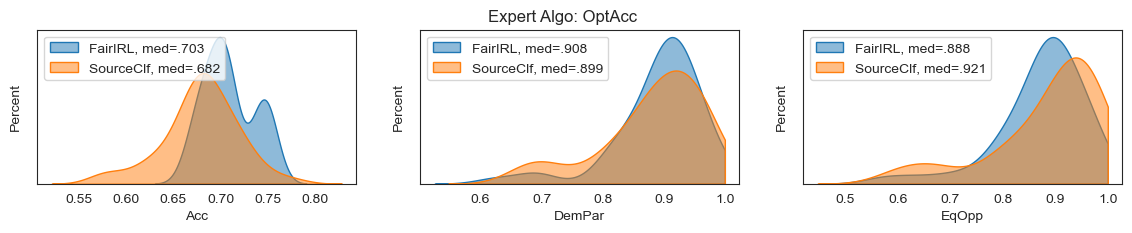

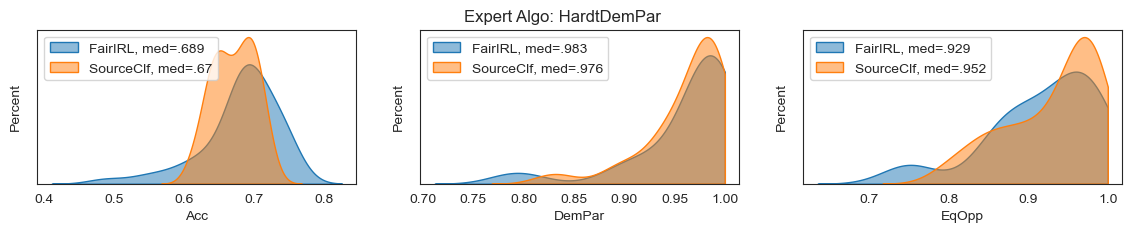

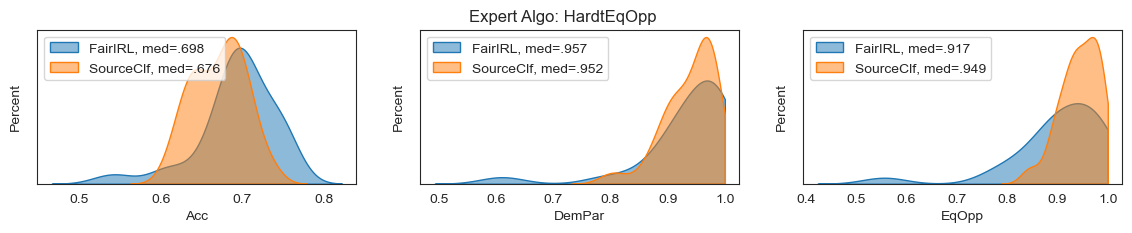

In [103]:
sns.set_style('white')


for expert_algo_i, expert_algo in enumerate(['OptAcc', 'HardtDemPar', 'HardtEqOpp']):

    fig, axes = plt.subplots(1, 3, figsize=(14, 2))

    for measure_i, measure in enumerate(['Acc', 'DemPar', 'EqOpp']):
        ax = axes[measure_i]
        piv = pariwise_pivots(df, expert_algo)
        fair_irl = piv['METRIC_VALUE']['FairIRL'][measure]
        source_clf = piv['METRIC_VALUE']['SourceClassifier'][measure]
        fair_irl_lbl = f"FairIRL, med={str(np.round(fair_irl.median(), 3))[1:]}"
        source_clf_lbl = f"SourceClf, med={str(np.round(source_clf.median(), 3))[1:]}"
        sns.kdeplot(fair_irl, ax=ax, label=fair_irl_lbl, fill=True, alpha=.5, clip=[0, 1])
        sns.kdeplot(source_clf, ax=ax, label=source_clf_lbl, fill=True, alpha=.5, clip=[0, 1])
        ax.set_xlabel(measure)
        ax.set_ylabel('Percent')
        ax.set_yticklabels([])
        ax.legend(loc='upper left')
        pass

    plt.suptitle(f"Expert Algo: {expert_algo}")
    
pass